In [1]:
from armored.models import *
from armored.preprocessing import *

In [2]:
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

import seaborn as sns

params = {'legend.fontsize': 18,
          'figure.figsize': (8, 6),
         'axes.labelsize': 24,
         'axes.titlesize':24,
         'axes.linewidth':5,
         'xtick.labelsize':20,
         'ytick.labelsize':20}
plt.rcParams.update(params)
plt.style.use('seaborn-colorblind')
plt.rcParams['pdf.fonttype'] = 42

In [3]:
from numpy.random import default_rng
rng = default_rng(seed = 123)

# Define simulation parameters and import full dataset

In [4]:
# number of trials 
n_trials = 30

# number of dtl cycles 
n_dtl  = 5

# define number of initial samples to train on
n_init = 5

# number of samples for next experiment 
n_test = 5

# number of species in model
n_s = 5

# number of resources
n_r = 7

# define all system variables 
species = ['s'+str(i+1) for i in range(n_s)]
outputs = ['product']
sys_var = species + outputs

# define parameters in the objective function
obj_params = ['volume']

# define subset of controls
controls = ['rf'+str(i+1) for i in range(n_r)] + ['feed']
system_variables = species + outputs + controls

# define an objective function (product of endpoint volume * endpoint product concentration)
# where product concentration is the last column of the predicted output
objective = lambda pred, vol: pred[-1, -1]*vol[-1] 

# import data 
main_df = pd.read_csv("Data/reactor_ubiome.csv")
all_exp_names = main_df.Experiments.values

In [5]:
# determine random sets of initial experiments
initial_exps = [rng.choice(np.unique(all_exp_names), n_init, replace=False) for _ in range(n_trials)]

In [6]:
# function to compute sum of squares error 
def sse(a, b):
    return np.sum((a-b)**2)

# Loop over each trial

Running trial 1, cycle 1
Epoch: 0, Loss: 74.83854, Residuals: -0.74556, Convergence:   inf
Epoch: 10, Loss: 64.50973, Residuals: -0.69452, Convergence: 0.015387
Epoch: 20, Loss: 55.13628, Residuals: -0.64859, Convergence: 0.016068
Epoch: 30, Loss: 46.95000, Residuals: -0.60652, Convergence: 0.016266
Epoch: 40, Loss: 39.95150, Residuals: -0.56782, Convergence: 0.016288
Epoch: 50, Loss: 34.00510, Residuals: -0.53205, Convergence: 0.015867
Epoch: 60, Loss: 29.05434, Residuals: -0.49828, Convergence: 0.015807
Epoch: 70, Loss: 24.91191, Residuals: -0.46688, Convergence: 0.015427
Epoch: 80, Loss: 21.47401, Residuals: -0.43751, Convergence: 0.014765
Epoch: 90, Loss: 18.59015, Residuals: -0.41041, Convergence: 0.014538
Epoch: 100, Loss: 16.20554, Residuals: -0.38502, Convergence: 0.013537
Epoch: 110, Loss: 14.24301, Residuals: -0.36112, Convergence: 0.013146
Epoch: 120, Loss: 12.63479, Residuals: -0.33849, Convergence: 0.012197
Epoch: 130, Loss: 11.31810, Residuals: -0.31689, Convergence: 0.01


Epoch: 882, Evidence: 269.35760, Convergence: 0.012811
Epoch: 890, Loss: 43.41823, Residuals: -0.01165, Convergence: 0.001061

Epoch: 893, Evidence: 269.68997, Convergence: 0.001232
Epoch: 900, Loss: 44.27374, Residuals: -0.01160, Convergence: 0.001431

Epoch: 902, Evidence: 271.18973, Convergence: 0.005530

Epoch: 907, Evidence: 272.72421, Convergence: 0.005627
Epoch: 910, Loss: 46.21138, Residuals: -0.01157, Convergence: 0.001121

Epoch: 918, Evidence: 273.07587, Convergence: 0.001288
Epoch: 920, Loss: 46.73388, Residuals: -0.01154, Convergence: 0.001460
Epoch: 930, Loss: 46.17544, Residuals: -0.01153, Convergence: 0.000948

Epoch: 930, Evidence: 274.28171, Convergence: 0.004396
Epoch: 930, Loss: 47.23703, Residuals: -0.01153, Convergence:   inf

Epoch: 935, Evidence: 275.89233, Convergence: 0.005838
Epoch: 940, Loss: 47.63778, Residuals: -0.01150, Convergence: 0.001162

Epoch: 946, Evidence: 275.87399, Convergence: -0.000066
Epoch: 950, Loss: 47.57265, Residuals: -0.01161, Converge

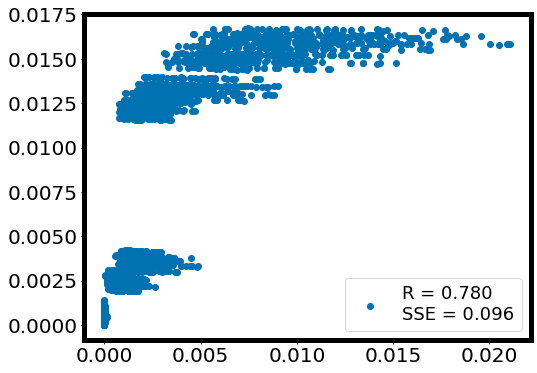

Top 5 profit predictions:  [0.18318294 0.18298705 0.18070509 0.1805462  0.18047306]
Pure exploitation, returning N max objective experiments
Running trial 1, cycle 2
Epoch: 0, Loss: 156.17352, Residuals: -0.35602, Convergence:   inf
Epoch: 10, Loss: 133.75829, Residuals: -0.33244, Convergence: 0.015763
Epoch: 20, Loss: 114.19316, Residuals: -0.31038, Convergence: 0.016060
Epoch: 30, Loss: 97.36240, Residuals: -0.28990, Convergence: 0.016021
Epoch: 40, Loss: 83.19922, Residuals: -0.27104, Convergence: 0.015669
Epoch: 50, Loss: 71.40920, Residuals: -0.25369, Convergence: 0.015163
Epoch: 60, Loss: 61.63743, Residuals: -0.23762, Convergence: 0.014564
Epoch: 70, Loss: 53.57700, Residuals: -0.22247, Convergence: 0.013908
Epoch: 80, Loss: 46.92670, Residuals: -0.20826, Convergence: 0.013300
Epoch: 90, Loss: 41.36168, Residuals: -0.19487, Convergence: 0.012594
Epoch: 100, Loss: 36.79352, Residuals: -0.18176, Convergence: 0.011799
Epoch: 110, Loss: 32.97484, Residuals: -0.16954, Convergence: 0.

Epoch: 1040, Loss: 80.05830, Residuals: 0.00128, Convergence: 0.001413

Epoch: 1044, Evidence: 459.89795, Convergence: 0.027945
Epoch: 1050, Loss: 86.37871, Residuals: 0.00122, Convergence: 0.001356
Epoch: 1060, Loss: 85.25716, Residuals: 0.00116, Convergence: 0.001426
Epoch: 1070, Loss: 84.26018, Residuals: 0.00117, Convergence: 0.001253

Epoch: 1072, Evidence: 469.81982, Convergence: 0.021118
Epoch: 1080, Loss: 90.01421, Residuals: 0.00133, Convergence: 0.001092

Epoch: 1087, Evidence: 478.56799, Convergence: 0.018280
Epoch: 1090, Loss: 95.33440, Residuals: 0.00151, Convergence: 0.001369
Epoch: 1100, Loss: 94.13554, Residuals: 0.00172, Convergence: 0.001060
Epoch: 1110, Loss: 92.96288, Residuals: 0.00185, Convergence: 0.001196

Epoch: 1115, Evidence: 485.10770, Convergence: 0.013481
Epoch: 1120, Loss: 97.68686, Residuals: 0.00196, Convergence: 0.001482
Epoch: 1130, Loss: 96.45409, Residuals: 0.00203, Convergence: 0.001044

Epoch: 1132, Evidence: 493.27283, Convergence: 0.016553
Epoch

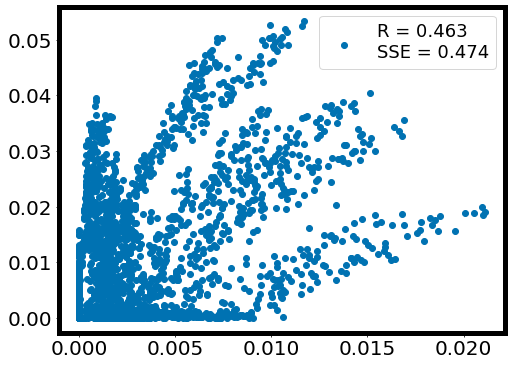

Top 5 profit predictions:  [0.58722025 0.58083737 0.569282   0.5612105  0.5588597 ]
Pure exploitation, returning N max objective experiments
Running trial 1, cycle 3
Epoch: 0, Loss: 243.34517, Residuals: -0.58474, Convergence:   inf
Epoch: 10, Loss: 207.75888, Residuals: -0.53651, Convergence: 0.016111
Epoch: 20, Loss: 176.69115, Residuals: -0.49265, Convergence: 0.016489
Epoch: 30, Loss: 149.96819, Residuals: -0.45284, Convergence: 0.016515
Epoch: 40, Loss: 127.46577, Residuals: -0.41634, Convergence: 0.016262
Epoch: 50, Loss: 108.81782, Residuals: -0.38225, Convergence: 0.015833
Epoch: 60, Loss: 93.27469, Residuals: -0.35099, Convergence: 0.015162
Epoch: 70, Loss: 80.30605, Residuals: -0.32247, Convergence: 0.014891
Epoch: 80, Loss: 69.56301, Residuals: -0.29633, Convergence: 0.014283
Epoch: 90, Loss: 60.64320, Residuals: -0.27246, Convergence: 0.013582
Epoch: 100, Loss: 53.23030, Residuals: -0.25085, Convergence: 0.012790
Epoch: 110, Loss: 47.09831, Residuals: -0.23110, Convergence:


Epoch: 934, Evidence: 849.47485, Convergence: 0.002530
Epoch: 940, Loss: 184.19196, Residuals: -0.00640, Convergence: 0.001113

Epoch: 946, Evidence: 849.15454, Convergence: -0.000377
Epoch: 950, Loss: 183.38193, Residuals: -0.00661, Convergence: 0.002085
Epoch: 960, Loss: 179.78940, Residuals: -0.00695, Convergence: 0.001895
Epoch: 970, Loss: 176.95642, Residuals: -0.00692, Convergence: 0.001242

Epoch: 972, Evidence: 844.56531, Convergence: -0.005813
Epoch: 980, Loss: 186.62964, Residuals: -0.00639, Convergence: 0.001239

Epoch: 986, Evidence: 853.32593, Convergence: 0.004513
Epoch: 990, Loss: 187.11642, Residuals: -0.00633, Convergence: 0.001410

Epoch: 997, Evidence: 851.24908, Convergence: -0.002440


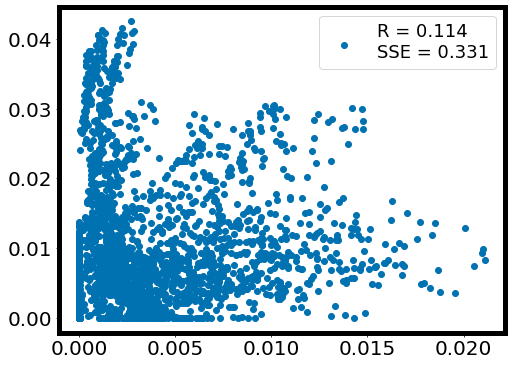

Top 5 profit predictions:  [0.46861467 0.4581572  0.44837475 0.44680074 0.44407195]
Pure exploitation, returning N max objective experiments
Running trial 1, cycle 4
Epoch: 0, Loss: 256.95885, Residuals: -0.17657, Convergence:   inf
Epoch: 10, Loss: 221.47043, Residuals: -0.16427, Convergence: 0.015260
Epoch: 20, Loss: 189.70996, Residuals: -0.15284, Convergence: 0.015877
Epoch: 30, Loss: 161.73679, Residuals: -0.14240, Convergence: 0.016179
Epoch: 40, Loss: 137.83897, Residuals: -0.13220, Convergence: 0.016022
Epoch: 50, Loss: 117.82017, Residuals: -0.12207, Convergence: 0.015699
Epoch: 60, Loss: 100.95346, Residuals: -0.11218, Convergence: 0.015396
Epoch: 70, Loss: 86.82925, Residuals: -0.10313, Convergence: 0.014919
Epoch: 80, Loss: 75.10503, Residuals: -0.09504, Convergence: 0.014443
Epoch: 90, Loss: 65.36647, Residuals: -0.08757, Convergence: 0.013497
Epoch: 100, Loss: 57.26241, Residuals: -0.08079, Convergence: 0.012882
Epoch: 110, Loss: 50.55344, Residuals: -0.07453, Convergence

Epoch: 900, Loss: 259.40643, Residuals: -0.00972, Convergence: 0.001595
Epoch: 910, Loss: 255.84818, Residuals: -0.01000, Convergence: 0.001155

Epoch: 916, Evidence: 1253.93176, Convergence: 0.002105
Epoch: 920, Loss: 255.96802, Residuals: -0.01020, Convergence: 0.001379

Epoch: 927, Evidence: 1253.75879, Convergence: -0.000138
Epoch: 930, Loss: 254.47842, Residuals: -0.01181, Convergence: 0.002214
Epoch: 940, Loss: 249.69363, Residuals: -0.01405, Convergence: 0.001970
Epoch: 950, Loss: 246.10803, Residuals: -0.01374, Convergence: 0.000924

Epoch: 950, Evidence: 1238.93005, Convergence: -0.012109


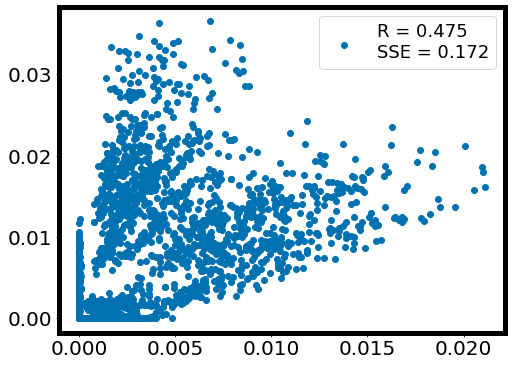

Top 5 profit predictions:  [0.39668256 0.39519802 0.37755865 0.3701565  0.3692726 ]
Pure exploitation, returning N max objective experiments
Running trial 1, cycle 5
Epoch: 0, Loss: 336.46141, Residuals: -0.11317, Convergence:   inf
Epoch: 10, Loss: 289.19614, Residuals: -0.10574, Convergence: 0.015482
Epoch: 20, Loss: 247.35701, Residuals: -0.09869, Convergence: 0.015955
Epoch: 30, Loss: 210.95682, Residuals: -0.09190, Convergence: 0.015992
Epoch: 40, Loss: 180.31068, Residuals: -0.08511, Convergence: 0.015626
Epoch: 50, Loss: 154.91306, Residuals: -0.07817, Convergence: 0.015012
Epoch: 60, Loss: 133.53125, Residuals: -0.07206, Convergence: 0.014709
Epoch: 70, Loss: 115.69810, Residuals: -0.06619, Convergence: 0.014155
Epoch: 80, Loss: 100.72620, Residuals: -0.06080, Convergence: 0.013823
Epoch: 90, Loss: 88.24713, Residuals: -0.05587, Convergence: 0.013097
Epoch: 100, Loss: 77.56477, Residuals: -0.05142, Convergence: 0.012847
Epoch: 110, Loss: 68.39825, Residuals: -0.04744, Convergen

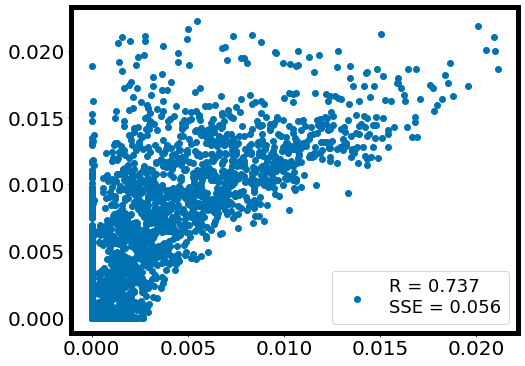

Top 5 profit predictions:  [0.23718338 0.23145318 0.22024152 0.21999279 0.21787846]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 403.20049, Residuals: -0.11572, Convergence:   inf
Epoch: 10, Loss: 347.43805, Residuals: -0.10742, Convergence: 0.015227
Epoch: 20, Loss: 298.03027, Residuals: -0.09964, Convergence: 0.015625
Epoch: 30, Loss: 255.17557, Residuals: -0.09209, Convergence: 0.015555
Epoch: 40, Loss: 219.15953, Residuals: -0.08456, Convergence: 0.015191
Epoch: 50, Loss: 189.20302, Residuals: -0.07739, Convergence: 0.014684
Epoch: 60, Loss: 164.04951, Residuals: -0.07095, Convergence: 0.014279
Epoch: 70, Loss: 143.04459, Residuals: -0.06520, Convergence: 0.013630
Epoch: 80, Loss: 125.63203, Residuals: -0.05992, Convergence: 0.012545
Epoch: 90, Loss: 111.20049, Residuals: -0.05485, Convergence: 0.011955
Epoch: 100, Loss: 98.95659, Residuals: -0.04999, Convergence: 0.011701
Epoch: 110, Loss: 88.25728, Residuals: -0.04552, Convergence: 0.011632
Epoch: 120,

Epoch: 930, Loss: 399.15991, Residuals: -0.01499, Convergence: 0.001631
Epoch: 940, Loss: 393.92651, Residuals: -0.01494, Convergence: 0.001096

Epoch: 945, Evidence: 1936.65295, Convergence: -0.005982


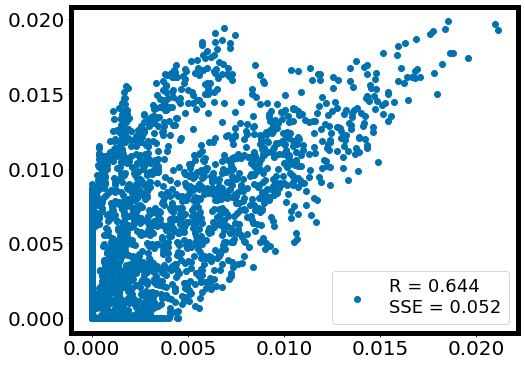

Running trial 2, cycle 1
Epoch: 0, Loss: 90.62764, Residuals: -0.73817, Convergence:   inf
Epoch: 10, Loss: 78.29220, Residuals: -0.68466, Convergence: 0.014950
Epoch: 20, Loss: 67.37560, Residuals: -0.63435, Convergence: 0.015253
Epoch: 30, Loss: 57.81275, Residuals: -0.58795, Convergence: 0.015592
Epoch: 40, Loss: 49.31512, Residuals: -0.54590, Convergence: 0.016028
Epoch: 50, Loss: 41.91759, Residuals: -0.50840, Convergence: 0.016416
Epoch: 60, Loss: 35.61731, Residuals: -0.47398, Convergence: 0.016618
Epoch: 70, Loss: 30.34292, Residuals: -0.44206, Convergence: 0.016025
Epoch: 80, Loss: 26.07581, Residuals: -0.41233, Convergence: 0.015797
Epoch: 90, Loss: 22.52654, Residuals: -0.38550, Convergence: 0.014709
Epoch: 100, Loss: 19.59246, Residuals: -0.36113, Convergence: 0.013609
Epoch: 110, Loss: 17.14217, Residuals: -0.33908, Convergence: 0.012937
Epoch: 120, Loss: 15.09755, Residuals: -0.31875, Convergence: 0.012980
Epoch: 130, Loss: 13.44301, Residuals: -0.29952, Convergence: 0.01

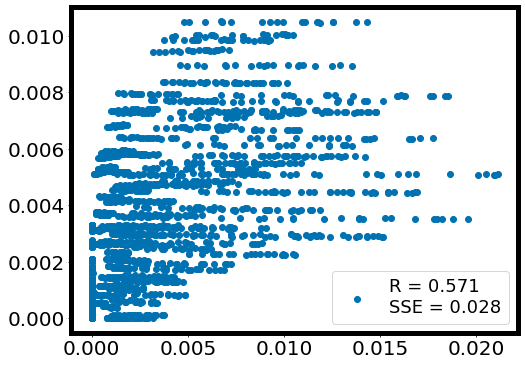

Top 5 profit predictions:  [0.11547252 0.11386713 0.1137585  0.11367924 0.11332351]
Pure exploitation, returning N max objective experiments
Running trial 2, cycle 2
Epoch: 0, Loss: 130.31778, Residuals: -0.96532, Convergence:   inf
Epoch: 10, Loss: 114.13171, Residuals: -0.88166, Convergence: 0.013671
Epoch: 20, Loss: 99.44707, Residuals: -0.80549, Convergence: 0.013985
Epoch: 30, Loss: 86.49480, Residuals: -0.73630, Convergence: 0.014082
Epoch: 40, Loss: 75.21777, Residuals: -0.67363, Convergence: 0.014036
Epoch: 50, Loss: 65.43407, Residuals: -0.61674, Convergence: 0.014422
Epoch: 60, Loss: 57.01576, Residuals: -0.56510, Convergence: 0.012242
Epoch: 70, Loss: 49.75102, Residuals: -0.51819, Convergence: 0.012654
Epoch: 80, Loss: 43.63329, Residuals: -0.47543, Convergence: 0.013988
Epoch: 90, Loss: 38.51333, Residuals: -0.43616, Convergence: 0.013420
Epoch: 100, Loss: 34.21197, Residuals: -0.40068, Convergence: 0.009767
Epoch: 110, Loss: 30.47244, Residuals: -0.36857, Convergence: 0.0

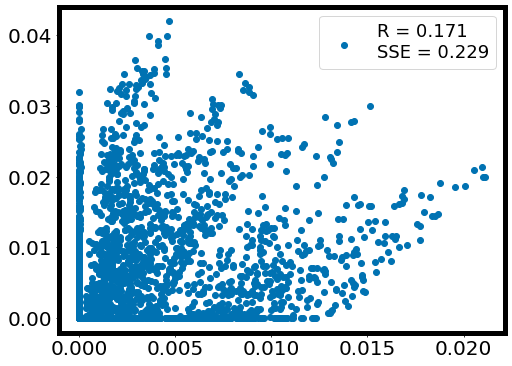

Top 5 profit predictions:  [0.4628314  0.43373615 0.4331743  0.42667028 0.41718143]
Pure exploitation, returning N max objective experiments
Running trial 2, cycle 3
Epoch: 0, Loss: 183.77493, Residuals: -0.85584, Convergence:   inf
Epoch: 10, Loss: 160.42111, Residuals: -0.77912, Convergence: 0.014157
Epoch: 20, Loss: 138.99013, Residuals: -0.70948, Convergence: 0.014629
Epoch: 30, Loss: 120.02356, Residuals: -0.64615, Convergence: 0.014878
Epoch: 40, Loss: 103.47900, Residuals: -0.58837, Convergence: 0.014976
Epoch: 50, Loss: 89.24754, Residuals: -0.53551, Convergence: 0.015108
Epoch: 60, Loss: 76.96630, Residuals: -0.48771, Convergence: 0.014446
Epoch: 70, Loss: 66.72077, Residuals: -0.44419, Convergence: 0.014220
Epoch: 80, Loss: 57.96867, Residuals: -0.40469, Convergence: 0.013862
Epoch: 90, Loss: 50.73793, Residuals: -0.36873, Convergence: 0.013112
Epoch: 100, Loss: 44.72123, Residuals: -0.33627, Convergence: 0.012612
Epoch: 110, Loss: 39.69211, Residuals: -0.30687, Convergence: 


Epoch: 909, Evidence: 944.00043, Convergence: 0.006788
Epoch: 910, Loss: 173.28802, Residuals: -0.00555, Convergence: 0.003404
Epoch: 920, Loss: 169.78712, Residuals: -0.00743, Convergence: 0.001478

Epoch: 923, Evidence: 945.98682, Convergence: 0.002100
Epoch: 930, Loss: 170.77385, Residuals: -0.00928, Convergence: 0.001734
Epoch: 940, Loss: 167.93756, Residuals: -0.00965, Convergence: 0.001495

Epoch: 949, Evidence: 939.25378, Convergence: -0.007168
Epoch: 950, Loss: 176.44101, Residuals: -0.00755, Convergence: 0.002148

Epoch: 959, Evidence: 953.88483, Convergence: 0.008280
Epoch: 960, Loss: 178.13200, Residuals: -0.00798, Convergence: 0.002153

Epoch: 964, Evidence: 956.81201, Convergence: 0.003059

Epoch: 969, Evidence: 958.60181, Convergence: 0.001867
Epoch: 970, Loss: 181.73131, Residuals: -0.00851, Convergence: 0.002170
Epoch: 980, Loss: 178.76715, Residuals: -0.00886, Convergence: 0.001719
Epoch: 990, Loss: 176.42697, Residuals: -0.00891, Convergence: 0.001507

Epoch: 992, Ev

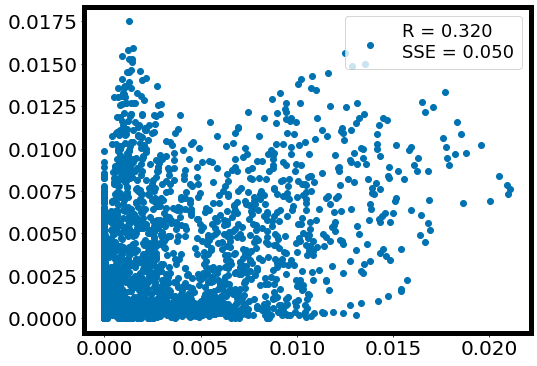

Top 5 profit predictions:  [0.19020295 0.17298996 0.1716016  0.1701898  0.16852039]
Pure exploitation, returning N max objective experiments
Running trial 2, cycle 4
Epoch: 0, Loss: 255.40364, Residuals: -0.66434, Convergence:   inf
Epoch: 10, Loss: 222.88052, Residuals: -0.60443, Convergence: 0.014087
Epoch: 20, Loss: 193.35297, Residuals: -0.54998, Convergence: 0.014466
Epoch: 30, Loss: 167.34157, Residuals: -0.50046, Convergence: 0.014557
Epoch: 40, Loss: 144.96939, Residuals: -0.45562, Convergence: 0.014267
Epoch: 50, Loss: 126.15012, Residuals: -0.41484, Convergence: 0.013788
Epoch: 60, Loss: 110.43606, Residuals: -0.37757, Convergence: 0.013028
Epoch: 70, Loss: 97.20056, Residuals: -0.34377, Convergence: 0.012685
Epoch: 80, Loss: 86.08387, Residuals: -0.31332, Convergence: 0.011731
Epoch: 90, Loss: 76.50874, Residuals: -0.28583, Convergence: 0.012252
Epoch: 100, Loss: 67.71150, Residuals: -0.26125, Convergence: 0.011974
Epoch: 110, Loss: 59.88824, Residuals: -0.23898, Convergence

Epoch: 950, Loss: 234.76195, Residuals: -0.01511, Convergence: 0.001346

Epoch: 955, Evidence: 1254.67151, Convergence: -0.015315
Epoch: 960, Loss: 252.39856, Residuals: -0.01511, Convergence: 0.001108
Epoch: 970, Loss: 249.62943, Residuals: -0.01498, Convergence: 0.000958

Epoch: 970, Evidence: 1278.97583, Convergence: 0.003979
Epoch: 970, Loss: 253.24243, Residuals: -0.01498, Convergence:   inf
Epoch: 980, Loss: 250.41209, Residuals: -0.01488, Convergence: 0.001116

Epoch: 981, Evidence: 1277.36047, Convergence: -0.001265


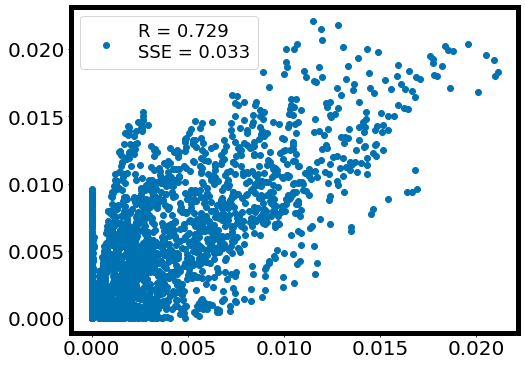

Top 5 profit predictions:  [0.24074039 0.23991232 0.23245627 0.22528617 0.22187136]
Pure exploitation, returning N max objective experiments
Running trial 2, cycle 5
Epoch: 0, Loss: 370.71892, Residuals: -0.26320, Convergence:   inf
Epoch: 10, Loss: 317.29474, Residuals: -0.24103, Convergence: 0.015950
Epoch: 20, Loss: 270.11270, Residuals: -0.22039, Convergence: 0.016406
Epoch: 30, Loss: 229.38518, Residuals: -0.20117, Convergence: 0.016493
Epoch: 40, Loss: 194.83234, Residuals: -0.18355, Convergence: 0.016343
Epoch: 50, Loss: 165.86508, Residuals: -0.16749, Convergence: 0.016176
Epoch: 60, Loss: 141.49423, Residuals: -0.15280, Convergence: 0.015667
Epoch: 70, Loss: 120.95030, Residuals: -0.13965, Convergence: 0.015513
Epoch: 80, Loss: 103.71323, Residuals: -0.12755, Convergence: 0.015237
Epoch: 90, Loss: 89.23986, Residuals: -0.11651, Convergence: 0.014738
Epoch: 100, Loss: 77.15463, Residuals: -0.10636, Convergence: 0.014276
Epoch: 110, Loss: 67.10967, Residuals: -0.09681, Convergen

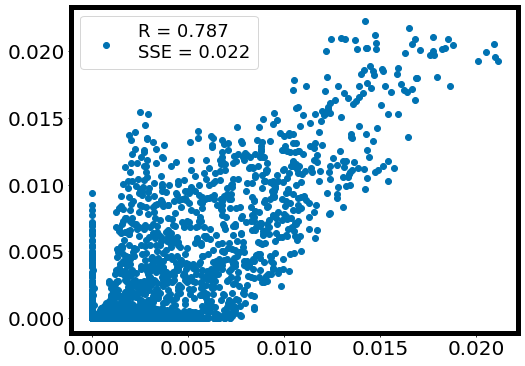

Top 5 profit predictions:  [0.24516335 0.23942406 0.23420727 0.23081104 0.22914271]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 386.70491, Residuals: -0.22551, Convergence:   inf
Epoch: 10, Loss: 333.11285, Residuals: -0.20634, Convergence: 0.015359
Epoch: 20, Loss: 285.22311, Residuals: -0.18835, Convergence: 0.015818
Epoch: 30, Loss: 243.63829, Residuals: -0.17183, Convergence: 0.015884
Epoch: 40, Loss: 208.43378, Residuals: -0.15662, Convergence: 0.015438
Epoch: 50, Loss: 179.07027, Residuals: -0.14249, Convergence: 0.015305
Epoch: 60, Loss: 154.02364, Residuals: -0.12978, Convergence: 0.015013
Epoch: 70, Loss: 132.98055, Residuals: -0.11829, Convergence: 0.014549
Epoch: 80, Loss: 115.54220, Residuals: -0.10778, Convergence: 0.013921
Epoch: 90, Loss: 101.06824, Residuals: -0.09824, Convergence: 0.013141
Epoch: 100, Loss: 89.06098, Residuals: -0.08959, Convergence: 0.012604
Epoch: 110, Loss: 78.93330, Residuals: -0.08171, Convergence: 0.011914
Epoch: 120,

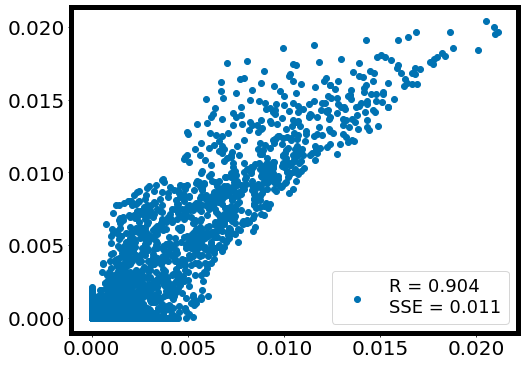

Running trial 3, cycle 1
Epoch: 0, Loss: 89.52533, Residuals: -0.89220, Convergence:   inf
Epoch: 10, Loss: 77.29452, Residuals: -0.82259, Convergence: 0.015004
Epoch: 20, Loss: 66.50900, Residuals: -0.75955, Convergence: 0.015193
Epoch: 30, Loss: 57.18848, Residuals: -0.70226, Convergence: 0.015236
Epoch: 40, Loss: 49.12720, Residuals: -0.65002, Convergence: 0.015393
Epoch: 50, Loss: 42.11619, Residuals: -0.60237, Convergence: 0.015610
Epoch: 60, Loss: 36.03568, Residuals: -0.55861, Convergence: 0.015661
Epoch: 70, Loss: 30.91749, Residuals: -0.51838, Convergence: 0.015704
Epoch: 80, Loss: 26.54283, Residuals: -0.48123, Convergence: 0.015238
Epoch: 90, Loss: 22.90424, Residuals: -0.44610, Convergence: 0.014494
Epoch: 100, Loss: 19.88439, Residuals: -0.41365, Convergence: 0.014486
Epoch: 110, Loss: 17.33696, Residuals: -0.38437, Convergence: 0.013160
Epoch: 120, Loss: 15.19922, Residuals: -0.35766, Convergence: 0.013644
Epoch: 130, Loss: 13.41200, Residuals: -0.33361, Convergence: 0.01

Epoch: 920, Loss: 36.51509, Residuals: -0.00481, Convergence: 0.001754
Epoch: 930, Loss: 35.89235, Residuals: -0.00487, Convergence: 0.001810

Epoch: 937, Evidence: 205.81601, Convergence: 0.013344
Epoch: 940, Loss: 37.08067, Residuals: -0.00501, Convergence: 0.001382

Epoch: 943, Evidence: 208.91087, Convergence: 0.014814
Epoch: 950, Loss: 38.11550, Residuals: -0.00519, Convergence: 0.002443
Epoch: 960, Loss: 37.40903, Residuals: -0.00538, Convergence: 0.001589

Epoch: 968, Evidence: 210.63361, Convergence: 0.008179
Epoch: 970, Loss: 38.37244, Residuals: -0.00541, Convergence: 0.002342
Epoch: 980, Loss: 37.64547, Residuals: -0.00556, Convergence: 0.001208
Epoch: 990, Loss: 36.94653, Residuals: -0.00567, Convergence: 0.001720

Epoch: 993, Evidence: 211.39804, Convergence: 0.003616
Epoch: 1000, Loss: 37.79434, Residuals: -0.00588, Convergence: 0.002398
Epoch: 1010, Loss: 37.09424, Residuals: -0.00601, Convergence: 0.001594
Epoch: 1020, Loss: 36.46600, Residuals: -0.00605, Convergence: 0

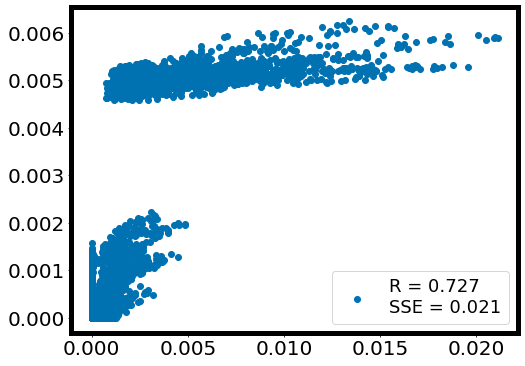

Top 5 profit predictions:  [0.06779969 0.06776106 0.06737529 0.06706219 0.06669883]
Pure exploitation, returning N max objective experiments
Running trial 3, cycle 2
Epoch: 0, Loss: 160.30722, Residuals: -0.82397, Convergence:   inf
Epoch: 10, Loss: 139.02594, Residuals: -0.75451, Convergence: 0.014311
Epoch: 20, Loss: 120.56806, Residuals: -0.69188, Convergence: 0.014415
Epoch: 30, Loss: 104.37579, Residuals: -0.63538, Convergence: 0.014596
Epoch: 40, Loss: 90.28883, Residuals: -0.58429, Convergence: 0.014586
Epoch: 50, Loss: 78.22279, Residuals: -0.53781, Convergence: 0.014376
Epoch: 60, Loss: 68.01302, Residuals: -0.49539, Convergence: 0.014067
Epoch: 70, Loss: 59.34338, Residuals: -0.45662, Convergence: 0.013835
Epoch: 80, Loss: 52.05822, Residuals: -0.42116, Convergence: 0.012807
Epoch: 90, Loss: 45.89503, Residuals: -0.38885, Convergence: 0.012572
Epoch: 100, Loss: 40.77569, Residuals: -0.35897, Convergence: 0.011267
Epoch: 110, Loss: 36.47877, Residuals: -0.33147, Convergence: 0

Epoch: 970, Loss: 85.11608, Residuals: -0.00968, Convergence: 0.001389
Epoch: 980, Loss: 83.92400, Residuals: -0.00982, Convergence: 0.001234

Epoch: 988, Evidence: 476.87897, Convergence: 0.004205
Epoch: 990, Loss: 87.94494, Residuals: -0.01001, Convergence: 0.001628
Epoch: 1000, Loss: 86.49457, Residuals: -0.01053, Convergence: 0.001512
Epoch: 1010, Loss: 85.19823, Residuals: -0.01094, Convergence: 0.001392
Epoch: 1020, Loss: 84.02943, Residuals: -0.01115, Convergence: 0.001340

Epoch: 1022, Evidence: 471.89587, Convergence: -0.010560

Epoch: 1027, Evidence: 490.21960, Convergence: 0.027214
Epoch: 1030, Loss: 95.05776, Residuals: -0.00993, Convergence: 0.001080

Epoch: 1033, Evidence: 496.38129, Convergence: 0.012413

Epoch: 1037, Evidence: 498.82758, Convergence: 0.004904

Epoch: 1039, Evidence: 504.09717, Convergence: 0.010454
Epoch: 1040, Loss: 103.48595, Residuals: -0.00997, Convergence: 0.001220
Epoch: 1050, Loss: 102.30580, Residuals: -0.01002, Convergence: 0.001103

Epoch: 105

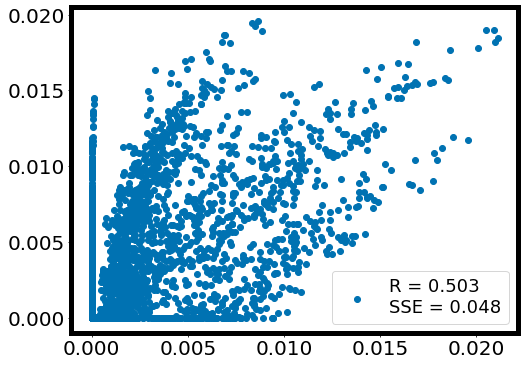

Top 5 profit predictions:  [0.21433292 0.21242152 0.20921806 0.20905833 0.20651701]
Pure exploitation, returning N max objective experiments
Running trial 3, cycle 3
Epoch: 0, Loss: 261.82506, Residuals: -0.69363, Convergence:   inf
Epoch: 10, Loss: 223.91608, Residuals: -0.63260, Convergence: 0.015813
Epoch: 20, Loss: 191.33752, Residuals: -0.57672, Convergence: 0.015885
Epoch: 30, Loss: 163.34970, Residuals: -0.52603, Convergence: 0.015971
Epoch: 40, Loss: 139.39836, Residuals: -0.48040, Convergence: 0.015968
Epoch: 50, Loss: 119.26210, Residuals: -0.43901, Convergence: 0.015710
Epoch: 60, Loss: 102.05811, Residuals: -0.40186, Convergence: 0.015683
Epoch: 70, Loss: 87.55979, Residuals: -0.36784, Convergence: 0.015312
Epoch: 80, Loss: 75.69273, Residuals: -0.33624, Convergence: 0.014093
Epoch: 90, Loss: 65.94333, Residuals: -0.30711, Convergence: 0.013488
Epoch: 100, Loss: 57.88777, Residuals: -0.28032, Convergence: 0.013499
Epoch: 110, Loss: 51.14054, Residuals: -0.25588, Convergence

Epoch: 940, Loss: 179.24863, Residuals: -0.01888, Convergence: 0.001100

Epoch: 948, Evidence: 830.25452, Convergence: 0.007984
Epoch: 950, Loss: 181.84477, Residuals: -0.01887, Convergence: 0.001441
Epoch: 960, Loss: 179.40005, Residuals: -0.01907, Convergence: 0.001129
Epoch: 970, Loss: 177.17697, Residuals: -0.01906, Convergence: 0.001319

Epoch: 975, Evidence: 828.29633, Convergence: -0.002364


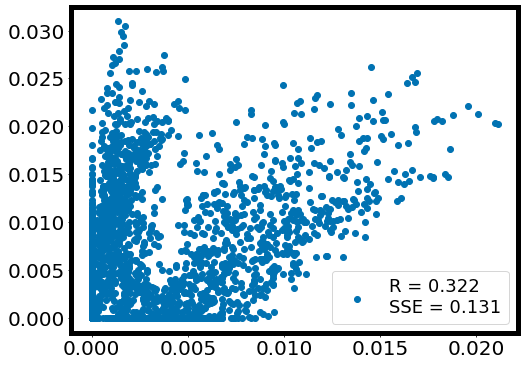

Top 5 profit predictions:  [0.33640808 0.3357927  0.3228788  0.31939283 0.30923253]
Pure exploitation, returning N max objective experiments
Running trial 3, cycle 4
Epoch: 0, Loss: 339.04787, Residuals: -0.65836, Convergence:   inf
Epoch: 10, Loss: 291.13391, Residuals: -0.59991, Convergence: 0.015402
Epoch: 20, Loss: 249.64154, Residuals: -0.54661, Convergence: 0.015588
Epoch: 30, Loss: 213.74651, Residuals: -0.49834, Convergence: 0.015777
Epoch: 40, Loss: 183.19591, Residuals: -0.45405, Convergence: 0.015438
Epoch: 50, Loss: 156.82759, Residuals: -0.41368, Convergence: 0.015698
Epoch: 60, Loss: 134.03113, Residuals: -0.37694, Convergence: 0.015805
Epoch: 70, Loss: 114.87127, Residuals: -0.34350, Convergence: 0.015401
Epoch: 80, Loss: 98.73937, Residuals: -0.31344, Convergence: 0.015113
Epoch: 90, Loss: 85.09743, Residuals: -0.28628, Convergence: 0.014820
Epoch: 100, Loss: 73.66124, Residuals: -0.26148, Convergence: 0.014331
Epoch: 110, Loss: 63.96022, Residuals: -0.23886, Convergenc

Epoch: 960, Loss: 237.04442, Residuals: -0.00664, Convergence: 0.001817
Epoch: 970, Loss: 233.24213, Residuals: -0.00703, Convergence: 0.001782

Epoch: 973, Evidence: 1230.83887, Convergence: 0.003395
Epoch: 980, Loss: 237.61157, Residuals: -0.00739, Convergence: 0.001881
Epoch: 990, Loss: 234.01038, Residuals: -0.00753, Convergence: 0.001477
Epoch: 1000, Loss: 230.82507, Residuals: -0.00742, Convergence: 0.001362
Epoch: 1010, Loss: 228.10153, Residuals: -0.00709, Convergence: 0.000894

Epoch: 1010, Evidence: 1223.97729, Convergence: -0.005606
Epoch: 1010, Loss: 243.94789, Residuals: -0.00703, Convergence:   inf

Epoch: 1017, Evidence: 1242.04321, Convergence: 0.009021
Epoch: 1020, Loss: 247.34567, Residuals: -0.00701, Convergence: 0.001041

Epoch: 1024, Evidence: 1245.29419, Convergence: 0.002611
Epoch: 1030, Loss: 248.97089, Residuals: -0.00699, Convergence: 0.001034

Epoch: 1033, Evidence: 1248.24939, Convergence: 0.002367

Epoch: 1036, Evidence: 1248.80811, Convergence: 0.000447
Ep

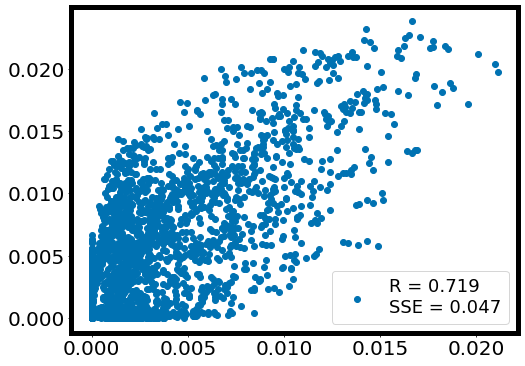

Top 5 profit predictions:  [0.25859478 0.25195724 0.25001463 0.2439003  0.24382421]
Pure exploitation, returning N max objective experiments
Running trial 3, cycle 5
Epoch: 0, Loss: 413.99587, Residuals: -0.59029, Convergence:   inf
Epoch: 10, Loss: 354.86423, Residuals: -0.53815, Convergence: 0.015609
Epoch: 20, Loss: 303.34482, Residuals: -0.49065, Convergence: 0.015968
Epoch: 30, Loss: 258.64618, Residuals: -0.44727, Convergence: 0.016119
Epoch: 40, Loss: 220.51073, Residuals: -0.40776, Convergence: 0.016044
Epoch: 50, Loss: 188.05374, Residuals: -0.37153, Convergence: 0.016113
Epoch: 60, Loss: 160.38058, Residuals: -0.33823, Convergence: 0.015980
Epoch: 70, Loss: 137.08299, Residuals: -0.30791, Convergence: 0.015696
Epoch: 80, Loss: 117.65247, Residuals: -0.28024, Convergence: 0.015238
Epoch: 90, Loss: 101.48309, Residuals: -0.25511, Convergence: 0.014699
Epoch: 100, Loss: 87.98065, Residuals: -0.23246, Convergence: 0.014162
Epoch: 110, Loss: 76.80761, Residuals: -0.21187, Converge

Epoch: 930, Loss: 327.93430, Residuals: -0.02335, Convergence: 0.001343

Epoch: 936, Evidence: 1588.44470, Convergence: -0.002852

Epoch: 937, Evidence: 1594.39917, Convergence: 0.000893
Epoch: 940, Loss: 329.97165, Residuals: -0.02299, Convergence: 0.001431

Epoch: 948, Evidence: 1588.30493, Convergence: -0.002940


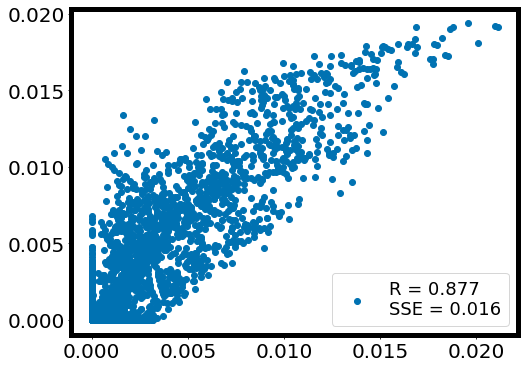

Top 5 profit predictions:  [0.21104583 0.21058024 0.20843378 0.20695512 0.20220181]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 483.80486, Residuals: -0.61490, Convergence:   inf
Epoch: 10, Loss: 414.44818, Residuals: -0.55955, Convergence: 0.015815
Epoch: 20, Loss: 352.81082, Residuals: -0.50907, Convergence: 0.016508
Epoch: 30, Loss: 299.30399, Residuals: -0.46328, Convergence: 0.016579
Epoch: 40, Loss: 254.21301, Residuals: -0.42148, Convergence: 0.016439
Epoch: 50, Loss: 216.11719, Residuals: -0.38318, Convergence: 0.016325
Epoch: 60, Loss: 183.91350, Residuals: -0.34847, Convergence: 0.016200
Epoch: 70, Loss: 157.08618, Residuals: -0.31661, Convergence: 0.015378
Epoch: 80, Loss: 134.81642, Residuals: -0.28754, Convergence: 0.015087
Epoch: 90, Loss: 116.27277, Residuals: -0.26121, Convergence: 0.014865
Epoch: 100, Loss: 100.60582, Residuals: -0.23738, Convergence: 0.014404
Epoch: 110, Loss: 87.51893, Residuals: -0.21584, Convergence: 0.013819
Epoch: 120

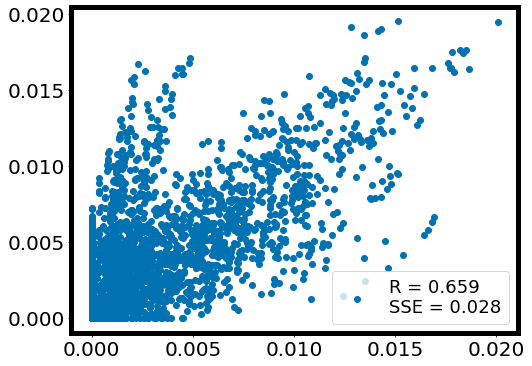

Running trial 4, cycle 1
Epoch: 0, Loss: 115.01462, Residuals: -0.64142, Convergence:   inf
Epoch: 10, Loss: 96.95341, Residuals: -0.59639, Convergence: 0.017213
Epoch: 20, Loss: 81.76286, Residuals: -0.55608, Convergence: 0.017161
Epoch: 30, Loss: 68.99727, Residuals: -0.51960, Convergence: 0.017086
Epoch: 40, Loss: 58.27271, Residuals: -0.48634, Convergence: 0.016991
Epoch: 50, Loss: 49.27321, Residuals: -0.45575, Convergence: 0.016848
Epoch: 60, Loss: 41.73660, Residuals: -0.42741, Convergence: 0.016639
Epoch: 70, Loss: 35.43906, Residuals: -0.40108, Convergence: 0.016358
Epoch: 80, Loss: 30.18897, Residuals: -0.37659, Convergence: 0.015943
Epoch: 90, Loss: 25.86278, Residuals: -0.35323, Convergence: 0.014760
Epoch: 100, Loss: 22.26549, Residuals: -0.33155, Convergence: 0.014263
Epoch: 110, Loss: 19.26531, Residuals: -0.31156, Convergence: 0.014408
Epoch: 120, Loss: 16.69859, Residuals: -0.29280, Convergence: 0.014139
Epoch: 130, Loss: 14.56421, Residuals: -0.27551, Convergence: 0.0

Epoch: 920, Loss: 47.77019, Residuals: 0.00020, Convergence:   inf

Epoch: 921, Evidence: 230.63539, Convergence: 0.004299

Epoch: 922, Evidence: 233.91267, Convergence: 0.014011

Epoch: 923, Evidence: 233.07651, Convergence: -0.003588


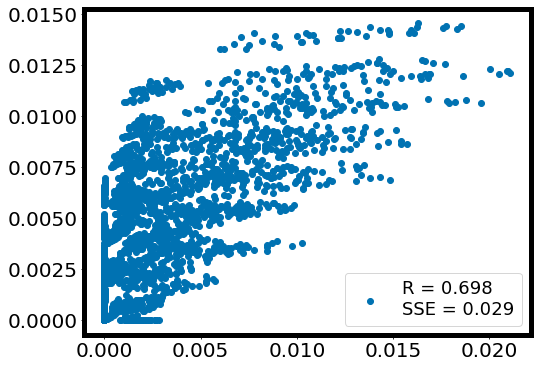

Top 5 profit predictions:  [0.15931536 0.15820995 0.15709373 0.156852   0.15616618]
Pure exploitation, returning N max objective experiments
Running trial 4, cycle 2
Epoch: 0, Loss: 173.09306, Residuals: -0.77000, Convergence:   inf
Epoch: 10, Loss: 149.11031, Residuals: -0.70499, Convergence: 0.015048
Epoch: 20, Loss: 128.37029, Residuals: -0.64610, Convergence: 0.015132
Epoch: 30, Loss: 110.37862, Residuals: -0.59290, Convergence: 0.015286
Epoch: 40, Loss: 94.81443, Residuals: -0.54475, Convergence: 0.015296
Epoch: 50, Loss: 81.56424, Residuals: -0.50111, Convergence: 0.015003
Epoch: 60, Loss: 70.52726, Residuals: -0.46084, Convergence: 0.014509
Epoch: 70, Loss: 61.26443, Residuals: -0.42450, Convergence: 0.013931
Epoch: 80, Loss: 53.54200, Residuals: -0.39154, Convergence: 0.013253
Epoch: 90, Loss: 47.13672, Residuals: -0.36146, Convergence: 0.012505
Epoch: 100, Loss: 41.79170, Residuals: -0.33415, Convergence: 0.011815
Epoch: 110, Loss: 37.33553, Residuals: -0.30920, Convergence: 0


Epoch: 830, Evidence: 516.80334, Convergence: -0.002077


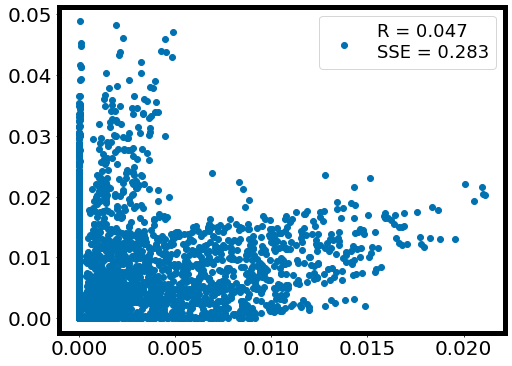

Top 5 profit predictions:  [0.5306391  0.52476895 0.51916844 0.5079667  0.49997172]
Pure exploitation, returning N max objective experiments
Running trial 4, cycle 3
Epoch: 0, Loss: 266.34483, Residuals: -0.60584, Convergence:   inf
Epoch: 10, Loss: 228.13507, Residuals: -0.55278, Convergence: 0.015559
Epoch: 20, Loss: 195.29678, Residuals: -0.50458, Convergence: 0.015784
Epoch: 30, Loss: 166.70177, Residuals: -0.46087, Convergence: 0.016070
Epoch: 40, Loss: 142.14804, Residuals: -0.42111, Convergence: 0.015972
Epoch: 50, Loss: 121.53027, Residuals: -0.38458, Convergence: 0.015630
Epoch: 60, Loss: 104.33798, Residuals: -0.35124, Convergence: 0.015209
Epoch: 70, Loss: 90.03206, Residuals: -0.32091, Convergence: 0.014605
Epoch: 80, Loss: 78.08167, Residuals: -0.29355, Convergence: 0.014060
Epoch: 90, Loss: 68.17355, Residuals: -0.26861, Convergence: 0.013284
Epoch: 100, Loss: 59.91702, Residuals: -0.24611, Convergence: 0.012671
Epoch: 110, Loss: 53.09732, Residuals: -0.22553, Convergence


Epoch: 954, Evidence: 892.47076, Convergence: 0.005503
Epoch: 960, Loss: 173.10178, Residuals: -0.01351, Convergence: 0.001605

Epoch: 962, Evidence: 895.70325, Convergence: 0.003609
Epoch: 970, Loss: 174.53816, Residuals: -0.01416, Convergence: 0.001681
Epoch: 980, Loss: 171.89221, Residuals: -0.01438, Convergence: 0.001177
Epoch: 990, Loss: 169.58514, Residuals: -0.01423, Convergence: 0.001454

Epoch: 991, Evidence: 887.92749, Convergence: -0.008757

Epoch: 998, Evidence: 901.14813, Convergence: 0.006042
Epoch: 1000, Loss: 181.11925, Residuals: -0.01354, Convergence: 0.001112

Epoch: 1007, Evidence: 904.25342, Convergence: 0.003434
Epoch: 1010, Loss: 181.93910, Residuals: -0.01346, Convergence: 0.000958

Epoch: 1010, Evidence: 905.03357, Convergence: 0.000862
Epoch: 1010, Loss: 183.37842, Residuals: -0.01346, Convergence:   inf
Epoch: 1020, Loss: 179.89961, Residuals: -0.01428, Convergence: 0.002244
Epoch: 1030, Loss: 176.99864, Residuals: -0.01460, Convergence: 0.001285
Epoch: 1040

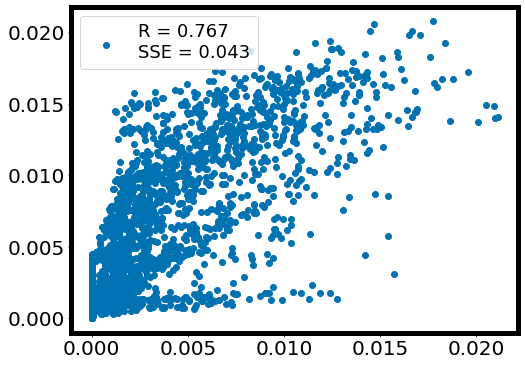

Top 5 profit predictions:  [0.22550647 0.21870585 0.21851027 0.21406971 0.21202998]
Pure exploitation, returning N max objective experiments
Running trial 4, cycle 4
Epoch: 0, Loss: 315.17449, Residuals: -0.44858, Convergence:   inf
Epoch: 10, Loss: 268.98779, Residuals: -0.40985, Convergence: 0.016058
Epoch: 20, Loss: 229.03020, Residuals: -0.37431, Convergence: 0.016347
Epoch: 30, Loss: 194.55278, Residuals: -0.34200, Convergence: 0.016480
Epoch: 40, Loss: 165.40268, Residuals: -0.31252, Convergence: 0.016218
Epoch: 50, Loss: 141.13629, Residuals: -0.28546, Convergence: 0.015594
Epoch: 60, Loss: 120.91337, Residuals: -0.26073, Convergence: 0.015442
Epoch: 70, Loss: 104.11541, Residuals: -0.23822, Convergence: 0.014901
Epoch: 80, Loss: 90.11719, Residuals: -0.21776, Convergence: 0.014287
Epoch: 90, Loss: 78.44915, Residuals: -0.19906, Convergence: 0.013574
Epoch: 100, Loss: 68.81532, Residuals: -0.18190, Convergence: 0.012829
Epoch: 110, Loss: 60.80260, Residuals: -0.16612, Convergenc

Epoch: 950, Loss: 240.38690, Residuals: -0.02003, Convergence: 0.001954
Epoch: 960, Loss: 236.34268, Residuals: -0.01978, Convergence: 0.001693

Epoch: 962, Evidence: 1240.39905, Convergence: 0.006255
Epoch: 970, Loss: 237.78696, Residuals: -0.02004, Convergence: 0.001547

Epoch: 974, Evidence: 1238.86169, Convergence: -0.001241


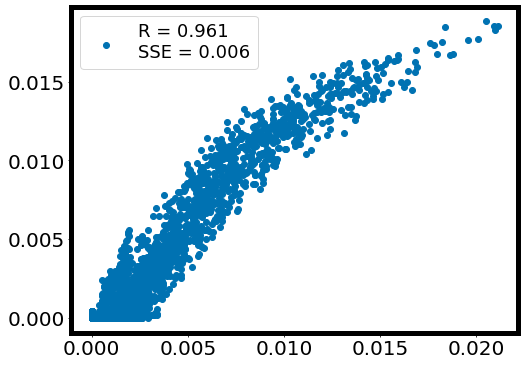

Top 5 profit predictions:  [0.20460278 0.20437047 0.2008108  0.20058341 0.1989    ]
Pure exploitation, returning N max objective experiments
Running trial 4, cycle 5
Epoch: 0, Loss: 386.77239, Residuals: -0.49533, Convergence:   inf
Epoch: 10, Loss: 330.61575, Residuals: -0.45117, Convergence: 0.016005
Epoch: 20, Loss: 281.44757, Residuals: -0.41094, Convergence: 0.016439
Epoch: 30, Loss: 238.63260, Residuals: -0.37439, Convergence: 0.016737
Epoch: 40, Loss: 202.35313, Residuals: -0.34089, Convergence: 0.016522
Epoch: 50, Loss: 172.14171, Residuals: -0.31022, Convergence: 0.016152
Epoch: 60, Loss: 146.98505, Residuals: -0.28236, Convergence: 0.015786
Epoch: 70, Loss: 125.92789, Residuals: -0.25722, Convergence: 0.015427
Epoch: 80, Loss: 108.41380, Residuals: -0.23453, Convergence: 0.014815
Epoch: 90, Loss: 93.76994, Residuals: -0.21388, Convergence: 0.014495
Epoch: 100, Loss: 81.52213, Residuals: -0.19496, Convergence: 0.013847
Epoch: 110, Loss: 71.38186, Residuals: -0.17768, Convergen

Epoch: 930, Loss: 313.58813, Residuals: -0.01255, Convergence: 0.001573

Epoch: 935, Evidence: 1663.73401, Convergence: -0.011689
Epoch: 940, Loss: 328.67065, Residuals: -0.00892, Convergence: 0.001414
Epoch: 950, Loss: 324.61731, Residuals: -0.00945, Convergence: 0.001144

Epoch: 956, Evidence: 1685.49878, Convergence: 0.001375
Epoch: 960, Loss: 325.05884, Residuals: -0.00981, Convergence: 0.001261
Epoch: 970, Loss: 321.38754, Residuals: -0.01022, Convergence: 0.001107

Epoch: 974, Evidence: 1681.79907, Convergence: -0.002200


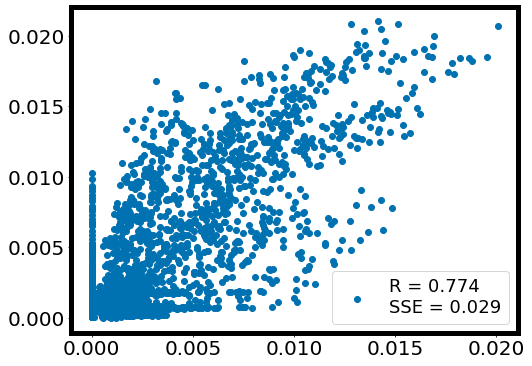

Top 5 profit predictions:  [0.22935298 0.22819176 0.22625938 0.2250726  0.22255006]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 460.11061, Residuals: -0.53094, Convergence:   inf
Epoch: 10, Loss: 392.74091, Residuals: -0.48279, Convergence: 0.016177
Epoch: 20, Loss: 333.53735, Residuals: -0.43918, Convergence: 0.016726
Epoch: 30, Loss: 282.08765, Residuals: -0.39956, Convergence: 0.016942
Epoch: 40, Loss: 239.13945, Residuals: -0.36303, Convergence: 0.016526
Epoch: 50, Loss: 203.58472, Residuals: -0.32968, Convergence: 0.016083
Epoch: 60, Loss: 174.07246, Residuals: -0.29960, Convergence: 0.015605
Epoch: 70, Loss: 149.36887, Residuals: -0.27239, Convergence: 0.015206
Epoch: 80, Loss: 128.92319, Residuals: -0.24785, Convergence: 0.014485
Epoch: 90, Loss: 111.97865, Residuals: -0.22552, Convergence: 0.013943
Epoch: 100, Loss: 97.92377, Residuals: -0.20521, Convergence: 0.013120
Epoch: 110, Loss: 86.24680, Residuals: -0.18682, Convergence: 0.012358
Epoch: 120,

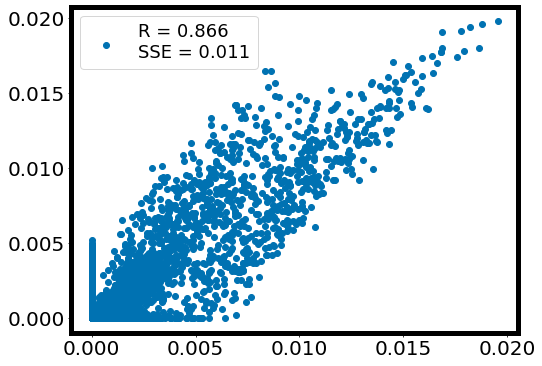

Running trial 5, cycle 1
Epoch: 0, Loss: 174.77905, Residuals: -0.44596, Convergence:   inf
Epoch: 10, Loss: 146.90796, Residuals: -0.41787, Convergence: 0.017655
Epoch: 20, Loss: 123.30395, Residuals: -0.39191, Convergence: 0.017681
Epoch: 30, Loss: 103.44575, Residuals: -0.36821, Convergence: 0.017753
Epoch: 40, Loss: 86.70850, Residuals: -0.34670, Convergence: 0.017848
Epoch: 50, Loss: 72.63854, Residuals: -0.32722, Convergence: 0.017860
Epoch: 60, Loss: 60.88160, Residuals: -0.30963, Convergence: 0.017761
Epoch: 70, Loss: 51.09956, Residuals: -0.29373, Convergence: 0.017588
Epoch: 80, Loss: 42.97826, Residuals: -0.27930, Convergence: 0.017343
Epoch: 90, Loss: 36.24832, Residuals: -0.26610, Convergence: 0.017025
Epoch: 100, Loss: 30.73132, Residuals: -0.25342, Convergence: 0.016280
Epoch: 110, Loss: 26.16513, Residuals: -0.24176, Convergence: 0.015811
Epoch: 120, Loss: 22.40529, Residuals: -0.23098, Convergence: 0.015535
Epoch: 130, Loss: 19.31902, Residuals: -0.22093, Convergence: 

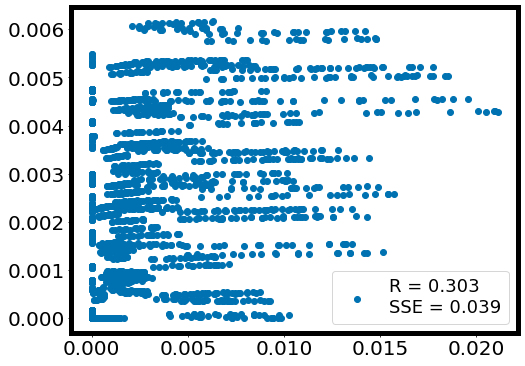

Top 5 profit predictions:  [0.06797893 0.06698819 0.06694785 0.06690123 0.06616936]
Pure exploitation, returning N max objective experiments
Running trial 5, cycle 2
Epoch: 0, Loss: 302.47170, Residuals: -0.61084, Convergence:   inf
Epoch: 10, Loss: 256.06561, Residuals: -0.56119, Convergence: 0.016881
Epoch: 20, Loss: 216.25868, Residuals: -0.51659, Convergence: 0.017177
Epoch: 30, Loss: 182.27203, Residuals: -0.47683, Convergence: 0.017267
Epoch: 40, Loss: 153.66141, Residuals: -0.44117, Convergence: 0.017161
Epoch: 50, Loss: 129.82341, Residuals: -0.40897, Convergence: 0.016848
Epoch: 60, Loss: 110.10849, Residuals: -0.37968, Convergence: 0.016397
Epoch: 70, Loss: 93.84872, Residuals: -0.35282, Convergence: 0.015862
Epoch: 80, Loss: 80.44706, Residuals: -0.32801, Convergence: 0.015168
Epoch: 90, Loss: 69.43319, Residuals: -0.30475, Convergence: 0.014567
Epoch: 100, Loss: 60.35761, Residuals: -0.28313, Convergence: 0.013872
Epoch: 110, Loss: 52.89108, Residuals: -0.26306, Convergence

Epoch: 750, Loss: 118.91620, Residuals: 0.00202, Convergence: 0.001673

Epoch: 757, Evidence: 505.56049, Convergence: -0.000265
Epoch: 760, Loss: 116.96102, Residuals: 0.00017, Convergence: 0.004634
Epoch: 770, Loss: 112.96033, Residuals: -0.00334, Convergence: 0.002940
Epoch: 780, Loss: 110.07206, Residuals: -0.00392, Convergence: 0.001848

Epoch: 783, Evidence: 499.63950, Convergence: -0.012118
Epoch: 790, Loss: 126.86389, Residuals: 0.00264, Convergence: 0.002224
Epoch: 800, Loss: 123.61990, Residuals: 0.00177, Convergence: 0.002385
Epoch: 810, Loss: 121.10841, Residuals: 0.00153, Convergence: 0.002151

Epoch: 813, Evidence: 509.80170, Convergence: 0.008057
Epoch: 820, Loss: 120.97753, Residuals: 0.00076, Convergence: 0.001071
Epoch: 830, Loss: 118.53175, Residuals: 0.00029, Convergence: 0.001180
Epoch: 840, Loss: 116.37181, Residuals: 0.00000, Convergence: 0.002050

Epoch: 841, Evidence: 506.41083, Convergence: -0.006696
Epoch: 850, Loss: 122.67520, Residuals: 0.00130, Convergence:

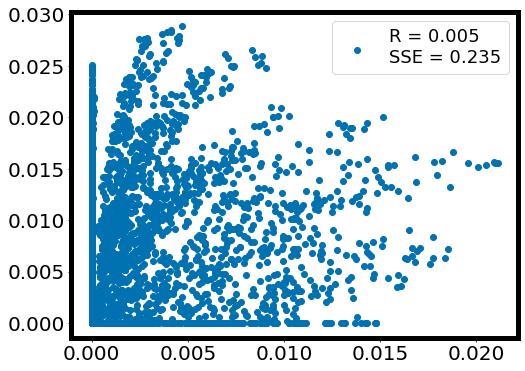

Top 5 profit predictions:  [0.3178464  0.30914685 0.3076682  0.3056798  0.30545998]
Pure exploitation, returning N max objective experiments
Running trial 5, cycle 3
Epoch: 0, Loss: 396.17668, Residuals: -0.65786, Convergence:   inf
Epoch: 10, Loss: 335.28839, Residuals: -0.59850, Convergence: 0.017038
Epoch: 20, Loss: 282.79245, Residuals: -0.54506, Convergence: 0.017321
Epoch: 30, Loss: 237.80072, Residuals: -0.49752, Convergence: 0.017637
Epoch: 40, Loss: 199.69344, Residuals: -0.45560, Convergence: 0.017529
Epoch: 50, Loss: 168.52400, Residuals: -0.41827, Convergence: 0.016128
Epoch: 60, Loss: 143.17076, Residuals: -0.38487, Convergence: 0.016084
Epoch: 70, Loss: 122.48483, Residuals: -0.35468, Convergence: 0.015619
Epoch: 80, Loss: 105.68874, Residuals: -0.32734, Convergence: 0.015052
Epoch: 90, Loss: 91.40372, Residuals: -0.30299, Convergence: 0.014296
Epoch: 100, Loss: 79.43256, Residuals: -0.28096, Convergence: 0.013736
Epoch: 110, Loss: 69.46593, Residuals: -0.26080, Convergen

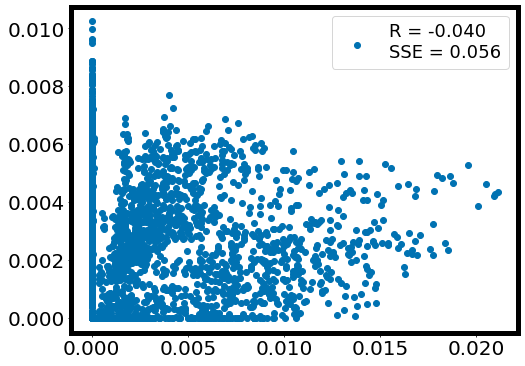

Top 5 profit predictions:  [0.11293019 0.10837724 0.10464578 0.1038388  0.10308871]
Pure exploitation, returning N max objective experiments
Running trial 5, cycle 4
Epoch: 0, Loss: 530.87950, Residuals: -0.53809, Convergence:   inf
Epoch: 10, Loss: 447.93076, Residuals: -0.48959, Convergence: 0.017442
Epoch: 20, Loss: 375.66049, Residuals: -0.44594, Convergence: 0.017963
Epoch: 30, Loss: 314.27084, Residuals: -0.40700, Convergence: 0.017952
Epoch: 40, Loss: 263.30112, Residuals: -0.37247, Convergence: 0.017726
Epoch: 50, Loss: 221.39258, Residuals: -0.34153, Convergence: 0.016855
Epoch: 60, Loss: 187.73894, Residuals: -0.31278, Convergence: 0.016341
Epoch: 70, Loss: 160.05243, Residuals: -0.28673, Convergence: 0.015921
Epoch: 80, Loss: 136.94867, Residuals: -0.26324, Convergence: 0.015429
Epoch: 90, Loss: 118.01980, Residuals: -0.24213, Convergence: 0.014574
Epoch: 100, Loss: 102.10653, Residuals: -0.22314, Convergence: 0.014587
Epoch: 110, Loss: 88.67063, Residuals: -0.20558, Converg


Epoch: 892, Evidence: 1217.34375, Convergence: -0.012194
Epoch: 900, Loss: 255.48328, Residuals: -0.01857, Convergence: 0.001692
Epoch: 910, Loss: 251.74318, Residuals: -0.01757, Convergence: 0.001587

Epoch: 912, Evidence: 1227.10657, Convergence: -0.004141


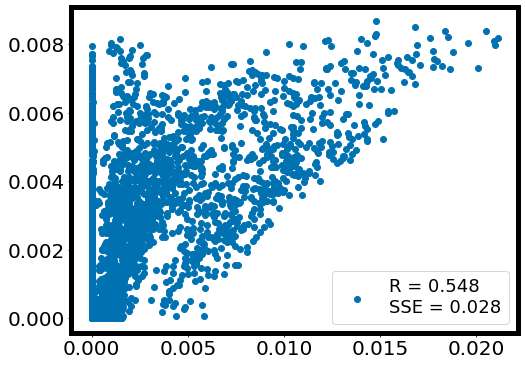

Top 5 profit predictions:  [0.09420567 0.09238412 0.09108572 0.0910675  0.09074955]
Pure exploitation, returning N max objective experiments
Running trial 5, cycle 5
Epoch: 0, Loss: 421.25218, Residuals: -0.21697, Convergence:   inf
Epoch: 10, Loss: 357.13513, Residuals: -0.19807, Convergence: 0.016938
Epoch: 20, Loss: 301.40131, Residuals: -0.18110, Convergence: 0.017265
Epoch: 30, Loss: 253.78845, Residuals: -0.16602, Convergence: 0.017320
Epoch: 40, Loss: 214.14046, Residuals: -0.15231, Convergence: 0.016832
Epoch: 50, Loss: 181.56148, Residuals: -0.13941, Convergence: 0.016521
Epoch: 60, Loss: 154.53217, Residuals: -0.12794, Convergence: 0.016044
Epoch: 70, Loss: 132.19939, Residuals: -0.11780, Convergence: 0.015451
Epoch: 80, Loss: 113.76781, Residuals: -0.10840, Convergence: 0.014976
Epoch: 90, Loss: 98.34505, Residuals: -0.09988, Convergence: 0.014442
Epoch: 100, Loss: 85.45219, Residuals: -0.09216, Convergence: 0.013893
Epoch: 110, Loss: 74.66856, Residuals: -0.08524, Convergen

Epoch: 910, Loss: 313.83423, Residuals: -0.00624, Convergence: 0.001838
Epoch: 920, Loss: 309.03079, Residuals: -0.00605, Convergence: 0.001471
Epoch: 930, Loss: 304.45471, Residuals: -0.00539, Convergence: 0.001696

Epoch: 932, Evidence: 1677.34912, Convergence: -0.001055
Epoch: 940, Loss: 320.99799, Residuals: -0.00534, Convergence: 0.001288

Epoch: 943, Evidence: 1692.00818, Convergence: 0.007617
Epoch: 950, Loss: 324.33859, Residuals: -0.00551, Convergence: 0.001280

Epoch: 955, Evidence: 1695.42456, Convergence: 0.002015
Epoch: 960, Loss: 325.91504, Residuals: -0.00565, Convergence: 0.001391

Epoch: 965, Evidence: 1695.68774, Convergence: 0.000155
Epoch: 970, Loss: 322.18176, Residuals: -0.00646, Convergence: 0.002414
Epoch: 980, Loss: 315.05029, Residuals: -0.00690, Convergence: 0.001984
Epoch: 990, Loss: 309.86694, Residuals: -0.00632, Convergence: 0.001263

Epoch: 995, Evidence: 1689.77417, Convergence: -0.003344


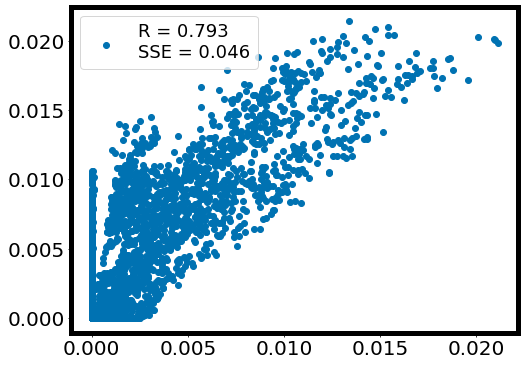

Top 5 profit predictions:  [0.23257127 0.23171614 0.2265714  0.22202653 0.22200426]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 507.91603, Residuals: -0.23101, Convergence:   inf
Epoch: 10, Loss: 432.57126, Residuals: -0.21071, Convergence: 0.016520
Epoch: 20, Loss: 366.27829, Residuals: -0.19239, Convergence: 0.016970
Epoch: 30, Loss: 309.36353, Residuals: -0.17577, Convergence: 0.016983
Epoch: 40, Loss: 262.07736, Residuals: -0.16045, Convergence: 0.016487
Epoch: 50, Loss: 222.94647, Residuals: -0.14653, Convergence: 0.016165
Epoch: 60, Loss: 189.96899, Residuals: -0.13392, Convergence: 0.016038
Epoch: 70, Loss: 162.20474, Residuals: -0.12282, Convergence: 0.015783
Epoch: 80, Loss: 138.96729, Residuals: -0.11285, Convergence: 0.015346
Epoch: 90, Loss: 119.50024, Residuals: -0.10397, Convergence: 0.014960
Epoch: 100, Loss: 103.35669, Residuals: -0.09580, Convergence: 0.014286
Epoch: 110, Loss: 89.91531, Residuals: -0.08819, Convergence: 0.013752
Epoch: 120


Epoch: 941, Evidence: 2100.60840, Convergence: 0.001901
Epoch: 950, Loss: 393.89746, Residuals: -0.00879, Convergence: 0.001030

Epoch: 951, Evidence: 2098.58130, Convergence: -0.000966

Epoch: 952, Evidence: 2102.17969, Convergence: 0.000747

Epoch: 954, Evidence: 2103.95728, Convergence: 0.001592

Epoch: 955, Evidence: 2103.92529, Convergence: -0.000015

Epoch: 959, Evidence: 2104.60327, Convergence: 0.000307
Epoch: 960, Loss: 398.62213, Residuals: -0.00841, Convergence: 0.000349

Epoch: 960, Evidence: 2101.42529, Convergence: -0.001205
Epoch: 960, Loss: 400.91327, Residuals: -0.00867, Convergence:   inf

Epoch: 968, Evidence: 2102.54590, Convergence: -0.000671


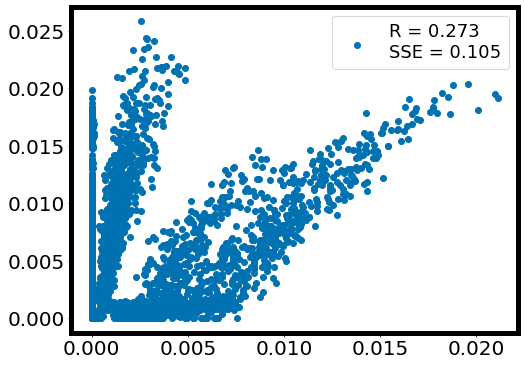

Running trial 6, cycle 1
Epoch: 0, Loss: 87.39661, Residuals: -0.66683, Convergence:   inf
Epoch: 10, Loss: 74.62479, Residuals: -0.61797, Convergence: 0.015844
Epoch: 20, Loss: 63.79314, Residuals: -0.57620, Convergence: 0.015775
Epoch: 30, Loss: 54.58788, Residuals: -0.53922, Convergence: 0.015643
Epoch: 40, Loss: 46.77396, Residuals: -0.50560, Convergence: 0.015510
Epoch: 50, Loss: 40.12893, Residuals: -0.47471, Convergence: 0.015383
Epoch: 60, Loss: 34.47588, Residuals: -0.44624, Convergence: 0.015223
Epoch: 70, Loss: 29.67602, Residuals: -0.42009, Convergence: 0.014996
Epoch: 80, Loss: 25.61325, Residuals: -0.39618, Convergence: 0.014684
Epoch: 90, Loss: 22.18503, Residuals: -0.37441, Convergence: 0.014287
Epoch: 100, Loss: 19.32318, Residuals: -0.35423, Convergence: 0.013742
Epoch: 110, Loss: 16.92472, Residuals: -0.33569, Convergence: 0.013234
Epoch: 120, Loss: 14.91516, Residuals: -0.31847, Convergence: 0.012532
Epoch: 130, Loss: 13.23553, Residuals: -0.30250, Convergence: 0.01

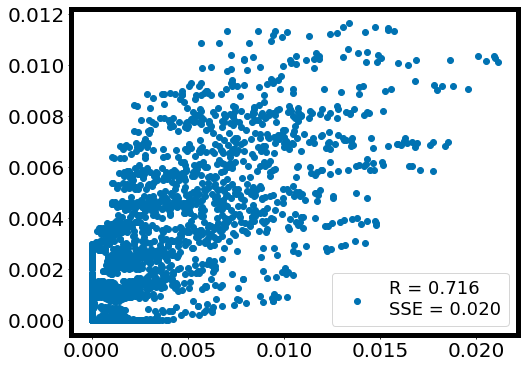

Top 5 profit predictions:  [0.12646544 0.12636471 0.12487998 0.12328045 0.12300447]
Pure exploitation, returning N max objective experiments
Running trial 6, cycle 2
Epoch: 0, Loss: 210.05199, Residuals: -0.91723, Convergence:   inf
Epoch: 10, Loss: 178.33011, Residuals: -0.83821, Convergence: 0.016518
Epoch: 20, Loss: 151.37033, Residuals: -0.76704, Convergence: 0.016523
Epoch: 30, Loss: 128.53168, Residuals: -0.70310, Convergence: 0.016455
Epoch: 40, Loss: 109.23084, Residuals: -0.64523, Convergence: 0.016358
Epoch: 50, Loss: 93.08366, Residuals: -0.59241, Convergence: 0.016057
Epoch: 60, Loss: 79.46336, Residuals: -0.54465, Convergence: 0.015790
Epoch: 70, Loss: 68.09360, Residuals: -0.50121, Convergence: 0.015350
Epoch: 80, Loss: 58.66515, Residuals: -0.46141, Convergence: 0.014801
Epoch: 90, Loss: 50.83231, Residuals: -0.42503, Convergence: 0.014251
Epoch: 100, Loss: 44.37951, Residuals: -0.39167, Convergence: 0.013114
Epoch: 110, Loss: 39.00853, Residuals: -0.36133, Convergence: 


Epoch: 819, Evidence: 527.57977, Convergence: 0.001561
Epoch: 820, Loss: 124.66322, Residuals: -0.00075, Convergence: 0.001367

Epoch: 825, Evidence: 526.79407, Convergence: -0.001491


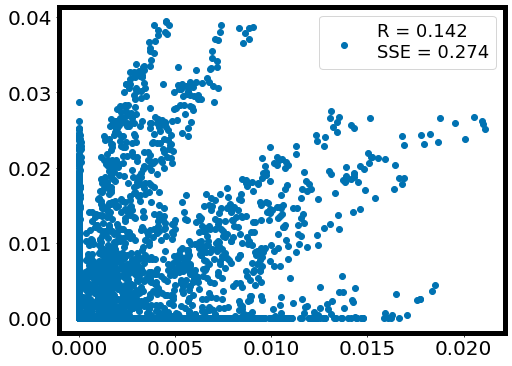

Top 5 profit predictions:  [0.42938998 0.42808127 0.42669654 0.4260052  0.42518705]
Pure exploitation, returning N max objective experiments
Running trial 6, cycle 3
Epoch: 0, Loss: 320.30913, Residuals: -0.72823, Convergence:   inf
Epoch: 10, Loss: 271.47180, Residuals: -0.66232, Convergence: 0.016753
Epoch: 20, Loss: 229.63364, Residuals: -0.60284, Convergence: 0.016967
Epoch: 30, Loss: 193.96309, Residuals: -0.54935, Convergence: 0.017056
Epoch: 40, Loss: 163.85147, Residuals: -0.50079, Convergence: 0.016964
Epoch: 50, Loss: 138.84216, Residuals: -0.45634, Convergence: 0.015870
Epoch: 60, Loss: 118.14340, Residuals: -0.41639, Convergence: 0.016132
Epoch: 70, Loss: 101.23351, Residuals: -0.37988, Convergence: 0.015207
Epoch: 80, Loss: 87.29924, Residuals: -0.34690, Convergence: 0.014370
Epoch: 90, Loss: 75.81790, Residuals: -0.31702, Convergence: 0.013829
Epoch: 100, Loss: 66.30562, Residuals: -0.29011, Convergence: 0.012891
Epoch: 110, Loss: 58.35496, Residuals: -0.26555, Convergenc

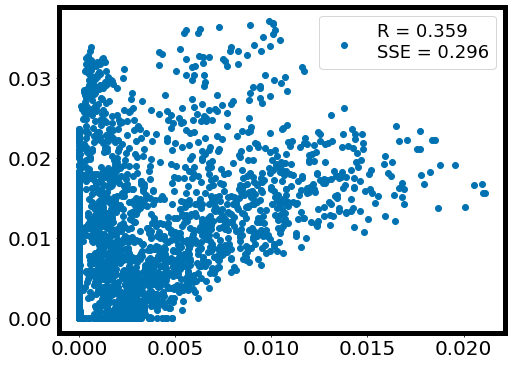

Top 5 profit predictions:  [0.4052815  0.40263742 0.4000175  0.38900602 0.37794495]
Pure exploitation, returning N max objective experiments
Running trial 6, cycle 4
Epoch: 0, Loss: 485.41206, Residuals: -0.65572, Convergence:   inf
Epoch: 10, Loss: 410.22940, Residuals: -0.59540, Convergence: 0.017059
Epoch: 20, Loss: 345.82581, Residuals: -0.54095, Convergence: 0.017367
Epoch: 30, Loss: 290.70755, Residuals: -0.49230, Convergence: 0.017609
Epoch: 40, Loss: 244.09290, Residuals: -0.44834, Convergence: 0.017461
Epoch: 50, Loss: 206.03845, Residuals: -0.40829, Convergence: 0.016948
Epoch: 60, Loss: 174.57898, Residuals: -0.37218, Convergence: 0.016699
Epoch: 70, Loss: 148.47583, Residuals: -0.33929, Convergence: 0.016055
Epoch: 80, Loss: 126.95852, Residuals: -0.30921, Convergence: 0.015518
Epoch: 90, Loss: 109.13960, Residuals: -0.28189, Convergence: 0.014302
Epoch: 100, Loss: 94.28802, Residuals: -0.25702, Convergence: 0.014434
Epoch: 110, Loss: 82.00069, Residuals: -0.23439, Converge

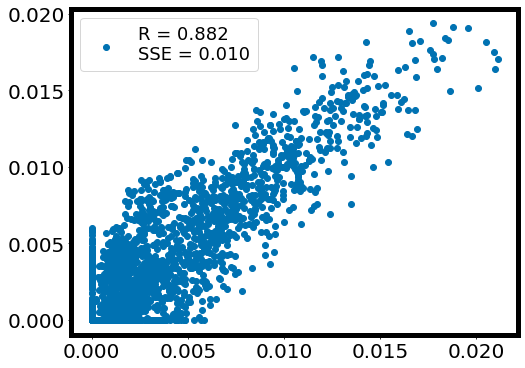

Top 5 profit predictions:  [0.21114947 0.21062875 0.20814362 0.20770134 0.20153698]
Pure exploitation, returning N max objective experiments
Running trial 6, cycle 5
Epoch: 0, Loss: 509.85393, Residuals: -0.48017, Convergence:   inf
Epoch: 10, Loss: 432.43643, Residuals: -0.43725, Convergence: 0.016643
Epoch: 20, Loss: 365.68756, Residuals: -0.39881, Convergence: 0.017141
Epoch: 30, Loss: 307.68036, Residuals: -0.36508, Convergence: 0.017621
Epoch: 40, Loss: 258.32321, Residuals: -0.33460, Convergence: 0.017636
Epoch: 50, Loss: 217.39851, Residuals: -0.30566, Convergence: 0.017226
Epoch: 60, Loss: 183.82825, Residuals: -0.27861, Convergence: 0.016717
Epoch: 70, Loss: 156.23140, Residuals: -0.25369, Convergence: 0.016199
Epoch: 80, Loss: 133.49454, Residuals: -0.23098, Convergence: 0.015581
Epoch: 90, Loss: 114.75411, Residuals: -0.21037, Convergence: 0.015004
Epoch: 100, Loss: 99.37227, Residuals: -0.19146, Convergence: 0.014047
Epoch: 110, Loss: 86.59973, Residuals: -0.17436, Converge


Epoch: 945, Evidence: 1570.56934, Convergence: -0.010369
Epoch: 950, Loss: 333.61172, Residuals: -0.00265, Convergence: 0.001564
Epoch: 960, Loss: 329.17737, Residuals: -0.00291, Convergence: 0.001298

Epoch: 965, Evidence: 1588.48792, Convergence: 0.001028
Epoch: 970, Loss: 328.97986, Residuals: -0.00307, Convergence: 0.001291
Epoch: 980, Loss: 325.07751, Residuals: -0.00321, Convergence: 0.001027

Epoch: 984, Evidence: 1584.60095, Convergence: -0.002453


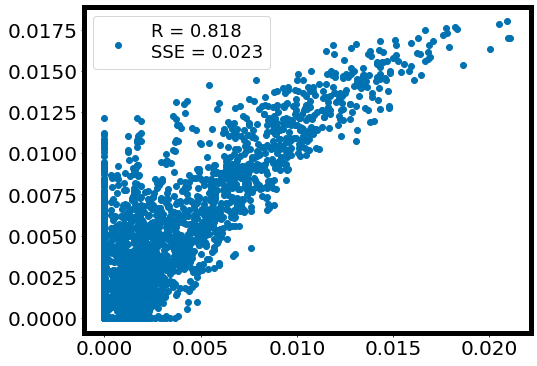

Top 5 profit predictions:  [0.19850704 0.19369565 0.19156584 0.1912186  0.19099724]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 592.18535, Residuals: -0.52096, Convergence:   inf
Epoch: 10, Loss: 502.33093, Residuals: -0.47395, Convergence: 0.016719
Epoch: 20, Loss: 423.86441, Residuals: -0.43157, Convergence: 0.017482
Epoch: 30, Loss: 355.18188, Residuals: -0.39418, Convergence: 0.018035
Epoch: 40, Loss: 297.19644, Residuals: -0.36012, Convergence: 0.017626
Epoch: 50, Loss: 249.71707, Residuals: -0.32783, Convergence: 0.017238
Epoch: 60, Loss: 211.16370, Residuals: -0.29777, Convergence: 0.016482
Epoch: 70, Loss: 179.48802, Residuals: -0.27023, Convergence: 0.016251
Epoch: 80, Loss: 153.21600, Residuals: -0.24529, Convergence: 0.015727
Epoch: 90, Loss: 131.63383, Residuals: -0.22245, Convergence: 0.015110
Epoch: 100, Loss: 113.80086, Residuals: -0.20162, Convergence: 0.014430
Epoch: 110, Loss: 99.04864, Residuals: -0.18264, Convergence: 0.013216
Epoch: 120


Epoch: 916, Evidence: 1977.37463, Convergence: -0.003986


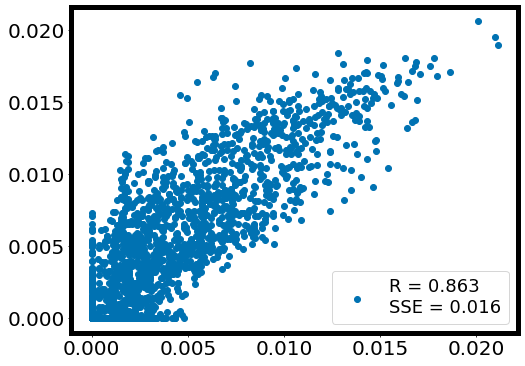

Running trial 7, cycle 1
Epoch: 0, Loss: 101.36518, Residuals: -1.05491, Convergence:   inf
Epoch: 10, Loss: 86.80273, Residuals: -0.96942, Convergence: 0.016021
Epoch: 20, Loss: 73.87830, Residuals: -0.89467, Convergence: 0.016375
Epoch: 30, Loss: 62.75284, Residuals: -0.82746, Convergence: 0.016518
Epoch: 40, Loss: 53.26248, Residuals: -0.76613, Convergence: 0.016531
Epoch: 50, Loss: 45.23844, Residuals: -0.71048, Convergence: 0.016370
Epoch: 60, Loss: 38.51084, Residuals: -0.65969, Convergence: 0.016131
Epoch: 70, Loss: 32.87876, Residuals: -0.61323, Convergence: 0.015720
Epoch: 80, Loss: 28.26174, Residuals: -0.56968, Convergence: 0.014701
Epoch: 90, Loss: 24.43586, Residuals: -0.52877, Convergence: 0.014396
Epoch: 100, Loss: 21.25376, Residuals: -0.49075, Convergence: 0.013977
Epoch: 110, Loss: 18.58090, Residuals: -0.45622, Convergence: 0.013579
Epoch: 120, Loss: 16.37173, Residuals: -0.42436, Convergence: 0.012162
Epoch: 130, Loss: 14.50798, Residuals: -0.39528, Convergence: 0.0


Epoch: 793, Evidence: 217.05527, Convergence: 0.000164

Epoch: 797, Evidence: 218.42688, Convergence: 0.006442
Epoch: 800, Loss: 50.44971, Residuals: 0.00003, Convergence: 0.001500

Epoch: 801, Evidence: 217.93460, Convergence: -0.002259

Epoch: 802, Evidence: 219.44376, Convergence: 0.004634

Epoch: 807, Evidence: 221.79761, Convergence: 0.010613

Epoch: 809, Evidence: 223.03867, Convergence: 0.005564
Epoch: 810, Loss: 53.41205, Residuals: 0.00013, Convergence: 0.001324

Epoch: 812, Evidence: 222.96362, Convergence: -0.000337

Epoch: 818, Evidence: 223.25456, Convergence: 0.000967
Epoch: 820, Loss: 53.18951, Residuals: -0.00105, Convergence: 0.003742

Epoch: 822, Evidence: 222.94542, Convergence: -0.000418


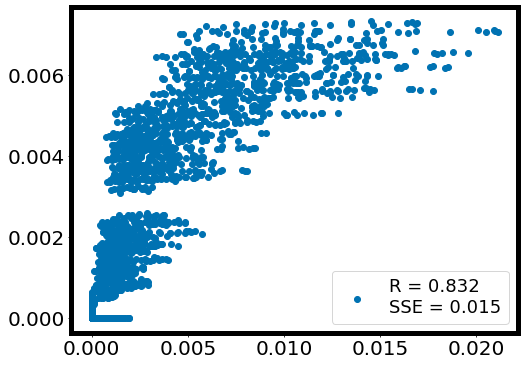

Top 5 profit predictions:  [0.08016157 0.07950542 0.07929898 0.0788788  0.07864089]
Pure exploitation, returning N max objective experiments
Running trial 7, cycle 2
Epoch: 0, Loss: 163.21594, Residuals: -0.98418, Convergence:   inf
Epoch: 10, Loss: 141.01009, Residuals: -0.89828, Convergence: 0.014803
Epoch: 20, Loss: 121.70084, Residuals: -0.82084, Convergence: 0.014858
Epoch: 30, Loss: 105.02431, Residuals: -0.75105, Convergence: 0.014812
Epoch: 40, Loss: 90.77364, Residuals: -0.68805, Convergence: 0.014538
Epoch: 50, Loss: 78.82378, Residuals: -0.63076, Convergence: 0.014044
Epoch: 60, Loss: 68.81880, Residuals: -0.57854, Convergence: 0.013530
Epoch: 70, Loss: 60.43730, Residuals: -0.53045, Convergence: 0.012894
Epoch: 80, Loss: 53.33327, Residuals: -0.48674, Convergence: 0.012348
Epoch: 90, Loss: 47.38534, Residuals: -0.44667, Convergence: 0.011740
Epoch: 100, Loss: 42.39495, Residuals: -0.41001, Convergence: 0.011143
Epoch: 110, Loss: 38.22892, Residuals: -0.37642, Convergence: 0


Epoch: 868, Evidence: 494.42126, Convergence: 0.010520
Epoch: 870, Loss: 116.08318, Residuals: 0.00258, Convergence: 0.001181

Epoch: 871, Evidence: 496.86661, Convergence: 0.004922

Epoch: 875, Evidence: 499.30759, Convergence: 0.004889
Epoch: 880, Loss: 119.62692, Residuals: 0.00223, Convergence: 0.001310

Epoch: 889, Evidence: 499.34564, Convergence: 0.000076
Epoch: 890, Loss: 119.35559, Residuals: 0.00181, Convergence: 0.002712
Epoch: 900, Loss: 116.90181, Residuals: 0.00100, Convergence: 0.001903
Epoch: 910, Loss: 114.80240, Residuals: 0.00015, Convergence: 0.001909
Epoch: 920, Loss: 113.21388, Residuals: -0.00021, Convergence: 0.001334

Epoch: 924, Evidence: 494.62753, Convergence: -0.009462


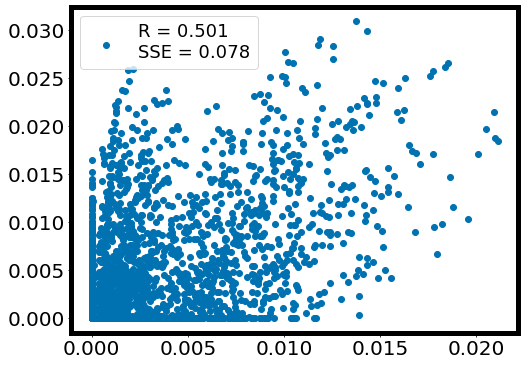

Top 5 profit predictions:  [0.34109265 0.3250262  0.3165354  0.30974367 0.3071207 ]
Pure exploitation, returning N max objective experiments
Running trial 7, cycle 3
Epoch: 0, Loss: 246.58850, Residuals: -0.99103, Convergence:   inf
Epoch: 10, Loss: 211.76332, Residuals: -0.90223, Convergence: 0.015391
Epoch: 20, Loss: 181.67757, Residuals: -0.82184, Convergence: 0.015487
Epoch: 30, Loss: 155.74890, Residuals: -0.74883, Convergence: 0.015512
Epoch: 40, Loss: 133.75798, Residuals: -0.68224, Convergence: 0.015129
Epoch: 50, Loss: 115.28742, Residuals: -0.62149, Convergence: 0.014890
Epoch: 60, Loss: 99.67809, Residuals: -0.56651, Convergence: 0.014445
Epoch: 70, Loss: 86.61994, Residuals: -0.51644, Convergence: 0.013885
Epoch: 80, Loss: 75.77943, Residuals: -0.47052, Convergence: 0.013161
Epoch: 90, Loss: 66.73015, Residuals: -0.42867, Convergence: 0.012484
Epoch: 100, Loss: 59.16679, Residuals: -0.39057, Convergence: 0.011765
Epoch: 110, Loss: 52.82256, Residuals: -0.35601, Convergence:

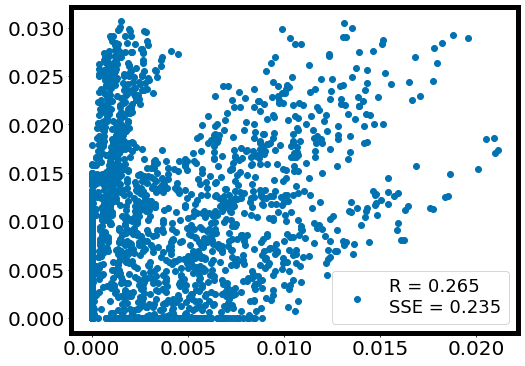

Top 5 profit predictions:  [0.33311093 0.33131227 0.33119082 0.33107114 0.32923803]
Pure exploitation, returning N max objective experiments
Running trial 7, cycle 4
Epoch: 0, Loss: 346.81218, Residuals: -0.73413, Convergence:   inf
Epoch: 10, Loss: 296.02869, Residuals: -0.66786, Convergence: 0.016098
Epoch: 20, Loss: 251.88399, Residuals: -0.60806, Convergence: 0.016359
Epoch: 30, Loss: 214.18713, Residuals: -0.55398, Convergence: 0.016307
Epoch: 40, Loss: 182.62885, Residuals: -0.50497, Convergence: 0.016035
Epoch: 50, Loss: 156.07581, Residuals: -0.46058, Convergence: 0.015666
Epoch: 60, Loss: 133.74628, Residuals: -0.41991, Convergence: 0.015472
Epoch: 70, Loss: 115.00117, Residuals: -0.38263, Convergence: 0.015078
Epoch: 80, Loss: 99.33856, Residuals: -0.34848, Convergence: 0.014497
Epoch: 90, Loss: 86.28320, Residuals: -0.31757, Convergence: 0.013941
Epoch: 100, Loss: 75.42577, Residuals: -0.28957, Convergence: 0.013256
Epoch: 110, Loss: 66.45641, Residuals: -0.26417, Convergenc

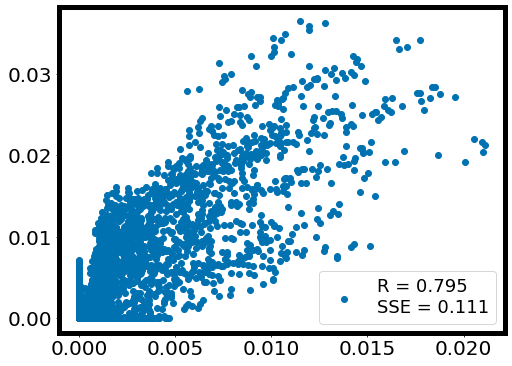

Top 5 profit predictions:  [0.40026277 0.3960596  0.3887202  0.38403758 0.37624937]
Pure exploitation, returning N max objective experiments
Running trial 7, cycle 5
Epoch: 0, Loss: 386.12599, Residuals: -0.50548, Convergence:   inf
Epoch: 10, Loss: 329.14380, Residuals: -0.46044, Convergence: 0.016266
Epoch: 20, Loss: 279.79138, Residuals: -0.41931, Convergence: 0.016447
Epoch: 30, Loss: 237.82407, Residuals: -0.38205, Convergence: 0.016247
Epoch: 40, Loss: 202.96138, Residuals: -0.34826, Convergence: 0.015763
Epoch: 50, Loss: 173.91525, Residuals: -0.31765, Convergence: 0.015375
Epoch: 60, Loss: 149.69284, Residuals: -0.28964, Convergence: 0.014972
Epoch: 70, Loss: 129.52153, Residuals: -0.26419, Convergence: 0.014221
Epoch: 80, Loss: 112.62111, Residuals: -0.24125, Convergence: 0.013843
Epoch: 90, Loss: 98.49541, Residuals: -0.22022, Convergence: 0.013196
Epoch: 100, Loss: 86.47693, Residuals: -0.20116, Convergence: 0.012807
Epoch: 110, Loss: 76.44914, Residuals: -0.18368, Convergen

Epoch: 940, Loss: 329.06686, Residuals: -0.01276, Convergence: 0.001395
Epoch: 950, Loss: 324.91147, Residuals: -0.01326, Convergence: 0.001161

Epoch: 953, Evidence: 1585.61450, Convergence: -0.004793


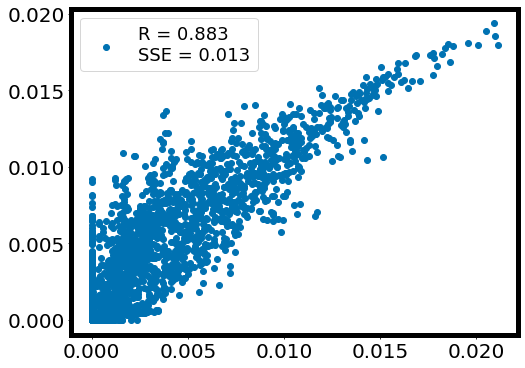

Top 5 profit predictions:  [0.213531   0.2049447  0.20143548 0.19875602 0.19755329]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 457.07018, Residuals: -0.46134, Convergence:   inf
Epoch: 10, Loss: 389.12006, Residuals: -0.42006, Convergence: 0.016414
Epoch: 20, Loss: 330.19287, Residuals: -0.38224, Convergence: 0.016667
Epoch: 30, Loss: 279.91083, Residuals: -0.34802, Convergence: 0.016515
Epoch: 40, Loss: 238.16391, Residuals: -0.31724, Convergence: 0.016111
Epoch: 50, Loss: 203.48682, Residuals: -0.28916, Convergence: 0.015697
Epoch: 60, Loss: 174.61046, Residuals: -0.26363, Convergence: 0.015105
Epoch: 70, Loss: 150.35904, Residuals: -0.24026, Convergence: 0.014919
Epoch: 80, Loss: 129.98845, Residuals: -0.21905, Convergence: 0.014522
Epoch: 90, Loss: 112.94855, Residuals: -0.19980, Convergence: 0.013921
Epoch: 100, Loss: 98.77751, Residuals: -0.18226, Convergence: 0.013274
Epoch: 110, Loss: 87.03269, Residuals: -0.16619, Convergence: 0.012333
Epoch: 120,

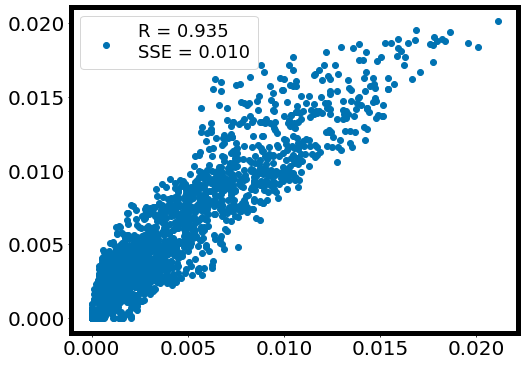

Running trial 8, cycle 1
Epoch: 0, Loss: 84.15370, Residuals: -0.90261, Convergence:   inf
Epoch: 10, Loss: 71.96246, Residuals: -0.83859, Convergence: 0.015684
Epoch: 20, Loss: 61.69618, Residuals: -0.78078, Convergence: 0.015347
Epoch: 30, Loss: 53.09866, Residuals: -0.72828, Convergence: 0.014930
Epoch: 40, Loss: 45.89173, Residuals: -0.68063, Convergence: 0.014500
Epoch: 50, Loss: 39.82946, Residuals: -0.63759, Convergence: 0.014081
Epoch: 60, Loss: 34.71717, Residuals: -0.59869, Convergence: 0.013646
Epoch: 70, Loss: 30.38954, Residuals: -0.56347, Convergence: 0.013351
Epoch: 80, Loss: 26.71304, Residuals: -0.53170, Convergence: 0.012804
Epoch: 90, Loss: 23.58356, Residuals: -0.50279, Convergence: 0.012103
Epoch: 100, Loss: 20.90838, Residuals: -0.47649, Convergence: 0.011654
Epoch: 110, Loss: 18.63062, Residuals: -0.45185, Convergence: 0.011400
Epoch: 120, Loss: 16.67587, Residuals: -0.42895, Convergence: 0.010942
Epoch: 130, Loss: 14.97965, Residuals: -0.40720, Convergence: 0.01

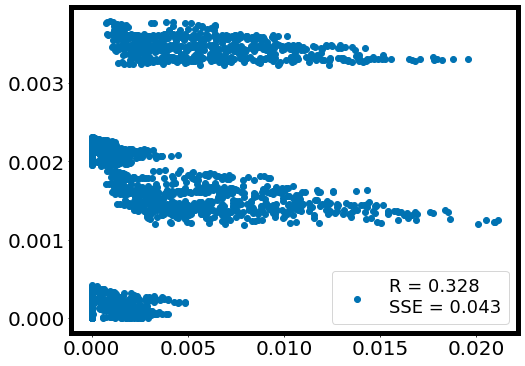

Top 5 profit predictions:  [0.0409826  0.04094416 0.04070498 0.04066594 0.04030734]
Pure exploitation, returning N max objective experiments
Running trial 8, cycle 2
Epoch: 0, Loss: 229.50047, Residuals: -0.25439, Convergence:   inf
Epoch: 10, Loss: 193.64877, Residuals: -0.23942, Convergence: 0.017035
Epoch: 20, Loss: 163.73750, Residuals: -0.22545, Convergence: 0.016809
Epoch: 30, Loss: 138.80571, Residuals: -0.21225, Convergence: 0.016528
Epoch: 40, Loss: 118.02143, Residuals: -0.19983, Convergence: 0.016205
Epoch: 50, Loss: 100.69195, Residuals: -0.18748, Convergence: 0.015863
Epoch: 60, Loss: 86.24122, Residuals: -0.17619, Convergence: 0.015411
Epoch: 70, Loss: 74.28950, Residuals: -0.16559, Convergence: 0.014896
Epoch: 80, Loss: 64.33620, Residuals: -0.15578, Convergence: 0.014300
Epoch: 90, Loss: 56.09890, Residuals: -0.14654, Convergence: 0.013253
Epoch: 100, Loss: 49.19611, Residuals: -0.13791, Convergence: 0.012677
Epoch: 110, Loss: 43.47183, Residuals: -0.12968, Convergence:

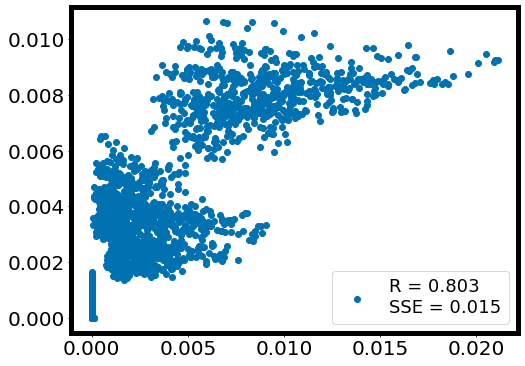

Top 5 profit predictions:  [0.1029892  0.10287437 0.10284062 0.10172759 0.10114996]
Pure exploitation, returning N max objective experiments
Running trial 8, cycle 3
Epoch: 0, Loss: 309.49782, Residuals: 0.01349, Convergence:   inf
Epoch: 10, Loss: 261.86197, Residuals: 0.00808, Convergence: 0.016950
Epoch: 20, Loss: 221.29752, Residuals: 0.00333, Convergence: 0.016970
Epoch: 30, Loss: 187.10066, Residuals: -0.00090, Convergence: 0.016873
Epoch: 40, Loss: 158.45862, Residuals: -0.00465, Convergence: 0.016640
Epoch: 50, Loss: 134.80608, Residuals: -0.00763, Convergence: 0.016156
Epoch: 60, Loss: 115.11575, Residuals: -0.01022, Convergence: 0.015742
Epoch: 70, Loss: 98.67548, Residuals: -0.01260, Convergence: 0.015353
Epoch: 80, Loss: 85.01978, Residuals: -0.01475, Convergence: 0.014650
Epoch: 90, Loss: 73.68864, Residuals: -0.01637, Convergence: 0.014156
Epoch: 100, Loss: 64.31398, Residuals: -0.01773, Convergence: 0.013397
Epoch: 110, Loss: 56.56088, Residuals: -0.01872, Convergence: 0

Epoch: 920, Loss: 175.45793, Residuals: -0.00065, Convergence: 0.002100
Epoch: 930, Loss: 172.03122, Residuals: -0.00076, Convergence: 0.001173

Epoch: 932, Evidence: 867.23108, Convergence: -0.004542


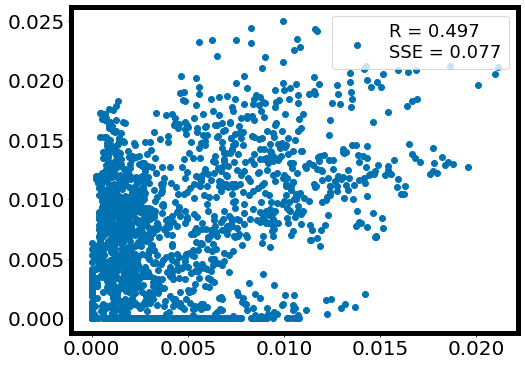

Top 5 profit predictions:  [0.27108577 0.266077   0.26459467 0.25351557 0.2519674 ]
Pure exploitation, returning N max objective experiments
Running trial 8, cycle 4
Epoch: 0, Loss: 437.96846, Residuals: -0.05303, Convergence:   inf
Epoch: 10, Loss: 369.79272, Residuals: -0.05098, Convergence: 0.017099
Epoch: 20, Loss: 311.91623, Residuals: -0.04901, Convergence: 0.017219
Epoch: 30, Loss: 262.88348, Residuals: -0.04739, Convergence: 0.017245
Epoch: 40, Loss: 221.79573, Residuals: -0.04592, Convergence: 0.016861
Epoch: 50, Loss: 187.95247, Residuals: -0.04448, Convergence: 0.016588
Epoch: 60, Loss: 159.88789, Residuals: -0.04289, Convergence: 0.016089
Epoch: 70, Loss: 136.75748, Residuals: -0.04145, Convergence: 0.015480
Epoch: 80, Loss: 117.77566, Residuals: -0.03988, Convergence: 0.014757
Epoch: 90, Loss: 102.16100, Residuals: -0.03824, Convergence: 0.013998
Epoch: 100, Loss: 89.29531, Residuals: -0.03666, Convergence: 0.013193
Epoch: 110, Loss: 78.68937, Residuals: -0.03514, Converge


Epoch: 927, Evidence: 1224.50806, Convergence: 0.001342

Epoch: 928, Evidence: 1224.85547, Convergence: 0.000284
Epoch: 930, Loss: 261.00986, Residuals: -0.01089, Convergence: 0.001546
Epoch: 940, Loss: 257.08160, Residuals: -0.01136, Convergence: 0.001363

Epoch: 949, Evidence: 1218.71594, Convergence: -0.004753
Epoch: 950, Loss: 262.27341, Residuals: -0.01057, Convergence: 0.001011

Epoch: 952, Evidence: 1228.04175, Convergence: 0.002878

Epoch: 953, Evidence: 1228.36316, Convergence: 0.000262
Epoch: 960, Loss: 260.67996, Residuals: -0.01108, Convergence: 0.001477

Epoch: 965, Evidence: 1224.91736, Convergence: -0.002551


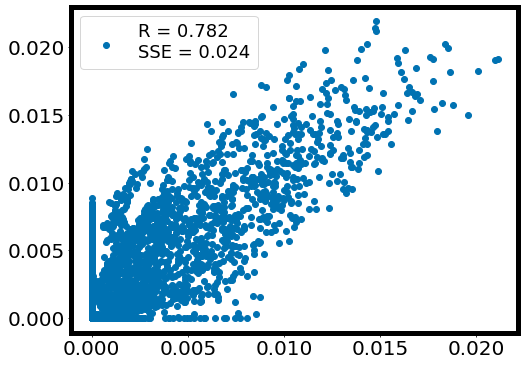

Top 5 profit predictions:  [0.23820442 0.23627785 0.22966217 0.22041632 0.22006445]
Pure exploitation, returning N max objective experiments
Running trial 8, cycle 5
Epoch: 0, Loss: 473.58092, Residuals: -0.12589, Convergence:   inf
Epoch: 10, Loss: 401.37259, Residuals: -0.11645, Convergence: 0.016775
Epoch: 20, Loss: 339.25925, Residuals: -0.10798, Convergence: 0.017112
Epoch: 30, Loss: 285.97964, Residuals: -0.10039, Convergence: 0.017277
Epoch: 40, Loss: 241.04355, Residuals: -0.09309, Convergence: 0.017017
Epoch: 50, Loss: 203.81006, Residuals: -0.08591, Convergence: 0.016799
Epoch: 60, Loss: 172.89174, Residuals: -0.07921, Convergence: 0.016315
Epoch: 70, Loss: 147.59064, Residuals: -0.07278, Convergence: 0.015747
Epoch: 80, Loss: 126.54493, Residuals: -0.06701, Convergence: 0.015195
Epoch: 90, Loss: 109.14690, Residuals: -0.06176, Convergence: 0.014568
Epoch: 100, Loss: 94.80013, Residuals: -0.05698, Convergence: 0.013902
Epoch: 110, Loss: 82.94812, Residuals: -0.05263, Converge

Epoch: 940, Loss: 325.14529, Residuals: -0.01420, Convergence: 0.001498
Epoch: 950, Loss: 321.00162, Residuals: -0.01462, Convergence: 0.001108

Epoch: 952, Evidence: 1564.50867, Convergence: -0.008372
Epoch: 960, Loss: 336.87848, Residuals: -0.00945, Convergence: 0.001390
Epoch: 970, Loss: 332.68903, Residuals: -0.00996, Convergence: 0.001099

Epoch: 972, Evidence: 1581.26636, Convergence: 0.002315
Epoch: 980, Loss: 332.60306, Residuals: -0.01063, Convergence: 0.001113

Epoch: 984, Evidence: 1580.82983, Convergence: -0.000276
Epoch: 990, Loss: 329.76859, Residuals: -0.01388, Convergence: 0.001682

Epoch: 998, Evidence: 1573.13538, Convergence: -0.005169


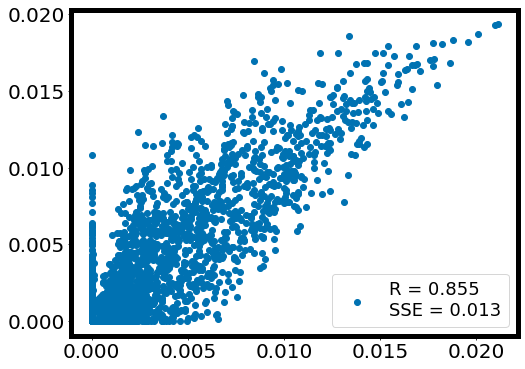

Top 5 profit predictions:  [0.20990692 0.20899501 0.20308587 0.20201583 0.20198703]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 582.42174, Residuals: -0.16564, Convergence:   inf
Epoch: 10, Loss: 492.84058, Residuals: -0.15210, Convergence: 0.016940
Epoch: 20, Loss: 415.55185, Residuals: -0.13990, Convergence: 0.017416
Epoch: 30, Loss: 349.01208, Residuals: -0.12895, Convergence: 0.017865
Epoch: 40, Loss: 292.80365, Residuals: -0.11891, Convergence: 0.017493
Epoch: 50, Loss: 246.65588, Residuals: -0.10910, Convergence: 0.017103
Epoch: 60, Loss: 208.84840, Residuals: -0.09991, Convergence: 0.016539
Epoch: 70, Loss: 177.70665, Residuals: -0.09150, Convergence: 0.016007
Epoch: 80, Loss: 152.08826, Residuals: -0.08384, Convergence: 0.015401
Epoch: 90, Loss: 131.01579, Residuals: -0.07689, Convergence: 0.014742
Epoch: 100, Loss: 113.70737, Residuals: -0.07057, Convergence: 0.013967
Epoch: 110, Loss: 99.48396, Residuals: -0.06484, Convergence: 0.013057
Epoch: 120

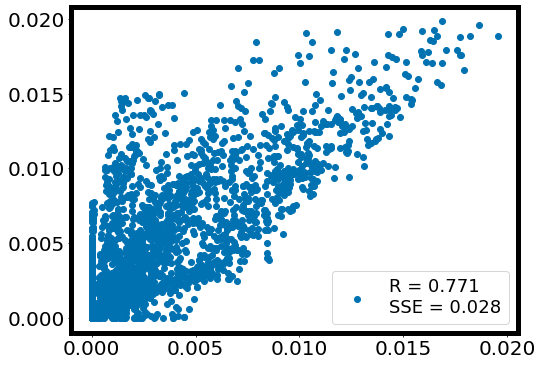

Running trial 9, cycle 1
Epoch: 0, Loss: 91.35610, Residuals: -0.70278, Convergence:   inf
Epoch: 10, Loss: 78.65704, Residuals: -0.65113, Convergence: 0.015232
Epoch: 20, Loss: 67.60863, Residuals: -0.60363, Convergence: 0.015231
Epoch: 30, Loss: 58.14410, Residuals: -0.55986, Convergence: 0.015172
Epoch: 40, Loss: 50.01513, Residuals: -0.51972, Convergence: 0.015196
Epoch: 50, Loss: 42.97615, Residuals: -0.48301, Convergence: 0.015379
Epoch: 60, Loss: 36.86125, Residuals: -0.44908, Convergence: 0.015540
Epoch: 70, Loss: 31.64364, Residuals: -0.41626, Convergence: 0.015564
Epoch: 80, Loss: 27.25436, Residuals: -0.38557, Convergence: 0.015280
Epoch: 90, Loss: 23.53598, Residuals: -0.35797, Convergence: 0.015014
Epoch: 100, Loss: 20.42834, Residuals: -0.33263, Convergence: 0.014491
Epoch: 110, Loss: 17.83297, Residuals: -0.30950, Convergence: 0.013920
Epoch: 120, Loss: 15.67109, Residuals: -0.28829, Convergence: 0.012694
Epoch: 130, Loss: 13.86928, Residuals: -0.26898, Convergence: 0.01

Epoch: 780, Loss: 48.87382, Residuals: -0.01177, Convergence: 0.001168
Epoch: 790, Loss: 48.14339, Residuals: -0.01106, Convergence: 0.001213
Epoch: 800, Loss: 47.47570, Residuals: -0.01039, Convergence: 0.001300
Epoch: 810, Loss: 46.87209, Residuals: -0.00974, Convergence: 0.000987

Epoch: 810, Evidence: 216.20189, Convergence: 0.005164
Epoch: 810, Loss: 48.20298, Residuals: -0.00974, Convergence:   inf
Epoch: 820, Loss: 47.44773, Residuals: -0.00922, Convergence: 0.001412
Epoch: 830, Loss: 46.77580, Residuals: -0.00872, Convergence: 0.001501

Epoch: 835, Evidence: 218.68393, Convergence: 0.011350
Epoch: 840, Loss: 47.58398, Residuals: -0.00820, Convergence: 0.001811
Epoch: 850, Loss: 46.87289, Residuals: -0.00775, Convergence: 0.001299

Epoch: 852, Evidence: 221.54085, Convergence: 0.012896
Epoch: 860, Loss: 47.79232, Residuals: -0.00734, Convergence: 0.000807

Epoch: 860, Evidence: 222.54056, Convergence: 0.004492
Epoch: 860, Loss: 49.40126, Residuals: -0.00734, Convergence:   inf
E

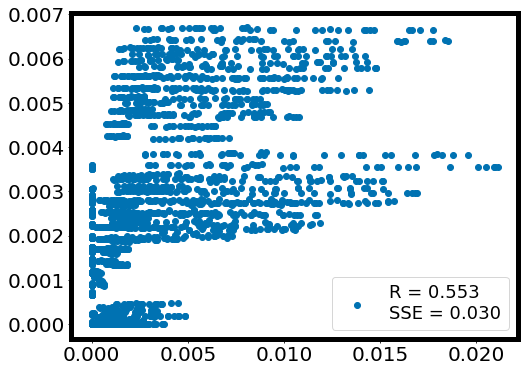

Top 5 profit predictions:  [0.07388885 0.07338852 0.07287637 0.07276503 0.07236814]
Pure exploitation, returning N max objective experiments
Running trial 9, cycle 2
Epoch: 0, Loss: 214.21723, Residuals: -0.24493, Convergence:   inf
Epoch: 10, Loss: 181.31041, Residuals: -0.23102, Convergence: 0.016756
Epoch: 20, Loss: 153.48431, Residuals: -0.21795, Convergence: 0.016871
Epoch: 30, Loss: 129.73454, Residuals: -0.20543, Convergence: 0.016994
Epoch: 40, Loss: 109.62378, Residuals: -0.19367, Convergence: 0.016957
Epoch: 50, Loss: 92.74146, Residuals: -0.18270, Convergence: 0.016764
Epoch: 60, Loss: 78.66847, Residuals: -0.17237, Convergence: 0.016432
Epoch: 70, Loss: 67.08445, Residuals: -0.16182, Convergence: 0.015473
Epoch: 80, Loss: 57.55465, Residuals: -0.15134, Convergence: 0.014931
Epoch: 90, Loss: 49.66019, Residuals: -0.14164, Convergence: 0.014709
Epoch: 100, Loss: 43.13609, Residuals: -0.13260, Convergence: 0.013758
Epoch: 110, Loss: 37.76690, Residuals: -0.12411, Convergence: 

Epoch: 900, Loss: 108.62460, Residuals: -0.00695, Convergence: 0.001404

Epoch: 905, Evidence: 537.66772, Convergence: 0.001965
Epoch: 910, Loss: 109.45201, Residuals: -0.00739, Convergence: 0.002253

Epoch: 911, Evidence: 540.80933, Convergence: 0.005809

Epoch: 914, Evidence: 544.31250, Convergence: 0.006436
Epoch: 920, Loss: 112.70850, Residuals: -0.00812, Convergence: 0.001439

Epoch: 925, Evidence: 543.04773, Convergence: -0.002329
Epoch: 930, Loss: 114.96116, Residuals: -0.00786, Convergence: 0.000990

Epoch: 930, Evidence: 547.63354, Convergence: 0.006064
Epoch: 930, Loss: 117.04821, Residuals: -0.00786, Convergence:   inf

Epoch: 931, Evidence: 550.33173, Convergence: 0.004903
Epoch: 940, Loss: 117.39423, Residuals: -0.00795, Convergence: 0.000580

Epoch: 940, Evidence: 548.96808, Convergence: -0.002484
Epoch: 940, Loss: 119.58214, Residuals: -0.00788, Convergence:   inf

Epoch: 941, Evidence: 551.38910, Convergence: 0.001918

Epoch: 942, Evidence: 553.18652, Convergence: 0.003

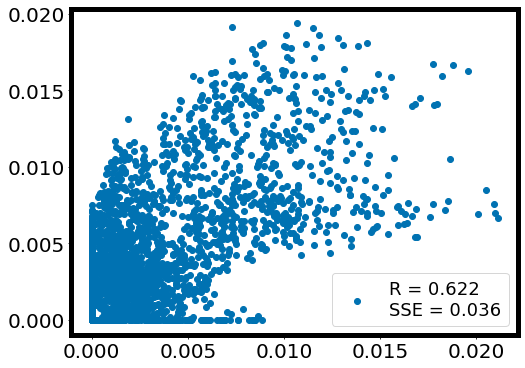

Top 5 profit predictions:  [0.20694911 0.20434998 0.20291501 0.1991726  0.19718653]
Pure exploitation, returning N max objective experiments
Running trial 9, cycle 3
Epoch: 0, Loss: 209.94121, Residuals: 0.14725, Convergence:   inf
Epoch: 10, Loss: 181.00690, Residuals: 0.12881, Convergence: 0.015149
Epoch: 20, Loss: 155.32837, Residuals: 0.11246, Convergence: 0.015608
Epoch: 30, Loss: 132.86670, Residuals: 0.09810, Convergence: 0.015749
Epoch: 40, Loss: 113.75475, Residuals: 0.08543, Convergence: 0.015652
Epoch: 50, Loss: 97.51243, Residuals: 0.07433, Convergence: 0.015476
Epoch: 60, Loss: 83.86712, Residuals: 0.06457, Convergence: 0.014999
Epoch: 70, Loss: 72.47124, Residuals: 0.05607, Convergence: 0.014612
Epoch: 80, Loss: 62.92271, Residuals: 0.04831, Convergence: 0.014028
Epoch: 90, Loss: 54.96094, Residuals: 0.04127, Convergence: 0.013063
Epoch: 100, Loss: 48.35736, Residuals: 0.03490, Convergence: 0.012695
Epoch: 110, Loss: 42.86363, Residuals: 0.02913, Convergence: 0.011920
Epo

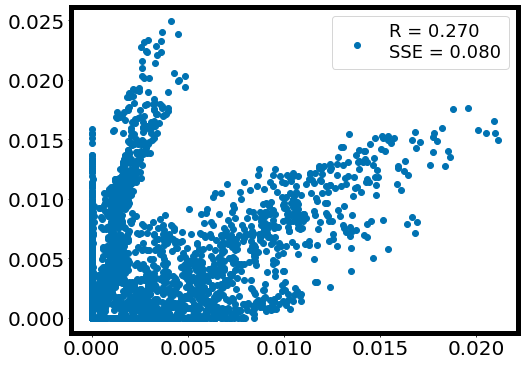

Top 5 profit predictions:  [0.27475044 0.25991485 0.25920662 0.25252742 0.25246623]
Pure exploitation, returning N max objective experiments
Running trial 9, cycle 4
Epoch: 0, Loss: 289.44664, Residuals: 0.22351, Convergence:   inf
Epoch: 10, Loss: 248.41911, Residuals: 0.19864, Convergence: 0.015523
Epoch: 20, Loss: 212.58339, Residuals: 0.17628, Convergence: 0.015858
Epoch: 30, Loss: 181.54929, Residuals: 0.15623, Convergence: 0.015986
Epoch: 40, Loss: 154.90706, Residuals: 0.13861, Convergence: 0.016011
Epoch: 50, Loss: 132.25029, Residuals: 0.12320, Convergence: 0.015866
Epoch: 60, Loss: 113.03310, Residuals: 0.10940, Convergence: 0.015761
Epoch: 70, Loss: 97.03438, Residuals: 0.09714, Convergence: 0.014788
Epoch: 80, Loss: 83.59339, Residuals: 0.08595, Convergence: 0.014900
Epoch: 90, Loss: 72.39561, Residuals: 0.07589, Convergence: 0.014332
Epoch: 100, Loss: 63.04820, Residuals: 0.06678, Convergence: 0.013609
Epoch: 110, Loss: 55.27291, Residuals: 0.05857, Convergence: 0.012935
E

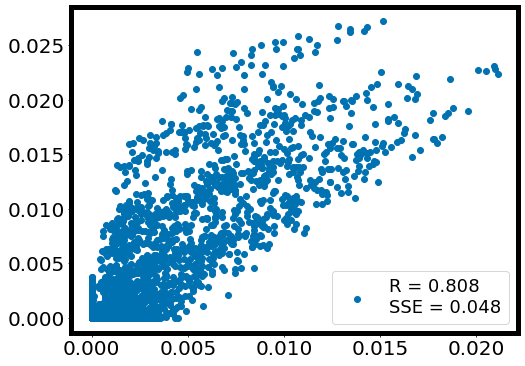

Top 5 profit predictions:  [0.29970577 0.2910366  0.28995466 0.2861456  0.28572294]
Pure exploitation, returning N max objective experiments
Running trial 9, cycle 5
Epoch: 0, Loss: 337.75911, Residuals: 0.04670, Convergence:   inf
Epoch: 10, Loss: 290.06345, Residuals: 0.03969, Convergence: 0.015633
Epoch: 20, Loss: 247.67693, Residuals: 0.03357, Convergence: 0.016157
Epoch: 30, Loss: 210.74251, Residuals: 0.02803, Convergence: 0.016300
Epoch: 40, Loss: 179.53447, Residuals: 0.02323, Convergence: 0.016136
Epoch: 50, Loss: 153.36063, Residuals: 0.01937, Convergence: 0.015634
Epoch: 60, Loss: 131.51033, Residuals: 0.01647, Convergence: 0.015346
Epoch: 70, Loss: 112.95216, Residuals: 0.01367, Convergence: 0.015208
Epoch: 80, Loss: 97.44252, Residuals: 0.01113, Convergence: 0.014762
Epoch: 90, Loss: 84.35763, Residuals: 0.00851, Convergence: 0.014302
Epoch: 100, Loss: 73.32579, Residuals: 0.00580, Convergence: 0.013866
Epoch: 110, Loss: 64.13991, Residuals: 0.00354, Convergence: 0.013057


Epoch: 920, Loss: 316.36902, Residuals: -0.01222, Convergence: 0.001601
Epoch: 930, Loss: 312.09601, Residuals: -0.01191, Convergence: 0.001324

Epoch: 935, Evidence: 1641.13123, Convergence: -0.011210


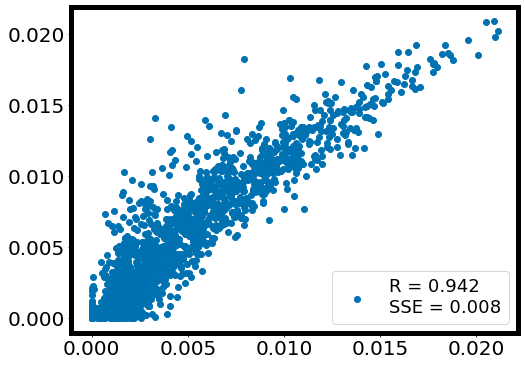

Top 5 profit predictions:  [0.22986831 0.22615725 0.21853124 0.21452361 0.21263734]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 399.55290, Residuals: 0.04976, Convergence:   inf
Epoch: 10, Loss: 343.83249, Residuals: 0.04275, Convergence: 0.015432
Epoch: 20, Loss: 294.04584, Residuals: 0.03677, Convergence: 0.015975
Epoch: 30, Loss: 250.81465, Residuals: 0.03171, Convergence: 0.015990
Epoch: 40, Loss: 214.75496, Residuals: 0.02754, Convergence: 0.015454
Epoch: 50, Loss: 184.56648, Residuals: 0.02386, Convergence: 0.015176
Epoch: 60, Loss: 158.71829, Residuals: 0.02037, Convergence: 0.015139
Epoch: 70, Loss: 136.44391, Residuals: 0.01744, Convergence: 0.015151
Epoch: 80, Loss: 117.41071, Residuals: 0.01520, Convergence: 0.014985
Epoch: 90, Loss: 101.57655, Residuals: 0.01281, Convergence: 0.014361
Epoch: 100, Loss: 88.26471, Residuals: 0.01077, Convergence: 0.013978
Epoch: 110, Loss: 77.14417, Residuals: 0.00897, Convergence: 0.013489
Epoch: 120, Loss: 67.89

Epoch: 880, Loss: 395.63361, Residuals: -0.01729, Convergence: 0.001135

Epoch: 887, Evidence: 2047.86426, Convergence: -0.003487


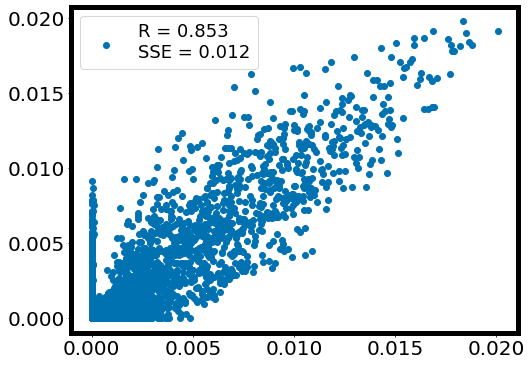

Running trial 10, cycle 1
Epoch: 0, Loss: 128.01547, Residuals: -0.38143, Convergence:   inf
Epoch: 10, Loss: 107.87662, Residuals: -0.36129, Convergence: 0.017214
Epoch: 20, Loss: 90.98529, Residuals: -0.34253, Convergence: 0.017140
Epoch: 30, Loss: 76.82539, Residuals: -0.32446, Convergence: 0.016978
Epoch: 40, Loss: 64.98627, Residuals: -0.30761, Convergence: 0.016796
Epoch: 50, Loss: 55.06518, Residuals: -0.29243, Convergence: 0.016623
Epoch: 60, Loss: 46.74895, Residuals: -0.27897, Convergence: 0.016398
Epoch: 70, Loss: 39.75639, Residuals: -0.26701, Convergence: 0.016186
Epoch: 80, Loss: 33.92777, Residuals: -0.25620, Convergence: 0.015813
Epoch: 90, Loss: 29.06980, Residuals: -0.24637, Convergence: 0.015393
Epoch: 100, Loss: 25.02254, Residuals: -0.23735, Convergence: 0.014886
Epoch: 110, Loss: 21.68965, Residuals: -0.22882, Convergence: 0.014554
Epoch: 120, Loss: 18.90504, Residuals: -0.22039, Convergence: 0.012777
Epoch: 130, Loss: 16.57820, Residuals: -0.21216, Convergence: 0


Epoch: 837, Evidence: 249.97409, Convergence: -0.001496


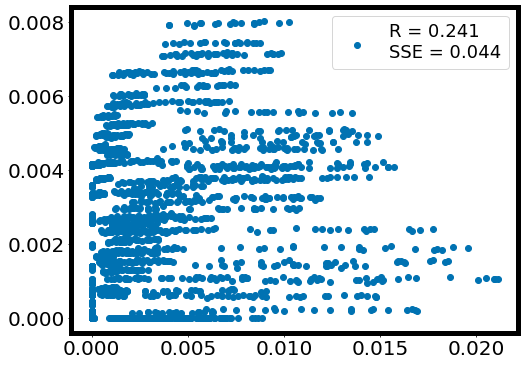

Top 5 profit predictions:  [0.08809491 0.08701022 0.08679269 0.08654837 0.08618034]
Pure exploitation, returning N max objective experiments
Running trial 10, cycle 2
Epoch: 0, Loss: 128.91919, Residuals: -0.69758, Convergence:   inf
Epoch: 10, Loss: 112.86260, Residuals: -0.63826, Convergence: 0.013479
Epoch: 20, Loss: 98.78531, Residuals: -0.58477, Convergence: 0.013357
Epoch: 30, Loss: 86.49081, Residuals: -0.53610, Convergence: 0.013416
Epoch: 40, Loss: 75.70026, Residuals: -0.49188, Convergence: 0.013381
Epoch: 50, Loss: 66.35512, Residuals: -0.45174, Convergence: 0.013162
Epoch: 60, Loss: 58.37222, Residuals: -0.41504, Convergence: 0.012696
Epoch: 70, Loss: 51.57606, Residuals: -0.38183, Convergence: 0.012243
Epoch: 80, Loss: 45.79961, Residuals: -0.35186, Convergence: 0.011757
Epoch: 90, Loss: 40.90371, Residuals: -0.32476, Convergence: 0.011211
Epoch: 100, Loss: 36.73533, Residuals: -0.30002, Convergence: 0.010301
Epoch: 110, Loss: 33.19638, Residuals: -0.27748, Convergence: 0.

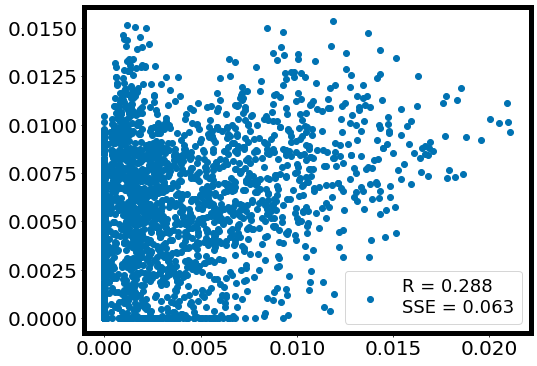

Top 5 profit predictions:  [0.16682436 0.16664578 0.16514839 0.16353586 0.16316308]
Pure exploitation, returning N max objective experiments
Running trial 10, cycle 3
Epoch: 0, Loss: 190.88333, Residuals: -0.59032, Convergence:   inf
Epoch: 10, Loss: 165.76913, Residuals: -0.53935, Convergence: 0.014288
Epoch: 20, Loss: 143.86125, Residuals: -0.49269, Convergence: 0.014253
Epoch: 30, Loss: 124.93581, Residuals: -0.45024, Convergence: 0.014148
Epoch: 40, Loss: 108.66058, Residuals: -0.41165, Convergence: 0.013952
Epoch: 50, Loss: 94.76586, Residuals: -0.37646, Convergence: 0.013613
Epoch: 60, Loss: 82.96944, Residuals: -0.34417, Convergence: 0.013199
Epoch: 70, Loss: 72.85792, Residuals: -0.31439, Convergence: 0.013009
Epoch: 80, Loss: 64.09479, Residuals: -0.28712, Convergence: 0.012362
Epoch: 90, Loss: 56.87455, Residuals: -0.26199, Convergence: 0.011319
Epoch: 100, Loss: 50.76984, Residuals: -0.23919, Convergence: 0.011451
Epoch: 110, Loss: 45.60604, Residuals: -0.21855, Convergence:


Epoch: 967, Evidence: 811.74811, Convergence: -0.000703
Epoch: 970, Loss: 167.00035, Residuals: -0.01602, Convergence: 0.002612
Epoch: 980, Loss: 163.14896, Residuals: -0.02171, Convergence: 0.002281
Epoch: 990, Loss: 160.11533, Residuals: -0.02199, Convergence: 0.001793
Epoch: 1000, Loss: 157.60518, Residuals: -0.01987, Convergence: 0.001547

Epoch: 1006, Evidence: 793.93219, Convergence: -0.023159
Epoch: 1010, Loss: 177.63881, Residuals: -0.01086, Convergence: 0.002559
Epoch: 1020, Loss: 173.89360, Residuals: -0.01270, Convergence: 0.002085
Epoch: 1030, Loss: 170.92610, Residuals: -0.01356, Convergence: 0.001635
Epoch: 1040, Loss: 168.53098, Residuals: -0.01373, Convergence: 0.001225

Epoch: 1045, Evidence: 816.90656, Convergence: 0.005616
Epoch: 1050, Loss: 171.01105, Residuals: -0.01470, Convergence: 0.001732
Epoch: 1060, Loss: 168.15991, Residuals: -0.01598, Convergence: 0.001750
Epoch: 1070, Loss: 165.87936, Residuals: -0.01639, Convergence: 0.001279
Epoch: 1080, Loss: 163.97333

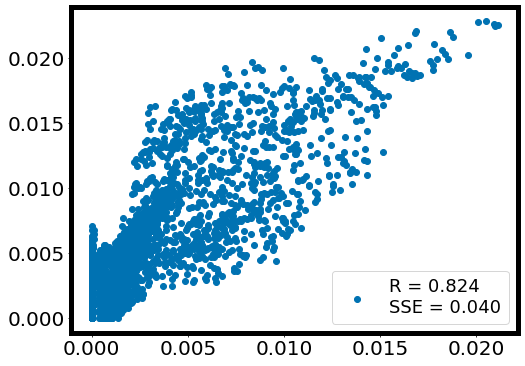

Top 5 profit predictions:  [0.24952328 0.24797644 0.24722669 0.24410425 0.24381465]
Pure exploitation, returning N max objective experiments
Running trial 10, cycle 4
Epoch: 0, Loss: 266.43416, Residuals: -0.43255, Convergence:   inf
Epoch: 10, Loss: 229.30132, Residuals: -0.39497, Convergence: 0.015368
Epoch: 20, Loss: 196.47173, Residuals: -0.36078, Convergence: 0.015673
Epoch: 30, Loss: 168.12277, Residuals: -0.33017, Convergence: 0.015700
Epoch: 40, Loss: 143.97981, Residuals: -0.30284, Convergence: 0.015535
Epoch: 50, Loss: 123.59945, Residuals: -0.27811, Convergence: 0.015236
Epoch: 60, Loss: 106.47681, Residuals: -0.25546, Convergence: 0.014834
Epoch: 70, Loss: 92.09578, Residuals: -0.23446, Convergence: 0.013977
Epoch: 80, Loss: 80.25538, Residuals: -0.21472, Convergence: 0.013822
Epoch: 90, Loss: 70.25783, Residuals: -0.19658, Convergence: 0.013345
Epoch: 100, Loss: 62.00545, Residuals: -0.17986, Convergence: 0.012086
Epoch: 110, Loss: 55.06124, Residuals: -0.16474, Convergenc

Epoch: 950, Loss: 245.32051, Residuals: -0.00951, Convergence: 0.001086

Epoch: 951, Evidence: 1200.73950, Convergence: -0.010915
Epoch: 960, Loss: 258.24634, Residuals: -0.00823, Convergence: 0.001004

Epoch: 963, Evidence: 1216.13599, Convergence: 0.001884

Epoch: 969, Evidence: 1217.60669, Convergence: 0.001208
Epoch: 970, Loss: 260.43896, Residuals: -0.00830, Convergence: 0.001085

Epoch: 974, Evidence: 1216.50061, Convergence: -0.000909
Epoch: 980, Loss: 257.70309, Residuals: -0.00897, Convergence: 0.001852
Epoch: 990, Loss: 253.56442, Residuals: -0.00972, Convergence: 0.001492
Epoch: 1000, Loss: 250.13422, Residuals: -0.00986, Convergence: 0.001320
Epoch: 1010, Loss: 247.28058, Residuals: -0.00970, Convergence: 0.001078

Epoch: 1011, Evidence: 1202.49719, Convergence: -0.012565


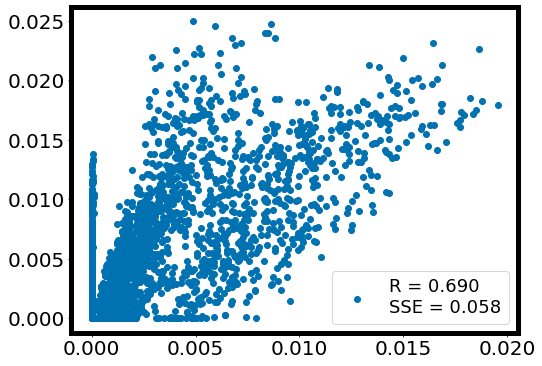

Top 5 profit predictions:  [0.26843292 0.2648411  0.2607652  0.2551672  0.2434359 ]
Pure exploitation, returning N max objective experiments
Running trial 10, cycle 5
Epoch: 0, Loss: 345.82115, Residuals: -0.38466, Convergence:   inf
Epoch: 10, Loss: 297.18167, Residuals: -0.35087, Convergence: 0.015382
Epoch: 20, Loss: 254.87926, Residuals: -0.31985, Convergence: 0.015504
Epoch: 30, Loss: 218.53900, Residuals: -0.29159, Convergence: 0.015487
Epoch: 40, Loss: 187.49345, Residuals: -0.26599, Convergence: 0.015380
Epoch: 50, Loss: 161.19371, Residuals: -0.24268, Convergence: 0.015052
Epoch: 60, Loss: 139.46429, Residuals: -0.22099, Convergence: 0.014204
Epoch: 70, Loss: 121.46310, Residuals: -0.20087, Convergence: 0.013754
Epoch: 80, Loss: 106.20204, Residuals: -0.18286, Convergence: 0.013449
Epoch: 90, Loss: 93.28865, Residuals: -0.16645, Convergence: 0.012843
Epoch: 100, Loss: 82.63567, Residuals: -0.15147, Convergence: 0.011873
Epoch: 110, Loss: 73.80894, Residuals: -0.13791, Converge

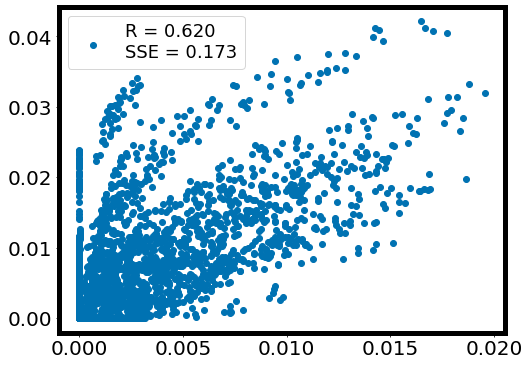

Top 5 profit predictions:  [0.46453157 0.44752592 0.44708854 0.4413821  0.43997192]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 457.23732, Residuals: -0.14928, Convergence:   inf
Epoch: 10, Loss: 389.54605, Residuals: -0.13766, Convergence: 0.016322
Epoch: 20, Loss: 330.32843, Residuals: -0.12660, Convergence: 0.016798
Epoch: 30, Loss: 279.40079, Residuals: -0.11643, Convergence: 0.016922
Epoch: 40, Loss: 236.36642, Residuals: -0.10715, Convergence: 0.016754
Epoch: 50, Loss: 200.78416, Residuals: -0.09853, Convergence: 0.016161
Epoch: 60, Loss: 171.64676, Residuals: -0.09017, Convergence: 0.015513
Epoch: 70, Loss: 147.60500, Residuals: -0.08231, Convergence: 0.014898
Epoch: 80, Loss: 127.65885, Residuals: -0.07508, Convergence: 0.014521
Epoch: 90, Loss: 110.97761, Residuals: -0.06853, Convergence: 0.013782
Epoch: 100, Loss: 97.09332, Residuals: -0.06252, Convergence: 0.013186
Epoch: 110, Loss: 85.50813, Residuals: -0.05698, Convergence: 0.012240
Epoch: 120,

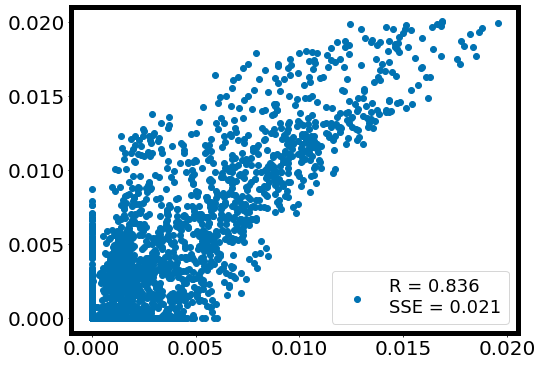

Running trial 11, cycle 1
Epoch: 0, Loss: 64.75874, Residuals: -0.40172, Convergence:   inf
Epoch: 10, Loss: 55.72920, Residuals: -0.37563, Convergence: 0.015151
Epoch: 20, Loss: 47.95163, Residuals: -0.35311, Convergence: 0.015116
Epoch: 30, Loss: 41.29254, Residuals: -0.33279, Convergence: 0.015026
Epoch: 40, Loss: 35.57778, Residuals: -0.31393, Convergence: 0.015008
Epoch: 50, Loss: 30.65109, Residuals: -0.29615, Convergence: 0.015026
Epoch: 60, Loss: 26.40777, Residuals: -0.27928, Convergence: 0.014989
Epoch: 70, Loss: 22.77103, Residuals: -0.26324, Convergence: 0.014875
Epoch: 80, Loss: 19.67662, Residuals: -0.24779, Convergence: 0.014592
Epoch: 90, Loss: 17.05750, Residuals: -0.23332, Convergence: 0.014269
Epoch: 100, Loss: 14.85956, Residuals: -0.21979, Convergence: 0.013723
Epoch: 110, Loss: 13.02053, Residuals: -0.20717, Convergence: 0.013090
Epoch: 120, Loss: 11.48309, Residuals: -0.19543, Convergence: 0.012311
Epoch: 130, Loss: 10.20116, Residuals: -0.18460, Convergence: 0.0

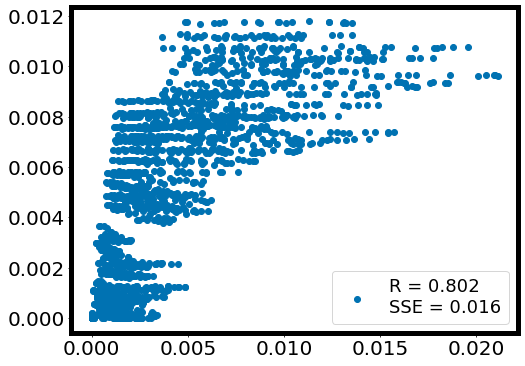

Top 5 profit predictions:  [0.129339   0.12777346 0.12777032 0.12722303 0.12663758]
Pure exploitation, returning N max objective experiments
Running trial 11, cycle 2
Epoch: 0, Loss: 113.42211, Residuals: -0.56017, Convergence:   inf
Epoch: 10, Loss: 98.95393, Residuals: -0.51310, Convergence: 0.014352
Epoch: 20, Loss: 85.46725, Residuals: -0.47022, Convergence: 0.015033
Epoch: 30, Loss: 73.46907, Residuals: -0.43093, Convergence: 0.015366
Epoch: 40, Loss: 63.07877, Residuals: -0.39476, Convergence: 0.015353
Epoch: 50, Loss: 54.25171, Residuals: -0.36151, Convergence: 0.014979
Epoch: 60, Loss: 46.82321, Residuals: -0.33111, Convergence: 0.014617
Epoch: 70, Loss: 40.61623, Residuals: -0.30341, Convergence: 0.014204
Epoch: 80, Loss: 35.45362, Residuals: -0.27817, Convergence: 0.013327
Epoch: 90, Loss: 31.15220, Residuals: -0.25517, Convergence: 0.012586
Epoch: 100, Loss: 27.56361, Residuals: -0.23422, Convergence: 0.012143
Epoch: 110, Loss: 24.59117, Residuals: -0.21518, Convergence: 0.0


Epoch: 867, Evidence: 545.54852, Convergence: 0.002438
Epoch: 870, Loss: 109.79812, Residuals: -0.01403, Convergence: 0.002761

Epoch: 874, Evidence: 549.15210, Convergence: 0.006562
Epoch: 880, Loss: 110.17262, Residuals: -0.01464, Convergence: 0.003159

Epoch: 881, Evidence: 551.67444, Convergence: 0.004572

Epoch: 887, Evidence: 550.63428, Convergence: -0.001889
Epoch: 890, Loss: 114.20004, Residuals: -0.01470, Convergence: 0.001825

Epoch: 895, Evidence: 554.65167, Convergence: 0.005368

Epoch: 899, Evidence: 557.16785, Convergence: 0.004516
Epoch: 900, Loss: 117.09932, Residuals: -0.01474, Convergence: 0.002071

Epoch: 902, Evidence: 557.92053, Convergence: 0.001349

Epoch: 905, Evidence: 559.19067, Convergence: 0.002271

Epoch: 909, Evidence: 558.69397, Convergence: -0.000889
Epoch: 910, Loss: 119.30596, Residuals: -0.01489, Convergence: 0.003596

Epoch: 918, Evidence: 557.56006, Convergence: -0.002925
Epoch: 920, Loss: 120.67833, Residuals: -0.01478, Convergence: 0.002172

Epoc

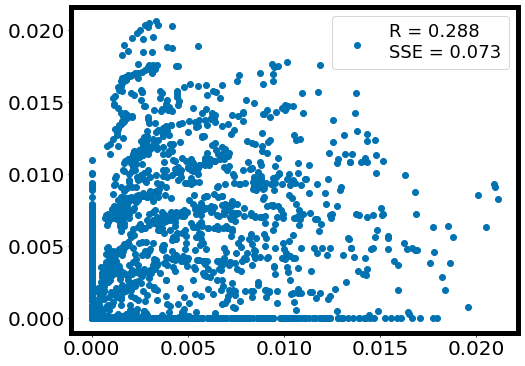

Top 5 profit predictions:  [0.22725756 0.222849   0.22103609 0.2208291  0.2203203 ]
Pure exploitation, returning N max objective experiments
Running trial 11, cycle 3
Epoch: 0, Loss: 188.09180, Residuals: -0.32374, Convergence:   inf
Epoch: 10, Loss: 163.21603, Residuals: -0.29705, Convergence: 0.014894
Epoch: 20, Loss: 140.17686, Residuals: -0.27270, Convergence: 0.015611
Epoch: 30, Loss: 119.89040, Residuals: -0.25053, Convergence: 0.015797
Epoch: 40, Loss: 102.59773, Residuals: -0.23021, Convergence: 0.015575
Epoch: 50, Loss: 88.08010, Residuals: -0.21152, Convergence: 0.015213
Epoch: 60, Loss: 75.98050, Residuals: -0.19429, Convergence: 0.014608
Epoch: 70, Loss: 65.91977, Residuals: -0.17843, Convergence: 0.014055
Epoch: 80, Loss: 57.56039, Residuals: -0.16389, Convergence: 0.013320
Epoch: 90, Loss: 50.64094, Residuals: -0.15063, Convergence: 0.012606
Epoch: 100, Loss: 44.89024, Residuals: -0.13847, Convergence: 0.011814
Epoch: 110, Loss: 40.10435, Residuals: -0.12738, Convergence:

Epoch: 920, Loss: 184.00302, Residuals: 0.00190, Convergence: 0.001006

Epoch: 925, Evidence: 888.39069, Convergence: 0.000134
Epoch: 930, Loss: 182.26382, Residuals: 0.00167, Convergence: 0.002355
Epoch: 940, Loss: 178.98621, Residuals: 0.00139, Convergence: 0.001520
Epoch: 950, Loss: 176.26697, Residuals: 0.00130, Convergence: 0.001425

Epoch: 951, Evidence: 879.21301, Convergence: -0.010304


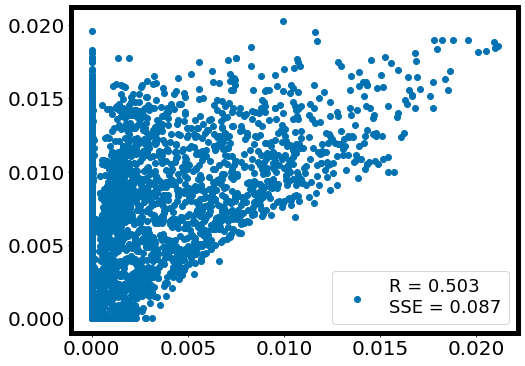

Top 5 profit predictions:  [0.22005305 0.21290301 0.21231404 0.20905587 0.20846558]
Pure exploitation, returning N max objective experiments
Running trial 11, cycle 4
Epoch: 0, Loss: 259.59386, Residuals: -0.25041, Convergence:   inf
Epoch: 10, Loss: 224.44737, Residuals: -0.23036, Convergence: 0.015038
Epoch: 20, Loss: 192.73061, Residuals: -0.21206, Convergence: 0.015533
Epoch: 30, Loss: 165.13527, Residuals: -0.19532, Convergence: 0.015541
Epoch: 40, Loss: 141.83154, Residuals: -0.17963, Convergence: 0.015158
Epoch: 50, Loss: 122.37314, Residuals: -0.16494, Convergence: 0.014732
Epoch: 60, Loss: 105.64290, Residuals: -0.15144, Convergence: 0.014835
Epoch: 70, Loss: 91.40123, Residuals: -0.13911, Convergence: 0.014410
Epoch: 80, Loss: 79.46924, Residuals: -0.12780, Convergence: 0.013972
Epoch: 90, Loss: 69.47263, Residuals: -0.11735, Convergence: 0.013200
Epoch: 100, Loss: 61.08060, Residuals: -0.10788, Convergence: 0.012761
Epoch: 110, Loss: 54.07396, Residuals: -0.09939, Convergenc

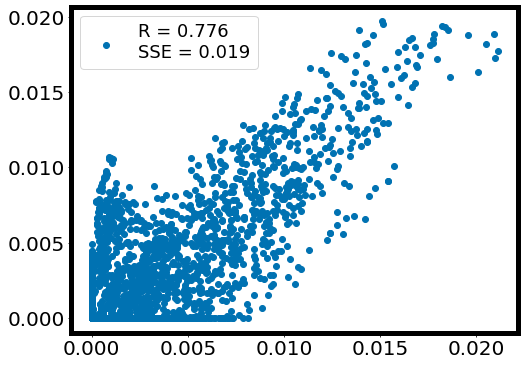

Top 5 profit predictions:  [0.21705686 0.21216625 0.2109226  0.20972975 0.2095213 ]
Pure exploitation, returning N max objective experiments
Running trial 11, cycle 5
Epoch: 0, Loss: 297.72554, Residuals: -0.28712, Convergence:   inf
Epoch: 10, Loss: 257.29691, Residuals: -0.26277, Convergence: 0.015059
Epoch: 20, Loss: 221.10947, Residuals: -0.24032, Convergence: 0.015401
Epoch: 30, Loss: 189.76369, Residuals: -0.21980, Convergence: 0.015342
Epoch: 40, Loss: 163.28372, Residuals: -0.20104, Convergence: 0.014917
Epoch: 50, Loss: 141.10791, Residuals: -0.18410, Convergence: 0.014611
Epoch: 60, Loss: 121.98253, Residuals: -0.16855, Convergence: 0.014845
Epoch: 70, Loss: 105.40423, Residuals: -0.15436, Convergence: 0.014621
Epoch: 80, Loss: 91.53100, Residuals: -0.14145, Convergence: 0.014075
Epoch: 90, Loss: 79.80684, Residuals: -0.12971, Convergence: 0.013483
Epoch: 100, Loss: 70.03445, Residuals: -0.11894, Convergence: 0.012649
Epoch: 110, Loss: 61.90106, Residuals: -0.10910, Convergen


Epoch: 892, Evidence: 1625.94824, Convergence: 0.000468
Epoch: 900, Loss: 325.42834, Residuals: -0.01204, Convergence: 0.002265
Epoch: 910, Loss: 319.76605, Residuals: -0.01255, Convergence: 0.001622

Epoch: 919, Evidence: 1617.00085, Convergence: -0.005063


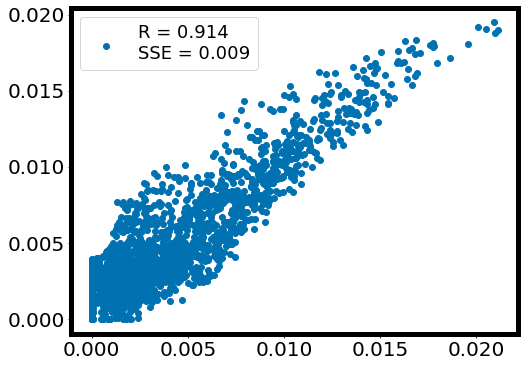

Top 5 profit predictions:  [0.21481013 0.20873022 0.2069131  0.20558321 0.2044786 ]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 354.76790, Residuals: -0.34705, Convergence:   inf
Epoch: 10, Loss: 306.73599, Residuals: -0.31654, Convergence: 0.015060
Epoch: 20, Loss: 263.66498, Residuals: -0.28875, Convergence: 0.015343
Epoch: 30, Loss: 226.53622, Residuals: -0.26343, Convergence: 0.015192
Epoch: 40, Loss: 195.40868, Residuals: -0.24016, Convergence: 0.014665
Epoch: 50, Loss: 168.92134, Residuals: -0.21907, Convergence: 0.014845
Epoch: 60, Loss: 146.06667, Residuals: -0.19979, Convergence: 0.014499
Epoch: 70, Loss: 126.89509, Residuals: -0.18226, Convergence: 0.013907
Epoch: 80, Loss: 110.91131, Residuals: -0.16621, Convergence: 0.013374
Epoch: 90, Loss: 97.55597, Residuals: -0.15155, Convergence: 0.012827
Epoch: 100, Loss: 86.15489, Residuals: -0.13834, Convergence: 0.012438
Epoch: 110, Loss: 76.42261, Residuals: -0.12633, Convergence: 0.011836
Epoch: 120, 

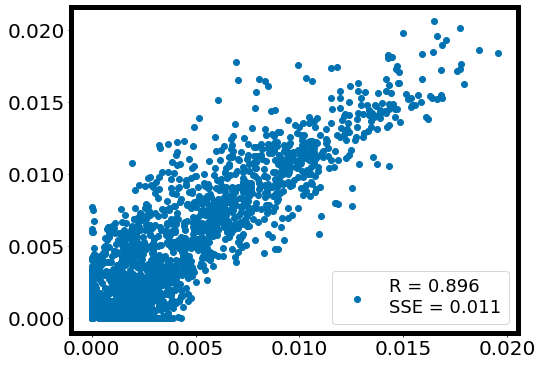

Running trial 12, cycle 1
Epoch: 0, Loss: 118.55967, Residuals: -1.49970, Convergence:   inf
Epoch: 10, Loss: 101.17002, Residuals: -1.37432, Convergence: 0.016150
Epoch: 20, Loss: 86.18693, Residuals: -1.26078, Convergence: 0.016120
Epoch: 30, Loss: 73.48855, Residuals: -1.15720, Convergence: 0.016030
Epoch: 40, Loss: 62.71165, Residuals: -1.06260, Convergence: 0.015938
Epoch: 50, Loss: 53.67179, Residuals: -0.97584, Convergence: 0.015666
Epoch: 60, Loss: 46.04599, Residuals: -0.89715, Convergence: 0.015271
Epoch: 70, Loss: 39.57830, Residuals: -0.82621, Convergence: 0.014927
Epoch: 80, Loss: 34.13210, Residuals: -0.76161, Convergence: 0.014648
Epoch: 90, Loss: 29.54883, Residuals: -0.70335, Convergence: 0.014273
Epoch: 100, Loss: 25.69722, Residuals: -0.65056, Convergence: 0.013733
Epoch: 110, Loss: 22.45947, Residuals: -0.60258, Convergence: 0.013428
Epoch: 120, Loss: 19.73311, Residuals: -0.55889, Convergence: 0.012850
Epoch: 130, Loss: 17.45090, Residuals: -0.51905, Convergence: 0


Epoch: 779, Evidence: 208.00343, Convergence: 0.015247
Epoch: 780, Loss: 53.39914, Residuals: 0.02533, Convergence: 0.002414

Epoch: 783, Evidence: 208.19035, Convergence: 0.000898
Epoch: 790, Loss: 52.73381, Residuals: 0.02387, Convergence: 0.004238
Epoch: 800, Loss: 51.39614, Residuals: 0.02312, Convergence: 0.001527

Epoch: 809, Evidence: 208.03592, Convergence: 0.000156
Epoch: 810, Loss: 50.63235, Residuals: 0.02202, Convergence: 0.006729
Epoch: 820, Loss: 47.98537, Residuals: 0.01680, Convergence: 0.006908

Epoch: 821, Evidence: 206.86278, Convergence: -0.005514


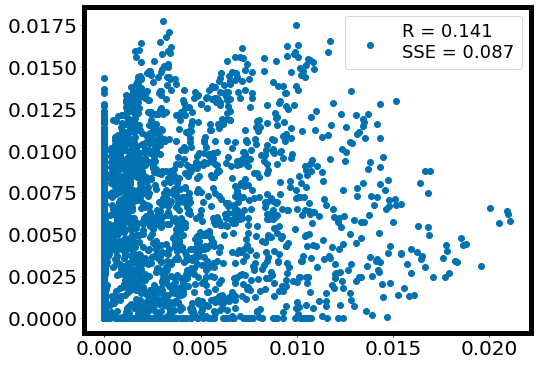

Top 5 profit predictions:  [0.19253488 0.19023748 0.18821457 0.18251728 0.18238714]
Pure exploitation, returning N max objective experiments
Running trial 12, cycle 2
Epoch: 0, Loss: 240.55718, Residuals: -1.16596, Convergence:   inf
Epoch: 10, Loss: 204.77733, Residuals: -1.06291, Convergence: 0.016253
Epoch: 20, Loss: 174.14238, Residuals: -0.96928, Convergence: 0.016416
Epoch: 30, Loss: 147.80453, Residuals: -0.88408, Convergence: 0.016647
Epoch: 40, Loss: 125.55570, Residuals: -0.80637, Convergence: 0.016430
Epoch: 50, Loss: 106.98403, Residuals: -0.73554, Convergence: 0.016372
Epoch: 60, Loss: 91.17409, Residuals: -0.67129, Convergence: 0.016207
Epoch: 70, Loss: 77.91783, Residuals: -0.61252, Convergence: 0.016070
Epoch: 80, Loss: 66.60807, Residuals: -0.55896, Convergence: 0.015596
Epoch: 90, Loss: 57.23679, Residuals: -0.51023, Convergence: 0.015042
Epoch: 100, Loss: 49.41096, Residuals: -0.46594, Convergence: 0.014499
Epoch: 110, Loss: 42.89643, Residuals: -0.42559, Convergence

Epoch: 960, Loss: 96.29063, Residuals: -0.00269, Convergence: 0.001744

Epoch: 961, Evidence: 546.20123, Convergence: 0.021413

Epoch: 968, Evidence: 548.31628, Convergence: 0.003857
Epoch: 970, Loss: 102.03079, Residuals: -0.00277, Convergence: 0.001965
Epoch: 980, Loss: 100.44282, Residuals: -0.00287, Convergence: 0.001904
Epoch: 990, Loss: 99.05526, Residuals: -0.00290, Convergence: 0.001582

Epoch: 999, Evidence: 547.56006, Convergence: -0.001381
Epoch: 1000, Loss: 103.84259, Residuals: -0.00275, Convergence: 0.001181

Epoch: 1001, Evidence: 554.69421, Convergence: 0.011498

Epoch: 1003, Evidence: 557.53210, Convergence: 0.005090

Epoch: 1005, Evidence: 558.84869, Convergence: 0.002356

Epoch: 1006, Evidence: 560.76068, Convergence: 0.003410

Epoch: 1008, Evidence: 565.26221, Convergence: 0.007964

Epoch: 1009, Evidence: 561.56665, Convergence: -0.006581


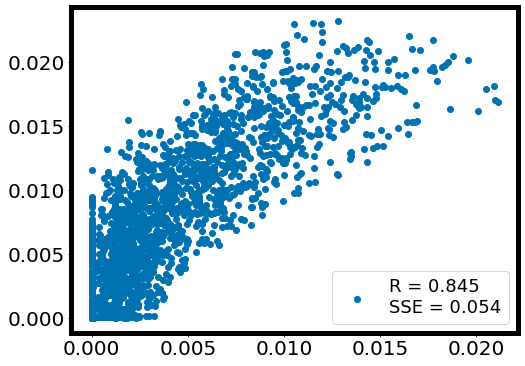

Top 5 profit predictions:  [0.25576088 0.25058645 0.2501301  0.24832249 0.24325222]
Pure exploitation, returning N max objective experiments
Running trial 12, cycle 3
Epoch: 0, Loss: 301.48692, Residuals: -0.62779, Convergence:   inf
Epoch: 10, Loss: 257.19360, Residuals: -0.57308, Convergence: 0.015921
Epoch: 20, Loss: 219.73792, Residuals: -0.52320, Convergence: 0.015831
Epoch: 30, Loss: 187.87160, Residuals: -0.47807, Convergence: 0.015757
Epoch: 40, Loss: 160.77614, Residuals: -0.43741, Convergence: 0.015649
Epoch: 50, Loss: 137.73080, Residuals: -0.40047, Convergence: 0.015564
Epoch: 60, Loss: 118.21866, Residuals: -0.36680, Convergence: 0.015215
Epoch: 70, Loss: 101.80807, Residuals: -0.33590, Convergence: 0.014703
Epoch: 80, Loss: 88.10840, Residuals: -0.30710, Convergence: 0.014449
Epoch: 90, Loss: 76.61330, Residuals: -0.28070, Convergence: 0.013898
Epoch: 100, Loss: 67.07203, Residuals: -0.25665, Convergence: 0.013099
Epoch: 110, Loss: 59.15546, Residuals: -0.23455, Convergen


Epoch: 886, Evidence: 835.94067, Convergence: 0.003943
Epoch: 890, Loss: 189.83041, Residuals: -0.00167, Convergence: 0.001237

Epoch: 894, Evidence: 836.85352, Convergence: 0.001091

Epoch: 896, Evidence: 836.76843, Convergence: -0.000102
Epoch: 900, Loss: 189.46170, Residuals: -0.00179, Convergence: 0.002782

Epoch: 907, Evidence: 833.17480, Convergence: -0.004415


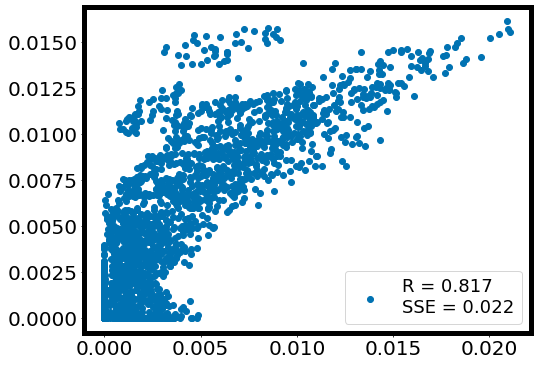

Top 5 profit predictions:  [0.17763816 0.17291091 0.17100196 0.17086074 0.1678003 ]
Pure exploitation, returning N max objective experiments
Running trial 12, cycle 4
Epoch: 0, Loss: 234.47174, Residuals: -0.01631, Convergence:   inf
Epoch: 10, Loss: 204.97861, Residuals: -0.01716, Convergence: 0.013823
Epoch: 20, Loss: 178.69040, Residuals: -0.01757, Convergence: 0.013775
Epoch: 30, Loss: 156.04773, Residuals: -0.01801, Convergence: 0.013495
Epoch: 40, Loss: 136.70114, Residuals: -0.01881, Convergence: 0.013233
Epoch: 50, Loss: 120.22177, Residuals: -0.02002, Convergence: 0.012743
Epoch: 60, Loss: 106.22337, Residuals: -0.02118, Convergence: 0.012237
Epoch: 70, Loss: 94.23228, Residuals: -0.02192, Convergence: 0.011914
Epoch: 80, Loss: 84.01022, Residuals: -0.02223, Convergence: 0.011339
Epoch: 90, Loss: 75.03665, Residuals: -0.02204, Convergence: 0.011360
Epoch: 100, Loss: 67.27233, Residuals: -0.02159, Convergence: 0.010751
Epoch: 110, Loss: 60.70176, Residuals: -0.02096, Convergenc


Epoch: 948, Evidence: 1276.18115, Convergence: 0.005222
Epoch: 950, Loss: 256.19626, Residuals: -0.00674, Convergence: 0.001361
Epoch: 960, Loss: 253.08832, Residuals: -0.00732, Convergence: 0.001132

Epoch: 967, Evidence: 1275.85803, Convergence: -0.000253
Epoch: 970, Loss: 252.60614, Residuals: -0.00873, Convergence: 0.002251
Epoch: 980, Loss: 248.47928, Residuals: -0.01074, Convergence: 0.001435
Epoch: 990, Loss: 244.97449, Residuals: -0.01050, Convergence: 0.001284

Epoch: 995, Evidence: 1268.29419, Convergence: -0.006219
Epoch: 1000, Loss: 259.21384, Residuals: -0.00702, Convergence: 0.001410
Epoch: 1010, Loss: 255.78421, Residuals: -0.00752, Convergence: 0.001263

Epoch: 1015, Evidence: 1280.59192, Convergence: 0.003444
Epoch: 1020, Loss: 256.71115, Residuals: -0.00807, Convergence: 0.001268
Epoch: 1030, Loss: 253.80692, Residuals: -0.00846, Convergence: 0.001009

Epoch: 1032, Evidence: 1281.60730, Convergence: 0.000792
Epoch: 1040, Loss: 251.78546, Residuals: -0.01104, Converge

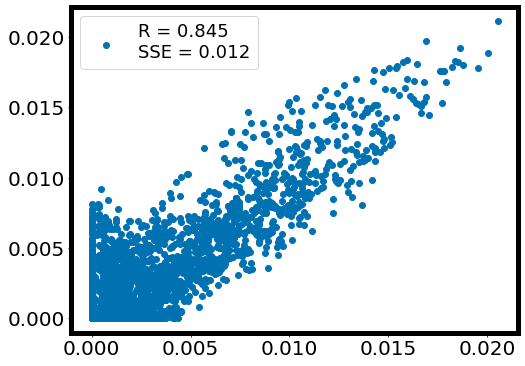

Top 5 profit predictions:  [0.2294879  0.20812468 0.20489623 0.20111705 0.19895007]
Pure exploitation, returning N max objective experiments
Running trial 12, cycle 5
Epoch: 0, Loss: 291.76933, Residuals: -0.06320, Convergence:   inf
Epoch: 10, Loss: 254.49159, Residuals: -0.05952, Convergence: 0.014041
Epoch: 20, Loss: 221.19580, Residuals: -0.05569, Convergence: 0.014136
Epoch: 30, Loss: 192.35712, Residuals: -0.05232, Convergence: 0.013971
Epoch: 40, Loss: 167.73698, Residuals: -0.04967, Convergence: 0.013634
Epoch: 50, Loss: 146.99875, Residuals: -0.04756, Convergence: 0.012909
Epoch: 60, Loss: 129.46391, Residuals: -0.04568, Convergence: 0.012449
Epoch: 70, Loss: 114.66197, Residuals: -0.04372, Convergence: 0.011998
Epoch: 80, Loss: 102.09487, Residuals: -0.04159, Convergence: 0.011697
Epoch: 90, Loss: 91.24342, Residuals: -0.03932, Convergence: 0.011053
Epoch: 100, Loss: 82.04418, Residuals: -0.03710, Convergence: 0.010386
Epoch: 110, Loss: 74.16600, Residuals: -0.03499, Converge

Epoch: 910, Loss: 327.53699, Residuals: -0.01221, Convergence: 0.001402

Epoch: 919, Evidence: 1647.87061, Convergence: -0.006223
Epoch: 920, Loss: 337.66254, Residuals: -0.00962, Convergence: 0.001500
Epoch: 930, Loss: 333.58215, Residuals: -0.00991, Convergence: 0.001118

Epoch: 934, Evidence: 1659.88208, Convergence: 0.001059
Epoch: 940, Loss: 332.27362, Residuals: -0.01010, Convergence: 0.001181

Epoch: 941, Evidence: 1659.11780, Convergence: -0.000461
Epoch: 950, Loss: 328.54898, Residuals: -0.01216, Convergence: 0.001352

Epoch: 957, Evidence: 1651.79736, Convergence: -0.004894


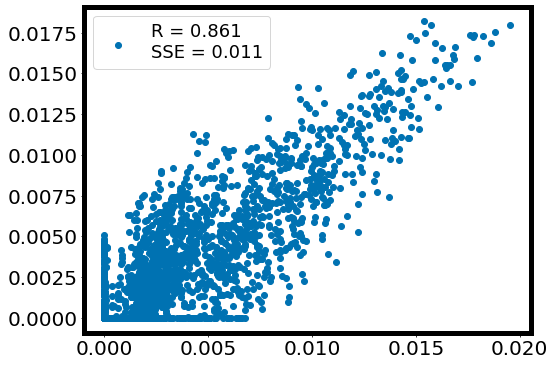

Top 5 profit predictions:  [0.20047891 0.19541769 0.19539465 0.19348119 0.18910372]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 350.51762, Residuals: -0.10436, Convergence:   inf
Epoch: 10, Loss: 304.88776, Residuals: -0.09642, Convergence: 0.014300
Epoch: 20, Loss: 264.11014, Residuals: -0.08886, Convergence: 0.014564
Epoch: 30, Loss: 228.51468, Residuals: -0.08227, Convergence: 0.014542
Epoch: 40, Loss: 198.10175, Residuals: -0.07652, Convergence: 0.014227
Epoch: 50, Loss: 172.50497, Residuals: -0.07133, Convergence: 0.013602
Epoch: 60, Loss: 151.04417, Residuals: -0.06651, Convergence: 0.013046
Epoch: 70, Loss: 133.08461, Residuals: -0.06192, Convergence: 0.012348
Epoch: 80, Loss: 118.00497, Residuals: -0.05746, Convergence: 0.011735
Epoch: 90, Loss: 105.31168, Residuals: -0.05325, Convergence: 0.011163
Epoch: 100, Loss: 94.62112, Residuals: -0.04934, Convergence: 0.010523
Epoch: 110, Loss: 85.47688, Residuals: -0.04562, Convergence: 0.009960
Epoch: 120,

Epoch: 940, Loss: 384.26489, Residuals: -0.00945, Convergence: 0.001132
Epoch: 950, Loss: 379.80139, Residuals: -0.00887, Convergence: 0.001143

Epoch: 951, Evidence: 2019.88281, Convergence: -0.009800
Epoch: 960, Loss: 397.33658, Residuals: -0.00699, Convergence: 0.001293
Epoch: 970, Loss: 392.82828, Residuals: -0.00718, Convergence: 0.001073

Epoch: 971, Evidence: 2041.53625, Convergence: 0.000910
Epoch: 980, Loss: 388.85010, Residuals: -0.00933, Convergence: 0.001579
Epoch: 990, Loss: 383.63824, Residuals: -0.00957, Convergence: 0.001290

Epoch: 998, Evidence: 2022.65161, Convergence: -0.008418


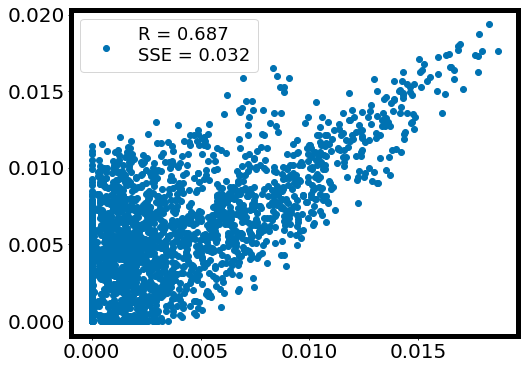

Running trial 13, cycle 1
Epoch: 0, Loss: 93.01849, Residuals: -0.88807, Convergence:   inf
Epoch: 10, Loss: 79.96106, Residuals: -0.82622, Convergence: 0.015203
Epoch: 20, Loss: 68.76545, Residuals: -0.76727, Convergence: 0.015199
Epoch: 30, Loss: 59.11032, Residuals: -0.71168, Convergence: 0.015308
Epoch: 40, Loss: 50.68372, Residuals: -0.65999, Convergence: 0.015740
Epoch: 50, Loss: 43.28667, Residuals: -0.61151, Convergence: 0.015982
Epoch: 60, Loss: 36.99629, Residuals: -0.56759, Convergence: 0.015832
Epoch: 70, Loss: 31.75357, Residuals: -0.52736, Convergence: 0.015306
Epoch: 80, Loss: 27.39338, Residuals: -0.49006, Convergence: 0.014731
Epoch: 90, Loss: 23.75326, Residuals: -0.45559, Convergence: 0.013895
Epoch: 100, Loss: 20.75684, Residuals: -0.42381, Convergence: 0.011914
Epoch: 110, Loss: 18.23936, Residuals: -0.39496, Convergence: 0.011073
Epoch: 120, Loss: 16.14301, Residuals: -0.36852, Convergence: 0.010742
Epoch: 130, Loss: 14.40182, Residuals: -0.34409, Convergence: 0.0


Epoch: 776, Evidence: 221.95088, Convergence: 0.006328
Epoch: 780, Loss: 51.37490, Residuals: 0.00520, Convergence: 0.001179

Epoch: 789, Evidence: 222.35345, Convergence: 0.001811
Epoch: 790, Loss: 51.24538, Residuals: 0.00527, Convergence: 0.004054

Epoch: 793, Evidence: 222.79543, Convergence: 0.001984
Epoch: 800, Loss: 51.04160, Residuals: 0.00520, Convergence: 0.003295
Epoch: 810, Loss: 49.81341, Residuals: 0.00564, Convergence: 0.002469

Epoch: 812, Evidence: 222.33092, Convergence: -0.002089
Epoch: 820, Loss: 52.15051, Residuals: 0.00487, Convergence: 0.001469

Epoch: 821, Evidence: 225.91771, Convergence: 0.013820
Epoch: 830, Loss: 52.38160, Residuals: 0.00504, Convergence: 0.000930

Epoch: 830, Evidence: 226.69531, Convergence: 0.003430
Epoch: 830, Loss: 53.43597, Residuals: 0.00504, Convergence:   inf

Epoch: 834, Evidence: 226.76521, Convergence: 0.000308
Epoch: 840, Loss: 52.78017, Residuals: 0.00556, Convergence: 0.003694

Epoch: 846, Evidence: 225.96397, Convergence: -0.

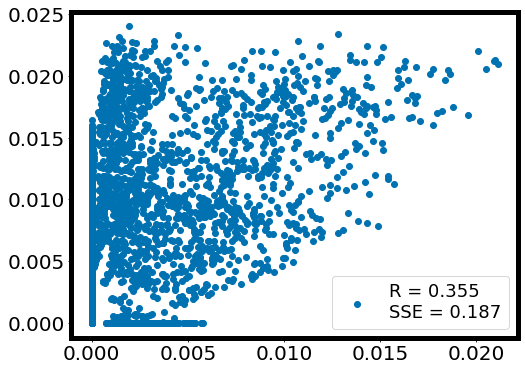

Top 5 profit predictions:  [0.26097983 0.25439745 0.25344914 0.2503055  0.24793047]
Pure exploitation, returning N max objective experiments
Running trial 13, cycle 2
Epoch: 0, Loss: 148.14459, Residuals: -0.82929, Convergence:   inf
Epoch: 10, Loss: 127.99915, Residuals: -0.75901, Convergence: 0.014684
Epoch: 20, Loss: 110.61913, Residuals: -0.69542, Convergence: 0.014738
Epoch: 30, Loss: 95.54978, Residuals: -0.63773, Convergence: 0.014738
Epoch: 40, Loss: 82.59248, Residuals: -0.58550, Convergence: 0.014602
Epoch: 50, Loss: 71.56299, Residuals: -0.53827, Convergence: 0.014272
Epoch: 60, Loss: 61.85887, Residuals: -0.49520, Convergence: 0.015274
Epoch: 70, Loss: 53.05338, Residuals: -0.45656, Convergence: 0.015592
Epoch: 80, Loss: 45.47947, Residuals: -0.42136, Convergence: 0.015428
Epoch: 90, Loss: 39.10682, Residuals: -0.38917, Convergence: 0.014965
Epoch: 100, Loss: 33.80493, Residuals: -0.35952, Convergence: 0.014464
Epoch: 110, Loss: 29.41552, Residuals: -0.33245, Convergence: 0

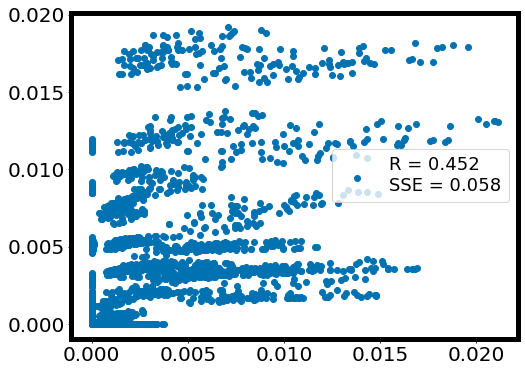

Top 5 profit predictions:  [0.20955612 0.20829982 0.20598847 0.20437624 0.204298  ]
Pure exploitation, returning N max objective experiments
Running trial 13, cycle 3
Epoch: 0, Loss: 235.69493, Residuals: -0.76011, Convergence:   inf
Epoch: 10, Loss: 202.61147, Residuals: -0.69338, Convergence: 0.015228
Epoch: 20, Loss: 174.13652, Residuals: -0.63324, Convergence: 0.015282
Epoch: 30, Loss: 149.64075, Residuals: -0.57894, Convergence: 0.015252
Epoch: 40, Loss: 128.74467, Residuals: -0.52975, Convergence: 0.015155
Epoch: 50, Loss: 110.00239, Residuals: -0.48538, Convergence: 0.015965
Epoch: 60, Loss: 93.99631, Residuals: -0.44493, Convergence: 0.015734
Epoch: 70, Loss: 80.57583, Residuals: -0.40740, Convergence: 0.015482
Epoch: 80, Loss: 69.31950, Residuals: -0.37310, Convergence: 0.014704
Epoch: 90, Loss: 59.99088, Residuals: -0.34126, Convergence: 0.014090
Epoch: 100, Loss: 52.18589, Residuals: -0.31227, Convergence: 0.013909
Epoch: 110, Loss: 45.68829, Residuals: -0.28589, Convergence


Epoch: 949, Evidence: 892.29822, Convergence: 0.011555
Epoch: 950, Loss: 176.95280, Residuals: -0.00730, Convergence: 0.001661
Epoch: 960, Loss: 174.55716, Residuals: -0.00733, Convergence: 0.001388
Epoch: 970, Loss: 172.46939, Residuals: -0.00730, Convergence: 0.001125

Epoch: 976, Evidence: 890.86536, Convergence: -0.001608


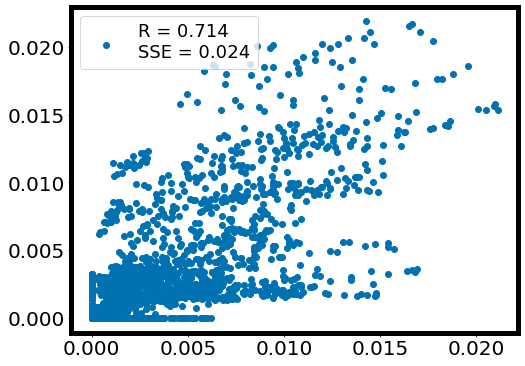

Top 5 profit predictions:  [0.23780456 0.23727214 0.23560245 0.22795248 0.22274193]
Pure exploitation, returning N max objective experiments
Running trial 13, cycle 4
Epoch: 0, Loss: 276.37541, Residuals: -0.61867, Convergence:   inf
Epoch: 10, Loss: 238.76064, Residuals: -0.56481, Convergence: 0.014850
Epoch: 20, Loss: 205.56346, Residuals: -0.51549, Convergence: 0.015200
Epoch: 30, Loss: 176.83708, Residuals: -0.47087, Convergence: 0.015096
Epoch: 40, Loss: 152.34773, Residuals: -0.43047, Convergence: 0.015127
Epoch: 50, Loss: 131.44887, Residuals: -0.39251, Convergence: 0.014666
Epoch: 60, Loss: 113.93516, Residuals: -0.35747, Convergence: 0.014348
Epoch: 70, Loss: 99.22737, Residuals: -0.32539, Convergence: 0.013646
Epoch: 80, Loss: 86.90060, Residuals: -0.29618, Convergence: 0.013083
Epoch: 90, Loss: 76.51875, Residuals: -0.26973, Convergence: 0.012491
Epoch: 100, Loss: 67.77953, Residuals: -0.24576, Convergence: 0.012000
Epoch: 110, Loss: 60.49299, Residuals: -0.22386, Convergenc

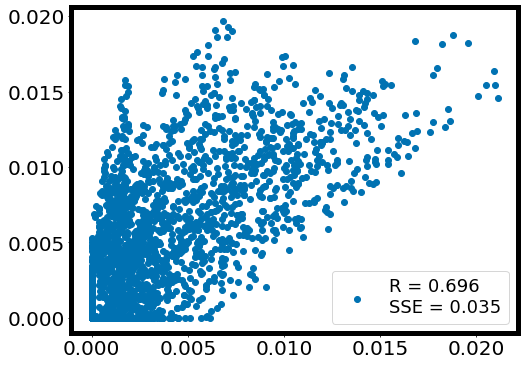

Top 5 profit predictions:  [0.21657568 0.20978759 0.20665848 0.20654777 0.20638397]
Pure exploitation, returning N max objective experiments
Running trial 13, cycle 5
Epoch: 0, Loss: 543.65227, Residuals: -0.11042, Convergence:   inf
Epoch: 10, Loss: 458.73138, Residuals: -0.10284, Convergence: 0.016981
Epoch: 20, Loss: 387.23392, Residuals: -0.09548, Convergence: 0.017151
Epoch: 30, Loss: 326.07559, Residuals: -0.08871, Convergence: 0.017393
Epoch: 40, Loss: 274.53040, Residuals: -0.08232, Convergence: 0.017288
Epoch: 50, Loss: 231.78882, Residuals: -0.07628, Convergence: 0.016819
Epoch: 60, Loss: 196.70079, Residuals: -0.07049, Convergence: 0.016301
Epoch: 70, Loss: 167.79799, Residuals: -0.06527, Convergence: 0.015758
Epoch: 80, Loss: 143.95163, Residuals: -0.06033, Convergence: 0.015215
Epoch: 90, Loss: 124.20238, Residuals: -0.05581, Convergence: 0.014654
Epoch: 100, Loss: 107.64757, Residuals: -0.05171, Convergence: 0.014158
Epoch: 110, Loss: 93.83897, Residuals: -0.04788, Conver

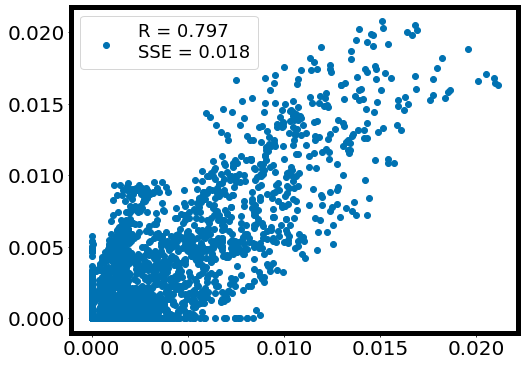

Top 5 profit predictions:  [0.22873089 0.22300397 0.22188474 0.22018404 0.21831483]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 643.18004, Residuals: -0.14944, Convergence:   inf
Epoch: 10, Loss: 542.27612, Residuals: -0.13718, Convergence: 0.017198
Epoch: 20, Loss: 456.23465, Residuals: -0.12600, Convergence: 0.017681
Epoch: 30, Loss: 382.76205, Residuals: -0.11660, Convergence: 0.017515
Epoch: 40, Loss: 321.80536, Residuals: -0.10750, Convergence: 0.017536
Epoch: 50, Loss: 271.40930, Residuals: -0.09868, Convergence: 0.017046
Epoch: 60, Loss: 229.81099, Residuals: -0.09064, Convergence: 0.016582
Epoch: 70, Loss: 195.48087, Residuals: -0.08332, Convergence: 0.016159
Epoch: 80, Loss: 166.94635, Residuals: -0.07634, Convergence: 0.015775
Epoch: 90, Loss: 143.03442, Residuals: -0.06995, Convergence: 0.015339
Epoch: 100, Loss: 123.19891, Residuals: -0.06416, Convergence: 0.014825
Epoch: 110, Loss: 106.72047, Residuals: -0.05901, Convergence: 0.014170
Epoch: 12

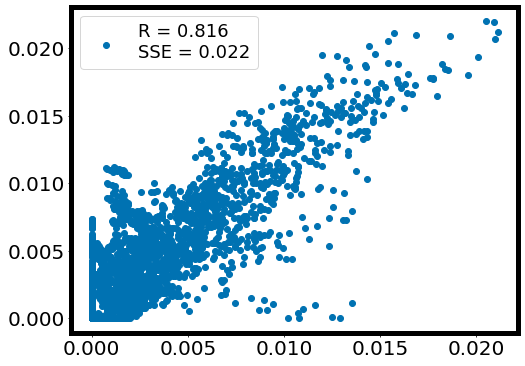

Running trial 14, cycle 1
Epoch: 0, Loss: 74.47945, Residuals: -1.00910, Convergence:   inf
Epoch: 10, Loss: 65.96696, Residuals: -0.92806, Convergence: 0.012395
Epoch: 20, Loss: 58.18237, Residuals: -0.85566, Convergence: 0.012780
Epoch: 30, Loss: 51.19308, Residuals: -0.79054, Convergence: 0.012951
Epoch: 40, Loss: 44.97912, Residuals: -0.73167, Convergence: 0.013072
Epoch: 50, Loss: 39.50170, Residuals: -0.67844, Convergence: 0.013046
Epoch: 60, Loss: 34.72417, Residuals: -0.63026, Convergence: 0.012905
Epoch: 70, Loss: 30.57608, Residuals: -0.58661, Convergence: 0.012714
Epoch: 80, Loss: 26.99219, Residuals: -0.54685, Convergence: 0.012403
Epoch: 90, Loss: 23.91121, Residuals: -0.51053, Convergence: 0.011904
Epoch: 100, Loss: 21.24115, Residuals: -0.47769, Convergence: 0.011942
Epoch: 110, Loss: 18.94705, Residuals: -0.44761, Convergence: 0.011130
Epoch: 120, Loss: 16.99952, Residuals: -0.41991, Convergence: 0.010494
Epoch: 130, Loss: 15.31979, Residuals: -0.39473, Convergence: 0.0


Epoch: 806, Evidence: 202.34662, Convergence: -0.001495
Epoch: 810, Loss: 49.27020, Residuals: 0.00060, Convergence: 0.001149

Epoch: 814, Evidence: 205.64120, Convergence: 0.014550

Epoch: 815, Evidence: 205.30356, Convergence: -0.001645

Epoch: 816, Evidence: 206.24255, Convergence: 0.002916

Epoch: 817, Evidence: 207.08307, Convergence: 0.004059

Epoch: 818, Evidence: 208.39252, Convergence: 0.006284

Epoch: 819, Evidence: 209.74124, Convergence: 0.006430
Epoch: 820, Loss: 53.85756, Residuals: 0.00060, Convergence: 0.000644

Epoch: 820, Evidence: 210.75365, Convergence: 0.004804
Epoch: 820, Loss: 54.45326, Residuals: 0.00060, Convergence:   inf

Epoch: 821, Evidence: 209.56752, Convergence: -0.005660


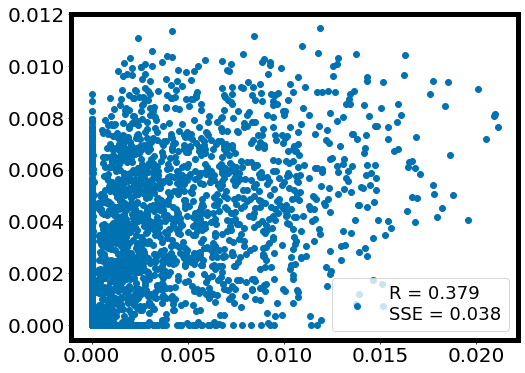

Top 5 profit predictions:  [0.12449881 0.12329214 0.12125093 0.12043609 0.11547483]
Pure exploitation, returning N max objective experiments
Running trial 14, cycle 2
Epoch: 0, Loss: 179.41271, Residuals: -0.67564, Convergence:   inf
Epoch: 10, Loss: 154.68381, Residuals: -0.61921, Convergence: 0.015144
Epoch: 20, Loss: 132.73026, Residuals: -0.56876, Convergence: 0.015633
Epoch: 30, Loss: 113.44273, Residuals: -0.52350, Convergence: 0.015964
Epoch: 40, Loss: 96.73744, Residuals: -0.48251, Convergence: 0.016100
Epoch: 50, Loss: 82.47566, Residuals: -0.44498, Convergence: 0.016030
Epoch: 60, Loss: 70.50072, Residuals: -0.41004, Convergence: 0.015585
Epoch: 70, Loss: 60.59542, Residuals: -0.37757, Convergence: 0.014693
Epoch: 80, Loss: 52.26131, Residuals: -0.34781, Convergence: 0.014514
Epoch: 90, Loss: 45.34039, Residuals: -0.32058, Convergence: 0.013852
Epoch: 100, Loss: 39.62936, Residuals: -0.29541, Convergence: 0.013949
Epoch: 110, Loss: 34.85024, Residuals: -0.27248, Convergence: 


Epoch: 959, Evidence: 442.06238, Convergence: 0.003372
Epoch: 960, Loss: 89.06344, Residuals: -0.00732, Convergence: 0.002288
Epoch: 970, Loss: 87.00365, Residuals: -0.00817, Convergence: 0.002722
Epoch: 980, Loss: 85.23159, Residuals: -0.00880, Convergence: 0.002422
Epoch: 990, Loss: 83.67522, Residuals: -0.00922, Convergence: 0.001803
Epoch: 1000, Loss: 82.32219, Residuals: -0.00949, Convergence: 0.001319

Epoch: 1009, Evidence: 437.11188, Convergence: -0.011325
Epoch: 1010, Loss: 93.39173, Residuals: -0.00725, Convergence: 0.001708
Epoch: 1020, Loss: 92.12348, Residuals: -0.00733, Convergence: 0.001226
Epoch: 1030, Loss: 90.98228, Residuals: -0.00733, Convergence: 0.001010
Epoch: 1040, Loss: 89.85420, Residuals: -0.00736, Convergence: 0.001414

Epoch: 1042, Evidence: 455.39362, Convergence: 0.029274
Epoch: 1050, Loss: 94.55508, Residuals: -0.00740, Convergence: 0.001365
Epoch: 1060, Loss: 93.37686, Residuals: -0.00743, Convergence: 0.001037

Epoch: 1066, Evidence: 456.51041, Conver

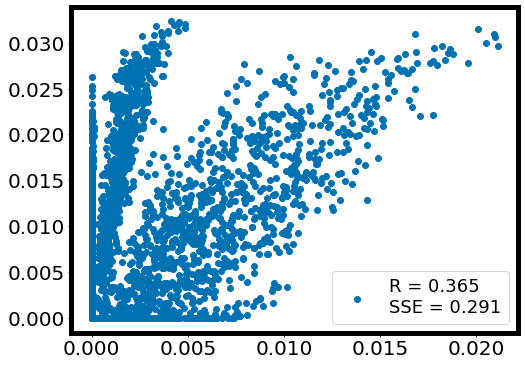

Top 5 profit predictions:  [0.35623458 0.3487687  0.34840852 0.34808064 0.34773543]
Pure exploitation, returning N max objective experiments
Running trial 14, cycle 3
Epoch: 0, Loss: 275.56505, Residuals: -0.60775, Convergence:   inf
Epoch: 10, Loss: 236.70888, Residuals: -0.55453, Convergence: 0.015375
Epoch: 20, Loss: 202.96594, Residuals: -0.50705, Convergence: 0.015627
Epoch: 30, Loss: 173.42435, Residuals: -0.46472, Convergence: 0.016062
Epoch: 40, Loss: 147.69746, Residuals: -0.42589, Convergence: 0.016083
Epoch: 50, Loss: 126.10339, Residuals: -0.38974, Convergence: 0.015620
Epoch: 60, Loss: 108.11869, Residuals: -0.35658, Convergence: 0.015310
Epoch: 70, Loss: 92.95466, Residuals: -0.32618, Convergence: 0.015261
Epoch: 80, Loss: 80.15417, Residuals: -0.29841, Convergence: 0.014323
Epoch: 90, Loss: 69.52512, Residuals: -0.27285, Convergence: 0.014037
Epoch: 100, Loss: 60.49883, Residuals: -0.24949, Convergence: 0.014004
Epoch: 110, Loss: 53.07248, Residuals: -0.22767, Convergenc


Epoch: 953, Evidence: 857.22693, Convergence: 0.003029
Epoch: 960, Loss: 158.65195, Residuals: -0.01175, Convergence: 0.002021
Epoch: 970, Loss: 155.58574, Residuals: -0.01216, Convergence: 0.001869
Epoch: 980, Loss: 152.91147, Residuals: -0.01187, Convergence: 0.001316

Epoch: 983, Evidence: 854.43011, Convergence: -0.003273
Epoch: 990, Loss: 163.40634, Residuals: -0.01119, Convergence: 0.001505
Epoch: 1000, Loss: 161.20468, Residuals: -0.01104, Convergence: 0.001021
Epoch: 1010, Loss: 159.14297, Residuals: -0.01083, Convergence: 0.001181

Epoch: 1015, Evidence: 866.91333, Convergence: 0.011173
Epoch: 1020, Loss: 163.62431, Residuals: -0.01068, Convergence: 0.001545

Epoch: 1029, Evidence: 870.41760, Convergence: 0.004026
Epoch: 1030, Loss: 167.04526, Residuals: -0.01054, Convergence: 0.001500

Epoch: 1037, Evidence: 872.25421, Convergence: 0.002106
Epoch: 1040, Loss: 169.00995, Residuals: -0.01054, Convergence: 0.001510
Epoch: 1050, Loss: 166.67606, Residuals: -0.01048, Convergence:

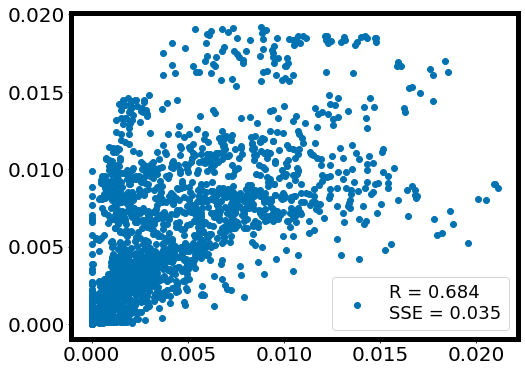

Top 5 profit predictions:  [0.2049212  0.2038666  0.2007549  0.20040508 0.19923623]
Pure exploitation, returning N max objective experiments
Running trial 14, cycle 4
Epoch: 0, Loss: 364.92027, Residuals: -0.31789, Convergence:   inf
Epoch: 10, Loss: 311.06534, Residuals: -0.28961, Convergence: 0.016270
Epoch: 20, Loss: 264.22195, Residuals: -0.26417, Convergence: 0.016557
Epoch: 30, Loss: 224.07642, Residuals: -0.24156, Convergence: 0.016629
Epoch: 40, Loss: 190.21945, Residuals: -0.22124, Convergence: 0.016361
Epoch: 50, Loss: 162.05156, Residuals: -0.20236, Convergence: 0.015959
Epoch: 60, Loss: 138.63757, Residuals: -0.18496, Convergence: 0.015591
Epoch: 70, Loss: 119.25431, Residuals: -0.16907, Convergence: 0.015062
Epoch: 80, Loss: 103.24291, Residuals: -0.15463, Convergence: 0.014145
Epoch: 90, Loss: 89.99055, Residuals: -0.14134, Convergence: 0.013293
Epoch: 100, Loss: 78.89339, Residuals: -0.12928, Convergence: 0.012997
Epoch: 110, Loss: 69.75571, Residuals: -0.11843, Converge

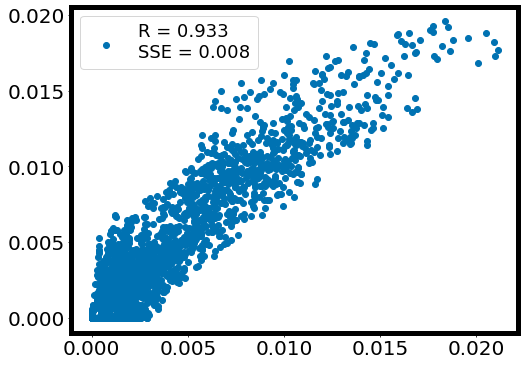

Top 5 profit predictions:  [0.21271692 0.21188816 0.20916927 0.20765565 0.20590086]
Pure exploitation, returning N max objective experiments
Running trial 14, cycle 5
Epoch: 0, Loss: 360.99504, Residuals: -0.26884, Convergence:   inf
Epoch: 10, Loss: 312.45016, Residuals: -0.24473, Convergence: 0.014804
Epoch: 20, Loss: 269.01434, Residuals: -0.22315, Convergence: 0.015286
Epoch: 30, Loss: 230.83411, Residuals: -0.20385, Convergence: 0.015373
Epoch: 40, Loss: 198.43707, Residuals: -0.18616, Convergence: 0.015267
Epoch: 50, Loss: 171.11539, Residuals: -0.16986, Convergence: 0.014566
Epoch: 60, Loss: 148.62718, Residuals: -0.15511, Convergence: 0.013768
Epoch: 70, Loss: 130.07295, Residuals: -0.14160, Convergence: 0.013047
Epoch: 80, Loss: 114.72363, Residuals: -0.12912, Convergence: 0.012048
Epoch: 90, Loss: 102.00784, Residuals: -0.11787, Convergence: 0.010936
Epoch: 100, Loss: 91.39046, Residuals: -0.10769, Convergence: 0.010873
Epoch: 110, Loss: 82.59837, Residuals: -0.09842, Converg

Epoch: 950, Loss: 333.62518, Residuals: -0.00558, Convergence: 0.001429
Epoch: 960, Loss: 329.25931, Residuals: -0.00580, Convergence: 0.001237

Epoch: 965, Evidence: 1597.73926, Convergence: 0.002581
Epoch: 970, Loss: 329.84213, Residuals: -0.00596, Convergence: 0.001266
Epoch: 980, Loss: 326.14630, Residuals: -0.00605, Convergence: 0.001034

Epoch: 981, Evidence: 1596.67871, Convergence: -0.000664
Epoch: 990, Loss: 322.66641, Residuals: -0.00754, Convergence: 0.001651
Epoch: 1000, Loss: 318.36011, Residuals: -0.00770, Convergence: 0.001186

Epoch: 1003, Evidence: 1584.62915, Convergence: -0.008273


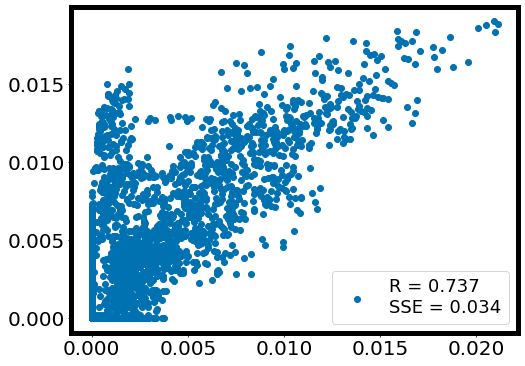

Top 5 profit predictions:  [0.20996845 0.20464604 0.20429362 0.20218036 0.199669  ]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 436.72868, Residuals: -0.31738, Convergence:   inf
Epoch: 10, Loss: 375.78967, Residuals: -0.28863, Convergence: 0.015565
Epoch: 20, Loss: 321.04218, Residuals: -0.26291, Convergence: 0.016099
Epoch: 30, Loss: 273.23679, Residuals: -0.23988, Convergence: 0.016229
Epoch: 40, Loss: 232.48306, Residuals: -0.21859, Convergence: 0.016228
Epoch: 50, Loss: 198.33192, Residuals: -0.19898, Convergence: 0.015952
Epoch: 60, Loss: 169.75821, Residuals: -0.18090, Convergence: 0.015398
Epoch: 70, Loss: 146.19852, Residuals: -0.16436, Convergence: 0.014619
Epoch: 80, Loss: 126.67973, Residuals: -0.14964, Convergence: 0.013871
Epoch: 90, Loss: 110.49284, Residuals: -0.13641, Convergence: 0.013440
Epoch: 100, Loss: 97.09789, Residuals: -0.12439, Convergence: 0.012749
Epoch: 110, Loss: 85.94872, Residuals: -0.11355, Convergence: 0.011932
Epoch: 120,

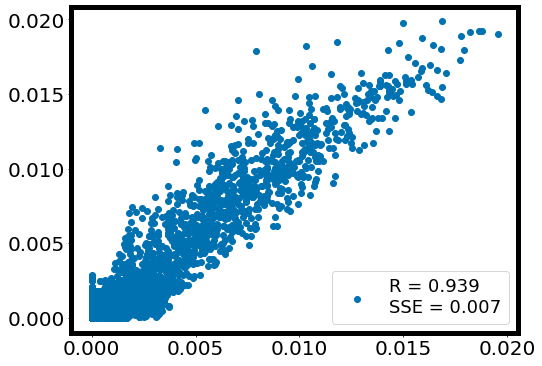

Running trial 15, cycle 1
Epoch: 0, Loss: 98.23380, Residuals: -1.33313, Convergence:   inf
Epoch: 10, Loss: 85.16357, Residuals: -1.22021, Convergence: 0.014764
Epoch: 20, Loss: 73.24098, Residuals: -1.11884, Convergence: 0.015470
Epoch: 30, Loss: 62.69029, Residuals: -1.02721, Convergence: 0.015821
Epoch: 40, Loss: 53.52921, Residuals: -0.94432, Convergence: 0.015963
Epoch: 50, Loss: 45.72100, Residuals: -0.86911, Convergence: 0.015815
Epoch: 60, Loss: 39.16479, Residuals: -0.80084, Convergence: 0.015389
Epoch: 70, Loss: 33.71484, Residuals: -0.73855, Convergence: 0.014975
Epoch: 80, Loss: 29.22442, Residuals: -0.68157, Convergence: 0.014174
Epoch: 90, Loss: 25.50781, Residuals: -0.62997, Convergence: 0.013378
Epoch: 100, Loss: 22.43970, Residuals: -0.58322, Convergence: 0.012303
Epoch: 110, Loss: 19.89032, Residuals: -0.54091, Convergence: 0.011159
Epoch: 120, Loss: 17.76833, Residuals: -0.50258, Convergence: 0.011400
Epoch: 130, Loss: 16.01355, Residuals: -0.46780, Convergence: 0.0

Epoch: 870, Loss: 40.53708, Residuals: -0.01603, Convergence: 0.001532
Epoch: 880, Loss: 39.74701, Residuals: -0.01629, Convergence: 0.002396

Epoch: 886, Evidence: 243.20959, Convergence: -0.007383
Epoch: 890, Loss: 42.52722, Residuals: -0.01436, Convergence: 0.001820
Epoch: 900, Loss: 41.87148, Residuals: -0.01432, Convergence: 0.001527
Epoch: 910, Loss: 41.27129, Residuals: -0.01419, Convergence: 0.001752
Epoch: 920, Loss: 40.76566, Residuals: -0.01388, Convergence: 0.000744

Epoch: 920, Evidence: 249.00656, Convergence: 0.016069
Epoch: 920, Loss: 42.15079, Residuals: -0.01388, Convergence:   inf
Epoch: 930, Loss: 41.50510, Residuals: -0.01396, Convergence: 0.001610
Epoch: 940, Loss: 40.91883, Residuals: -0.01390, Convergence: 0.001509

Epoch: 942, Evidence: 251.14088, Convergence: 0.008499
Epoch: 950, Loss: 41.69217, Residuals: -0.01393, Convergence: 0.001468

Epoch: 959, Evidence: 250.96469, Convergence: -0.000702
Epoch: 960, Loss: 42.06413, Residuals: -0.01411, Convergence: 0.002

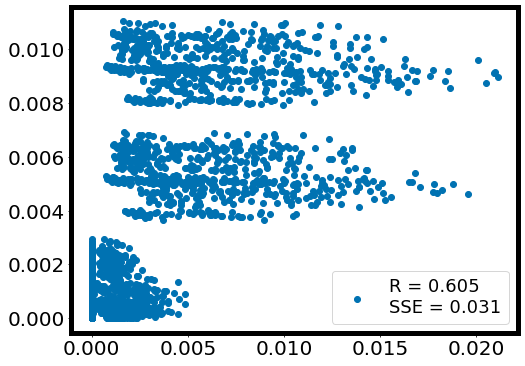

Top 5 profit predictions:  [0.11996997 0.11964517 0.11950469 0.11934993 0.11926818]
Pure exploitation, returning N max objective experiments
Running trial 15, cycle 2
Epoch: 0, Loss: 140.29353, Residuals: -0.84339, Convergence:   inf
Epoch: 10, Loss: 121.69376, Residuals: -0.76949, Convergence: 0.014506
Epoch: 20, Loss: 105.13020, Residuals: -0.70267, Convergence: 0.014968
Epoch: 30, Loss: 90.26703, Residuals: -0.64218, Convergence: 0.015697
Epoch: 40, Loss: 76.98231, Residuals: -0.58752, Convergence: 0.016280
Epoch: 50, Loss: 65.51031, Residuals: -0.53789, Convergence: 0.016492
Epoch: 60, Loss: 55.78442, Residuals: -0.49286, Convergence: 0.016339
Epoch: 70, Loss: 47.60709, Residuals: -0.45196, Convergence: 0.015877
Epoch: 80, Loss: 40.78884, Residuals: -0.41465, Convergence: 0.015558
Epoch: 90, Loss: 35.10817, Residuals: -0.38070, Convergence: 0.014880
Epoch: 100, Loss: 30.45576, Residuals: -0.34969, Convergence: 0.013059
Epoch: 110, Loss: 26.55906, Residuals: -0.32154, Convergence: 0

Epoch: 910, Loss: 84.26906, Residuals: -0.01893, Convergence: 0.001073
Epoch: 920, Loss: 82.80496, Residuals: -0.01818, Convergence: 0.002087

Epoch: 922, Evidence: 515.37543, Convergence: 0.001181

Epoch: 925, Evidence: 525.64087, Convergence: 0.019529
Epoch: 930, Loss: 89.51885, Residuals: -0.01866, Convergence: 0.003176

Epoch: 937, Evidence: 526.82080, Convergence: 0.002240
Epoch: 940, Loss: 91.28233, Residuals: -0.01924, Convergence: 0.002785

Epoch: 942, Evidence: 529.94946, Convergence: 0.005904
Epoch: 950, Loss: 92.47079, Residuals: -0.02011, Convergence: 0.002205
Epoch: 960, Loss: 90.28612, Residuals: -0.02040, Convergence: 0.001813

Epoch: 964, Evidence: 522.72815, Convergence: -0.013815
Epoch: 970, Loss: 95.49676, Residuals: -0.01934, Convergence: 0.001820
Epoch: 980, Loss: 93.95107, Residuals: -0.01916, Convergence: 0.001784
Epoch: 990, Loss: 92.59507, Residuals: -0.01893, Convergence: 0.001211

Epoch: 995, Evidence: 529.42450, Convergence: -0.000992
Epoch: 1000, Loss: 92.5

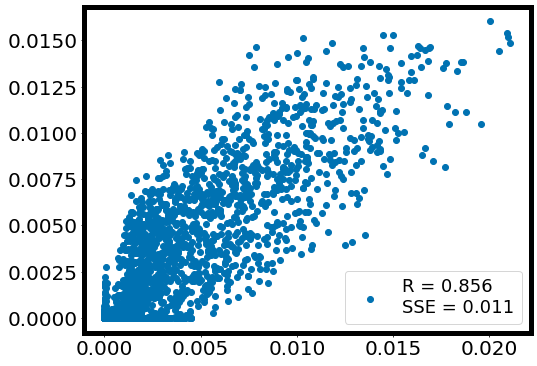

Top 5 profit predictions:  [0.17407577 0.16996524 0.16609988 0.16517207 0.1612694 ]
Pure exploitation, returning N max objective experiments
Running trial 15, cycle 3
Epoch: 0, Loss: 215.43155, Residuals: -0.60806, Convergence:   inf
Epoch: 10, Loss: 185.50017, Residuals: -0.55507, Convergence: 0.015281
Epoch: 20, Loss: 158.85396, Residuals: -0.50705, Convergence: 0.015910
Epoch: 30, Loss: 135.32462, Residuals: -0.46355, Convergence: 0.016294
Epoch: 40, Loss: 115.15562, Residuals: -0.42397, Convergence: 0.016257
Epoch: 50, Loss: 98.19525, Residuals: -0.38814, Convergence: 0.015884
Epoch: 60, Loss: 84.10912, Residuals: -0.35546, Convergence: 0.015372
Epoch: 70, Loss: 72.45056, Residuals: -0.32565, Convergence: 0.014754
Epoch: 80, Loss: 62.82204, Residuals: -0.29832, Convergence: 0.014050
Epoch: 90, Loss: 54.85381, Residuals: -0.27343, Convergence: 0.013299
Epoch: 100, Loss: 48.28821, Residuals: -0.25046, Convergence: 0.012589
Epoch: 110, Loss: 42.86967, Residuals: -0.22931, Convergence:

Epoch: 990, Loss: 165.23334, Residuals: -0.02504, Convergence: 0.001304

Epoch: 999, Evidence: 836.74353, Convergence: 0.003757
Epoch: 1000, Loss: 171.19073, Residuals: -0.02444, Convergence: 0.001425
Epoch: 1010, Loss: 168.90800, Residuals: -0.02392, Convergence: 0.001265
Epoch: 1020, Loss: 166.76868, Residuals: -0.02312, Convergence: 0.001288

Epoch: 1023, Evidence: 837.26721, Convergence: 0.000625
Epoch: 1030, Loss: 168.34064, Residuals: -0.02346, Convergence: 0.002559
Epoch: 1040, Loss: 165.11613, Residuals: -0.02342, Convergence: 0.001462

Epoch: 1045, Evidence: 833.41034, Convergence: -0.003999
Epoch: 1050, Loss: 177.64014, Residuals: -0.02448, Convergence: 0.001568
Epoch: 1060, Loss: 175.02432, Residuals: -0.02374, Convergence: 0.001410
Epoch: 1070, Loss: 172.61386, Residuals: -0.02298, Convergence: 0.001466
Epoch: 1080, Loss: 170.55423, Residuals: -0.02205, Convergence: 0.001151

Epoch: 1083, Evidence: 842.43481, Convergence: 0.006756
Epoch: 1090, Loss: 174.30858, Residuals: -0

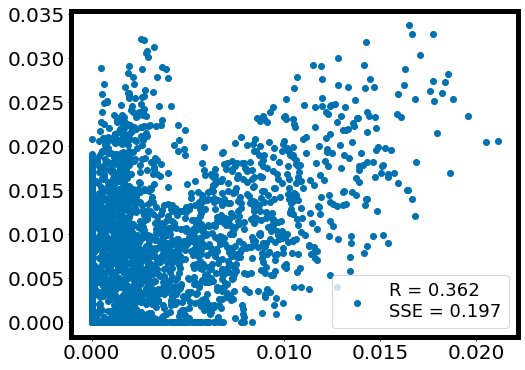

Top 5 profit predictions:  [0.3721254  0.35614073 0.35602373 0.35049683 0.34892818]
Pure exploitation, returning N max objective experiments
Running trial 15, cycle 4
Epoch: 0, Loss: 388.96077, Residuals: -0.25225, Convergence:   inf
Epoch: 10, Loss: 330.89551, Residuals: -0.23199, Convergence: 0.016490
Epoch: 20, Loss: 280.34778, Residuals: -0.21376, Convergence: 0.016882
Epoch: 30, Loss: 236.83131, Residuals: -0.19723, Convergence: 0.017079
Epoch: 40, Loss: 200.01353, Residuals: -0.18167, Convergence: 0.016973
Epoch: 50, Loss: 169.37444, Residuals: -0.16676, Convergence: 0.016649
Epoch: 60, Loss: 144.00923, Residuals: -0.15265, Convergence: 0.016180
Epoch: 70, Loss: 122.90818, Residuals: -0.13968, Convergence: 0.015990
Epoch: 80, Loss: 105.02900, Residuals: -0.12794, Convergence: 0.015732
Epoch: 90, Loss: 90.14962, Residuals: -0.11753, Convergence: 0.015205
Epoch: 100, Loss: 77.83270, Residuals: -0.10796, Convergence: 0.014573
Epoch: 110, Loss: 67.62903, Residuals: -0.09918, Converge

Epoch: 950, Loss: 245.62964, Residuals: -0.01111, Convergence: 0.001236
Epoch: 960, Loss: 242.59106, Residuals: -0.01121, Convergence: 0.001074

Epoch: 961, Evidence: 1200.07080, Convergence: -0.003622

Epoch: 966, Evidence: 1210.77979, Convergence: 0.005255
Epoch: 970, Loss: 255.64047, Residuals: -0.01024, Convergence: 0.000928

Epoch: 970, Evidence: 1212.26990, Convergence: 0.001229
Epoch: 970, Loss: 258.62997, Residuals: -0.01024, Convergence:   inf

Epoch: 974, Evidence: 1213.26294, Convergence: 0.000818
Epoch: 980, Loss: 256.02765, Residuals: -0.01094, Convergence: 0.001617
Epoch: 990, Loss: 252.09555, Residuals: -0.01149, Convergence: 0.001323
Epoch: 1000, Loss: 248.86353, Residuals: -0.01157, Convergence: 0.000976

Epoch: 1000, Evidence: 1206.01440, Convergence: -0.005187


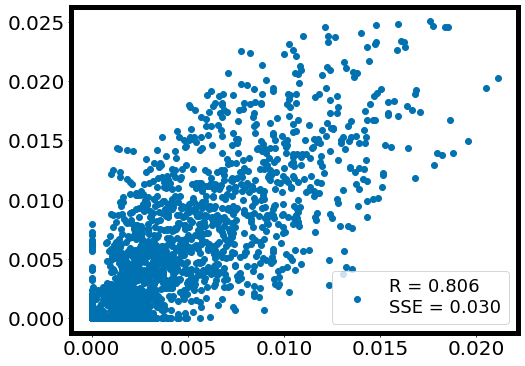

Top 5 profit predictions:  [0.271168   0.27082947 0.26845032 0.268036   0.26677874]
Pure exploitation, returning N max objective experiments
Running trial 15, cycle 5
Epoch: 0, Loss: 452.53685, Residuals: -0.29870, Convergence:   inf
Epoch: 10, Loss: 385.36459, Residuals: -0.27257, Convergence: 0.016534
Epoch: 20, Loss: 325.76529, Residuals: -0.24958, Convergence: 0.017266
Epoch: 30, Loss: 274.04929, Residuals: -0.22901, Convergence: 0.017364
Epoch: 40, Loss: 231.17506, Residuals: -0.20945, Convergence: 0.016871
Epoch: 50, Loss: 195.78516, Residuals: -0.19140, Convergence: 0.016599
Epoch: 60, Loss: 166.19247, Residuals: -0.17476, Convergence: 0.016531
Epoch: 70, Loss: 141.69254, Residuals: -0.15962, Convergence: 0.015901
Epoch: 80, Loss: 121.38557, Residuals: -0.14585, Convergence: 0.015424
Epoch: 90, Loss: 104.60941, Residuals: -0.13330, Convergence: 0.014810
Epoch: 100, Loss: 90.57680, Residuals: -0.12191, Convergence: 0.014331
Epoch: 110, Loss: 78.89161, Residuals: -0.11145, Converg

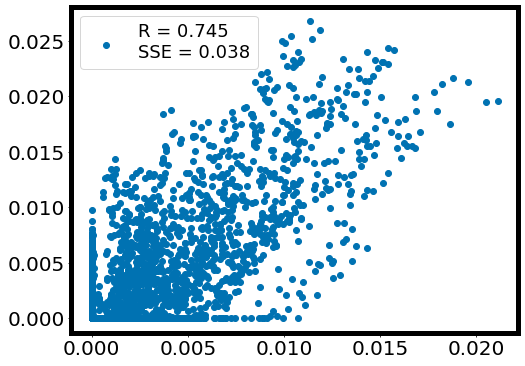

Top 5 profit predictions:  [0.29496396 0.28214055 0.27621746 0.27388027 0.27205393]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 543.97716, Residuals: -0.03361, Convergence:   inf
Epoch: 10, Loss: 463.21332, Residuals: -0.03182, Convergence: 0.016447
Epoch: 20, Loss: 391.93069, Residuals: -0.03069, Convergence: 0.017178
Epoch: 30, Loss: 330.59882, Residuals: -0.02983, Convergence: 0.017042
Epoch: 40, Loss: 279.96194, Residuals: -0.02848, Convergence: 0.016664
Epoch: 50, Loss: 238.13268, Residuals: -0.02708, Convergence: 0.016083
Epoch: 60, Loss: 203.54103, Residuals: -0.02553, Convergence: 0.015663
Epoch: 70, Loss: 174.79102, Residuals: -0.02382, Convergence: 0.015192
Epoch: 80, Loss: 150.89320, Residuals: -0.02212, Convergence: 0.014498
Epoch: 90, Loss: 131.24130, Residuals: -0.02053, Convergence: 0.013629
Epoch: 100, Loss: 114.93984, Residuals: -0.01914, Convergence: 0.012970
Epoch: 110, Loss: 101.32284, Residuals: -0.01779, Convergence: 0.012754
Epoch: 12

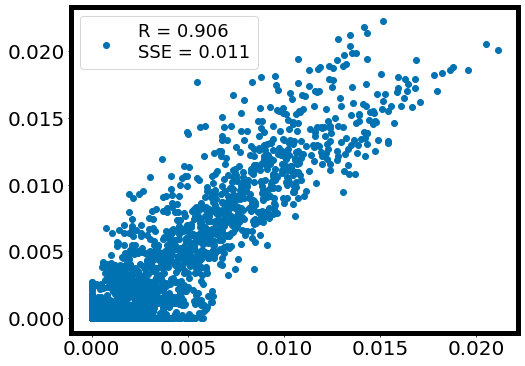

Running trial 16, cycle 1
Epoch: 0, Loss: 71.03148, Residuals: -1.11434, Convergence:   inf
Epoch: 10, Loss: 62.03058, Residuals: -1.02619, Convergence: 0.013501
Epoch: 20, Loss: 54.33714, Residuals: -0.94738, Convergence: 0.013207
Epoch: 30, Loss: 47.68730, Residuals: -0.87648, Convergence: 0.013132
Epoch: 40, Loss: 41.80115, Residuals: -0.81289, Convergence: 0.013419
Epoch: 50, Loss: 36.49271, Residuals: -0.75618, Convergence: 0.013873
Epoch: 60, Loss: 31.74794, Residuals: -0.70554, Convergence: 0.014102
Epoch: 70, Loss: 27.60602, Residuals: -0.65986, Convergence: 0.014032
Epoch: 80, Loss: 24.05933, Residuals: -0.61816, Convergence: 0.013732
Epoch: 90, Loss: 21.05565, Residuals: -0.57981, Convergence: 0.013111
Epoch: 100, Loss: 18.53238, Residuals: -0.54345, Convergence: 0.012386
Epoch: 110, Loss: 16.40777, Residuals: -0.50998, Convergence: 0.011575
Epoch: 120, Loss: 14.64623, Residuals: -0.47931, Convergence: 0.011193
Epoch: 130, Loss: 13.15227, Residuals: -0.45159, Convergence: 0.0

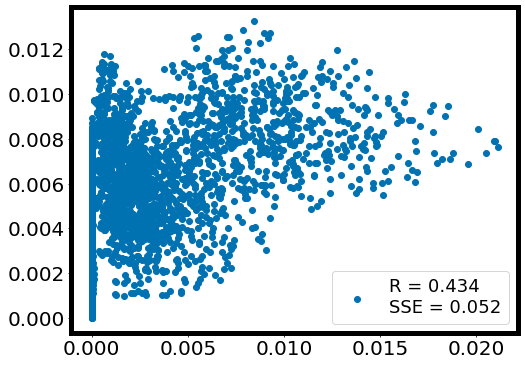

Top 5 profit predictions:  [0.14393884 0.14048842 0.13837469 0.1353466  0.13331404]
Pure exploitation, returning N max objective experiments
Running trial 16, cycle 2
Epoch: 0, Loss: 178.73174, Residuals: -1.17419, Convergence:   inf
Epoch: 10, Loss: 154.06126, Residuals: -1.07253, Convergence: 0.014861
Epoch: 20, Loss: 132.98193, Residuals: -0.98123, Convergence: 0.014868
Epoch: 30, Loss: 114.52051, Residuals: -0.89946, Convergence: 0.015229
Epoch: 40, Loss: 98.35019, Residuals: -0.82661, Convergence: 0.015371
Epoch: 50, Loss: 84.50420, Residuals: -0.76118, Convergence: 0.015179
Epoch: 60, Loss: 72.84414, Residuals: -0.70220, Convergence: 0.014775
Epoch: 70, Loss: 63.09917, Residuals: -0.64906, Convergence: 0.014186
Epoch: 80, Loss: 54.97635, Residuals: -0.60088, Convergence: 0.013572
Epoch: 90, Loss: 48.21463, Residuals: -0.55719, Convergence: 0.012903
Epoch: 100, Loss: 42.61614, Residuals: -0.51717, Convergence: 0.011937
Epoch: 110, Loss: 37.99140, Residuals: -0.48042, Convergence: 


Epoch: 843, Evidence: 485.35925, Convergence: -0.019619


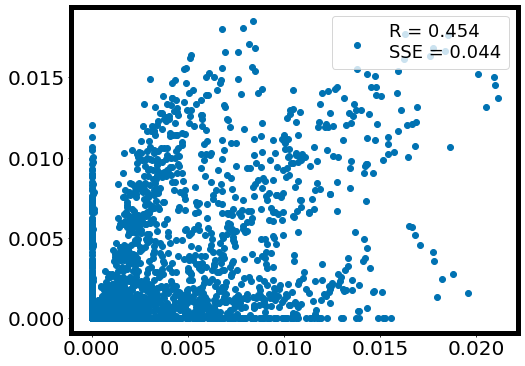

Top 5 profit predictions:  [0.20082076 0.19937861 0.19601783 0.19446732 0.19258663]
Pure exploitation, returning N max objective experiments
Running trial 16, cycle 3
Epoch: 0, Loss: 323.75533, Residuals: -0.78317, Convergence:   inf
Epoch: 10, Loss: 275.99579, Residuals: -0.71448, Convergence: 0.016071
Epoch: 20, Loss: 235.06247, Residuals: -0.65310, Convergence: 0.016308
Epoch: 30, Loss: 199.50034, Residuals: -0.59830, Convergence: 0.016739
Epoch: 40, Loss: 168.71313, Residuals: -0.54846, Convergence: 0.016954
Epoch: 50, Loss: 142.70212, Residuals: -0.50318, Convergence: 0.016768
Epoch: 60, Loss: 121.11773, Residuals: -0.46189, Convergence: 0.016383
Epoch: 70, Loss: 103.21867, Residuals: -0.42392, Convergence: 0.015915
Epoch: 80, Loss: 88.38453, Residuals: -0.38934, Convergence: 0.015339
Epoch: 90, Loss: 76.20708, Residuals: -0.35758, Convergence: 0.014582
Epoch: 100, Loss: 66.18440, Residuals: -0.32846, Convergence: 0.013972
Epoch: 110, Loss: 58.03062, Residuals: -0.30110, Convergen

Epoch: 960, Loss: 163.91528, Residuals: -0.00438, Convergence: 0.001159
Epoch: 970, Loss: 161.86563, Residuals: -0.00446, Convergence: 0.001255

Epoch: 971, Evidence: 807.90723, Convergence: 0.000790
Epoch: 980, Loss: 162.45691, Residuals: -0.00574, Convergence: 0.002334
Epoch: 990, Loss: 158.89676, Residuals: -0.00647, Convergence: 0.002100
Epoch: 1000, Loss: 156.13051, Residuals: -0.00661, Convergence: 0.001784

Epoch: 1007, Evidence: 793.78217, Convergence: -0.016991
Epoch: 1010, Loss: 174.71829, Residuals: -0.00416, Convergence: 0.001738
Epoch: 1020, Loss: 171.81924, Residuals: -0.00444, Convergence: 0.001721
Epoch: 1030, Loss: 169.31540, Residuals: -0.00457, Convergence: 0.001554

Epoch: 1032, Evidence: 817.74286, Convergence: 0.012808
Epoch: 1040, Loss: 172.37050, Residuals: -0.00482, Convergence: 0.001677
Epoch: 1050, Loss: 169.86877, Residuals: -0.00498, Convergence: 0.001486
Epoch: 1060, Loss: 167.67712, Residuals: -0.00502, Convergence: 0.001374

Epoch: 1069, Evidence: 813.35

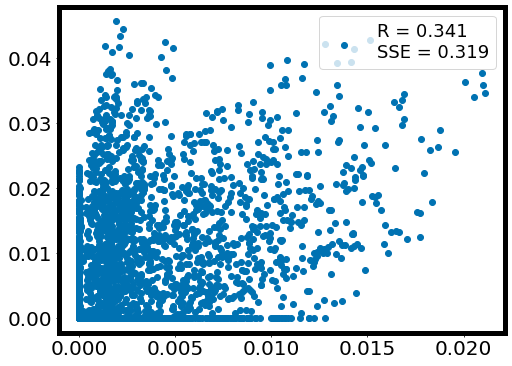

Top 5 profit predictions:  [0.4963065  0.49097443 0.47137886 0.4711671  0.4626124 ]
Pure exploitation, returning N max objective experiments
Running trial 16, cycle 4
Epoch: 0, Loss: 364.24785, Residuals: -0.74394, Convergence:   inf
Epoch: 10, Loss: 311.33640, Residuals: -0.67632, Convergence: 0.015841
Epoch: 20, Loss: 265.85678, Residuals: -0.61539, Convergence: 0.016003
Epoch: 30, Loss: 226.41768, Residuals: -0.56098, Convergence: 0.016350
Epoch: 40, Loss: 192.27032, Residuals: -0.51247, Convergence: 0.016529
Epoch: 50, Loss: 163.29910, Residuals: -0.46859, Convergence: 0.016456
Epoch: 60, Loss: 139.13077, Residuals: -0.42822, Convergence: 0.015708
Epoch: 70, Loss: 118.80547, Residuals: -0.39114, Convergence: 0.015889
Epoch: 80, Loss: 101.73087, Residuals: -0.35701, Convergence: 0.015342
Epoch: 90, Loss: 87.55089, Residuals: -0.32588, Convergence: 0.014881
Epoch: 100, Loss: 75.76841, Residuals: -0.29750, Convergence: 0.014323
Epoch: 110, Loss: 66.03052, Residuals: -0.27148, Converge


Epoch: 966, Evidence: 1216.38696, Convergence: 0.006042
Epoch: 970, Loss: 232.73273, Residuals: -0.00914, Convergence: 0.001472
Epoch: 980, Loss: 229.64487, Residuals: -0.00949, Convergence: 0.001186

Epoch: 989, Evidence: 1219.36670, Convergence: 0.002444
Epoch: 990, Loss: 234.37650, Residuals: -0.00957, Convergence: 0.001549
Epoch: 1000, Loss: 231.23431, Residuals: -0.00998, Convergence: 0.001203

Epoch: 1003, Evidence: 1223.02319, Convergence: 0.002990
Epoch: 1010, Loss: 234.34271, Residuals: -0.01052, Convergence: 0.001178

Epoch: 1012, Evidence: 1224.90479, Convergence: 0.001536
Epoch: 1020, Loss: 236.01071, Residuals: -0.01106, Convergence: 0.001082

Epoch: 1022, Evidence: 1228.91296, Convergence: 0.003262

Epoch: 1028, Evidence: 1229.17517, Convergence: 0.000213
Epoch: 1030, Loss: 238.89575, Residuals: -0.01253, Convergence: 0.002266
Epoch: 1040, Loss: 234.47926, Residuals: -0.01480, Convergence: 0.001609
Epoch: 1050, Loss: 230.90370, Residuals: -0.01425, Convergence: 0.001729


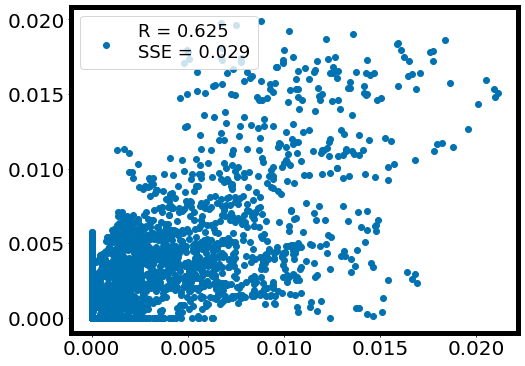

Top 5 profit predictions:  [0.20250776 0.19450189 0.19422802 0.1928186  0.18960072]
Pure exploitation, returning N max objective experiments
Running trial 16, cycle 5
Epoch: 0, Loss: 481.03755, Residuals: -0.55592, Convergence:   inf
Epoch: 10, Loss: 408.36703, Residuals: -0.50596, Convergence: 0.016549
Epoch: 20, Loss: 346.26974, Residuals: -0.46064, Convergence: 0.016716
Epoch: 30, Loss: 293.05173, Residuals: -0.42016, Convergence: 0.016882
Epoch: 40, Loss: 247.97227, Residuals: -0.38453, Convergence: 0.016781
Epoch: 50, Loss: 210.24709, Residuals: -0.35231, Convergence: 0.016575
Epoch: 60, Loss: 178.76852, Residuals: -0.32220, Convergence: 0.016192
Epoch: 70, Loss: 152.40865, Residuals: -0.29414, Convergence: 0.016042
Epoch: 80, Loss: 130.68529, Residuals: -0.26768, Convergence: 0.015036
Epoch: 90, Loss: 112.56079, Residuals: -0.24356, Convergence: 0.015044
Epoch: 100, Loss: 97.42438, Residuals: -0.22163, Convergence: 0.014388
Epoch: 110, Loss: 84.81891, Residuals: -0.20185, Converg

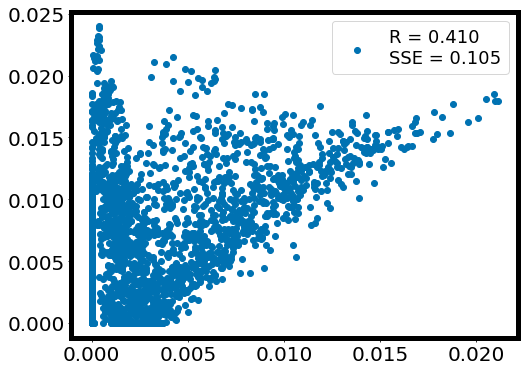

Top 5 profit predictions:  [0.26050127 0.2583176  0.25455132 0.24238348 0.24101219]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 376.60173, Residuals: -0.07381, Convergence:   inf
Epoch: 10, Loss: 327.95380, Residuals: -0.06880, Convergence: 0.014320
Epoch: 20, Loss: 283.87082, Residuals: -0.06393, Convergence: 0.014648
Epoch: 30, Loss: 245.57806, Residuals: -0.05937, Convergence: 0.014479
Epoch: 40, Loss: 213.27541, Residuals: -0.05514, Convergence: 0.013943
Epoch: 50, Loss: 186.46082, Residuals: -0.05125, Convergence: 0.013053
Epoch: 60, Loss: 164.30014, Residuals: -0.04730, Convergence: 0.012444
Epoch: 70, Loss: 145.61534, Residuals: -0.04369, Convergence: 0.012044
Epoch: 80, Loss: 129.74622, Residuals: -0.04036, Convergence: 0.011315
Epoch: 90, Loss: 116.47397, Residuals: -0.03727, Convergence: 0.010571
Epoch: 100, Loss: 105.08935, Residuals: -0.03437, Convergence: 0.010147
Epoch: 110, Loss: 95.28146, Residuals: -0.03166, Convergence: 0.009610
Epoch: 120

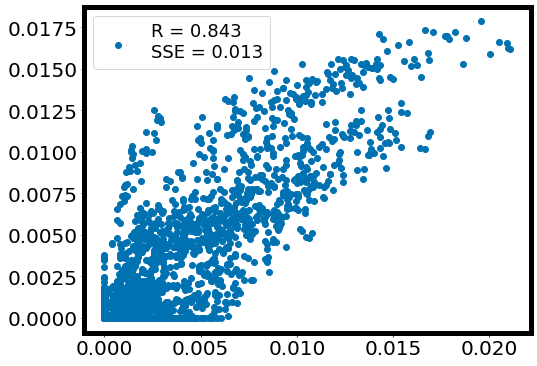

Running trial 17, cycle 1
Epoch: 0, Loss: 181.12935, Residuals: -0.46471, Convergence:   inf
Epoch: 10, Loss: 152.12517, Residuals: -0.43319, Convergence: 0.017663
Epoch: 20, Loss: 127.70774, Residuals: -0.40408, Convergence: 0.017604
Epoch: 30, Loss: 107.34731, Residuals: -0.37748, Convergence: 0.017449
Epoch: 40, Loss: 90.36206, Residuals: -0.35331, Convergence: 0.017301
Epoch: 50, Loss: 76.12265, Residuals: -0.33113, Convergence: 0.017269
Epoch: 60, Loss: 64.14981, Residuals: -0.31104, Convergence: 0.017275
Epoch: 70, Loss: 54.04264, Residuals: -0.29299, Convergence: 0.017359
Epoch: 80, Loss: 45.57194, Residuals: -0.27719, Convergence: 0.017141
Epoch: 90, Loss: 38.51611, Residuals: -0.26311, Convergence: 0.016743
Epoch: 100, Loss: 32.65284, Residuals: -0.25035, Convergence: 0.016522
Epoch: 110, Loss: 27.81762, Residuals: -0.23875, Convergence: 0.015858
Epoch: 120, Loss: 23.83215, Residuals: -0.22834, Convergence: 0.015179
Epoch: 130, Loss: 20.53776, Residuals: -0.21885, Convergence:

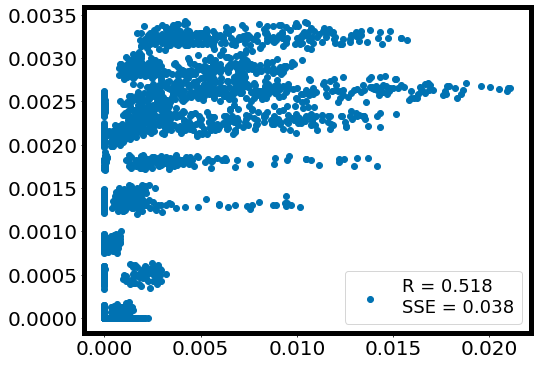

Top 5 profit predictions:  [0.0373439  0.03717317 0.03715434 0.03702123 0.0370187 ]
Pure exploitation, returning N max objective experiments
Running trial 17, cycle 2
Epoch: 0, Loss: 384.84032, Residuals: 0.00527, Convergence:   inf
Epoch: 10, Loss: 321.38022, Residuals: -0.00181, Convergence: 0.018254
Epoch: 20, Loss: 268.15491, Residuals: -0.00772, Convergence: 0.018256
Epoch: 30, Loss: 223.94852, Residuals: -0.01254, Convergence: 0.018090
Epoch: 40, Loss: 187.47084, Residuals: -0.01642, Convergence: 0.017799
Epoch: 50, Loss: 157.44345, Residuals: -0.01959, Convergence: 0.017441
Epoch: 60, Loss: 132.74402, Residuals: -0.02222, Convergence: 0.017012
Epoch: 70, Loss: 112.43421, Residuals: -0.02438, Convergence: 0.016524
Epoch: 80, Loss: 95.72845, Residuals: -0.02616, Convergence: 0.015964
Epoch: 90, Loss: 82.04970, Residuals: -0.02726, Convergence: 0.015268
Epoch: 100, Loss: 70.87844, Residuals: -0.02772, Convergence: 0.014320
Epoch: 110, Loss: 61.60188, Residuals: -0.02826, Convergenc


Epoch: 876, Evidence: 552.74792, Convergence: 0.004025
Epoch: 880, Loss: 114.63352, Residuals: 0.00751, Convergence: 0.001127

Epoch: 881, Evidence: 553.23651, Convergence: 0.000883

Epoch: 883, Evidence: 554.93488, Convergence: 0.003941
Epoch: 890, Loss: 113.93729, Residuals: 0.00463, Convergence: 0.004382

Epoch: 893, Evidence: 553.62231, Convergence: -0.002371
Epoch: 900, Loss: 116.36525, Residuals: 0.00676, Convergence: 0.002045

Epoch: 902, Evidence: 556.03717, Convergence: 0.001982
Epoch: 910, Loss: 115.38725, Residuals: 0.00658, Convergence: 0.001930

Epoch: 913, Evidence: 556.70691, Convergence: 0.001203

Epoch: 918, Evidence: 556.50806, Convergence: -0.000357
Epoch: 920, Loss: 115.88324, Residuals: 0.00600, Convergence: 0.002771

Epoch: 927, Evidence: 553.94452, Convergence: -0.004987
Epoch: 930, Loss: 118.27940, Residuals: 0.00678, Convergence: 0.000954

Epoch: 930, Evidence: 562.88635, Convergence: 0.010978
Epoch: 930, Loss: 119.39406, Residuals: 0.00678, Convergence:   inf

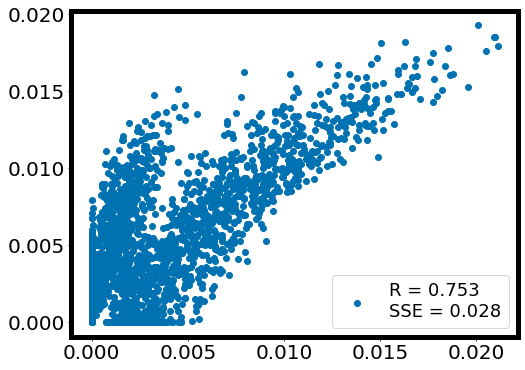

Top 5 profit predictions:  [0.20950603 0.20418671 0.20103683 0.19757476 0.19631608]
Pure exploitation, returning N max objective experiments
Running trial 17, cycle 3
Epoch: 0, Loss: 418.82878, Residuals: -0.06447, Convergence:   inf
Epoch: 10, Loss: 353.21902, Residuals: -0.06128, Convergence: 0.017294
Epoch: 20, Loss: 297.08633, Residuals: -0.05845, Convergence: 0.017541
Epoch: 30, Loss: 249.73976, Residuals: -0.05628, Convergence: 0.017446
Epoch: 40, Loss: 210.39876, Residuals: -0.05506, Convergence: 0.017204
Epoch: 50, Loss: 177.68265, Residuals: -0.05424, Convergence: 0.016890
Epoch: 60, Loss: 150.55746, Residuals: -0.05328, Convergence: 0.016185
Epoch: 70, Loss: 127.91817, Residuals: -0.05199, Convergence: 0.016320
Epoch: 80, Loss: 109.33018, Residuals: -0.04995, Convergence: 0.015761
Epoch: 90, Loss: 93.86933, Residuals: -0.04734, Convergence: 0.014958
Epoch: 100, Loss: 81.07184, Residuals: -0.04451, Convergence: 0.014381
Epoch: 110, Loss: 70.35055, Residuals: -0.04177, Converge


Epoch: 979, Evidence: 836.94080, Convergence: -0.008188
Epoch: 980, Loss: 166.25577, Residuals: -0.00297, Convergence: 0.001261

Epoch: 984, Evidence: 863.49213, Convergence: 0.022812
Epoch: 990, Loss: 170.35309, Residuals: -0.00307, Convergence: 0.001039

Epoch: 993, Evidence: 870.35791, Convergence: 0.007888
Epoch: 1000, Loss: 173.37802, Residuals: -0.00315, Convergence: 0.001086

Epoch: 1009, Evidence: 868.53503, Convergence: -0.002099
Epoch: 1010, Loss: 176.53180, Residuals: -0.00307, Convergence: 0.000699

Epoch: 1010, Evidence: 875.10150, Convergence: 0.005421
Epoch: 1010, Loss: 179.67657, Residuals: -0.00307, Convergence:   inf

Epoch: 1011, Evidence: 876.43860, Convergence: 0.001526

Epoch: 1012, Evidence: 878.16327, Convergence: 0.001964

Epoch: 1013, Evidence: 881.38354, Convergence: 0.003654

Epoch: 1014, Evidence: 879.45148, Convergence: -0.002197


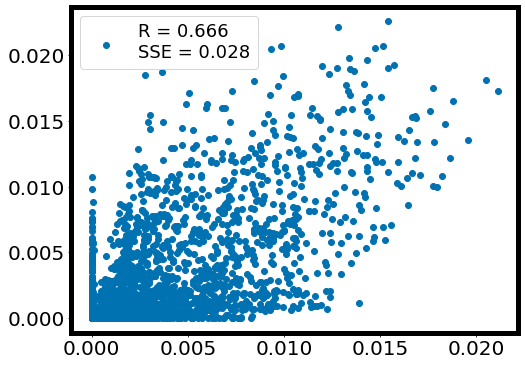

Top 5 profit predictions:  [0.24883975 0.24065843 0.22821844 0.22586693 0.22519358]
Pure exploitation, returning N max objective experiments
Running trial 17, cycle 4
Epoch: 0, Loss: 568.73589, Residuals: -0.18716, Convergence:   inf
Epoch: 10, Loss: 478.58896, Residuals: -0.17182, Convergence: 0.017428
Epoch: 20, Loss: 401.91351, Residuals: -0.15780, Convergence: 0.017723
Epoch: 30, Loss: 337.28757, Residuals: -0.14531, Convergence: 0.017658
Epoch: 40, Loss: 283.46469, Residuals: -0.13438, Convergence: 0.017235
Epoch: 50, Loss: 239.18196, Residuals: -0.12421, Convergence: 0.017064
Epoch: 60, Loss: 202.23822, Residuals: -0.11481, Convergence: 0.016919
Epoch: 70, Loss: 171.47212, Residuals: -0.10588, Convergence: 0.016488
Epoch: 80, Loss: 146.24693, Residuals: -0.09719, Convergence: 0.015557
Epoch: 90, Loss: 125.43919, Residuals: -0.08907, Convergence: 0.014685
Epoch: 100, Loss: 107.94089, Residuals: -0.08183, Convergence: 0.014669
Epoch: 110, Loss: 93.39476, Residuals: -0.07523, Conver


Epoch: 919, Evidence: 1211.71948, Convergence: -0.000592
Epoch: 920, Loss: 260.38528, Residuals: -0.00710, Convergence: 0.002559
Epoch: 930, Loss: 254.72511, Residuals: -0.00957, Convergence: 0.001798

Epoch: 938, Evidence: 1201.19775, Convergence: -0.009356
Epoch: 940, Loss: 264.98816, Residuals: -0.00647, Convergence: 0.001692
Epoch: 950, Loss: 260.90088, Residuals: -0.00690, Convergence: 0.001452

Epoch: 952, Evidence: 1214.17798, Convergence: 0.001434
Epoch: 960, Loss: 259.05988, Residuals: -0.00737, Convergence: 0.001401
Epoch: 970, Loss: 255.78810, Residuals: -0.00755, Convergence: 0.001250

Epoch: 972, Evidence: 1209.59766, Convergence: -0.003787


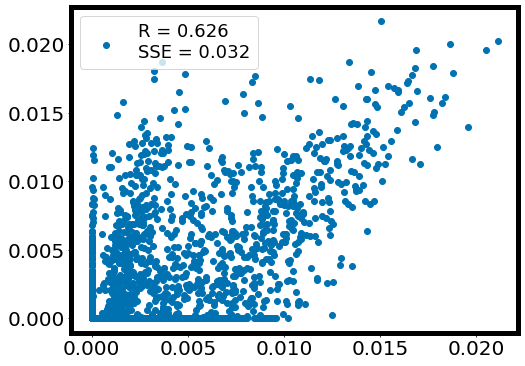

Top 5 profit predictions:  [0.22412007 0.2186012  0.21313666 0.20670702 0.20584159]
Pure exploitation, returning N max objective experiments
Running trial 17, cycle 5
Epoch: 0, Loss: 733.57066, Residuals: -0.21723, Convergence:   inf
Epoch: 10, Loss: 615.92847, Residuals: -0.19892, Convergence: 0.017739
Epoch: 20, Loss: 515.29260, Residuals: -0.18237, Convergence: 0.018100
Epoch: 30, Loss: 430.56760, Residuals: -0.16811, Convergence: 0.018138
Epoch: 40, Loss: 360.57941, Residuals: -0.15542, Convergence: 0.017665
Epoch: 50, Loss: 302.77008, Residuals: -0.14316, Convergence: 0.017741
Epoch: 60, Loss: 254.68741, Residuals: -0.13168, Convergence: 0.017115
Epoch: 70, Loss: 215.54092, Residuals: -0.12033, Convergence: 0.016461
Epoch: 80, Loss: 183.35461, Residuals: -0.10984, Convergence: 0.016043
Epoch: 90, Loss: 156.73035, Residuals: -0.10028, Convergence: 0.015529
Epoch: 100, Loss: 134.81473, Residuals: -0.09155, Convergence: 0.014534
Epoch: 110, Loss: 116.88052, Residuals: -0.08341, Conve

Epoch: 950, Loss: 330.64590, Residuals: -0.01038, Convergence: 0.001295
Epoch: 960, Loss: 326.69507, Residuals: -0.01088, Convergence: 0.001212

Epoch: 961, Evidence: 1656.93262, Convergence: 0.005113
Epoch: 970, Loss: 326.49893, Residuals: -0.01153, Convergence: 0.001196

Epoch: 971, Evidence: 1654.13623, Convergence: -0.001691

Epoch: 972, Evidence: 1660.29028, Convergence: 0.002022

Epoch: 973, Evidence: 1660.17920, Convergence: -0.000067
Epoch: 980, Loss: 331.04300, Residuals: -0.01152, Convergence: 0.001151

Epoch: 987, Evidence: 1658.48340, Convergence: -0.001089


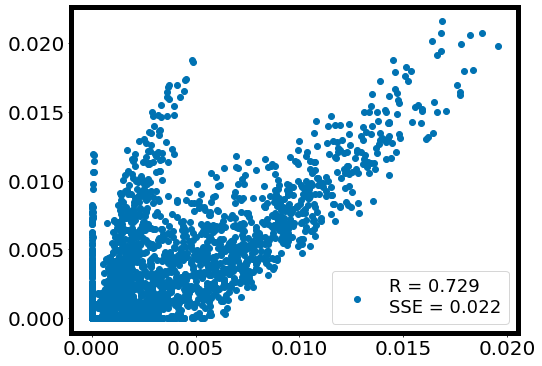

Top 5 profit predictions:  [0.23815307 0.22880033 0.22570628 0.2228779  0.21846959]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 599.65862, Residuals: -0.27507, Convergence:   inf
Epoch: 10, Loss: 506.57236, Residuals: -0.25069, Convergence: 0.017202
Epoch: 20, Loss: 426.26382, Residuals: -0.22879, Convergence: 0.017501
Epoch: 30, Loss: 358.40851, Residuals: -0.20966, Convergence: 0.017452
Epoch: 40, Loss: 302.26486, Residuals: -0.19216, Convergence: 0.017145
Epoch: 50, Loss: 255.41090, Residuals: -0.17596, Convergence: 0.016767
Epoch: 60, Loss: 216.91278, Residuals: -0.16027, Convergence: 0.016345
Epoch: 70, Loss: 185.42886, Residuals: -0.14572, Convergence: 0.014819
Epoch: 80, Loss: 159.15990, Residuals: -0.13255, Convergence: 0.015281
Epoch: 90, Loss: 137.49290, Residuals: -0.12053, Convergence: 0.014678
Epoch: 100, Loss: 119.65015, Residuals: -0.10960, Convergence: 0.013726
Epoch: 110, Loss: 104.76172, Residuals: -0.09966, Convergence: 0.012976
Epoch: 12

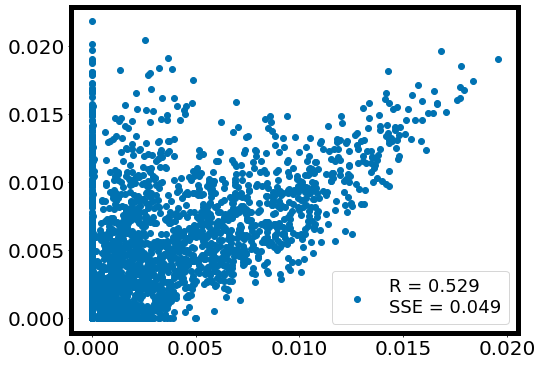

Running trial 18, cycle 1
Epoch: 0, Loss: 106.41031, Residuals: -0.60989, Convergence:   inf
Epoch: 10, Loss: 90.57183, Residuals: -0.56197, Convergence: 0.016449
Epoch: 20, Loss: 76.86115, Residuals: -0.51938, Convergence: 0.016583
Epoch: 30, Loss: 65.21251, Residuals: -0.48126, Convergence: 0.016551
Epoch: 40, Loss: 55.36113, Residuals: -0.44674, Convergence: 0.016476
Epoch: 50, Loss: 47.03918, Residuals: -0.41535, Convergence: 0.016367
Epoch: 60, Loss: 40.06770, Residuals: -0.38626, Convergence: 0.016119
Epoch: 70, Loss: 34.19198, Residuals: -0.35964, Convergence: 0.015758
Epoch: 80, Loss: 29.28347, Residuals: -0.33530, Convergence: 0.015471
Epoch: 90, Loss: 25.17641, Residuals: -0.31300, Convergence: 0.015150
Epoch: 100, Loss: 21.72262, Residuals: -0.29295, Convergence: 0.014931
Epoch: 110, Loss: 18.84141, Residuals: -0.27475, Convergence: 0.014233
Epoch: 120, Loss: 16.47964, Residuals: -0.25808, Convergence: 0.013689
Epoch: 130, Loss: 14.51859, Residuals: -0.24305, Convergence: 0.

Epoch: 850, Loss: 45.65701, Residuals: 0.00203, Convergence: 0.002876

Epoch: 859, Evidence: 226.71552, Convergence: 0.008029
Epoch: 860, Loss: 46.37153, Residuals: 0.00265, Convergence: 0.002748
Epoch: 870, Loss: 45.21502, Residuals: 0.00280, Convergence: 0.003059

Epoch: 877, Evidence: 227.08733, Convergence: 0.001637
Epoch: 880, Loss: 45.82997, Residuals: 0.00306, Convergence: 0.002244

Epoch: 881, Evidence: 230.25729, Convergence: 0.013767
Epoch: 890, Loss: 46.33488, Residuals: 0.00318, Convergence: 0.003045

Epoch: 896, Evidence: 230.51115, Convergence: 0.001101
Epoch: 900, Loss: 46.76138, Residuals: 0.00314, Convergence: 0.002339

Epoch: 902, Evidence: 231.72501, Convergence: 0.005238
Epoch: 910, Loss: 47.07015, Residuals: 0.00323, Convergence: 0.002857

Epoch: 915, Evidence: 232.63904, Convergence: 0.003929
Epoch: 920, Loss: 47.36772, Residuals: 0.00312, Convergence: 0.002796
Epoch: 930, Loss: 46.22536, Residuals: 0.00315, Convergence: 0.002676

Epoch: 934, Evidence: 232.02774, 

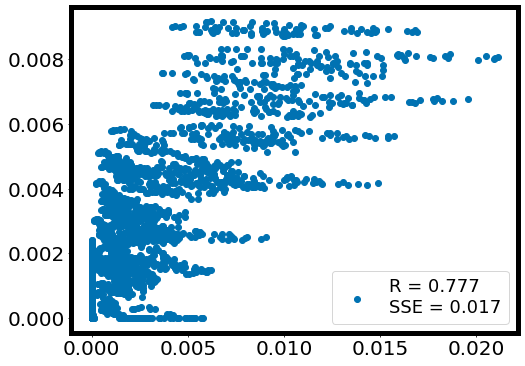

Top 5 profit predictions:  [0.09734501 0.09730297 0.09675598 0.09668143 0.09628057]
Pure exploitation, returning N max objective experiments
Running trial 18, cycle 2
Epoch: 0, Loss: 221.05531, Residuals: -0.54430, Convergence:   inf
Epoch: 10, Loss: 187.69772, Residuals: -0.49738, Convergence: 0.016751
Epoch: 20, Loss: 158.81233, Residuals: -0.45573, Convergence: 0.016896
Epoch: 30, Loss: 134.32082, Residuals: -0.41871, Convergence: 0.016867
Epoch: 40, Loss: 113.71218, Residuals: -0.38537, Convergence: 0.016726
Epoch: 50, Loss: 96.43705, Residuals: -0.35494, Convergence: 0.016503
Epoch: 60, Loss: 82.03585, Residuals: -0.32671, Convergence: 0.016193
Epoch: 70, Loss: 70.01745, Residuals: -0.30107, Convergence: 0.015869
Epoch: 80, Loss: 59.98508, Residuals: -0.27778, Convergence: 0.015476
Epoch: 90, Loss: 51.67174, Residuals: -0.25640, Convergence: 0.014950
Epoch: 100, Loss: 44.83923, Residuals: -0.23651, Convergence: 0.014180
Epoch: 110, Loss: 39.15426, Residuals: -0.21832, Convergence:

Epoch: 950, Loss: 90.96233, Residuals: -0.00631, Convergence: 0.000910

Epoch: 950, Evidence: 507.07233, Convergence: 0.002591
Epoch: 950, Loss: 96.07645, Residuals: -0.00631, Convergence:   inf
Epoch: 960, Loss: 94.41691, Residuals: -0.00657, Convergence: 0.001532
Epoch: 970, Loss: 92.95776, Residuals: -0.00674, Convergence: 0.001673
Epoch: 980, Loss: 91.59203, Residuals: -0.00689, Convergence: 0.001487
Epoch: 990, Loss: 90.41278, Residuals: -0.00689, Convergence: 0.001443

Epoch: 994, Evidence: 506.56329, Convergence: -0.001005

Epoch: 997, Evidence: 520.04803, Convergence: 0.024951
Epoch: 1000, Loss: 103.00230, Residuals: -0.00630, Convergence: 0.000943

Epoch: 1000, Evidence: 522.39441, Convergence: 0.004492
Epoch: 1000, Loss: 106.59112, Residuals: -0.00630, Convergence:   inf

Epoch: 1005, Evidence: 525.10669, Convergence: 0.005165
Epoch: 1010, Loss: 108.36964, Residuals: -0.00633, Convergence: 0.001153

Epoch: 1018, Evidence: 526.61072, Convergence: 0.002856
Epoch: 1020, Loss: 10

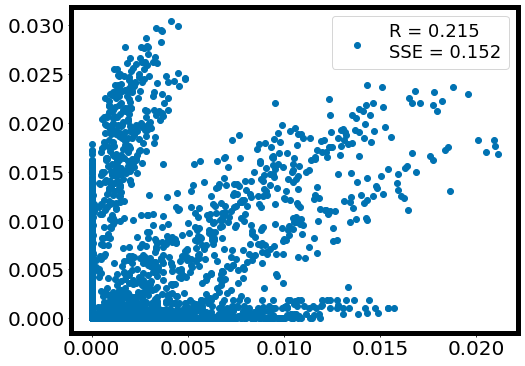

Top 5 profit predictions:  [0.33524722 0.32510427 0.32348222 0.32048595 0.3181187 ]
Pure exploitation, returning N max objective experiments
Running trial 18, cycle 3
Epoch: 0, Loss: 260.49577, Residuals: -0.34139, Convergence:   inf
Epoch: 10, Loss: 222.79680, Residuals: -0.31148, Convergence: 0.015999
Epoch: 20, Loss: 189.79868, Residuals: -0.28444, Convergence: 0.016293
Epoch: 30, Loss: 161.21175, Residuals: -0.26012, Convergence: 0.016590
Epoch: 40, Loss: 136.68762, Residuals: -0.23812, Convergence: 0.016628
Epoch: 50, Loss: 116.07632, Residuals: -0.21785, Convergence: 0.016330
Epoch: 60, Loss: 98.99355, Residuals: -0.19946, Convergence: 0.015830
Epoch: 70, Loss: 84.83418, Residuals: -0.18299, Convergence: 0.015338
Epoch: 80, Loss: 73.24316, Residuals: -0.16788, Convergence: 0.014523
Epoch: 90, Loss: 63.63696, Residuals: -0.15417, Convergence: 0.013682
Epoch: 100, Loss: 55.67022, Residuals: -0.14168, Convergence: 0.012600
Epoch: 110, Loss: 49.15375, Residuals: -0.13035, Convergence

Epoch: 980, Loss: 150.53696, Residuals: -0.01640, Convergence: 0.001434

Epoch: 985, Evidence: 859.09570, Convergence: -0.030966
Epoch: 990, Loss: 163.86292, Residuals: -0.01447, Convergence: 0.002347
Epoch: 1000, Loss: 160.50925, Residuals: -0.01506, Convergence: 0.001781
Epoch: 1010, Loss: 157.69745, Residuals: -0.01511, Convergence: 0.002079
Epoch: 1020, Loss: 155.36078, Residuals: -0.01472, Convergence: 0.000965

Epoch: 1020, Evidence: 881.02203, Convergence: -0.005308
Epoch: 1020, Loss: 168.20107, Residuals: -0.01387, Convergence:   inf
Epoch: 1030, Loss: 165.48059, Residuals: -0.01383, Convergence: 0.001521
Epoch: 1040, Loss: 163.28343, Residuals: -0.01368, Convergence: 0.001280
Epoch: 1050, Loss: 161.28210, Residuals: -0.01347, Convergence: 0.001385

Epoch: 1053, Evidence: 895.22144, Convergence: 0.010638
Epoch: 1060, Loss: 164.59660, Residuals: -0.01335, Convergence: 0.001340
Epoch: 1070, Loss: 162.56247, Residuals: -0.01323, Convergence: 0.000928

Epoch: 1070, Evidence: 896.88

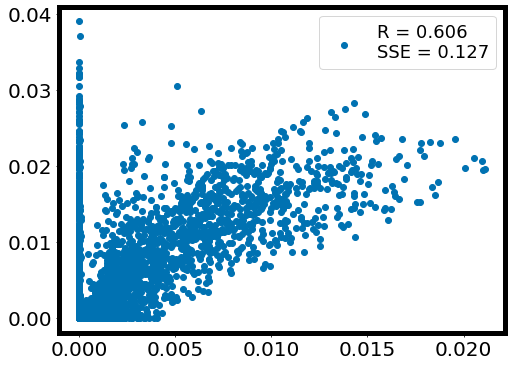

Top 5 profit predictions:  [0.42397073 0.402866   0.35697067 0.35600415 0.34834346]
Pure exploitation, returning N max objective experiments
Running trial 18, cycle 4
Epoch: 0, Loss: 355.50731, Residuals: -0.18860, Convergence:   inf
Epoch: 10, Loss: 302.70789, Residuals: -0.17311, Convergence: 0.016383
Epoch: 20, Loss: 257.06461, Residuals: -0.15879, Convergence: 0.016555
Epoch: 30, Loss: 218.09402, Residuals: -0.14565, Convergence: 0.016493
Epoch: 40, Loss: 185.40924, Residuals: -0.13314, Convergence: 0.016265
Epoch: 50, Loss: 158.06113, Residuals: -0.12148, Convergence: 0.016025
Epoch: 60, Loss: 135.05899, Residuals: -0.11123, Convergence: 0.015515
Epoch: 70, Loss: 115.95337, Residuals: -0.10200, Convergence: 0.015272
Epoch: 80, Loss: 99.94309, Residuals: -0.09368, Convergence: 0.014816
Epoch: 90, Loss: 86.73898, Residuals: -0.08570, Convergence: 0.013693
Epoch: 100, Loss: 75.67211, Residuals: -0.07866, Convergence: 0.013584
Epoch: 110, Loss: 66.52209, Residuals: -0.07217, Convergen

Epoch: 930, Loss: 237.89139, Residuals: -0.01089, Convergence: 0.001079

Epoch: 931, Evidence: 1259.22241, Convergence: -0.000908
Epoch: 940, Loss: 236.10870, Residuals: -0.01179, Convergence: 0.001835

Epoch: 941, Evidence: 1255.12793, Convergence: -0.004173


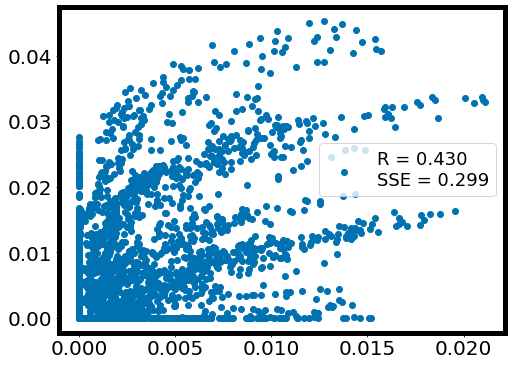

Top 5 profit predictions:  [0.49571782 0.49196157 0.48713383 0.47757456 0.47724032]
Pure exploitation, returning N max objective experiments
Running trial 18, cycle 5
Epoch: 0, Loss: 436.17775, Residuals: -0.20965, Convergence:   inf
Epoch: 10, Loss: 370.90793, Residuals: -0.19190, Convergence: 0.016538
Epoch: 20, Loss: 314.27365, Residuals: -0.17595, Convergence: 0.016837
Epoch: 30, Loss: 265.72171, Residuals: -0.16143, Convergence: 0.016938
Epoch: 40, Loss: 224.79648, Residuals: -0.14802, Convergence: 0.016759
Epoch: 50, Loss: 191.13342, Residuals: -0.13510, Convergence: 0.016247
Epoch: 60, Loss: 163.32858, Residuals: -0.12317, Convergence: 0.015431
Epoch: 70, Loss: 140.13811, Residuals: -0.11220, Convergence: 0.015286
Epoch: 80, Loss: 120.68157, Residuals: -0.10215, Convergence: 0.014857
Epoch: 90, Loss: 104.52267, Residuals: -0.09297, Convergence: 0.014204
Epoch: 100, Loss: 90.84212, Residuals: -0.08467, Convergence: 0.013857
Epoch: 110, Loss: 79.37466, Residuals: -0.07716, Converg

Epoch: 930, Loss: 311.64264, Residuals: -0.00469, Convergence: 0.001625
Epoch: 940, Loss: 307.64673, Residuals: -0.00443, Convergence: 0.001070

Epoch: 942, Evidence: 1631.97070, Convergence: -0.008582
Epoch: 950, Loss: 322.62317, Residuals: -0.00429, Convergence: 0.001281
Epoch: 960, Loss: 318.80386, Residuals: -0.00430, Convergence: 0.001064

Epoch: 963, Evidence: 1649.97058, Convergence: 0.002421
Epoch: 970, Loss: 319.11340, Residuals: -0.00436, Convergence: 0.001164
Epoch: 980, Loss: 315.67999, Residuals: -0.00430, Convergence: 0.000982

Epoch: 980, Evidence: 1646.32031, Convergence: -0.002217
Epoch: 980, Loss: 323.61319, Residuals: -0.00427, Convergence:   inf

Epoch: 981, Evidence: 1655.14478, Convergence: 0.003126

Epoch: 982, Evidence: 1656.41431, Convergence: 0.000766
Epoch: 990, Loss: 322.76645, Residuals: -0.00439, Convergence: 0.001266
Epoch: 1000, Loss: 319.12833, Residuals: -0.00426, Convergence: 0.001047

Epoch: 1002, Evidence: 1648.66772, Convergence: -0.003929


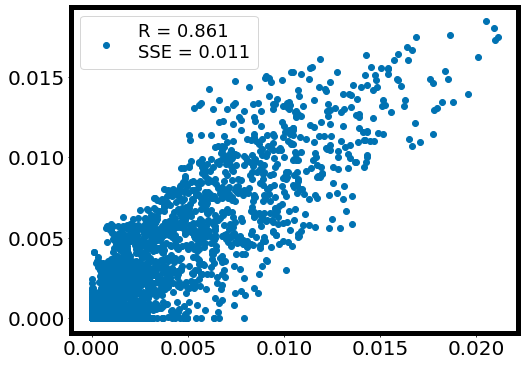

Top 5 profit predictions:  [0.200652   0.19935171 0.1890498  0.18823352 0.18450443]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 446.37306, Residuals: -0.25821, Convergence:   inf
Epoch: 10, Loss: 382.27475, Residuals: -0.23483, Convergence: 0.015976
Epoch: 20, Loss: 325.54102, Residuals: -0.21374, Convergence: 0.016330
Epoch: 30, Loss: 276.92618, Residuals: -0.19431, Convergence: 0.016151
Epoch: 40, Loss: 236.13000, Residuals: -0.17646, Convergence: 0.015820
Epoch: 50, Loss: 201.61229, Residuals: -0.16036, Convergence: 0.015966
Epoch: 60, Loss: 172.54878, Residuals: -0.14593, Convergence: 0.015548
Epoch: 70, Loss: 148.19991, Residuals: -0.13310, Convergence: 0.015159
Epoch: 80, Loss: 127.94572, Residuals: -0.12140, Convergence: 0.014518
Epoch: 90, Loss: 111.00365, Residuals: -0.11079, Convergence: 0.014042
Epoch: 100, Loss: 96.87500, Residuals: -0.10126, Convergence: 0.013438
Epoch: 110, Loss: 85.07419, Residuals: -0.09263, Convergence: 0.012747
Epoch: 120,


Epoch: 884, Evidence: 2074.67871, Convergence: -0.000666
Epoch: 890, Loss: 400.68225, Residuals: -0.01603, Convergence: 0.001539

Epoch: 898, Evidence: 2068.61890, Convergence: -0.003597


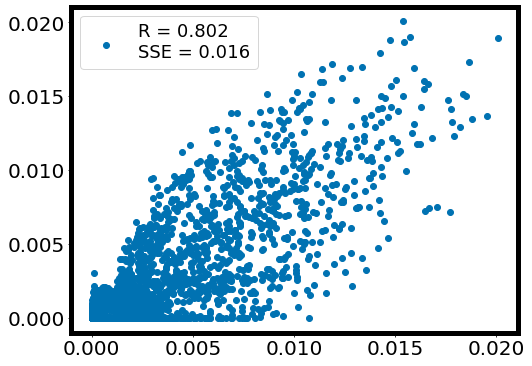

Running trial 19, cycle 1
Epoch: 0, Loss: 155.34532, Residuals: -0.83798, Convergence:   inf
Epoch: 10, Loss: 130.90843, Residuals: -0.77697, Convergence: 0.017323
Epoch: 20, Loss: 110.26941, Residuals: -0.72154, Convergence: 0.017258
Epoch: 30, Loss: 93.01219, Residuals: -0.67099, Convergence: 0.017083
Epoch: 40, Loss: 78.60098, Residuals: -0.62470, Convergence: 0.016945
Epoch: 50, Loss: 66.56039, Residuals: -0.58218, Convergence: 0.016607
Epoch: 60, Loss: 56.58175, Residuals: -0.54316, Convergence: 0.016175
Epoch: 70, Loss: 48.31459, Residuals: -0.50737, Convergence: 0.015680
Epoch: 80, Loss: 41.53054, Residuals: -0.47434, Convergence: 0.014856
Epoch: 90, Loss: 35.93842, Residuals: -0.44308, Convergence: 0.014443
Epoch: 100, Loss: 31.24431, Residuals: -0.41427, Convergence: 0.013855
Epoch: 110, Loss: 27.22092, Residuals: -0.38823, Convergence: 0.013646
Epoch: 120, Loss: 23.77197, Residuals: -0.36453, Convergence: 0.013587
Epoch: 130, Loss: 20.86367, Residuals: -0.34276, Convergence: 

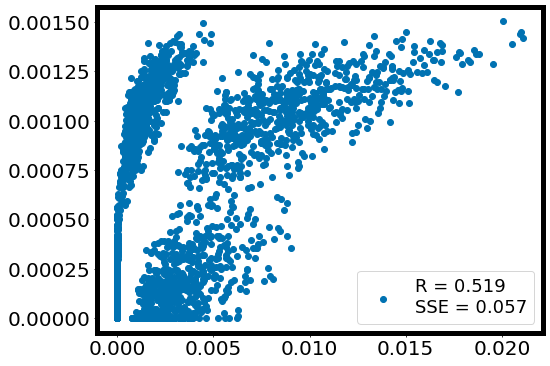

Top 5 profit predictions:  [0.01632665 0.01624694 0.01586619 0.01585124 0.01572069]
Pure exploitation, returning N max objective experiments
Running trial 19, cycle 2
Epoch: 0, Loss: 162.41524, Residuals: -0.62775, Convergence:   inf
Epoch: 10, Loss: 140.26814, Residuals: -0.57544, Convergence: 0.014917
Epoch: 20, Loss: 120.89385, Residuals: -0.52779, Convergence: 0.015042
Epoch: 30, Loss: 103.98715, Residuals: -0.48446, Convergence: 0.015270
Epoch: 40, Loss: 89.39402, Residuals: -0.44499, Convergence: 0.015152
Epoch: 50, Loss: 77.01572, Residuals: -0.40907, Convergence: 0.014885
Epoch: 60, Loss: 66.64850, Residuals: -0.37590, Convergence: 0.014408
Epoch: 70, Loss: 57.95405, Residuals: -0.34557, Convergence: 0.013866
Epoch: 80, Loss: 50.68646, Residuals: -0.31770, Convergence: 0.013207
Epoch: 90, Loss: 44.62516, Residuals: -0.29211, Convergence: 0.012661
Epoch: 100, Loss: 39.51414, Residuals: -0.26891, Convergence: 0.011731
Epoch: 110, Loss: 35.28910, Residuals: -0.24767, Convergence: 

Epoch: 850, Loss: 110.42176, Residuals: 0.00162, Convergence: 0.001228

Epoch: 853, Evidence: 536.46411, Convergence: -0.002789
Epoch: 860, Loss: 114.06396, Residuals: 0.00144, Convergence: 0.001474

Epoch: 865, Evidence: 540.76923, Convergence: 0.005194
Epoch: 870, Loss: 114.48351, Residuals: 0.00151, Convergence: 0.001105

Epoch: 873, Evidence: 543.61823, Convergence: 0.005241

Epoch: 877, Evidence: 543.61346, Convergence: -0.000009
Epoch: 880, Loss: 115.43639, Residuals: 0.00167, Convergence: 0.003652
Epoch: 890, Loss: 112.15253, Residuals: 0.00187, Convergence: 0.002160

Epoch: 898, Evidence: 540.50513, Convergence: -0.005760
Epoch: 900, Loss: 118.04977, Residuals: 0.00154, Convergence: 0.002528
Epoch: 910, Loss: 115.92641, Residuals: 0.00163, Convergence: 0.001012

Epoch: 917, Evidence: 545.41736, Convergence: 0.003299
Epoch: 920, Loss: 115.65565, Residuals: 0.00168, Convergence: 0.002018
Epoch: 930, Loss: 113.76854, Residuals: 0.00174, Convergence: 0.001362

Epoch: 935, Evidence:

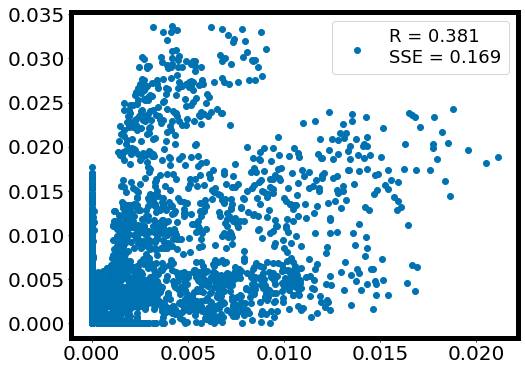

Top 5 profit predictions:  [0.37084997 0.36764595 0.36669758 0.3654066  0.36473435]
Pure exploitation, returning N max objective experiments
Running trial 19, cycle 3
Epoch: 0, Loss: 257.90660, Residuals: -0.45168, Convergence:   inf
Epoch: 10, Loss: 220.78427, Residuals: -0.41478, Convergence: 0.015746
Epoch: 20, Loss: 188.83171, Residuals: -0.38101, Convergence: 0.015774
Epoch: 30, Loss: 161.44360, Residuals: -0.35030, Convergence: 0.015791
Epoch: 40, Loss: 138.13731, Residuals: -0.32234, Convergence: 0.015615
Epoch: 50, Loss: 118.54078, Residuals: -0.29694, Convergence: 0.015229
Epoch: 60, Loss: 102.36855, Residuals: -0.27333, Convergence: 0.014637
Epoch: 70, Loss: 88.87959, Residuals: -0.25128, Convergence: 0.013797
Epoch: 80, Loss: 77.41362, Residuals: -0.23091, Convergence: 0.013373
Epoch: 90, Loss: 67.34568, Residuals: -0.21216, Convergence: 0.013934
Epoch: 100, Loss: 58.83453, Residuals: -0.19483, Convergence: 0.013558
Epoch: 110, Loss: 51.66782, Residuals: -0.17899, Convergenc

Epoch: 910, Loss: 183.68875, Residuals: -0.01011, Convergence: 0.001272
Epoch: 920, Loss: 181.49159, Residuals: -0.01012, Convergence: 0.001075

Epoch: 925, Evidence: 878.68219, Convergence: 0.002022
Epoch: 930, Loss: 182.87407, Residuals: -0.01024, Convergence: 0.001293
Epoch: 940, Loss: 180.52759, Residuals: -0.01042, Convergence: 0.001272

Epoch: 947, Evidence: 878.13104, Convergence: -0.000628
Epoch: 950, Loss: 180.17886, Residuals: -0.01099, Convergence: 0.002318
Epoch: 960, Loss: 176.41422, Residuals: -0.01236, Convergence: 0.002009
Epoch: 970, Loss: 173.26451, Residuals: -0.01331, Convergence: 0.001351
Epoch: 980, Loss: 170.46286, Residuals: -0.01357, Convergence: 0.001636

Epoch: 986, Evidence: 867.21777, Convergence: -0.013220


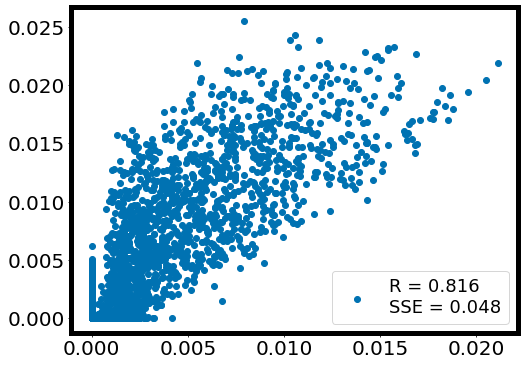

Top 5 profit predictions:  [0.2556916  0.253105   0.24903885 0.24375896 0.24140325]
Pure exploitation, returning N max objective experiments
Running trial 19, cycle 4
Epoch: 0, Loss: 275.58467, Residuals: -0.40956, Convergence:   inf
Epoch: 10, Loss: 238.07848, Residuals: -0.37445, Convergence: 0.014989
Epoch: 20, Loss: 204.61685, Residuals: -0.34249, Convergence: 0.015406
Epoch: 30, Loss: 175.55946, Residuals: -0.31344, Convergence: 0.015408
Epoch: 40, Loss: 150.89349, Residuals: -0.28677, Convergence: 0.015088
Epoch: 50, Loss: 130.23213, Residuals: -0.26249, Convergence: 0.014538
Epoch: 60, Loss: 113.07027, Residuals: -0.24039, Convergence: 0.013983
Epoch: 70, Loss: 98.36102, Residuals: -0.21991, Convergence: 0.014237
Epoch: 80, Loss: 85.65102, Residuals: -0.20073, Convergence: 0.013879
Epoch: 90, Loss: 74.88042, Residuals: -0.18293, Convergence: 0.013687
Epoch: 100, Loss: 65.68847, Residuals: -0.16674, Convergence: 0.012303
Epoch: 110, Loss: 57.87978, Residuals: -0.15212, Convergenc


Epoch: 931, Evidence: 1249.56006, Convergence: 0.000364
Epoch: 940, Loss: 251.62607, Residuals: -0.02185, Convergence: 0.002309

Epoch: 941, Evidence: 1246.11316, Convergence: -0.002401

Epoch: 944, Evidence: 1252.76160, Convergence: 0.002918

Epoch: 947, Evidence: 1251.78369, Convergence: -0.000781
Epoch: 950, Loss: 256.62750, Residuals: -0.02112, Convergence: 0.002573

Epoch: 958, Evidence: 1247.46790, Convergence: -0.004244


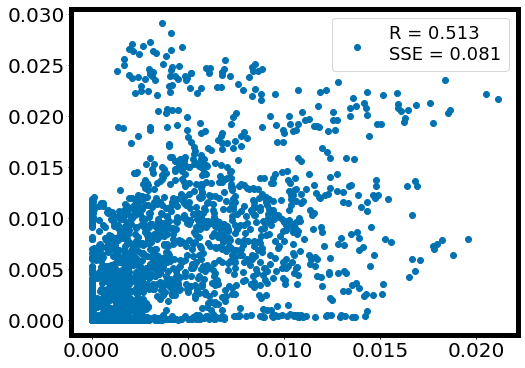

Top 5 profit predictions:  [0.31614614 0.30606258 0.2952345  0.2861905  0.2817428 ]
Pure exploitation, returning N max objective experiments
Running trial 19, cycle 5
Epoch: 0, Loss: 353.07506, Residuals: -0.39384, Convergence:   inf
Epoch: 10, Loss: 304.90637, Residuals: -0.35892, Convergence: 0.015011
Epoch: 20, Loss: 262.00540, Residuals: -0.32705, Convergence: 0.015450
Epoch: 30, Loss: 224.65034, Residuals: -0.29806, Convergence: 0.015438
Epoch: 40, Loss: 193.13533, Residuals: -0.27148, Convergence: 0.015133
Epoch: 50, Loss: 165.66452, Residuals: -0.24693, Convergence: 0.015676
Epoch: 60, Loss: 142.11581, Residuals: -0.22492, Convergence: 0.015329
Epoch: 70, Loss: 122.39528, Residuals: -0.20495, Convergence: 0.014798
Epoch: 80, Loss: 105.95455, Residuals: -0.18672, Convergence: 0.014321
Epoch: 90, Loss: 92.20012, Residuals: -0.17016, Convergence: 0.013754
Epoch: 100, Loss: 80.49792, Residuals: -0.15495, Convergence: 0.013451
Epoch: 110, Loss: 70.59621, Residuals: -0.14086, Converge

Epoch: 950, Loss: 313.37289, Residuals: -0.00844, Convergence: 0.001924
Epoch: 960, Loss: 308.24939, Residuals: -0.00889, Convergence: 0.001575
Epoch: 970, Loss: 304.16187, Residuals: -0.00902, Convergence: 0.001083
Epoch: 980, Loss: 300.73077, Residuals: -0.00887, Convergence: 0.001074

Epoch: 982, Evidence: 1656.19287, Convergence: 0.000677
Epoch: 990, Loss: 299.35358, Residuals: -0.01174, Convergence: 0.001719
Epoch: 1000, Loss: 294.83807, Residuals: -0.01252, Convergence: 0.001603
Epoch: 1010, Loss: 290.94135, Residuals: -0.01190, Convergence: 0.001265

Epoch: 1018, Evidence: 1624.69678, Convergence: -0.018696


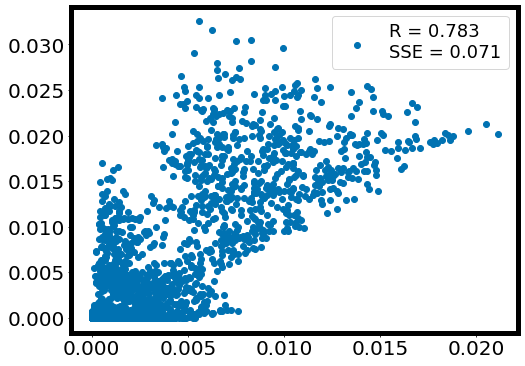

Top 5 profit predictions:  [0.32200566 0.31583577 0.30731776 0.30527332 0.30108252]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 452.13793, Residuals: -0.38453, Convergence:   inf
Epoch: 10, Loss: 388.80695, Residuals: -0.34997, Convergence: 0.015395
Epoch: 20, Loss: 332.98657, Residuals: -0.31851, Convergence: 0.015729
Epoch: 30, Loss: 284.99661, Residuals: -0.28988, Convergence: 0.015420
Epoch: 40, Loss: 245.14822, Residuals: -0.26360, Convergence: 0.015157
Epoch: 50, Loss: 211.56001, Residuals: -0.23947, Convergence: 0.014611
Epoch: 60, Loss: 183.21002, Residuals: -0.21747, Convergence: 0.014288
Epoch: 70, Loss: 159.01305, Residuals: -0.19739, Convergence: 0.014258
Epoch: 80, Loss: 138.40224, Residuals: -0.17924, Convergence: 0.013912
Epoch: 90, Loss: 121.17761, Residuals: -0.16271, Convergence: 0.013315
Epoch: 100, Loss: 106.54868, Residuals: -0.14777, Convergence: 0.012290
Epoch: 110, Loss: 93.84602, Residuals: -0.13425, Convergence: 0.012372
Epoch: 120

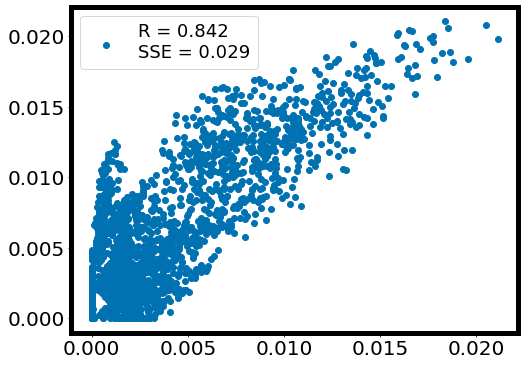

Running trial 20, cycle 1
Epoch: 0, Loss: 116.05398, Residuals: -0.67305, Convergence:   inf
Epoch: 10, Loss: 98.34035, Residuals: -0.62085, Convergence: 0.016816
Epoch: 20, Loss: 83.20352, Residuals: -0.57362, Convergence: 0.016864
Epoch: 30, Loss: 70.39860, Residuals: -0.53060, Convergence: 0.016840
Epoch: 40, Loss: 59.58295, Residuals: -0.49113, Convergence: 0.016802
Epoch: 50, Loss: 50.45650, Residuals: -0.45480, Convergence: 0.016729
Epoch: 60, Loss: 42.78146, Residuals: -0.42099, Convergence: 0.016608
Epoch: 70, Loss: 36.32861, Residuals: -0.39016, Convergence: 0.016421
Epoch: 80, Loss: 30.91852, Residuals: -0.36213, Convergence: 0.016122
Epoch: 90, Loss: 26.39070, Residuals: -0.33663, Convergence: 0.015839
Epoch: 100, Loss: 22.59439, Residuals: -0.31356, Convergence: 0.015492
Epoch: 110, Loss: 19.41636, Residuals: -0.29250, Convergence: 0.015087
Epoch: 120, Loss: 16.75734, Residuals: -0.27305, Convergence: 0.014583
Epoch: 130, Loss: 14.52983, Residuals: -0.25512, Convergence: 0.

Epoch: 860, Loss: 38.52448, Residuals: -0.00066, Convergence: 0.002013

Epoch: 868, Evidence: 250.83340, Convergence: 0.009827
Epoch: 870, Loss: 39.21967, Residuals: -0.00075, Convergence: 0.002604
Epoch: 880, Loss: 38.31545, Residuals: -0.00091, Convergence: 0.002393

Epoch: 889, Evidence: 252.73373, Convergence: 0.007519
Epoch: 890, Loss: 39.13255, Residuals: -0.00097, Convergence: 0.003049
Epoch: 900, Loss: 38.24840, Residuals: -0.00109, Convergence: 0.002618

Epoch: 909, Evidence: 253.35931, Convergence: 0.002469
Epoch: 910, Loss: 39.02238, Residuals: -0.00113, Convergence: 0.003090
Epoch: 920, Loss: 38.13629, Residuals: -0.00120, Convergence: 0.002675
Epoch: 930, Loss: 37.29571, Residuals: -0.00128, Convergence: 0.002387
Epoch: 940, Loss: 36.50165, Residuals: -0.00135, Convergence: 0.002037

Epoch: 944, Evidence: 251.65742, Convergence: -0.006763


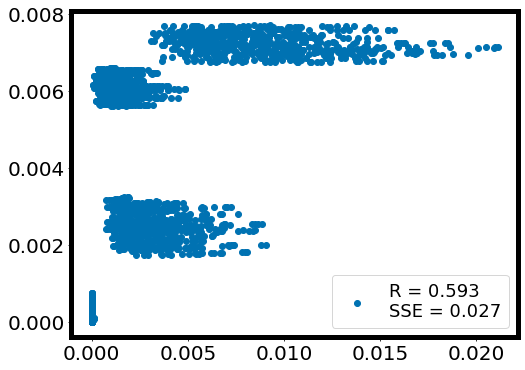

Top 5 profit predictions:  [0.08488443 0.08460641 0.08384468 0.08365211 0.08364738]
Pure exploitation, returning N max objective experiments
Running trial 20, cycle 2
Epoch: 0, Loss: 247.07507, Residuals: -0.61055, Convergence:   inf
Epoch: 10, Loss: 208.98511, Residuals: -0.56060, Convergence: 0.016939
Epoch: 20, Loss: 176.60043, Residuals: -0.51494, Convergence: 0.017011
Epoch: 30, Loss: 149.19395, Residuals: -0.47287, Convergence: 0.016973
Epoch: 40, Loss: 126.21161, Residuals: -0.43408, Convergence: 0.016767
Epoch: 50, Loss: 107.02852, Residuals: -0.39840, Convergence: 0.016473
Epoch: 60, Loss: 90.75694, Residuals: -0.36563, Convergence: 0.016676
Epoch: 70, Loss: 77.04680, Residuals: -0.33577, Convergence: 0.016353
Epoch: 80, Loss: 65.65481, Residuals: -0.30857, Convergence: 0.015937
Epoch: 90, Loss: 56.21170, Residuals: -0.28336, Convergence: 0.015440
Epoch: 100, Loss: 48.39403, Residuals: -0.26018, Convergence: 0.014847
Epoch: 110, Loss: 41.91743, Residuals: -0.23903, Convergence

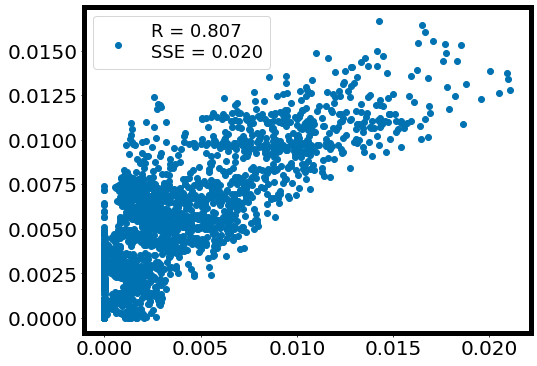

Top 5 profit predictions:  [0.18164629 0.18099836 0.17447144 0.16921198 0.16818358]
Pure exploitation, returning N max objective experiments
Running trial 20, cycle 3
Epoch: 0, Loss: 275.64238, Residuals: -0.48102, Convergence:   inf
Epoch: 10, Loss: 235.75166, Residuals: -0.44091, Convergence: 0.015782
Epoch: 20, Loss: 201.20256, Residuals: -0.40449, Convergence: 0.016131
Epoch: 30, Loss: 171.22667, Residuals: -0.37159, Convergence: 0.016337
Epoch: 40, Loss: 145.62167, Residuals: -0.34172, Convergence: 0.016283
Epoch: 50, Loss: 124.14090, Residuals: -0.31391, Convergence: 0.015709
Epoch: 60, Loss: 106.23606, Residuals: -0.28781, Convergence: 0.015398
Epoch: 70, Loss: 91.22364, Residuals: -0.26370, Convergence: 0.015292
Epoch: 80, Loss: 78.69351, Residuals: -0.24163, Convergence: 0.014847
Epoch: 90, Loss: 68.24519, Residuals: -0.22150, Convergence: 0.014158
Epoch: 100, Loss: 59.49124, Residuals: -0.20299, Convergence: 0.013344
Epoch: 110, Loss: 52.22340, Residuals: -0.18595, Convergenc


Epoch: 912, Evidence: 849.54846, Convergence: 0.003487

Epoch: 914, Evidence: 850.53754, Convergence: 0.001163

Epoch: 916, Evidence: 852.48926, Convergence: 0.002289

Epoch: 917, Evidence: 852.19385, Convergence: -0.000347
Epoch: 920, Loss: 191.58011, Residuals: -0.00480, Convergence: 0.001923
Epoch: 930, Loss: 188.42064, Residuals: -0.00552, Convergence: 0.001701
Epoch: 940, Loss: 185.99353, Residuals: -0.00579, Convergence: 0.001060

Epoch: 942, Evidence: 847.53473, Convergence: -0.005846

Epoch: 943, Evidence: 853.53113, Convergence: 0.001221

Epoch: 945, Evidence: 856.64099, Convergence: 0.003630

Epoch: 946, Evidence: 853.91333, Convergence: -0.003194


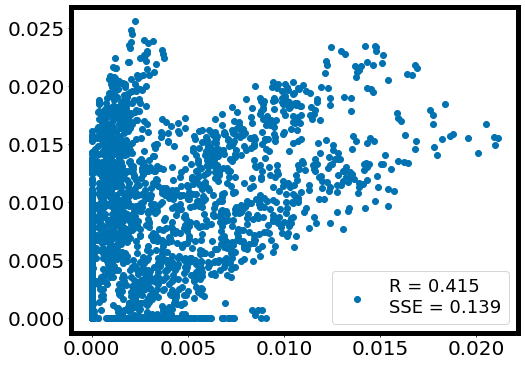

Top 5 profit predictions:  [0.2820278  0.26959172 0.26606092 0.2642517  0.26112908]
Pure exploitation, returning N max objective experiments
Running trial 20, cycle 4
Epoch: 0, Loss: 286.93819, Residuals: -0.11428, Convergence:   inf
Epoch: 10, Loss: 249.73105, Residuals: -0.10709, Convergence: 0.014292
Epoch: 20, Loss: 215.71988, Residuals: -0.10040, Convergence: 0.015061
Epoch: 30, Loss: 185.41039, Residuals: -0.09424, Convergence: 0.015303
Epoch: 40, Loss: 159.45639, Residuals: -0.08841, Convergence: 0.015115
Epoch: 50, Loss: 137.60135, Residuals: -0.08295, Convergence: 0.014677
Epoch: 60, Loss: 119.41557, Residuals: -0.07783, Convergence: 0.013428
Epoch: 70, Loss: 104.24628, Residuals: -0.07270, Convergence: 0.013127
Epoch: 80, Loss: 91.28613, Residuals: -0.06751, Convergence: 0.012785
Epoch: 90, Loss: 80.21822, Residuals: -0.06276, Convergence: 0.013244
Epoch: 100, Loss: 70.88303, Residuals: -0.05830, Convergence: 0.012422
Epoch: 110, Loss: 63.16536, Residuals: -0.05393, Convergen

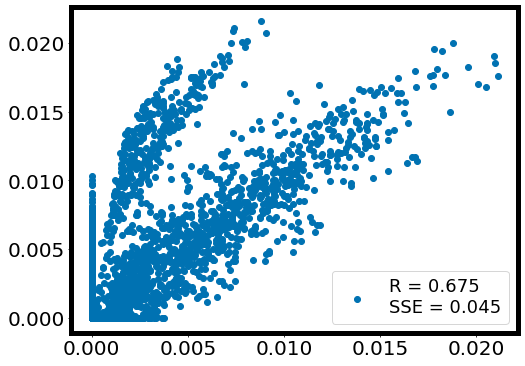

Top 5 profit predictions:  [0.23777159 0.22883813 0.2256714  0.22538875 0.22155504]
Pure exploitation, returning N max objective experiments
Running trial 20, cycle 5
Epoch: 0, Loss: 335.91518, Residuals: -0.04009, Convergence:   inf
Epoch: 10, Loss: 292.50766, Residuals: -0.03906, Convergence: 0.014277
Epoch: 20, Loss: 253.16452, Residuals: -0.03765, Convergence: 0.014705
Epoch: 30, Loss: 218.76573, Residuals: -0.03608, Convergence: 0.014580
Epoch: 40, Loss: 189.41136, Residuals: -0.03453, Convergence: 0.014306
Epoch: 50, Loss: 164.73070, Residuals: -0.03321, Convergence: 0.013970
Epoch: 60, Loss: 144.37741, Residuals: -0.03206, Convergence: 0.012349
Epoch: 70, Loss: 126.27885, Residuals: -0.03071, Convergence: 0.013600
Epoch: 80, Loss: 110.86800, Residuals: -0.02930, Convergence: 0.012521
Epoch: 90, Loss: 98.14570, Residuals: -0.02770, Convergence: 0.012257
Epoch: 100, Loss: 87.56118, Residuals: -0.02612, Convergence: 0.011319
Epoch: 110, Loss: 78.49740, Residuals: -0.02454, Converge

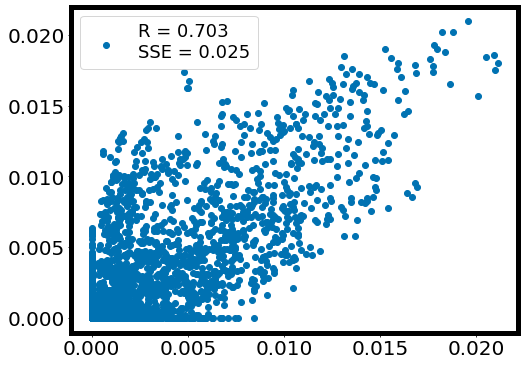

Top 5 profit predictions:  [0.22776777 0.2226009  0.21878754 0.20937061 0.20477945]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 370.85204, Residuals: -0.03650, Convergence:   inf
Epoch: 10, Loss: 322.59091, Residuals: -0.03541, Convergence: 0.014608
Epoch: 20, Loss: 277.69022, Residuals: -0.03397, Convergence: 0.015400
Epoch: 30, Loss: 238.20961, Residuals: -0.03253, Convergence: 0.015401
Epoch: 40, Loss: 204.86633, Residuals: -0.03130, Convergence: 0.015064
Epoch: 50, Loss: 177.08168, Residuals: -0.03025, Convergence: 0.014424
Epoch: 60, Loss: 153.98091, Residuals: -0.02920, Convergence: 0.013843
Epoch: 70, Loss: 134.52933, Residuals: -0.02791, Convergence: 0.013900
Epoch: 80, Loss: 117.97066, Residuals: -0.02651, Convergence: 0.012861
Epoch: 90, Loss: 103.96273, Residuals: -0.02528, Convergence: 0.012518
Epoch: 100, Loss: 92.08146, Residuals: -0.02415, Convergence: 0.012335
Epoch: 110, Loss: 82.11844, Residuals: -0.02307, Convergence: 0.011651
Epoch: 120,


Epoch: 922, Evidence: 1936.86218, Convergence: 0.001255
Epoch: 930, Loss: 404.40536, Residuals: -0.01599, Convergence: 0.001151

Epoch: 935, Evidence: 1935.11816, Convergence: -0.000901
Epoch: 940, Loss: 401.96780, Residuals: -0.01988, Convergence: 0.001619
Epoch: 950, Loss: 396.69223, Residuals: -0.02316, Convergence: 0.001083

Epoch: 955, Evidence: 1921.93799, Convergence: -0.007765


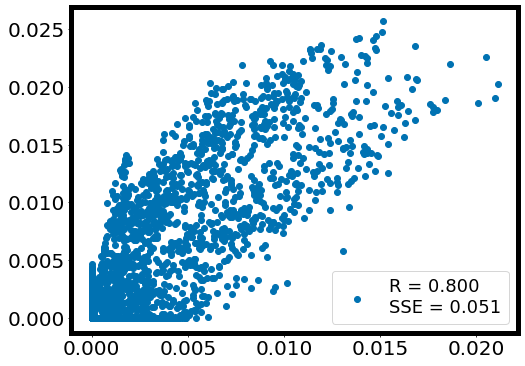

Running trial 21, cycle 1
Epoch: 0, Loss: 96.35804, Residuals: -0.75185, Convergence:   inf
Epoch: 10, Loss: 83.65881, Residuals: -0.69633, Convergence: 0.014493
Epoch: 20, Loss: 72.29457, Residuals: -0.64616, Convergence: 0.014827
Epoch: 30, Loss: 62.36559, Residuals: -0.60073, Convergence: 0.014899
Epoch: 40, Loss: 53.82411, Residuals: -0.55945, Convergence: 0.014756
Epoch: 50, Loss: 46.56256, Residuals: -0.52176, Convergence: 0.014448
Epoch: 60, Loss: 40.42408, Residuals: -0.48718, Convergence: 0.014057
Epoch: 70, Loss: 35.24009, Residuals: -0.45534, Convergence: 0.013620
Epoch: 80, Loss: 30.85762, Residuals: -0.42596, Convergence: 0.013158
Epoch: 90, Loss: 27.15438, Residuals: -0.39887, Convergence: 0.012467
Epoch: 100, Loss: 24.04182, Residuals: -0.37381, Convergence: 0.012200
Epoch: 110, Loss: 21.41905, Residuals: -0.35079, Convergence: 0.011406
Epoch: 120, Loss: 19.22223, Residuals: -0.32946, Convergence: 0.010392
Epoch: 130, Loss: 17.37482, Residuals: -0.30964, Convergence: 0.0

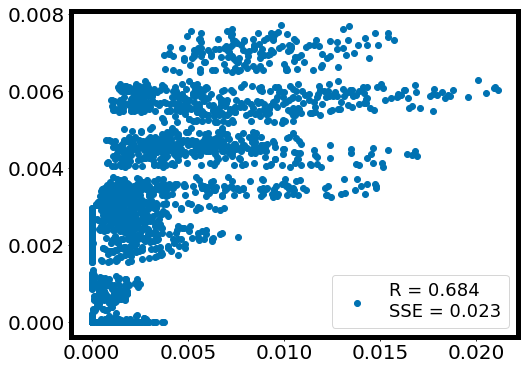

Top 5 profit predictions:  [0.08372879 0.08372064 0.08278319 0.0827076  0.08178879]
Pure exploitation, returning N max objective experiments
Running trial 21, cycle 2
Epoch: 0, Loss: 154.78581, Residuals: -0.74167, Convergence:   inf
Epoch: 10, Loss: 133.00714, Residuals: -0.68049, Convergence: 0.015512
Epoch: 20, Loss: 113.95908, Residuals: -0.62529, Convergence: 0.015612
Epoch: 30, Loss: 97.57871, Residuals: -0.57537, Convergence: 0.015650
Epoch: 40, Loss: 83.56413, Residuals: -0.53010, Convergence: 0.015588
Epoch: 50, Loss: 71.65488, Residuals: -0.48885, Convergence: 0.015397
Epoch: 60, Loss: 61.60101, Residuals: -0.45104, Convergence: 0.015080
Epoch: 70, Loss: 53.15629, Residuals: -0.41621, Convergence: 0.014660
Epoch: 80, Loss: 46.08508, Residuals: -0.38418, Convergence: 0.014120
Epoch: 90, Loss: 40.21030, Residuals: -0.35414, Convergence: 0.013659
Epoch: 100, Loss: 35.29531, Residuals: -0.32649, Convergence: 0.012800
Epoch: 110, Loss: 31.28529, Residuals: -0.30081, Convergence: 0

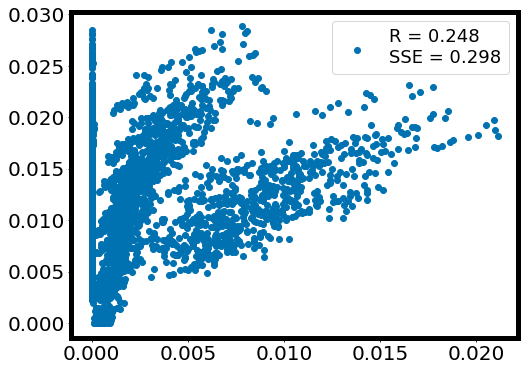

Top 5 profit predictions:  [0.3178737  0.3142816  0.30927318 0.30846125 0.30540735]
Pure exploitation, returning N max objective experiments
Running trial 21, cycle 3
Epoch: 0, Loss: 218.93521, Residuals: -0.25959, Convergence:   inf
Epoch: 10, Loss: 188.64464, Residuals: -0.24065, Convergence: 0.015286
Epoch: 20, Loss: 161.82495, Residuals: -0.22283, Convergence: 0.015578
Epoch: 30, Loss: 138.52399, Residuals: -0.20642, Convergence: 0.015700
Epoch: 40, Loss: 118.67303, Residuals: -0.19113, Convergence: 0.015419
Epoch: 50, Loss: 102.20243, Residuals: -0.17688, Convergence: 0.014905
Epoch: 60, Loss: 88.42489, Residuals: -0.16412, Convergence: 0.014226
Epoch: 70, Loss: 76.91398, Residuals: -0.15244, Convergence: 0.013984
Epoch: 80, Loss: 67.15950, Residuals: -0.14163, Convergence: 0.013773
Epoch: 90, Loss: 58.83663, Residuals: -0.13166, Convergence: 0.013372
Epoch: 100, Loss: 51.84464, Residuals: -0.12206, Convergence: 0.012201
Epoch: 110, Loss: 45.96288, Residuals: -0.11327, Convergence

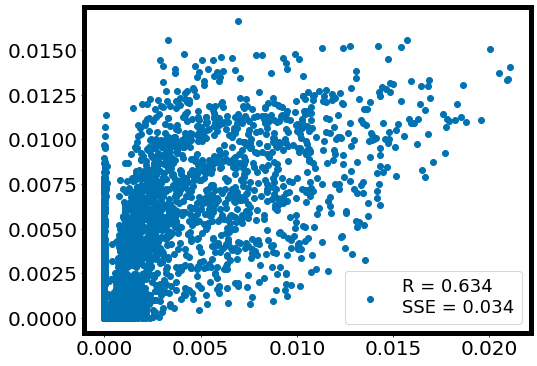

Top 5 profit predictions:  [0.18024684 0.16913666 0.16403621 0.16325082 0.16073994]
Pure exploitation, returning N max objective experiments
Running trial 21, cycle 4
Epoch: 0, Loss: 280.93190, Residuals: -0.31027, Convergence:   inf
Epoch: 10, Loss: 242.63480, Residuals: -0.28453, Convergence: 0.015117
Epoch: 20, Loss: 208.36366, Residuals: -0.26152, Convergence: 0.015506
Epoch: 30, Loss: 178.51022, Residuals: -0.24092, Convergence: 0.015644
Epoch: 40, Loss: 151.91162, Residuals: -0.22123, Convergence: 0.016340
Epoch: 50, Loss: 129.33188, Residuals: -0.20315, Convergence: 0.016172
Epoch: 60, Loss: 110.47952, Residuals: -0.18613, Convergence: 0.015523
Epoch: 70, Loss: 94.96611, Residuals: -0.17029, Convergence: 0.015020
Epoch: 80, Loss: 82.08633, Residuals: -0.15555, Convergence: 0.014269
Epoch: 90, Loss: 71.38478, Residuals: -0.14188, Convergence: 0.013930
Epoch: 100, Loss: 62.57614, Residuals: -0.12924, Convergence: 0.013222
Epoch: 110, Loss: 55.33068, Residuals: -0.11730, Convergenc

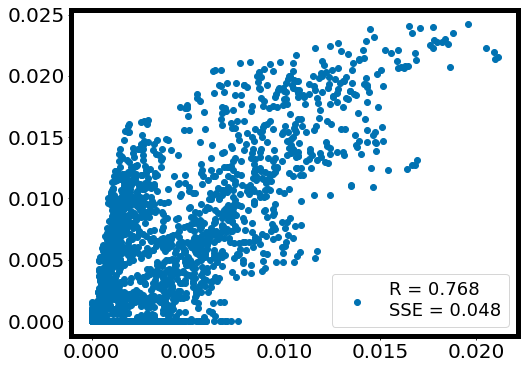

Top 5 profit predictions:  [0.26496306 0.26294905 0.26066634 0.25934216 0.2582841 ]
Pure exploitation, returning N max objective experiments
Running trial 21, cycle 5
Epoch: 0, Loss: 326.60075, Residuals: -0.22430, Convergence:   inf
Epoch: 10, Loss: 282.30042, Residuals: -0.20653, Convergence: 0.015043
Epoch: 20, Loss: 242.29681, Residuals: -0.19034, Convergence: 0.015638
Epoch: 30, Loss: 207.33180, Residuals: -0.17545, Convergence: 0.015679
Epoch: 40, Loss: 176.87437, Residuals: -0.16134, Convergence: 0.016273
Epoch: 50, Loss: 150.96895, Residuals: -0.14794, Convergence: 0.015738
Epoch: 60, Loss: 129.39084, Residuals: -0.13537, Convergence: 0.015331
Epoch: 70, Loss: 111.49402, Residuals: -0.12382, Convergence: 0.014877
Epoch: 80, Loss: 96.78684, Residuals: -0.11291, Convergence: 0.013834
Epoch: 90, Loss: 84.66142, Residuals: -0.10278, Convergence: 0.013390
Epoch: 100, Loss: 74.64219, Residuals: -0.09341, Convergence: 0.012500
Epoch: 110, Loss: 66.33558, Residuals: -0.08487, Convergen


Epoch: 899, Evidence: 1592.24756, Convergence: -0.008005
Epoch: 900, Loss: 335.53244, Residuals: -0.00731, Convergence: 0.001421
Epoch: 910, Loss: 331.38217, Residuals: -0.00775, Convergence: 0.001121

Epoch: 914, Evidence: 1603.65332, Convergence: -0.000835
Epoch: 920, Loss: 327.96533, Residuals: -0.00973, Convergence: 0.001820
Epoch: 930, Loss: 323.34833, Residuals: -0.01076, Convergence: 0.001246

Epoch: 936, Evidence: 1591.76831, Convergence: -0.008308


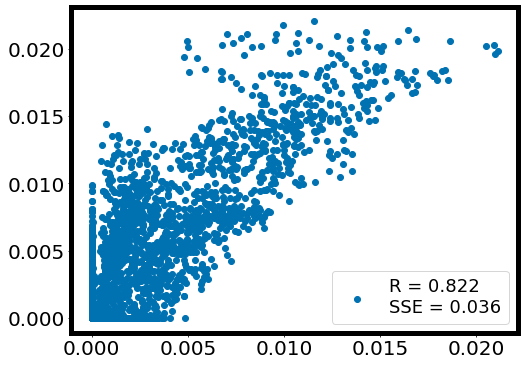

Top 5 profit predictions:  [0.22382583 0.22360533 0.22309    0.21959396 0.21921732]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 386.73531, Residuals: -0.27979, Convergence:   inf
Epoch: 10, Loss: 333.08701, Residuals: -0.25576, Convergence: 0.015443
Epoch: 20, Loss: 284.72473, Residuals: -0.23364, Convergence: 0.016050
Epoch: 30, Loss: 242.70738, Residuals: -0.21317, Convergence: 0.016046
Epoch: 40, Loss: 206.54752, Residuals: -0.19431, Convergence: 0.016455
Epoch: 50, Loss: 175.89510, Residuals: -0.17694, Convergence: 0.015988
Epoch: 60, Loss: 150.53781, Residuals: -0.16080, Convergence: 0.015384
Epoch: 70, Loss: 129.61201, Residuals: -0.14598, Convergence: 0.014827
Epoch: 80, Loss: 112.47287, Residuals: -0.13252, Convergence: 0.013707
Epoch: 90, Loss: 98.36636, Residuals: -0.12020, Convergence: 0.013108
Epoch: 100, Loss: 86.63590, Residuals: -0.10897, Convergence: 0.012542
Epoch: 110, Loss: 76.85109, Residuals: -0.09898, Convergence: 0.011618
Epoch: 120, 

Epoch: 900, Loss: 399.28033, Residuals: -0.00642, Convergence: 0.001736
Epoch: 910, Loss: 393.46899, Residuals: -0.00577, Convergence: 0.001413

Epoch: 912, Evidence: 1960.51892, Convergence: 0.002208
Epoch: 920, Loss: 391.99298, Residuals: -0.00567, Convergence: 0.001747

Epoch: 924, Evidence: 1961.83423, Convergence: 0.000670

Epoch: 926, Evidence: 1962.28711, Convergence: 0.000901

Epoch: 929, Evidence: 1957.27246, Convergence: -0.001659


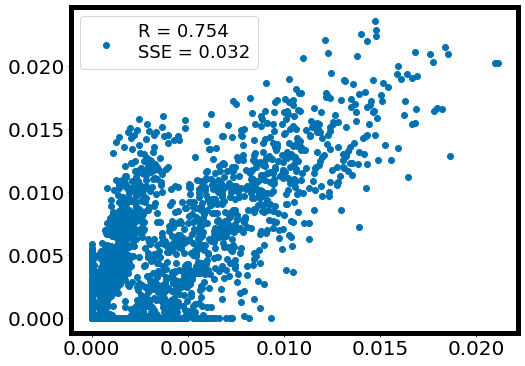

Running trial 22, cycle 1
Epoch: 0, Loss: 69.39502, Residuals: -1.14876, Convergence:   inf
Epoch: 10, Loss: 60.01883, Residuals: -1.05351, Convergence: 0.014840
Epoch: 20, Loss: 51.70764, Residuals: -0.96847, Convergence: 0.015141
Epoch: 30, Loss: 44.43735, Residuals: -0.89151, Convergence: 0.015355
Epoch: 40, Loss: 38.14014, Residuals: -0.82137, Convergence: 0.015406
Epoch: 50, Loss: 32.74710, Residuals: -0.75740, Convergence: 0.015308
Epoch: 60, Loss: 28.16004, Residuals: -0.69903, Convergence: 0.015139
Epoch: 70, Loss: 24.26653, Residuals: -0.64595, Convergence: 0.014861
Epoch: 80, Loss: 20.97621, Residuals: -0.59764, Convergence: 0.014520
Epoch: 90, Loss: 18.20039, Residuals: -0.55364, Convergence: 0.014043
Epoch: 100, Loss: 15.86519, Residuals: -0.51335, Convergence: 0.013667
Epoch: 110, Loss: 13.90696, Residuals: -0.47674, Convergence: 0.013141
Epoch: 120, Loss: 12.26122, Residuals: -0.44346, Convergence: 0.012548
Epoch: 130, Loss: 10.90262, Residuals: -0.41287, Convergence: 0.0

Epoch: 860, Loss: 41.99603, Residuals: -0.01052, Convergence: 0.001011
Epoch: 870, Loss: 41.22211, Residuals: -0.01061, Convergence: 0.001217

Epoch: 875, Evidence: 254.17702, Convergence: 0.012852
Epoch: 880, Loss: 41.68950, Residuals: -0.01080, Convergence: 0.001502
Epoch: 890, Loss: 40.88966, Residuals: -0.01103, Convergence: 0.001269

Epoch: 893, Evidence: 255.01849, Convergence: 0.003300
Epoch: 900, Loss: 41.49736, Residuals: -0.01132, Convergence: 0.001988
Epoch: 910, Loss: 40.70221, Residuals: -0.01156, Convergence: 0.001502
Epoch: 920, Loss: 40.00170, Residuals: -0.01169, Convergence: 0.001479
Epoch: 930, Loss: 39.36388, Residuals: -0.01164, Convergence: 0.001282

Epoch: 931, Evidence: 255.38583, Convergence: 0.001438
Epoch: 940, Loss: 39.88509, Residuals: -0.01196, Convergence: 0.001997
Epoch: 950, Loss: 39.10511, Residuals: -0.01216, Convergence: 0.002230

Epoch: 951, Evidence: 254.87820, Convergence: -0.001992


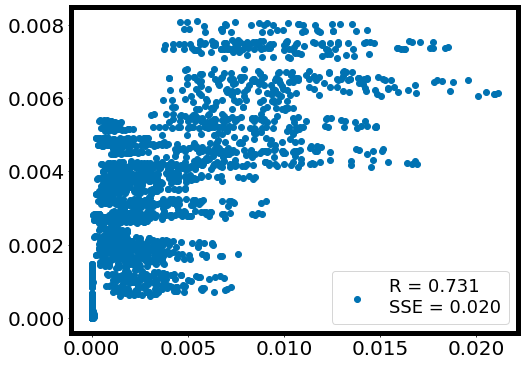

Top 5 profit predictions:  [0.08829855 0.08723043 0.0869443  0.08677809 0.08672379]
Pure exploitation, returning N max objective experiments
Running trial 22, cycle 2
Epoch: 0, Loss: 147.58945, Residuals: -0.82012, Convergence:   inf
Epoch: 10, Loss: 127.95631, Residuals: -0.75234, Convergence: 0.014562
Epoch: 20, Loss: 110.56630, Residuals: -0.69056, Convergence: 0.014872
Epoch: 30, Loss: 95.17594, Residuals: -0.63399, Convergence: 0.015256
Epoch: 40, Loss: 81.77485, Residuals: -0.58206, Convergence: 0.015271
Epoch: 50, Loss: 70.38797, Residuals: -0.53425, Convergence: 0.014803
Epoch: 60, Loss: 60.81758, Residuals: -0.49028, Convergence: 0.014532
Epoch: 70, Loss: 52.83453, Residuals: -0.44973, Convergence: 0.013942
Epoch: 80, Loss: 46.25969, Residuals: -0.41211, Convergence: 0.012998
Epoch: 90, Loss: 40.77941, Residuals: -0.37751, Convergence: 0.012464
Epoch: 100, Loss: 36.19160, Residuals: -0.34602, Convergence: 0.011893
Epoch: 110, Loss: 32.35192, Residuals: -0.31730, Convergence: 0

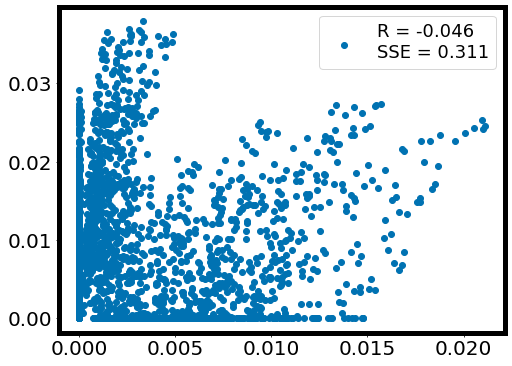

Top 5 profit predictions:  [0.4180388  0.4038719  0.40135497 0.40099454 0.40092576]
Pure exploitation, returning N max objective experiments
Running trial 22, cycle 3
Epoch: 0, Loss: 227.29343, Residuals: -0.73570, Convergence:   inf
Epoch: 10, Loss: 196.35406, Residuals: -0.67217, Convergence: 0.014994
Epoch: 20, Loss: 168.52013, Residuals: -0.61435, Convergence: 0.015779
Epoch: 30, Loss: 143.56816, Residuals: -0.56154, Convergence: 0.016360
Epoch: 40, Loss: 122.03149, Residuals: -0.51340, Convergence: 0.016340
Epoch: 50, Loss: 103.98482, Residuals: -0.46951, Convergence: 0.015966
Epoch: 60, Loss: 88.96611, Residuals: -0.42955, Convergence: 0.015539
Epoch: 70, Loss: 76.52427, Residuals: -0.39307, Convergence: 0.014719
Epoch: 80, Loss: 66.24911, Residuals: -0.35965, Convergence: 0.014267
Epoch: 90, Loss: 57.71804, Residuals: -0.32930, Convergence: 0.013552
Epoch: 100, Loss: 50.59385, Residuals: -0.30129, Convergence: 0.012656
Epoch: 110, Loss: 44.70281, Residuals: -0.27549, Convergence

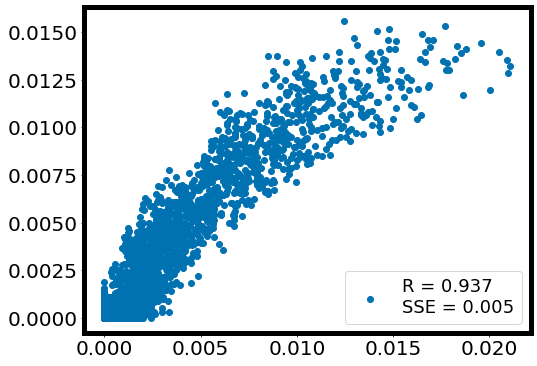

Top 5 profit predictions:  [0.1690808  0.16658911 0.16604832 0.16491885 0.16445471]
Pure exploitation, returning N max objective experiments
Running trial 22, cycle 4
Epoch: 0, Loss: 249.75731, Residuals: -0.25076, Convergence:   inf
Epoch: 10, Loss: 216.87859, Residuals: -0.23075, Convergence: 0.014328
Epoch: 20, Loss: 187.91705, Residuals: -0.21181, Convergence: 0.014514
Epoch: 30, Loss: 162.60236, Residuals: -0.19427, Convergence: 0.014594
Epoch: 40, Loss: 140.84801, Residuals: -0.17812, Convergence: 0.014295
Epoch: 50, Loss: 122.52549, Residuals: -0.16325, Convergence: 0.013929
Epoch: 60, Loss: 107.14651, Residuals: -0.14996, Convergence: 0.013204
Epoch: 70, Loss: 94.30452, Residuals: -0.13800, Convergence: 0.012632
Epoch: 80, Loss: 83.54282, Residuals: -0.12713, Convergence: 0.011983
Epoch: 90, Loss: 74.53107, Residuals: -0.11715, Convergence: 0.011237
Epoch: 100, Loss: 67.03566, Residuals: -0.10801, Convergence: 0.010054
Epoch: 110, Loss: 60.71822, Residuals: -0.09971, Convergenc

Epoch: 930, Loss: 252.66412, Residuals: -0.01202, Convergence: 0.001267
Epoch: 940, Loss: 249.00436, Residuals: -0.01234, Convergence: 0.001343

Epoch: 944, Evidence: 1204.42139, Convergence: -0.008413


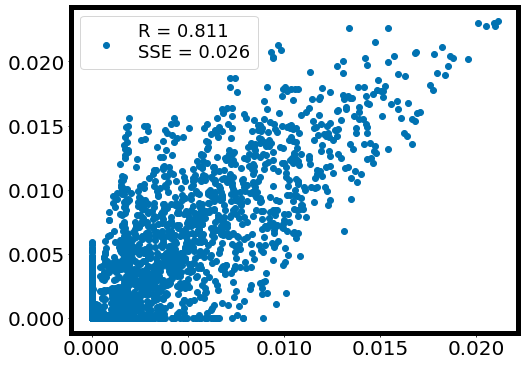

Top 5 profit predictions:  [0.2533072  0.25029793 0.2500432  0.2488707  0.24713768]
Pure exploitation, returning N max objective experiments
Running trial 22, cycle 5
Epoch: 0, Loss: 313.70735, Residuals: -0.24448, Convergence:   inf
Epoch: 10, Loss: 273.02338, Residuals: -0.22393, Convergence: 0.014223
Epoch: 20, Loss: 236.28583, Residuals: -0.20511, Convergence: 0.014826
Epoch: 30, Loss: 203.65419, Residuals: -0.18764, Convergence: 0.015003
Epoch: 40, Loss: 175.74213, Residuals: -0.17150, Convergence: 0.014670
Epoch: 50, Loss: 152.47336, Residuals: -0.15665, Convergence: 0.013958
Epoch: 60, Loss: 133.17570, Residuals: -0.14320, Convergence: 0.013338
Epoch: 70, Loss: 117.10600, Residuals: -0.13104, Convergence: 0.012628
Epoch: 80, Loss: 103.58778, Residuals: -0.11987, Convergence: 0.012224
Epoch: 90, Loss: 91.91833, Residuals: -0.10967, Convergence: 0.011769
Epoch: 100, Loss: 82.18220, Residuals: -0.10009, Convergence: 0.011191
Epoch: 110, Loss: 74.04699, Residuals: -0.09120, Converge


Epoch: 863, Evidence: 1645.85193, Convergence: 0.000940
Epoch: 870, Loss: 330.20734, Residuals: -0.00975, Convergence: 0.002365

Epoch: 879, Evidence: 1640.42407, Convergence: -0.002365


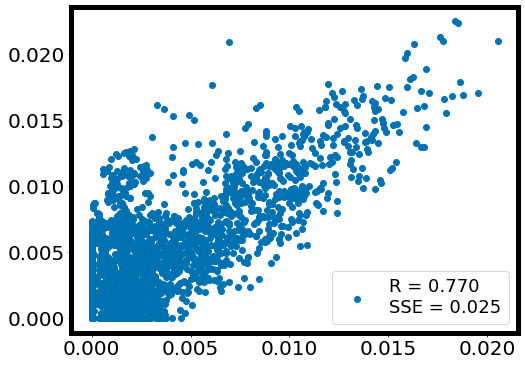

Top 5 profit predictions:  [0.24654151 0.24415983 0.2304374  0.22828113 0.22793083]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 383.32909, Residuals: -0.29091, Convergence:   inf
Epoch: 10, Loss: 331.95972, Residuals: -0.26570, Convergence: 0.014739
Epoch: 20, Loss: 285.82034, Residuals: -0.24271, Convergence: 0.015331
Epoch: 30, Loss: 245.29663, Residuals: -0.22138, Convergence: 0.015365
Epoch: 40, Loss: 211.07877, Residuals: -0.20162, Convergence: 0.014817
Epoch: 50, Loss: 182.74266, Residuals: -0.18346, Convergence: 0.014354
Epoch: 60, Loss: 159.13411, Residuals: -0.16710, Convergence: 0.013660
Epoch: 70, Loss: 139.52942, Residuals: -0.15226, Convergence: 0.012960
Epoch: 80, Loss: 123.31396, Residuals: -0.13871, Convergence: 0.012091
Epoch: 90, Loss: 109.89472, Residuals: -0.12633, Convergence: 0.011206
Epoch: 100, Loss: 98.76725, Residuals: -0.11505, Convergence: 0.010342
Epoch: 110, Loss: 89.59775, Residuals: -0.10478, Convergence: 0.009329
Epoch: 120,


Epoch: 879, Evidence: 2012.99939, Convergence: -0.002307


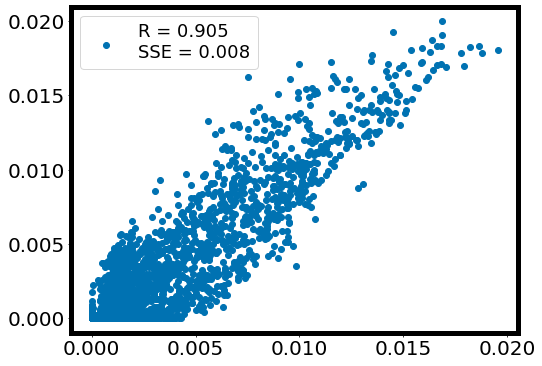

Running trial 23, cycle 1
Epoch: 0, Loss: 100.94686, Residuals: -1.08104, Convergence:   inf
Epoch: 10, Loss: 86.89248, Residuals: -0.99959, Convergence: 0.015134
Epoch: 20, Loss: 74.76853, Residuals: -0.92538, Convergence: 0.015148
Epoch: 30, Loss: 64.31150, Residuals: -0.85670, Convergence: 0.015221
Epoch: 40, Loss: 55.25947, Residuals: -0.79291, Convergence: 0.015326
Epoch: 50, Loss: 47.44833, Residuals: -0.73356, Convergence: 0.015370
Epoch: 60, Loss: 40.78278, Residuals: -0.67901, Convergence: 0.015118
Epoch: 70, Loss: 35.13351, Residuals: -0.62923, Convergence: 0.014882
Epoch: 80, Loss: 30.36864, Residuals: -0.58401, Convergence: 0.014530
Epoch: 90, Loss: 26.36872, Residuals: -0.54295, Convergence: 0.013980
Epoch: 100, Loss: 23.02310, Residuals: -0.50534, Convergence: 0.013324
Epoch: 110, Loss: 20.24204, Residuals: -0.47045, Convergence: 0.012408
Epoch: 120, Loss: 17.96432, Residuals: -0.43770, Convergence: 0.011702
Epoch: 130, Loss: 16.06662, Residuals: -0.40778, Convergence: 0.

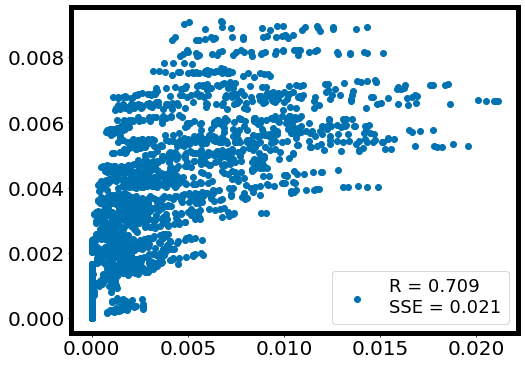

Top 5 profit predictions:  [0.09772766 0.09706905 0.09667293 0.09603997 0.09565733]
Pure exploitation, returning N max objective experiments
Running trial 23, cycle 2
Epoch: 0, Loss: 217.59209, Residuals: -1.22058, Convergence:   inf
Epoch: 10, Loss: 185.30545, Residuals: -1.11525, Convergence: 0.016454
Epoch: 20, Loss: 157.22864, Residuals: -1.01975, Convergence: 0.016640
Epoch: 30, Loss: 133.25555, Residuals: -0.93300, Convergence: 0.016669
Epoch: 40, Loss: 113.05269, Residuals: -0.85387, Convergence: 0.016477
Epoch: 50, Loss: 96.16043, Residuals: -0.78161, Convergence: 0.016164
Epoch: 60, Loss: 82.08526, Residuals: -0.71577, Convergence: 0.015765
Epoch: 70, Loss: 70.35258, Residuals: -0.65584, Convergence: 0.015355
Epoch: 80, Loss: 60.58637, Residuals: -0.60141, Convergence: 0.014839
Epoch: 90, Loss: 52.24153, Residuals: -0.55231, Convergence: 0.014751
Epoch: 100, Loss: 45.37165, Residuals: -0.50706, Convergence: 0.014005
Epoch: 110, Loss: 39.68674, Residuals: -0.46548, Convergence:

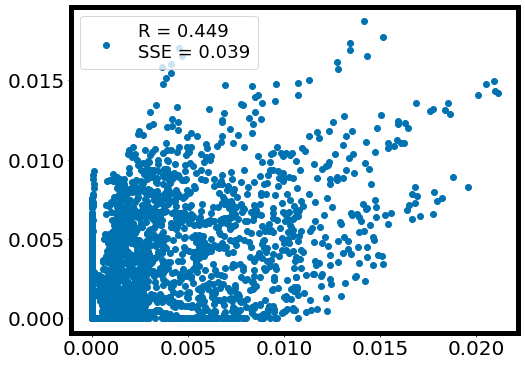

Top 5 profit predictions:  [0.20343408 0.19538099 0.18789673 0.18551245 0.18221332]
Pure exploitation, returning N max objective experiments
Running trial 23, cycle 3
Epoch: 0, Loss: 298.06554, Residuals: -1.29073, Convergence:   inf
Epoch: 10, Loss: 253.88609, Residuals: -1.17463, Convergence: 0.016534
Epoch: 20, Loss: 215.11006, Residuals: -1.06963, Convergence: 0.016795
Epoch: 30, Loss: 182.13887, Residuals: -0.97444, Convergence: 0.016719
Epoch: 40, Loss: 154.49609, Residuals: -0.88795, Convergence: 0.016486
Epoch: 50, Loss: 131.33730, Residuals: -0.80936, Convergence: 0.016234
Epoch: 60, Loss: 111.92514, Residuals: -0.73782, Convergence: 0.016006
Epoch: 70, Loss: 95.80180, Residuals: -0.67250, Convergence: 0.015385
Epoch: 80, Loss: 82.42128, Residuals: -0.61318, Convergence: 0.014870
Epoch: 90, Loss: 71.36253, Residuals: -0.55896, Convergence: 0.014376
Epoch: 100, Loss: 62.06333, Residuals: -0.50979, Convergence: 0.013953
Epoch: 110, Loss: 54.29826, Residuals: -0.46503, Convergenc


Epoch: 853, Evidence: 866.72412, Convergence: 0.001402
Epoch: 860, Loss: 188.22667, Residuals: -0.00309, Convergence: 0.001583
Epoch: 870, Loss: 185.67133, Residuals: -0.00339, Convergence: 0.001024

Epoch: 877, Evidence: 867.29150, Convergence: 0.000654
Epoch: 880, Loss: 184.58301, Residuals: -0.00461, Convergence: 0.002946
Epoch: 890, Loss: 180.37607, Residuals: -0.00637, Convergence: 0.001797

Epoch: 898, Evidence: 861.65649, Convergence: -0.005881


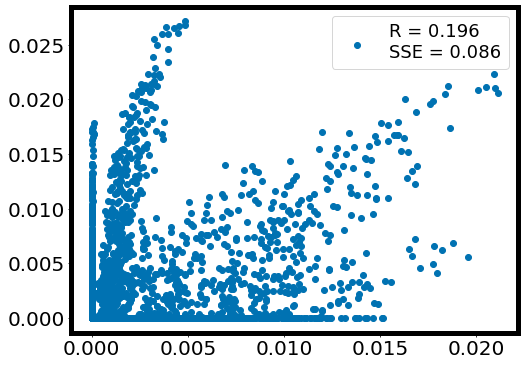

Top 5 profit predictions:  [0.2988989  0.29370308 0.2912244  0.28882328 0.28819305]
Pure exploitation, returning N max objective experiments
Running trial 23, cycle 4
Epoch: 0, Loss: 424.96135, Residuals: -1.16399, Convergence:   inf
Epoch: 10, Loss: 359.30005, Residuals: -1.05753, Convergence: 0.017372
Epoch: 20, Loss: 301.79504, Residuals: -0.96164, Convergence: 0.017706
Epoch: 30, Loss: 253.33507, Residuals: -0.87471, Convergence: 0.017565
Epoch: 40, Loss: 213.16449, Residuals: -0.79551, Convergence: 0.017275
Epoch: 50, Loss: 179.91249, Residuals: -0.72342, Convergence: 0.016991
Epoch: 60, Loss: 152.44128, Residuals: -0.65789, Convergence: 0.016230
Epoch: 70, Loss: 129.84804, Residuals: -0.59767, Convergence: 0.015714
Epoch: 80, Loss: 111.05077, Residuals: -0.54276, Convergence: 0.015727
Epoch: 90, Loss: 95.55197, Residuals: -0.49265, Convergence: 0.014939
Epoch: 100, Loss: 82.68916, Residuals: -0.44708, Convergence: 0.014520
Epoch: 110, Loss: 72.03075, Residuals: -0.40573, Converge

Epoch: 910, Loss: 251.88846, Residuals: -0.01150, Convergence: 0.001076

Epoch: 912, Evidence: 1189.38489, Convergence: -0.001862


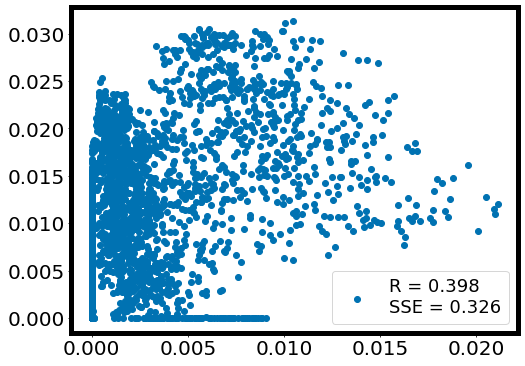

Top 5 profit predictions:  [0.34296596 0.33846492 0.3306281  0.33008257 0.3298939 ]
Pure exploitation, returning N max objective experiments
Running trial 23, cycle 5
Epoch: 0, Loss: 505.55592, Residuals: -0.11365, Convergence:   inf
Epoch: 10, Loss: 428.74442, Residuals: -0.10477, Convergence: 0.016720
Epoch: 20, Loss: 363.31961, Residuals: -0.09617, Convergence: 0.016656
Epoch: 30, Loss: 308.38995, Residuals: -0.08810, Convergence: 0.016410
Epoch: 40, Loss: 262.65369, Residuals: -0.08087, Convergence: 0.015963
Epoch: 50, Loss: 224.72655, Residuals: -0.07427, Convergence: 0.015511
Epoch: 60, Loss: 192.85425, Residuals: -0.06847, Convergence: 0.015424
Epoch: 70, Loss: 165.71483, Residuals: -0.06354, Convergence: 0.015180
Epoch: 80, Loss: 142.84076, Residuals: -0.05910, Convergence: 0.014784
Epoch: 90, Loss: 123.61776, Residuals: -0.05510, Convergence: 0.014144
Epoch: 100, Loss: 107.53662, Residuals: -0.05142, Convergence: 0.013733
Epoch: 110, Loss: 93.99734, Residuals: -0.04785, Conver

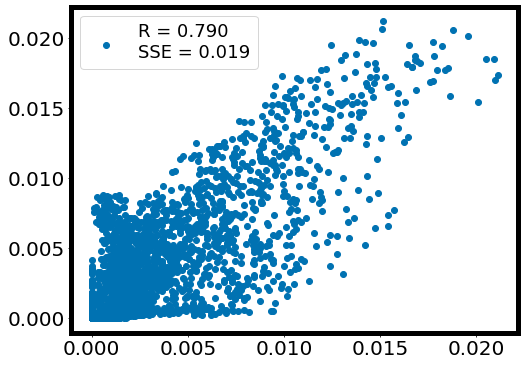

Top 5 profit predictions:  [0.22980091 0.22687362 0.22654185 0.21872665 0.2166674 ]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 585.03484, Residuals: 0.02130, Convergence:   inf
Epoch: 10, Loss: 494.24835, Residuals: 0.01760, Convergence: 0.017171
Epoch: 20, Loss: 416.86627, Residuals: 0.01475, Convergence: 0.017164
Epoch: 30, Loss: 352.03864, Residuals: 0.01254, Convergence: 0.016814
Epoch: 40, Loss: 298.51337, Residuals: 0.01060, Convergence: 0.016426
Epoch: 50, Loss: 254.62733, Residuals: 0.00857, Convergence: 0.015669
Epoch: 60, Loss: 218.44664, Residuals: 0.00665, Convergence: 0.015169
Epoch: 70, Loss: 188.47243, Residuals: 0.00492, Convergence: 0.014568
Epoch: 80, Loss: 163.30701, Residuals: 0.00336, Convergence: 0.014215
Epoch: 90, Loss: 141.96016, Residuals: 0.00193, Convergence: 0.014001
Epoch: 100, Loss: 123.91342, Residuals: 0.00078, Convergence: 0.013595
Epoch: 110, Loss: 108.50343, Residuals: -0.00028, Convergence: 0.013205
Epoch: 120, Loss: 95


Epoch: 902, Evidence: 2081.88623, Convergence: 0.000138


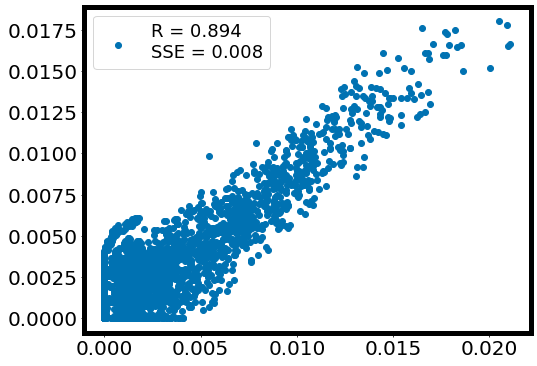

Running trial 24, cycle 1
Epoch: 0, Loss: 132.47054, Residuals: -0.51178, Convergence:   inf
Epoch: 10, Loss: 112.05141, Residuals: -0.47880, Convergence: 0.016937
Epoch: 20, Loss: 94.71442, Residuals: -0.44857, Convergence: 0.016944
Epoch: 30, Loss: 80.08839, Residuals: -0.42115, Convergence: 0.016888
Epoch: 40, Loss: 67.77098, Residuals: -0.39654, Convergence: 0.016795
Epoch: 50, Loss: 57.41084, Residuals: -0.37446, Convergence: 0.016673
Epoch: 60, Loss: 48.70057, Residuals: -0.35442, Convergence: 0.016518
Epoch: 70, Loss: 41.39127, Residuals: -0.33591, Convergence: 0.016289
Epoch: 80, Loss: 35.26570, Residuals: -0.31870, Convergence: 0.016017
Epoch: 90, Loss: 30.13868, Residuals: -0.30262, Convergence: 0.015673
Epoch: 100, Loss: 25.87672, Residuals: -0.28714, Convergence: 0.014919
Epoch: 110, Loss: 22.33205, Residuals: -0.27241, Convergence: 0.014829
Epoch: 120, Loss: 19.41208, Residuals: -0.25815, Convergence: 0.012863
Epoch: 130, Loss: 16.99492, Residuals: -0.24475, Convergence: 0

Epoch: 930, Loss: 30.08319, Residuals: -0.00606, Convergence: 0.002537
Epoch: 940, Loss: 29.50751, Residuals: -0.00628, Convergence: 0.001629
Epoch: 950, Loss: 28.98273, Residuals: -0.00646, Convergence: 0.001922

Epoch: 951, Evidence: 208.79083, Convergence: 0.036883

Epoch: 954, Evidence: 213.84010, Convergence: 0.023612
Epoch: 960, Loss: 31.98061, Residuals: -0.00684, Convergence: 0.002005
Epoch: 970, Loss: 31.33538, Residuals: -0.00711, Convergence: 0.002037
Epoch: 980, Loss: 30.76436, Residuals: -0.00730, Convergence: 0.001871

Epoch: 985, Evidence: 213.76045, Convergence: -0.000373
Epoch: 990, Loss: 31.36530, Residuals: -0.00857, Convergence: 0.003776
Epoch: 1000, Loss: 30.39622, Residuals: -0.01026, Convergence: 0.000741

Epoch: 1000, Evidence: 213.30836, Convergence: -0.002493
Epoch: 1000, Loss: 35.24797, Residuals: -0.00662, Convergence:   inf
Epoch: 1010, Loss: 34.33039, Residuals: -0.00704, Convergence: 0.002488
Epoch: 1020, Loss: 33.58680, Residuals: -0.00736, Convergence: 

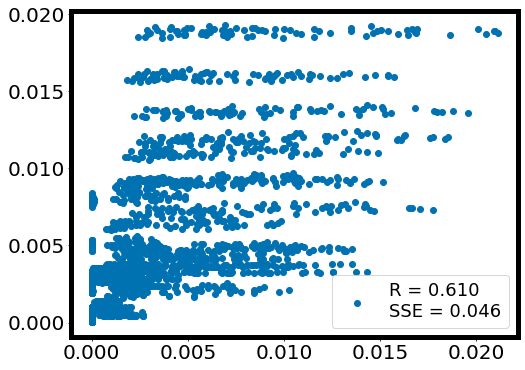

Top 5 profit predictions:  [0.21050577 0.20984486 0.20949021 0.20900919 0.20853893]
Pure exploitation, returning N max objective experiments
Running trial 24, cycle 2
Epoch: 0, Loss: 185.17537, Residuals: -0.62743, Convergence:   inf
Epoch: 10, Loss: 159.26474, Residuals: -0.57315, Convergence: 0.015449
Epoch: 20, Loss: 136.29185, Residuals: -0.52449, Convergence: 0.015895
Epoch: 30, Loss: 116.24117, Residuals: -0.48129, Convergence: 0.016120
Epoch: 40, Loss: 99.16253, Residuals: -0.44192, Convergence: 0.016039
Epoch: 50, Loss: 84.56089, Residuals: -0.40626, Convergence: 0.016028
Epoch: 60, Loss: 72.21535, Residuals: -0.37378, Convergence: 0.015807
Epoch: 70, Loss: 61.85725, Residuals: -0.34388, Convergence: 0.015525
Epoch: 80, Loss: 53.15219, Residuals: -0.31630, Convergence: 0.015103
Epoch: 90, Loss: 45.93272, Residuals: -0.29070, Convergence: 0.014246
Epoch: 100, Loss: 39.88702, Residuals: -0.26742, Convergence: 0.014173
Epoch: 110, Loss: 34.92616, Residuals: -0.24610, Convergence: 

Epoch: 960, Loss: 81.82274, Residuals: -0.00705, Convergence: 0.002045
Epoch: 970, Loss: 80.33846, Residuals: -0.00711, Convergence: 0.001309
Epoch: 980, Loss: 78.99704, Residuals: -0.00721, Convergence: 0.001458
Epoch: 990, Loss: 77.81168, Residuals: -0.00714, Convergence: 0.001098
Epoch: 1000, Loss: 76.73048, Residuals: -0.00696, Convergence: 0.001319

Epoch: 1004, Evidence: 450.36795, Convergence: 0.024743
Epoch: 1010, Loss: 81.11234, Residuals: -0.00713, Convergence: 0.002064
Epoch: 1020, Loss: 79.63062, Residuals: -0.00739, Convergence: 0.001548
Epoch: 1030, Loss: 78.26003, Residuals: -0.00753, Convergence: 0.001878
Epoch: 1040, Loss: 77.03486, Residuals: -0.00759, Convergence: 0.001657

Epoch: 1049, Evidence: 451.12836, Convergence: 0.001686
Epoch: 1050, Loss: 81.66600, Residuals: -0.00760, Convergence: 0.002224
Epoch: 1060, Loss: 80.08292, Residuals: -0.00800, Convergence: 0.001781
Epoch: 1070, Loss: 78.66640, Residuals: -0.00826, Convergence: 0.001869
Epoch: 1080, Loss: 77.4496

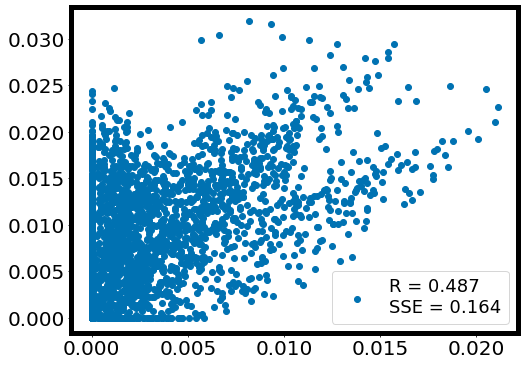

Top 5 profit predictions:  [0.3192535  0.3154153  0.3029094  0.30136293 0.2996584 ]
Pure exploitation, returning N max objective experiments
Running trial 24, cycle 3
Epoch: 0, Loss: 298.58449, Residuals: -0.69356, Convergence:   inf
Epoch: 10, Loss: 255.50014, Residuals: -0.63165, Convergence: 0.015871
Epoch: 20, Loss: 217.70641, Residuals: -0.57623, Convergence: 0.016352
Epoch: 30, Loss: 184.89302, Residuals: -0.52693, Convergence: 0.016510
Epoch: 40, Loss: 157.38089, Residuals: -0.48132, Convergence: 0.016272
Epoch: 50, Loss: 134.24095, Residuals: -0.43919, Convergence: 0.016169
Epoch: 60, Loss: 114.52389, Residuals: -0.40097, Convergence: 0.015811
Epoch: 70, Loss: 97.91850, Residuals: -0.36616, Convergence: 0.015521
Epoch: 80, Loss: 83.99075, Residuals: -0.33435, Convergence: 0.015273
Epoch: 90, Loss: 72.33285, Residuals: -0.30524, Convergence: 0.014859
Epoch: 100, Loss: 62.59679, Residuals: -0.27869, Convergence: 0.014369
Epoch: 110, Loss: 54.56007, Residuals: -0.25444, Convergenc

Epoch: 940, Loss: 181.40936, Residuals: -0.00565, Convergence: 0.001314

Epoch: 949, Evidence: 827.21655, Convergence: 0.004342
Epoch: 950, Loss: 183.05130, Residuals: -0.00572, Convergence: 0.001614
Epoch: 960, Loss: 180.66943, Residuals: -0.00584, Convergence: 0.001386

Epoch: 967, Evidence: 829.27734, Convergence: 0.002485
Epoch: 970, Loss: 182.13989, Residuals: -0.00590, Convergence: 0.001295

Epoch: 973, Evidence: 828.96741, Convergence: -0.000374
Epoch: 980, Loss: 180.44266, Residuals: -0.00687, Convergence: 0.002354
Epoch: 990, Loss: 176.91415, Residuals: -0.00752, Convergence: 0.001524
Epoch: 1000, Loss: 173.93233, Residuals: -0.00764, Convergence: 0.001804

Epoch: 1008, Evidence: 818.26404, Convergence: -0.013459


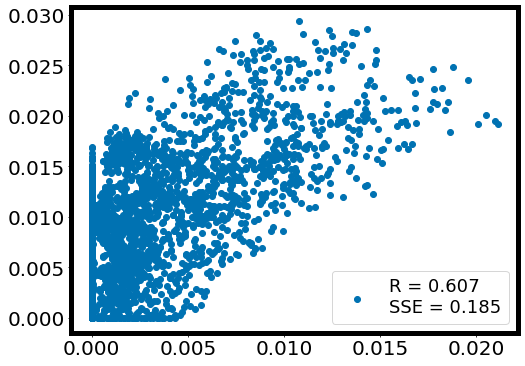

Top 5 profit predictions:  [0.31907836 0.3121293  0.31128496 0.31113276 0.31007278]
Pure exploitation, returning N max objective experiments
Running trial 24, cycle 4
Epoch: 0, Loss: 255.25569, Residuals: -0.33322, Convergence:   inf
Epoch: 10, Loss: 221.31746, Residuals: -0.30419, Convergence: 0.014651
Epoch: 20, Loss: 190.78714, Residuals: -0.27760, Convergence: 0.015106
Epoch: 30, Loss: 164.25365, Residuals: -0.25315, Convergence: 0.015022
Epoch: 40, Loss: 141.76720, Residuals: -0.23074, Convergence: 0.014728
Epoch: 50, Loss: 122.64576, Residuals: -0.21047, Convergence: 0.014474
Epoch: 60, Loss: 106.47639, Residuals: -0.19205, Convergence: 0.014066
Epoch: 70, Loss: 92.85353, Residuals: -0.17548, Convergence: 0.013531
Epoch: 80, Loss: 81.45167, Residuals: -0.16050, Convergence: 0.012895
Epoch: 90, Loss: 71.86588, Residuals: -0.14691, Convergence: 0.012375
Epoch: 100, Loss: 63.74483, Residuals: -0.13457, Convergence: 0.011740
Epoch: 110, Loss: 56.90426, Residuals: -0.12337, Convergenc

Epoch: 960, Loss: 248.93542, Residuals: -0.01054, Convergence: 0.001262

Epoch: 963, Evidence: 1216.50024, Convergence: 0.000347
Epoch: 970, Loss: 248.00571, Residuals: -0.01258, Convergence: 0.002051
Epoch: 980, Loss: 243.95139, Residuals: -0.01381, Convergence: 0.001209

Epoch: 983, Evidence: 1211.37012, Convergence: -0.003887
Epoch: 990, Loss: 257.91083, Residuals: -0.01035, Convergence: 0.001806
Epoch: 1000, Loss: 254.26689, Residuals: -0.01081, Convergence: 0.001079

Epoch: 1008, Evidence: 1221.20850, Convergence: 0.004201
Epoch: 1010, Loss: 255.42664, Residuals: -0.01100, Convergence: 0.001612
Epoch: 1020, Loss: 251.93419, Residuals: -0.01135, Convergence: 0.001348

Epoch: 1022, Evidence: 1223.59546, Convergence: 0.001951
Epoch: 1030, Loss: 252.77007, Residuals: -0.01168, Convergence: 0.001392

Epoch: 1038, Evidence: 1223.07861, Convergence: -0.000423
Epoch: 1040, Loss: 251.99884, Residuals: -0.01239, Convergence: 0.002514
Epoch: 1050, Loss: 247.16193, Residuals: -0.01396, Conver

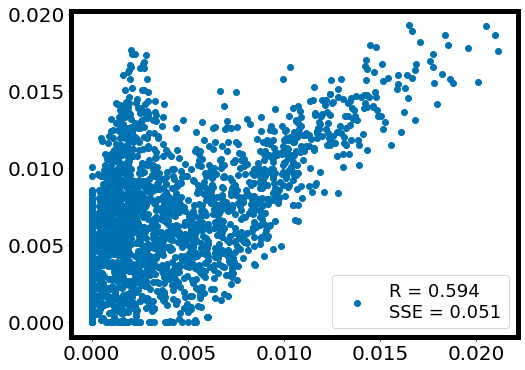

Top 5 profit predictions:  [0.21215552 0.20854212 0.20520702 0.20264603 0.20262337]
Pure exploitation, returning N max objective experiments
Running trial 24, cycle 5
Epoch: 0, Loss: 334.41948, Residuals: -0.28878, Convergence:   inf
Epoch: 10, Loss: 288.66629, Residuals: -0.26396, Convergence: 0.015107
Epoch: 20, Loss: 247.95726, Residuals: -0.24107, Convergence: 0.015395
Epoch: 30, Loss: 212.77858, Residuals: -0.21976, Convergence: 0.015422
Epoch: 40, Loss: 182.76923, Residuals: -0.20002, Convergence: 0.015210
Epoch: 50, Loss: 157.46098, Residuals: -0.18206, Convergence: 0.014850
Epoch: 60, Loss: 136.31856, Residuals: -0.16585, Convergence: 0.014311
Epoch: 70, Loss: 118.64537, Residuals: -0.15119, Convergence: 0.013666
Epoch: 80, Loss: 103.78026, Residuals: -0.13802, Convergence: 0.013270
Epoch: 90, Loss: 91.38061, Residuals: -0.12603, Convergence: 0.012484
Epoch: 100, Loss: 81.02881, Residuals: -0.11517, Convergence: 0.011660
Epoch: 110, Loss: 72.20888, Residuals: -0.10540, Converge


Epoch: 926, Evidence: 1613.49805, Convergence: 0.000003
Epoch: 930, Loss: 329.61569, Residuals: -0.01271, Convergence: 0.001913
Epoch: 940, Loss: 324.01532, Residuals: -0.01333, Convergence: 0.001507

Epoch: 949, Evidence: 1608.72778, Convergence: -0.002962
Epoch: 950, Loss: 336.90103, Residuals: -0.01162, Convergence: 0.001483
Epoch: 960, Loss: 332.69818, Residuals: -0.01175, Convergence: 0.001248

Epoch: 964, Evidence: 1615.57227, Convergence: 0.001287
Epoch: 970, Loss: 331.45407, Residuals: -0.01179, Convergence: 0.001347

Epoch: 971, Evidence: 1615.82617, Convergence: 0.000157
Epoch: 980, Loss: 327.06577, Residuals: -0.01330, Convergence: 0.001534
Epoch: 990, Loss: 322.31638, Residuals: -0.01300, Convergence: 0.001387

Epoch: 992, Evidence: 1611.03516, Convergence: -0.002816


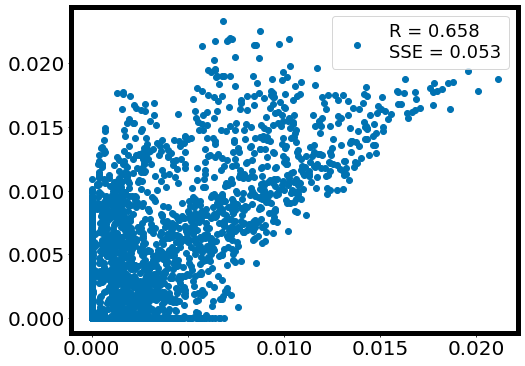

Top 5 profit predictions:  [0.25664833 0.24825503 0.24168704 0.23873477 0.23824456]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 393.61183, Residuals: -0.20414, Convergence:   inf
Epoch: 10, Loss: 339.50415, Residuals: -0.18660, Convergence: 0.015199
Epoch: 20, Loss: 291.33469, Residuals: -0.17039, Convergence: 0.015524
Epoch: 30, Loss: 249.72847, Residuals: -0.15536, Convergence: 0.015478
Epoch: 40, Loss: 214.64122, Residuals: -0.14130, Convergence: 0.015173
Epoch: 50, Loss: 185.09918, Residuals: -0.12835, Convergence: 0.014662
Epoch: 60, Loss: 160.35602, Residuals: -0.11658, Convergence: 0.014139
Epoch: 70, Loss: 139.82936, Residuals: -0.10582, Convergence: 0.013502
Epoch: 80, Loss: 122.79995, Residuals: -0.09627, Convergence: 0.012732
Epoch: 90, Loss: 108.63386, Residuals: -0.08772, Convergence: 0.012004
Epoch: 100, Loss: 96.87675, Residuals: -0.08002, Convergence: 0.011227
Epoch: 110, Loss: 87.05992, Residuals: -0.07312, Convergence: 0.010421
Epoch: 120,

Epoch: 890, Loss: 414.89520, Residuals: -0.00608, Convergence: 0.001433
Epoch: 900, Loss: 409.72299, Residuals: -0.00658, Convergence: 0.001144

Epoch: 902, Evidence: 1946.58459, Convergence: 0.002114

Epoch: 909, Evidence: 1946.74487, Convergence: 0.000082
Epoch: 910, Loss: 409.61618, Residuals: -0.00729, Convergence: 0.002286
Epoch: 920, Loss: 402.10193, Residuals: -0.00915, Convergence: 0.001521
Epoch: 930, Loss: 396.55722, Residuals: -0.00913, Convergence: 0.001313

Epoch: 931, Evidence: 1937.62744, Convergence: -0.004623


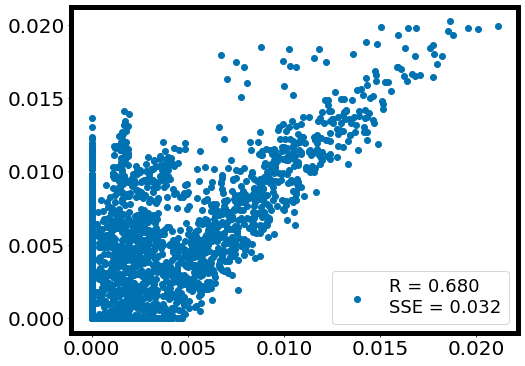

Running trial 25, cycle 1
Epoch: 0, Loss: 118.78776, Residuals: -0.76495, Convergence:   inf
Epoch: 10, Loss: 100.71182, Residuals: -0.70666, Convergence: 0.016833
Epoch: 20, Loss: 85.14014, Residuals: -0.65449, Convergence: 0.016983
Epoch: 30, Loss: 71.92089, Residuals: -0.60686, Convergence: 0.017040
Epoch: 40, Loss: 60.74170, Residuals: -0.56295, Convergence: 0.017019
Epoch: 50, Loss: 51.34113, Residuals: -0.52248, Convergence: 0.016890
Epoch: 60, Loss: 43.46904, Residuals: -0.48527, Convergence: 0.016752
Epoch: 70, Loss: 36.86768, Residuals: -0.45115, Convergence: 0.016552
Epoch: 80, Loss: 31.36370, Residuals: -0.41984, Convergence: 0.016190
Epoch: 90, Loss: 26.79709, Residuals: -0.39125, Convergence: 0.015742
Epoch: 100, Loss: 22.99691, Residuals: -0.36519, Convergence: 0.015253
Epoch: 110, Loss: 19.85452, Residuals: -0.34133, Convergence: 0.014727
Epoch: 120, Loss: 17.22600, Residuals: -0.31948, Convergence: 0.014123
Epoch: 130, Loss: 15.04055, Residuals: -0.29961, Convergence: 0


Epoch: 907, Evidence: 227.85931, Convergence: 0.006983
Epoch: 910, Loss: 40.46517, Residuals: -0.00206, Convergence: 0.003522
Epoch: 920, Loss: 39.52332, Residuals: -0.00266, Convergence: 0.002869

Epoch: 923, Evidence: 227.24048, Convergence: -0.002723
Epoch: 930, Loss: 41.78651, Residuals: -0.00186, Convergence: 0.001576

Epoch: 933, Evidence: 233.54846, Convergence: 0.024360
Epoch: 940, Loss: 42.66401, Residuals: -0.00207, Convergence: 0.001218

Epoch: 942, Evidence: 234.48732, Convergence: 0.004004
Epoch: 950, Loss: 43.39940, Residuals: -0.00228, Convergence: 0.002430

Epoch: 958, Evidence: 236.65720, Convergence: 0.009169
Epoch: 960, Loss: 44.11248, Residuals: -0.00244, Convergence: 0.001676
Epoch: 970, Loss: 43.39863, Residuals: -0.00261, Convergence: 0.001531
Epoch: 980, Loss: 42.76555, Residuals: -0.00274, Convergence: 0.001261

Epoch: 987, Evidence: 234.92931, Convergence: -0.007355
Epoch: 990, Loss: 45.22090, Residuals: -0.00241, Convergence: 0.000910

Epoch: 990, Evidence: 

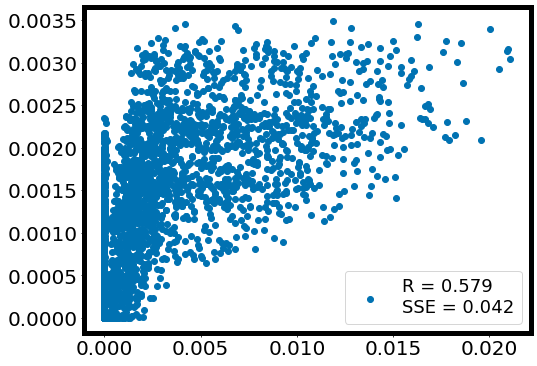

Top 5 profit predictions:  [0.03789591 0.03755331 0.03754805 0.03733232 0.03711695]
Pure exploitation, returning N max objective experiments
Running trial 25, cycle 2
Epoch: 0, Loss: 214.27301, Residuals: -0.38280, Convergence:   inf
Epoch: 10, Loss: 182.37827, Residuals: -0.35366, Convergence: 0.016421
Epoch: 20, Loss: 154.89769, Residuals: -0.32728, Convergence: 0.016501
Epoch: 30, Loss: 131.42049, Residuals: -0.30287, Convergence: 0.016647
Epoch: 40, Loss: 111.28053, Residuals: -0.28028, Convergence: 0.016885
Epoch: 50, Loss: 94.06001, Residuals: -0.25924, Convergence: 0.016908
Epoch: 60, Loss: 79.55645, Residuals: -0.23946, Convergence: 0.016803
Epoch: 70, Loss: 67.46130, Residuals: -0.22125, Convergence: 0.016477
Epoch: 80, Loss: 57.67771, Residuals: -0.20444, Convergence: 0.015817
Epoch: 90, Loss: 49.62477, Residuals: -0.18922, Convergence: 0.014943
Epoch: 100, Loss: 43.12308, Residuals: -0.17527, Convergence: 0.011631
Epoch: 110, Loss: 37.65593, Residuals: -0.16255, Convergence:

Epoch: 930, Loss: 99.03468, Residuals: 0.00172, Convergence: 0.001667
Epoch: 940, Loss: 97.49149, Residuals: 0.00158, Convergence: 0.001571
Epoch: 950, Loss: 96.18125, Residuals: 0.00156, Convergence: 0.001152

Epoch: 959, Evidence: 517.40112, Convergence: 0.002579
Epoch: 960, Loss: 98.94244, Residuals: 0.00151, Convergence: 0.001736
Epoch: 970, Loss: 97.36867, Residuals: 0.00137, Convergence: 0.001551
Epoch: 980, Loss: 95.96421, Residuals: 0.00134, Convergence: 0.001477

Epoch: 988, Evidence: 515.51129, Convergence: -0.003666
Epoch: 990, Loss: 101.65565, Residuals: 0.00151, Convergence: 0.000951

Epoch: 990, Evidence: 528.19177, Convergence: 0.020429
Epoch: 990, Loss: 105.11488, Residuals: 0.00151, Convergence:   inf

Epoch: 991, Evidence: 527.67456, Convergence: -0.000980
Epoch: 1000, Loss: 105.02284, Residuals: 0.00137, Convergence: 0.001849
Epoch: 1010, Loss: 103.26981, Residuals: 0.00128, Convergence: 0.001514
Epoch: 1020, Loss: 101.68062, Residuals: 0.00122, Convergence: 0.001642

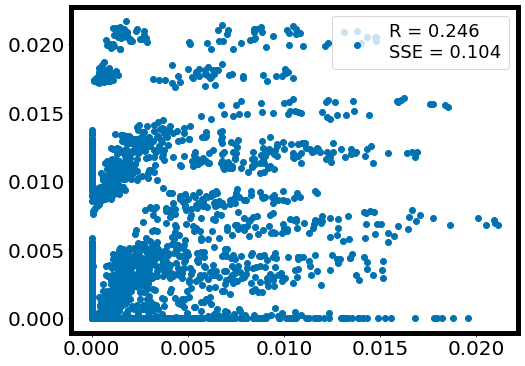

Top 5 profit predictions:  [0.2353008  0.23194867 0.23154712 0.23048802 0.22945322]
Pure exploitation, returning N max objective experiments
Running trial 25, cycle 3
Epoch: 0, Loss: 224.50974, Residuals: -0.01463, Convergence:   inf
Epoch: 10, Loss: 192.69185, Residuals: -0.01652, Convergence: 0.015359
Epoch: 20, Loss: 165.55650, Residuals: -0.01826, Convergence: 0.015250
Epoch: 30, Loss: 142.33438, Residuals: -0.01995, Convergence: 0.015219
Epoch: 40, Loss: 122.48981, Residuals: -0.02136, Convergence: 0.015028
Epoch: 50, Loss: 105.70610, Residuals: -0.02243, Convergence: 0.014698
Epoch: 60, Loss: 91.43475, Residuals: -0.02329, Convergence: 0.014548
Epoch: 70, Loss: 79.22552, Residuals: -0.02378, Convergence: 0.014246
Epoch: 80, Loss: 68.79606, Residuals: -0.02383, Convergence: 0.014134
Epoch: 90, Loss: 59.99204, Residuals: -0.02365, Convergence: 0.013586
Epoch: 100, Loss: 52.58618, Residuals: -0.02361, Convergence: 0.013021
Epoch: 110, Loss: 46.35987, Residuals: -0.02352, Convergence


Epoch: 908, Evidence: 840.59839, Convergence: -0.005590
Epoch: 910, Loss: 181.01428, Residuals: -0.01244, Convergence: 0.002437
Epoch: 920, Loss: 177.48187, Residuals: -0.01287, Convergence: 0.001791
Epoch: 930, Loss: 174.76968, Residuals: -0.01265, Convergence: 0.001537

Epoch: 934, Evidence: 847.15625, Convergence: 0.002194
Epoch: 940, Loss: 177.02876, Residuals: -0.01271, Convergence: 0.001219
Epoch: 950, Loss: 174.23061, Residuals: -0.01288, Convergence: 0.001811

Epoch: 951, Evidence: 849.98370, Convergence: 0.003326
Epoch: 960, Loss: 176.25238, Residuals: -0.01321, Convergence: 0.001785

Epoch: 964, Evidence: 850.81165, Convergence: 0.000973
Epoch: 970, Loss: 175.64114, Residuals: -0.01633, Convergence: 0.002449
Epoch: 980, Loss: 172.29944, Residuals: -0.01778, Convergence: 0.002076

Epoch: 984, Evidence: 840.86121, Convergence: -0.010849


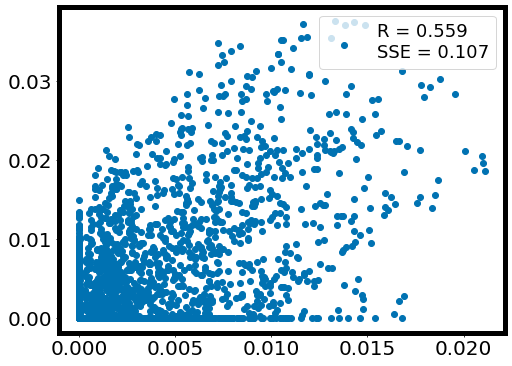

Top 5 profit predictions:  [0.4126602  0.40733087 0.40248674 0.40114552 0.3841304 ]
Pure exploitation, returning N max objective experiments
Running trial 25, cycle 4
Epoch: 0, Loss: 310.70229, Residuals: -0.11976, Convergence:   inf
Epoch: 10, Loss: 265.38840, Residuals: -0.11063, Convergence: 0.016226
Epoch: 20, Loss: 225.56723, Residuals: -0.10246, Convergence: 0.016485
Epoch: 30, Loss: 191.48477, Residuals: -0.09533, Convergence: 0.016523
Epoch: 40, Loss: 162.71660, Residuals: -0.08917, Convergence: 0.016225
Epoch: 50, Loss: 138.65594, Residuals: -0.08353, Convergence: 0.016082
Epoch: 60, Loss: 118.43170, Residuals: -0.07824, Convergence: 0.015781
Epoch: 70, Loss: 101.55779, Residuals: -0.07333, Convergence: 0.015121
Epoch: 80, Loss: 87.63469, Residuals: -0.06877, Convergence: 0.014543
Epoch: 90, Loss: 76.03884, Residuals: -0.06449, Convergence: 0.013940
Epoch: 100, Loss: 66.47305, Residuals: -0.06032, Convergence: 0.013136
Epoch: 110, Loss: 58.53971, Residuals: -0.05637, Convergen


Epoch: 914, Evidence: 1202.96338, Convergence: 0.003571
Epoch: 920, Loss: 263.62262, Residuals: 0.00319, Convergence: 0.001479

Epoch: 927, Evidence: 1201.94238, Convergence: -0.000849
Epoch: 930, Loss: 261.79010, Residuals: 0.00300, Convergence: 0.002981
Epoch: 940, Loss: 256.84811, Residuals: 0.00284, Convergence: 0.001658

Epoch: 947, Evidence: 1198.47668, Convergence: -0.003744


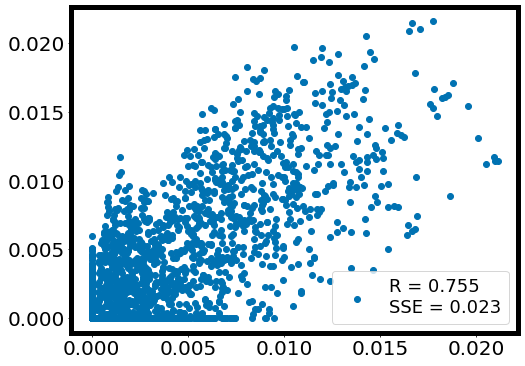

Top 5 profit predictions:  [0.23452334 0.23332846 0.22991441 0.22760683 0.22342044]
Pure exploitation, returning N max objective experiments
Running trial 25, cycle 5
Epoch: 0, Loss: 414.11348, Residuals: 0.02566, Convergence:   inf
Epoch: 10, Loss: 353.91888, Residuals: 0.02114, Convergence: 0.016239
Epoch: 20, Loss: 300.46844, Residuals: 0.01690, Convergence: 0.016677
Epoch: 30, Loss: 254.35397, Residuals: 0.01287, Convergence: 0.016796
Epoch: 40, Loss: 215.51695, Residuals: 0.00932, Convergence: 0.016627
Epoch: 50, Loss: 183.08083, Residuals: 0.00648, Convergence: 0.016282
Epoch: 60, Loss: 156.05566, Residuals: 0.00415, Convergence: 0.015849
Epoch: 70, Loss: 133.59984, Residuals: 0.00213, Convergence: 0.015429
Epoch: 80, Loss: 114.99200, Residuals: 0.00079, Convergence: 0.014787
Epoch: 90, Loss: 99.59993, Residuals: -0.00010, Convergence: 0.014222
Epoch: 100, Loss: 86.76714, Residuals: -0.00087, Convergence: 0.013524
Epoch: 110, Loss: 76.14065, Residuals: -0.00151, Convergence: 0.01


Epoch: 914, Evidence: 1600.18848, Convergence: 0.001851
Epoch: 920, Loss: 333.62695, Residuals: -0.00295, Convergence: 0.001311

Epoch: 925, Evidence: 1599.27710, Convergence: -0.000570
Epoch: 930, Loss: 329.82269, Residuals: -0.00515, Convergence: 0.002249

Epoch: 936, Evidence: 1592.73145, Convergence: -0.004682


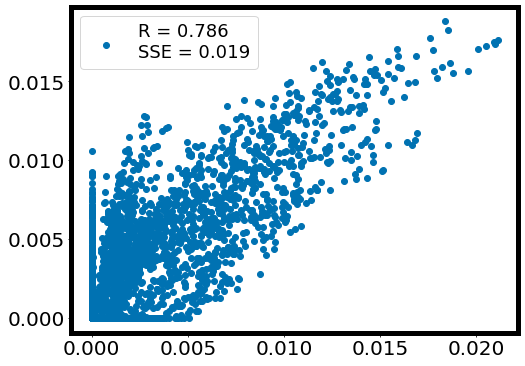

Top 5 profit predictions:  [0.20439912 0.20137429 0.19270341 0.19212826 0.1909033 ]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 488.67122, Residuals: -0.02355, Convergence:   inf
Epoch: 10, Loss: 417.36996, Residuals: -0.02289, Convergence: 0.016373
Epoch: 20, Loss: 353.65463, Residuals: -0.02247, Convergence: 0.016938
Epoch: 30, Loss: 298.54068, Residuals: -0.02248, Convergence: 0.017043
Epoch: 40, Loss: 252.57268, Residuals: -0.02241, Convergence: 0.016580
Epoch: 50, Loss: 214.82027, Residuals: -0.02199, Convergence: 0.015973
Epoch: 60, Loss: 183.64168, Residuals: -0.02163, Convergence: 0.015563
Epoch: 70, Loss: 157.83305, Residuals: -0.02112, Convergence: 0.014908
Epoch: 80, Loss: 136.53120, Residuals: -0.02042, Convergence: 0.014287
Epoch: 90, Loss: 118.63249, Residuals: -0.01967, Convergence: 0.014214
Epoch: 100, Loss: 103.27222, Residuals: -0.01881, Convergence: 0.013907
Epoch: 110, Loss: 90.39996, Residuals: -0.01793, Convergence: 0.013065
Epoch: 120

Epoch: 870, Loss: 398.97226, Residuals: -0.00959, Convergence: 0.001731

Epoch: 879, Evidence: 2016.63379, Convergence: -0.001338


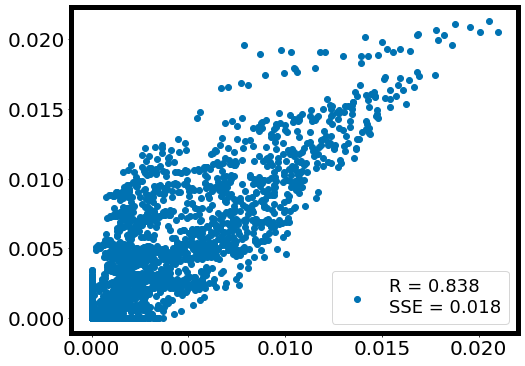

Running trial 26, cycle 1
Epoch: 0, Loss: 196.17615, Residuals: -0.21261, Convergence:   inf
Epoch: 10, Loss: 163.93300, Residuals: -0.21056, Convergence: 0.018136
Epoch: 20, Loss: 136.90886, Residuals: -0.20847, Convergence: 0.018214
Epoch: 30, Loss: 114.24220, Residuals: -0.20571, Convergence: 0.018305
Epoch: 40, Loss: 95.24844, Residuals: -0.20237, Convergence: 0.018381
Epoch: 50, Loss: 79.40854, Residuals: -0.19839, Convergence: 0.017970
Epoch: 60, Loss: 66.28945, Residuals: -0.19367, Convergence: 0.018186
Epoch: 70, Loss: 55.40223, Residuals: -0.18870, Convergence: 0.018012
Epoch: 80, Loss: 46.40841, Residuals: -0.18374, Convergence: 0.017745
Epoch: 90, Loss: 38.99189, Residuals: -0.17883, Convergence: 0.017412
Epoch: 100, Loss: 32.92522, Residuals: -0.17388, Convergence: 0.016702
Epoch: 110, Loss: 27.93339, Residuals: -0.16904, Convergence: 0.016271
Epoch: 120, Loss: 23.80736, Residuals: -0.16418, Convergence: 0.015985
Epoch: 130, Loss: 20.42374, Residuals: -0.15945, Convergence:

Epoch: 890, Loss: 46.78186, Residuals: 0.01136, Convergence: 0.001118

Epoch: 893, Evidence: 219.97237, Convergence: 0.010923
Epoch: 900, Loss: 47.67982, Residuals: 0.01112, Convergence: 0.001680
Epoch: 910, Loss: 47.05936, Residuals: 0.01100, Convergence: 0.000746

Epoch: 910, Evidence: 222.11044, Convergence: 0.009626
Epoch: 910, Loss: 48.63628, Residuals: 0.01100, Convergence:   inf

Epoch: 919, Evidence: 222.48666, Convergence: 0.001691
Epoch: 920, Loss: 49.42602, Residuals: 0.01072, Convergence: 0.001910
Epoch: 930, Loss: 48.66513, Residuals: 0.01046, Convergence: 0.001776
Epoch: 940, Loss: 47.99348, Residuals: 0.01019, Convergence: 0.001085
Epoch: 950, Loss: 47.39318, Residuals: 0.01007, Convergence: 0.000869

Epoch: 950, Evidence: 226.62781, Convergence: 0.018273
Epoch: 950, Loss: 48.76694, Residuals: 0.01007, Convergence:   inf
Epoch: 960, Loss: 48.05475, Residuals: 0.00985, Convergence: 0.000950

Epoch: 960, Evidence: 226.85797, Convergence: 0.001015
Epoch: 960, Loss: 49.57483

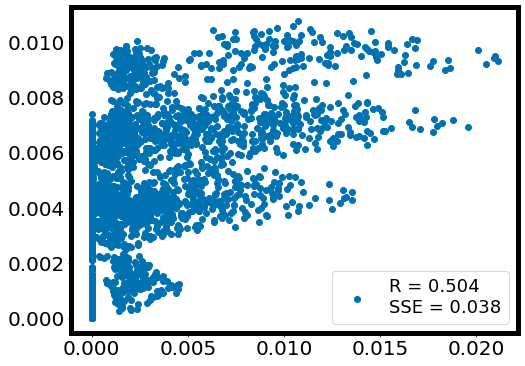

Top 5 profit predictions:  [0.11680435 0.11561735 0.11492144 0.1132689  0.11300188]
Pure exploitation, returning N max objective experiments
Running trial 26, cycle 2
Epoch: 0, Loss: 274.35829, Residuals: -0.24932, Convergence:   inf
Epoch: 10, Loss: 231.77615, Residuals: -0.23207, Convergence: 0.017060
Epoch: 20, Loss: 195.57675, Residuals: -0.21717, Convergence: 0.017155
Epoch: 30, Loss: 165.05161, Residuals: -0.20414, Convergence: 0.017050
Epoch: 40, Loss: 139.56326, Residuals: -0.19232, Convergence: 0.016796
Epoch: 50, Loss: 118.51536, Residuals: -0.18090, Convergence: 0.016289
Epoch: 60, Loss: 101.05231, Residuals: -0.16990, Convergence: 0.015936
Epoch: 70, Loss: 86.48544, Residuals: -0.15968, Convergence: 0.015495
Epoch: 80, Loss: 74.39838, Residuals: -0.15005, Convergence: 0.014904
Epoch: 90, Loss: 64.41259, Residuals: -0.14103, Convergence: 0.014318
Epoch: 100, Loss: 56.06301, Residuals: -0.13287, Convergence: 0.013686
Epoch: 110, Loss: 49.25494, Residuals: -0.12526, Convergenc

Epoch: 900, Loss: 116.79005, Residuals: 0.00512, Convergence: 0.001637
Epoch: 910, Loss: 115.08786, Residuals: 0.00483, Convergence: 0.001134
Epoch: 920, Loss: 113.52404, Residuals: 0.00448, Convergence: 0.001202

Epoch: 922, Evidence: 484.20081, Convergence: -0.000286
Epoch: 930, Loss: 113.11067, Residuals: 0.00351, Convergence: 0.002180
Epoch: 940, Loss: 110.30799, Residuals: 0.00208, Convergence: 0.002287

Epoch: 945, Evidence: 484.27393, Convergence: -0.000135
Epoch: 950, Loss: 108.53683, Residuals: -0.00189, Convergence: 0.004873
Epoch: 960, Loss: 104.67097, Residuals: -0.00562, Convergence: 0.003613
Epoch: 970, Loss: 102.12142, Residuals: -0.00659, Convergence: 0.000228

Epoch: 970, Evidence: 471.29483, Convergence: -0.027678
Epoch: 970, Loss: 124.78172, Residuals: 0.00531, Convergence:   inf
Epoch: 980, Loss: 120.59682, Residuals: 0.00365, Convergence: 0.003330
Epoch: 990, Loss: 117.19699, Residuals: 0.00224, Convergence: 0.002346
Epoch: 1000, Loss: 114.33150, Residuals: 0.00133

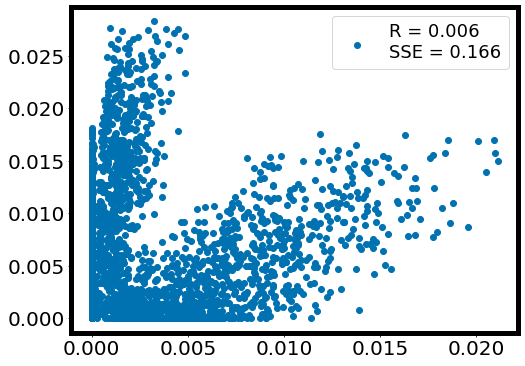

Top 5 profit predictions:  [0.3071269  0.3038773  0.3027764  0.2999718  0.29957113]
Pure exploitation, returning N max objective experiments
Running trial 26, cycle 3
Epoch: 0, Loss: 423.61400, Residuals: -0.09114, Convergence:   inf
Epoch: 10, Loss: 356.98401, Residuals: -0.08536, Convergence: 0.017341
Epoch: 20, Loss: 299.88455, Residuals: -0.08142, Convergence: 0.017746
Epoch: 30, Loss: 251.60913, Residuals: -0.07871, Convergence: 0.017245
Epoch: 40, Loss: 212.21083, Residuals: -0.07539, Convergence: 0.017170
Epoch: 50, Loss: 179.42296, Residuals: -0.07206, Convergence: 0.016832
Epoch: 60, Loss: 152.12605, Residuals: -0.06881, Convergence: 0.016609
Epoch: 70, Loss: 129.24757, Residuals: -0.06572, Convergence: 0.016191
Epoch: 80, Loss: 110.28136, Residuals: -0.06258, Convergence: 0.016025
Epoch: 90, Loss: 94.59299, Residuals: -0.05967, Convergence: 0.015437
Epoch: 100, Loss: 81.69843, Residuals: -0.05691, Convergence: 0.014534
Epoch: 110, Loss: 71.02268, Residuals: -0.05421, Converge

Epoch: 1020, Loss: 149.71498, Residuals: -0.00633, Convergence: 0.001375
Epoch: 1030, Loss: 147.79189, Residuals: -0.00652, Convergence: 0.001226
Epoch: 1040, Loss: 146.11023, Residuals: -0.00657, Convergence: 0.001120

Epoch: 1045, Evidence: 803.16693, Convergence: 0.030418
Epoch: 1050, Loss: 154.41380, Residuals: -0.00668, Convergence: 0.001422
Epoch: 1060, Loss: 152.42455, Residuals: -0.00682, Convergence: 0.001247
Epoch: 1070, Loss: 150.64386, Residuals: -0.00686, Convergence: 0.001104

Epoch: 1072, Evidence: 807.27380, Convergence: 0.005087
Epoch: 1080, Loss: 157.29062, Residuals: -0.00701, Convergence: 0.001443
Epoch: 1090, Loss: 155.28232, Residuals: -0.00711, Convergence: 0.001187
Epoch: 1100, Loss: 153.49084, Residuals: -0.00714, Convergence: 0.001098

Epoch: 1104, Evidence: 809.29285, Convergence: 0.002495
Epoch: 1110, Loss: 159.10651, Residuals: -0.00721, Convergence: 0.001343
Epoch: 1120, Loss: 157.02205, Residuals: -0.00735, Convergence: 0.001297
Epoch: 1130, Loss: 155.194

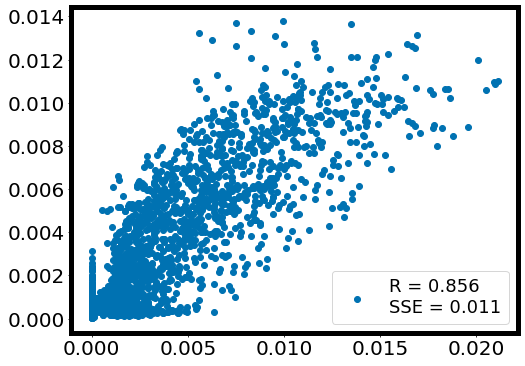

Top 5 profit predictions:  [0.149577   0.14503665 0.14103861 0.13788785 0.13764451]
Pure exploitation, returning N max objective experiments
Running trial 26, cycle 4
Epoch: 0, Loss: 565.61528, Residuals: -0.13224, Convergence:   inf
Epoch: 10, Loss: 476.43790, Residuals: -0.12153, Convergence: 0.017505
Epoch: 20, Loss: 398.61255, Residuals: -0.11383, Convergence: 0.018330
Epoch: 30, Loss: 332.95120, Residuals: -0.10724, Convergence: 0.017512
Epoch: 40, Loss: 280.64386, Residuals: -0.10008, Convergence: 0.017222
Epoch: 50, Loss: 237.31021, Residuals: -0.09350, Convergence: 0.016670
Epoch: 60, Loss: 201.38319, Residuals: -0.08742, Convergence: 0.016348
Epoch: 70, Loss: 171.67583, Residuals: -0.08178, Convergence: 0.015825
Epoch: 80, Loss: 147.18794, Residuals: -0.07643, Convergence: 0.014875
Epoch: 90, Loss: 126.90366, Residuals: -0.07133, Convergence: 0.014744
Epoch: 100, Loss: 110.01389, Residuals: -0.06660, Convergence: 0.014061
Epoch: 110, Loss: 96.03440, Residuals: -0.06215, Conver

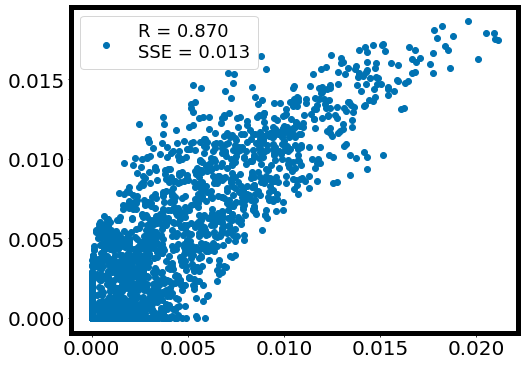

Top 5 profit predictions:  [0.20266744 0.19838335 0.19730864 0.19659752 0.19550978]
Pure exploitation, returning N max objective experiments
Running trial 26, cycle 5
Epoch: 0, Loss: 583.00310, Residuals: -0.09294, Convergence:   inf
Epoch: 10, Loss: 492.46014, Residuals: -0.08588, Convergence: 0.017248
Epoch: 20, Loss: 413.59729, Residuals: -0.08026, Convergence: 0.017824
Epoch: 30, Loss: 346.85873, Residuals: -0.07550, Convergence: 0.017264
Epoch: 40, Loss: 292.80157, Residuals: -0.07091, Convergence: 0.016973
Epoch: 50, Loss: 247.97592, Residuals: -0.06630, Convergence: 0.016566
Epoch: 60, Loss: 210.95621, Residuals: -0.06201, Convergence: 0.016003
Epoch: 70, Loss: 180.42995, Residuals: -0.05783, Convergence: 0.015533
Epoch: 80, Loss: 155.15485, Residuals: -0.05390, Convergence: 0.014983
Epoch: 90, Loss: 134.03183, Residuals: -0.05014, Convergence: 0.014450
Epoch: 100, Loss: 116.46558, Residuals: -0.04662, Convergence: 0.013885
Epoch: 110, Loss: 101.85102, Residuals: -0.04337, Conve

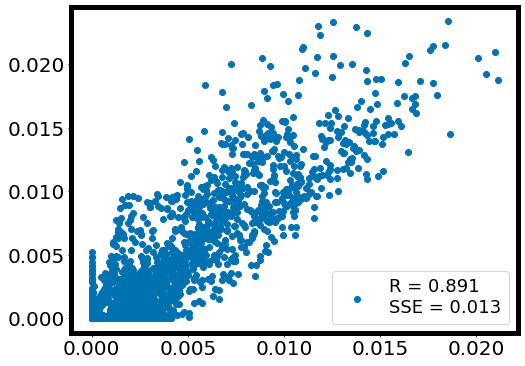

Top 5 profit predictions:  [0.2578725  0.25268468 0.2525728  0.25061247 0.24439265]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 496.75978, Residuals: -0.12476, Convergence:   inf
Epoch: 10, Loss: 423.14313, Residuals: -0.11447, Convergence: 0.016638
Epoch: 20, Loss: 357.64459, Residuals: -0.10554, Convergence: 0.017080
Epoch: 30, Loss: 302.59885, Residuals: -0.09749, Convergence: 0.016613
Epoch: 40, Loss: 257.25064, Residuals: -0.09027, Convergence: 0.016287
Epoch: 50, Loss: 219.70927, Residuals: -0.08356, Convergence: 0.015468
Epoch: 60, Loss: 188.76747, Residuals: -0.07701, Convergence: 0.014795
Epoch: 70, Loss: 163.18558, Residuals: -0.07091, Convergence: 0.014266
Epoch: 80, Loss: 142.00356, Residuals: -0.06528, Convergence: 0.013748
Epoch: 90, Loss: 124.11654, Residuals: -0.06002, Convergence: 0.013347
Epoch: 100, Loss: 109.08327, Residuals: -0.05514, Convergence: 0.012802
Epoch: 110, Loss: 96.56150, Residuals: -0.05064, Convergence: 0.011893
Epoch: 120

Epoch: 900, Loss: 405.89172, Residuals: -0.00770, Convergence: 0.001198

Epoch: 905, Evidence: 1968.10107, Convergence: 0.001838
Epoch: 910, Loss: 404.95767, Residuals: -0.00792, Convergence: 0.001184

Epoch: 916, Evidence: 1967.39331, Convergence: -0.000360
Epoch: 920, Loss: 401.63434, Residuals: -0.00916, Convergence: 0.002248
Epoch: 930, Loss: 395.45352, Residuals: -0.01029, Convergence: 0.001415

Epoch: 935, Evidence: 1958.28992, Convergence: -0.005010


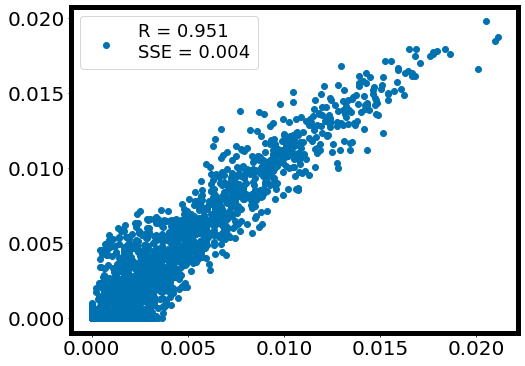

Running trial 27, cycle 1
Epoch: 0, Loss: 140.73433, Residuals: -1.22795, Convergence:   inf
Epoch: 10, Loss: 118.59081, Residuals: -1.13127, Convergence: 0.017329
Epoch: 20, Loss: 99.92898, Residuals: -1.04490, Convergence: 0.017229
Epoch: 30, Loss: 84.21078, Residuals: -0.96651, Convergence: 0.017316
Epoch: 40, Loss: 70.88361, Residuals: -0.89521, Convergence: 0.017406
Epoch: 50, Loss: 59.65940, Residuals: -0.83076, Convergence: 0.017355
Epoch: 60, Loss: 50.26894, Residuals: -0.77257, Convergence: 0.017194
Epoch: 70, Loss: 42.45649, Residuals: -0.71969, Convergence: 0.016807
Epoch: 80, Loss: 35.95581, Residuals: -0.67177, Convergence: 0.016611
Epoch: 90, Loss: 30.58186, Residuals: -0.62814, Convergence: 0.015641
Epoch: 100, Loss: 26.21296, Residuals: -0.58792, Convergence: 0.015076
Epoch: 110, Loss: 22.57888, Residuals: -0.55109, Convergence: 0.014860
Epoch: 120, Loss: 19.57340, Residuals: -0.51696, Convergence: 0.014428
Epoch: 130, Loss: 17.10307, Residuals: -0.48513, Convergence: 0


Epoch: 713, Evidence: 212.91609, Convergence: 0.002781

Epoch: 718, Evidence: 213.61499, Convergence: 0.003272
Epoch: 720, Loss: 58.93900, Residuals: 0.01008, Convergence: 0.001276

Epoch: 721, Evidence: 216.00333, Convergence: 0.011057

Epoch: 722, Evidence: 213.33754, Convergence: -0.012496


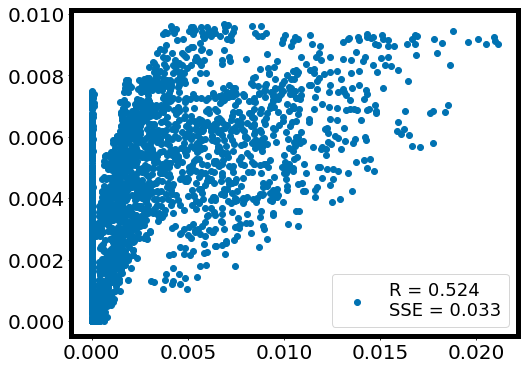

Top 5 profit predictions:  [0.10649766 0.10598854 0.10597433 0.10588746 0.10576732]
Pure exploitation, returning N max objective experiments
Running trial 27, cycle 2
Epoch: 0, Loss: 147.26810, Residuals: -0.68234, Convergence:   inf
Epoch: 10, Loss: 126.64371, Residuals: -0.62498, Convergence: 0.015408
Epoch: 20, Loss: 108.62163, Residuals: -0.57299, Convergence: 0.015516
Epoch: 30, Loss: 93.03967, Residuals: -0.52629, Convergence: 0.015689
Epoch: 40, Loss: 79.55451, Residuals: -0.48443, Convergence: 0.015841
Epoch: 50, Loss: 67.97832, Residuals: -0.44685, Convergence: 0.015828
Epoch: 60, Loss: 58.15501, Residuals: -0.41301, Convergence: 0.015622
Epoch: 70, Loss: 49.90194, Residuals: -0.38239, Convergence: 0.015175
Epoch: 80, Loss: 42.98687, Residuals: -0.35454, Convergence: 0.014813
Epoch: 90, Loss: 37.22248, Residuals: -0.32916, Convergence: 0.014208
Epoch: 100, Loss: 32.42339, Residuals: -0.30600, Convergence: 0.013550
Epoch: 110, Loss: 28.45235, Residuals: -0.28468, Convergence: 0

Epoch: 990, Loss: 73.15642, Residuals: -0.00599, Convergence: 0.003088
Epoch: 1000, Loss: 71.36604, Residuals: -0.00625, Convergence: 0.002344
Epoch: 1010, Loss: 69.91044, Residuals: -0.00614, Convergence: 0.002724

Epoch: 1012, Evidence: 436.02069, Convergence: -0.003504
Epoch: 1020, Loss: 79.33659, Residuals: -0.00528, Convergence: 0.001786
Epoch: 1030, Loss: 77.94466, Residuals: -0.00526, Convergence: 0.001319
Epoch: 1040, Loss: 76.71978, Residuals: -0.00518, Convergence: 0.001374
Epoch: 1050, Loss: 75.60522, Residuals: -0.00507, Convergence: 0.001707

Epoch: 1058, Evidence: 454.22400, Convergence: 0.036712
Epoch: 1060, Loss: 80.46873, Residuals: -0.00495, Convergence: 0.002153
Epoch: 1070, Loss: 78.98995, Residuals: -0.00498, Convergence: 0.001231
Epoch: 1080, Loss: 77.69923, Residuals: -0.00496, Convergence: 0.001156
Epoch: 1090, Loss: 76.53342, Residuals: -0.00489, Convergence: 0.001416

Epoch: 1095, Evidence: 456.23685, Convergence: 0.004412
Epoch: 1100, Loss: 81.02096, Residual

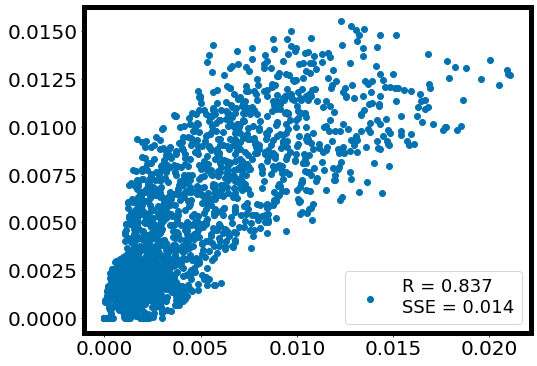

Top 5 profit predictions:  [0.1684373  0.16682887 0.16581993 0.16367717 0.16307595]
Pure exploitation, returning N max objective experiments
Running trial 27, cycle 3
Epoch: 0, Loss: 217.19885, Residuals: -0.57780, Convergence:   inf
Epoch: 10, Loss: 187.02707, Residuals: -0.52804, Convergence: 0.015408
Epoch: 20, Loss: 160.00937, Residuals: -0.48352, Convergence: 0.015915
Epoch: 30, Loss: 136.49756, Residuals: -0.44332, Convergence: 0.016066
Epoch: 40, Loss: 116.44865, Residuals: -0.40662, Convergence: 0.015874
Epoch: 50, Loss: 99.58932, Residuals: -0.37292, Convergence: 0.015662
Epoch: 60, Loss: 85.46244, Residuals: -0.34215, Convergence: 0.015222
Epoch: 70, Loss: 73.70161, Residuals: -0.31385, Convergence: 0.014613
Epoch: 80, Loss: 63.95630, Residuals: -0.28776, Convergence: 0.013947
Epoch: 90, Loss: 55.86055, Residuals: -0.26382, Convergence: 0.013293
Epoch: 100, Loss: 49.16800, Residuals: -0.24181, Convergence: 0.012260
Epoch: 110, Loss: 43.60828, Residuals: -0.22168, Convergence:

Epoch: 950, Loss: 161.91599, Residuals: -0.00357, Convergence: 0.001394

Epoch: 953, Evidence: 853.93225, Convergence: 0.004378
Epoch: 960, Loss: 165.36707, Residuals: -0.00357, Convergence: 0.001729

Epoch: 968, Evidence: 856.93848, Convergence: 0.003508
Epoch: 970, Loss: 168.54288, Residuals: -0.00361, Convergence: 0.001915
Epoch: 980, Loss: 165.71909, Residuals: -0.00365, Convergence: 0.001713

Epoch: 987, Evidence: 857.80255, Convergence: 0.001007
Epoch: 990, Loss: 168.48752, Residuals: -0.00353, Convergence: 0.001693

Epoch: 996, Evidence: 861.04425, Convergence: 0.003765
Epoch: 1000, Loss: 170.28891, Residuals: -0.00340, Convergence: 0.001901
Epoch: 1010, Loss: 167.72981, Residuals: -0.00322, Convergence: 0.001187

Epoch: 1018, Evidence: 860.01038, Convergence: -0.001202
Epoch: 1020, Loss: 173.79553, Residuals: -0.00344, Convergence: 0.001313

Epoch: 1022, Evidence: 869.27100, Convergence: 0.009464

Epoch: 1028, Evidence: 870.63281, Convergence: 0.001564
Epoch: 1030, Loss: 177.86

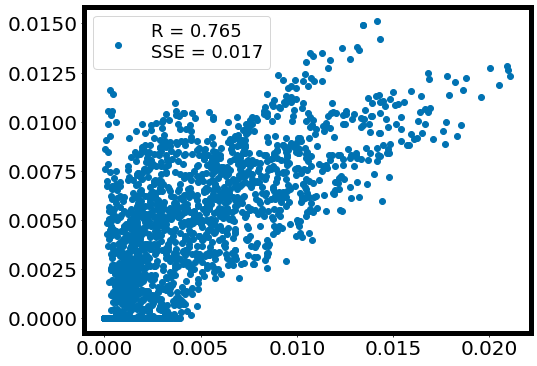

Top 5 profit predictions:  [0.16411245 0.1611556  0.15743108 0.15442416 0.15007535]
Pure exploitation, returning N max objective experiments
Running trial 27, cycle 4
Epoch: 0, Loss: 297.14024, Residuals: -0.68867, Convergence:   inf
Epoch: 10, Loss: 254.40154, Residuals: -0.62781, Convergence: 0.016051
Epoch: 20, Loss: 216.32443, Residuals: -0.57317, Convergence: 0.016506
Epoch: 30, Loss: 183.52087, Residuals: -0.52364, Convergence: 0.016598
Epoch: 40, Loss: 155.84085, Residuals: -0.47839, Convergence: 0.016381
Epoch: 50, Loss: 132.70410, Residuals: -0.43706, Convergence: 0.016038
Epoch: 60, Loss: 113.45004, Residuals: -0.39923, Convergence: 0.015600
Epoch: 70, Loss: 97.52005, Residuals: -0.36445, Convergence: 0.015059
Epoch: 80, Loss: 84.22002, Residuals: -0.33262, Convergence: 0.014537
Epoch: 90, Loss: 73.19057, Residuals: -0.30360, Convergence: 0.013770
Epoch: 100, Loss: 64.06360, Residuals: -0.27718, Convergence: 0.013063
Epoch: 110, Loss: 56.52183, Residuals: -0.25302, Convergenc

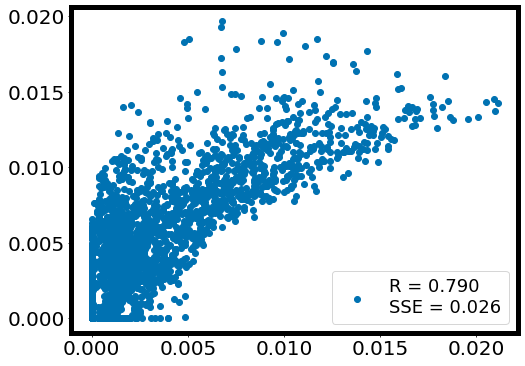

Top 5 profit predictions:  [0.19241804 0.19021924 0.18468367 0.18329258 0.18254218]
Pure exploitation, returning N max objective experiments
Running trial 27, cycle 5
Epoch: 0, Loss: 389.72090, Residuals: -0.76756, Convergence:   inf
Epoch: 10, Loss: 333.04059, Residuals: -0.69807, Convergence: 0.016273
Epoch: 20, Loss: 282.58362, Residuals: -0.63577, Convergence: 0.016717
Epoch: 30, Loss: 239.31161, Residuals: -0.57934, Convergence: 0.016727
Epoch: 40, Loss: 202.96776, Residuals: -0.52795, Convergence: 0.016485
Epoch: 50, Loss: 172.82399, Residuals: -0.48072, Convergence: 0.016019
Epoch: 60, Loss: 147.95341, Residuals: -0.43735, Convergence: 0.015466
Epoch: 70, Loss: 127.33192, Residuals: -0.39783, Convergence: 0.014897
Epoch: 80, Loss: 110.32021, Residuals: -0.36177, Convergence: 0.014154
Epoch: 90, Loss: 96.13319, Residuals: -0.32889, Convergence: 0.013524
Epoch: 100, Loss: 84.45494, Residuals: -0.29900, Convergence: 0.012598
Epoch: 110, Loss: 74.91610, Residuals: -0.27189, Converge


Epoch: 905, Evidence: 1671.98889, Convergence: -0.004293
Epoch: 910, Loss: 337.96097, Residuals: -0.00652, Convergence: 0.002890
Epoch: 920, Loss: 330.51248, Residuals: -0.00732, Convergence: 0.002364
Epoch: 930, Loss: 324.93320, Residuals: -0.00677, Convergence: 0.001465

Epoch: 931, Evidence: 1679.06067, Convergence: -0.000063


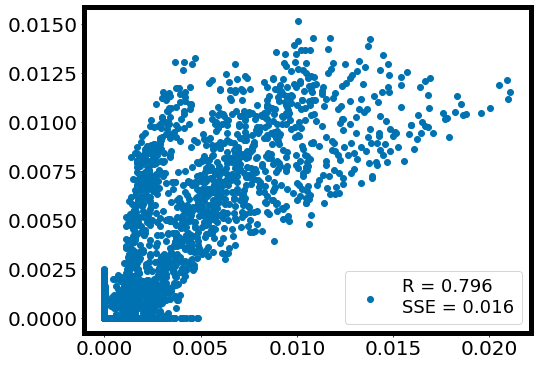

Top 5 profit predictions:  [0.16448306 0.15740547 0.15593666 0.15562744 0.15460129]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 396.66380, Residuals: -0.70137, Convergence:   inf
Epoch: 10, Loss: 343.75595, Residuals: -0.63684, Convergence: 0.014962
Epoch: 20, Loss: 295.50562, Residuals: -0.57908, Convergence: 0.015383
Epoch: 30, Loss: 253.11859, Residuals: -0.52648, Convergence: 0.015938
Epoch: 40, Loss: 216.57565, Residuals: -0.47850, Convergence: 0.015456
Epoch: 50, Loss: 186.30476, Residuals: -0.43462, Convergence: 0.014880
Epoch: 60, Loss: 160.96985, Residuals: -0.39452, Convergence: 0.014555
Epoch: 70, Loss: 139.89410, Residuals: -0.35807, Convergence: 0.013862
Epoch: 80, Loss: 122.38460, Residuals: -0.32502, Convergence: 0.013086
Epoch: 90, Loss: 107.94097, Residuals: -0.29507, Convergence: 0.012447
Epoch: 100, Loss: 95.82600, Residuals: -0.26788, Convergence: 0.011603
Epoch: 110, Loss: 85.71983, Residuals: -0.24336, Convergence: 0.010798
Epoch: 120,

Epoch: 930, Loss: 383.47113, Residuals: -0.01793, Convergence: 0.001923
Epoch: 940, Loss: 374.54443, Residuals: -0.01662, Convergence: 0.001868

Epoch: 948, Evidence: 1969.11328, Convergence: -0.002459
Epoch: 950, Loss: 407.83270, Residuals: -0.01053, Convergence: 0.002899
Epoch: 960, Loss: 399.01880, Residuals: -0.01267, Convergence: 0.002089
Epoch: 970, Loss: 392.51666, Residuals: -0.01209, Convergence: 0.001569
Epoch: 980, Loss: 387.50635, Residuals: -0.01048, Convergence: 0.001009

Epoch: 982, Evidence: 1978.91357, Convergence: 0.002506
Epoch: 990, Loss: 389.32498, Residuals: -0.01243, Convergence: 0.001761
Epoch: 1000, Loss: 383.69281, Residuals: -0.01277, Convergence: 0.001099

Epoch: 1004, Evidence: 1980.10547, Convergence: 0.000602
Epoch: 1010, Loss: 380.11304, Residuals: -0.02033, Convergence: 0.002236
Epoch: 1020, Loss: 373.57587, Residuals: -0.01857, Convergence: 0.002341

Epoch: 1024, Evidence: 1967.38232, Convergence: -0.005861


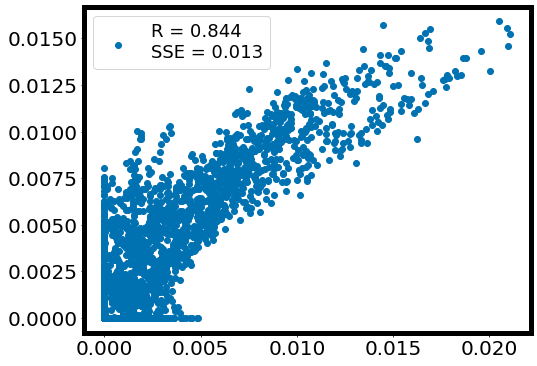

Running trial 28, cycle 1
Epoch: 0, Loss: 106.10336, Residuals: -0.40089, Convergence:   inf
Epoch: 10, Loss: 90.69294, Residuals: -0.37596, Convergence: 0.015935
Epoch: 20, Loss: 77.41205, Residuals: -0.35377, Convergence: 0.015946
Epoch: 30, Loss: 66.12127, Residuals: -0.33431, Convergence: 0.015833
Epoch: 40, Loss: 56.56314, Residuals: -0.31730, Convergence: 0.015647
Epoch: 50, Loss: 48.50743, Residuals: -0.30201, Convergence: 0.015407
Epoch: 60, Loss: 41.71322, Residuals: -0.28810, Convergence: 0.015105
Epoch: 70, Loss: 35.96774, Residuals: -0.27564, Convergence: 0.014782
Epoch: 80, Loss: 31.11622, Residuals: -0.26424, Convergence: 0.014434
Epoch: 90, Loss: 27.02199, Residuals: -0.25384, Convergence: 0.014012
Epoch: 100, Loss: 23.57267, Residuals: -0.24427, Convergence: 0.013526
Epoch: 110, Loss: 20.66959, Residuals: -0.23535, Convergence: 0.012993
Epoch: 120, Loss: 18.26212, Residuals: -0.22661, Convergence: 0.012118
Epoch: 130, Loss: 16.22531, Residuals: -0.21838, Convergence: 0.

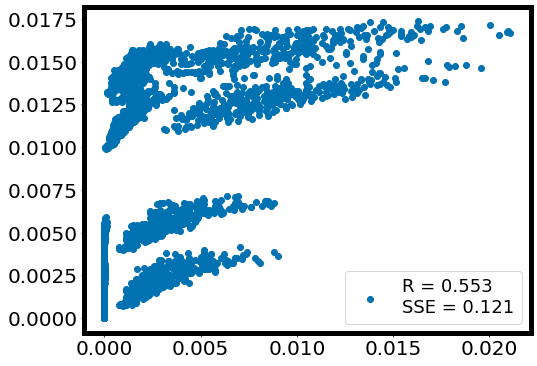

Top 5 profit predictions:  [0.18856642 0.18820526 0.18817675 0.18812089 0.18796259]
Pure exploitation, returning N max objective experiments
Running trial 28, cycle 2
Epoch: 0, Loss: 138.91667, Residuals: -0.75469, Convergence:   inf
Epoch: 10, Loss: 120.97028, Residuals: -0.69067, Convergence: 0.014194
Epoch: 20, Loss: 104.90933, Residuals: -0.63271, Convergence: 0.014419
Epoch: 30, Loss: 90.89631, Residuals: -0.58026, Convergence: 0.014444
Epoch: 40, Loss: 78.76429, Residuals: -0.53283, Convergence: 0.014399
Epoch: 50, Loss: 68.41771, Residuals: -0.48995, Convergence: 0.014134
Epoch: 60, Loss: 59.55710, Residuals: -0.45121, Convergence: 0.013851
Epoch: 70, Loss: 52.05213, Residuals: -0.41597, Convergence: 0.013407
Epoch: 80, Loss: 45.75651, Residuals: -0.38376, Convergence: 0.012775
Epoch: 90, Loss: 40.52647, Residuals: -0.35416, Convergence: 0.012107
Epoch: 100, Loss: 36.14808, Residuals: -0.32709, Convergence: 0.011203
Epoch: 110, Loss: 32.58142, Residuals: -0.30213, Convergence: 0

Epoch: 980, Loss: 88.13821, Residuals: -0.00201, Convergence: 0.001650
Epoch: 990, Loss: 86.90242, Residuals: -0.00210, Convergence: 0.001586
Epoch: 1000, Loss: 85.78719, Residuals: -0.00214, Convergence: 0.001317

Epoch: 1004, Evidence: 464.85236, Convergence: -0.002964

Epoch: 1007, Evidence: 482.62497, Convergence: 0.033970

Epoch: 1008, Evidence: 486.55246, Convergence: 0.008072
Epoch: 1010, Loss: 102.63184, Residuals: -0.00165, Convergence: 0.001045

Epoch: 1012, Evidence: 491.68808, Convergence: 0.010445

Epoch: 1017, Evidence: 494.82660, Convergence: 0.006343
Epoch: 1020, Loss: 108.20278, Residuals: -0.00170, Convergence: 0.001140

Epoch: 1029, Evidence: 497.46594, Convergence: 0.005306
Epoch: 1030, Loss: 109.90957, Residuals: -0.00174, Convergence: 0.001070
Epoch: 1040, Loss: 108.73045, Residuals: -0.00178, Convergence: 0.000991

Epoch: 1040, Evidence: 496.67899, Convergence: -0.001584


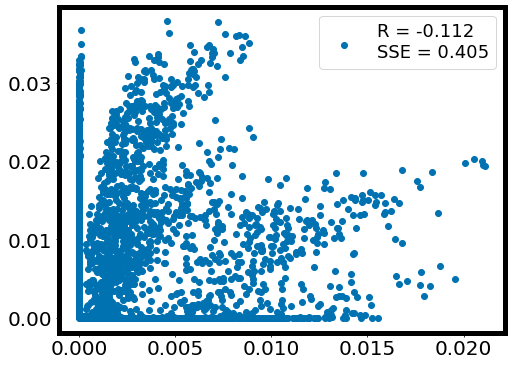

Top 5 profit predictions:  [0.4105495  0.40923193 0.3997847  0.3990821  0.39718688]
Pure exploitation, returning N max objective experiments
Running trial 28, cycle 3
Epoch: 0, Loss: 206.99345, Residuals: -0.66910, Convergence:   inf
Epoch: 10, Loss: 179.19020, Residuals: -0.60983, Convergence: 0.014757
Epoch: 20, Loss: 154.44797, Residuals: -0.55568, Convergence: 0.015128
Epoch: 30, Loss: 132.74826, Residuals: -0.50632, Convergence: 0.015313
Epoch: 40, Loss: 114.15670, Residuals: -0.46114, Convergence: 0.015046
Epoch: 50, Loss: 98.49039, Residuals: -0.41975, Convergence: 0.014754
Epoch: 60, Loss: 85.26381, Residuals: -0.38193, Convergence: 0.014322
Epoch: 70, Loss: 74.17477, Residuals: -0.34742, Convergence: 0.013789
Epoch: 80, Loss: 64.89901, Residuals: -0.31616, Convergence: 0.013170
Epoch: 90, Loss: 57.18322, Residuals: -0.28782, Convergence: 0.012120
Epoch: 100, Loss: 50.79430, Residuals: -0.26221, Convergence: 0.011852
Epoch: 110, Loss: 45.48057, Residuals: -0.23905, Convergence:

Epoch: 950, Loss: 179.73531, Residuals: -0.01138, Convergence: 0.002349
Epoch: 960, Loss: 173.40799, Residuals: -0.01329, Convergence: 0.003579
Epoch: 970, Loss: 169.35428, Residuals: -0.01197, Convergence: 0.002109
Epoch: 980, Loss: 166.30090, Residuals: -0.00998, Convergence: 0.001226

Epoch: 985, Evidence: 796.55298, Convergence: -0.003270
Epoch: 990, Loss: 183.51239, Residuals: -0.00704, Convergence: 0.002832
Epoch: 1000, Loss: 179.09239, Residuals: -0.00794, Convergence: 0.002479
Epoch: 1010, Loss: 175.63254, Residuals: -0.00780, Convergence: 0.001729
Epoch: 1020, Loss: 172.79013, Residuals: -0.00753, Convergence: 0.001404

Epoch: 1026, Evidence: 810.02783, Convergence: 0.013419
Epoch: 1030, Loss: 174.01657, Residuals: -0.00744, Convergence: 0.001535
Epoch: 1040, Loss: 170.65973, Residuals: -0.00810, Convergence: 0.001717
Epoch: 1050, Loss: 168.02191, Residuals: -0.00802, Convergence: 0.001580

Epoch: 1051, Evidence: 806.84619, Convergence: -0.003943


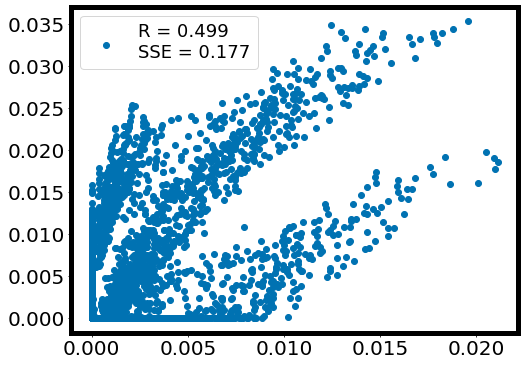

Top 5 profit predictions:  [0.38335773 0.37935165 0.3789777  0.3783997  0.36897913]
Pure exploitation, returning N max objective experiments
Running trial 28, cycle 4
Epoch: 0, Loss: 289.43459, Residuals: -0.33892, Convergence:   inf
Epoch: 10, Loss: 249.39891, Residuals: -0.30960, Convergence: 0.015263
Epoch: 20, Loss: 214.00894, Residuals: -0.28258, Convergence: 0.015539
Epoch: 30, Loss: 183.32089, Residuals: -0.25772, Convergence: 0.015592
Epoch: 40, Loss: 157.25687, Residuals: -0.23498, Convergence: 0.015302
Epoch: 50, Loss: 135.54004, Residuals: -0.21389, Convergence: 0.014704
Epoch: 60, Loss: 117.40895, Residuals: -0.19481, Convergence: 0.014240
Epoch: 70, Loss: 102.14376, Residuals: -0.17753, Convergence: 0.013732
Epoch: 80, Loss: 89.35145, Residuals: -0.16199, Convergence: 0.013097
Epoch: 90, Loss: 78.66326, Residuals: -0.14816, Convergence: 0.012481
Epoch: 100, Loss: 69.71088, Residuals: -0.13583, Convergence: 0.011719
Epoch: 110, Loss: 62.20065, Residuals: -0.12479, Convergen


Epoch: 916, Evidence: 1164.90723, Convergence: 0.001565

Epoch: 917, Evidence: 1166.00342, Convergence: 0.000940
Epoch: 920, Loss: 261.99573, Residuals: -0.01247, Convergence: 0.001755
Epoch: 930, Loss: 257.95215, Residuals: -0.01313, Convergence: 0.001380
Epoch: 940, Loss: 254.66336, Residuals: -0.01328, Convergence: 0.001188
Epoch: 950, Loss: 251.98744, Residuals: -0.01308, Convergence: 0.000819

Epoch: 950, Evidence: 1157.76648, Convergence: -0.006168
Epoch: 950, Loss: 264.16284, Residuals: -0.01216, Convergence:   inf

Epoch: 951, Evidence: 1167.13611, Convergence: 0.001910

Epoch: 952, Evidence: 1167.54480, Convergence: 0.000350
Epoch: 960, Loss: 261.70929, Residuals: -0.01287, Convergence: 0.001531
Epoch: 970, Loss: 258.01898, Residuals: -0.01327, Convergence: 0.001289
Epoch: 980, Loss: 254.97098, Residuals: -0.01327, Convergence: 0.001037

Epoch: 984, Evidence: 1159.58972, Convergence: -0.006508


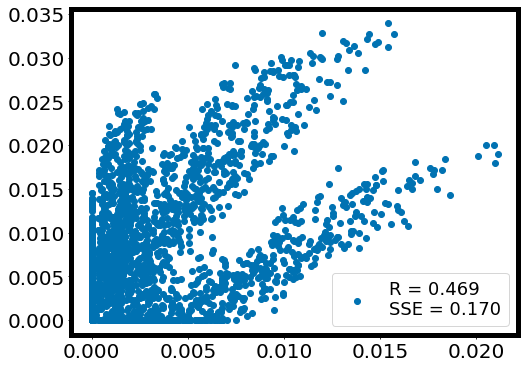

Top 5 profit predictions:  [0.3738093  0.36157104 0.35501784 0.35491183 0.35465622]
Pure exploitation, returning N max objective experiments
Running trial 28, cycle 5
Epoch: 0, Loss: 379.22798, Residuals: -0.35743, Convergence:   inf
Epoch: 10, Loss: 325.97580, Residuals: -0.32584, Convergence: 0.015540
Epoch: 20, Loss: 278.76541, Residuals: -0.29663, Convergence: 0.015890
Epoch: 30, Loss: 238.06789, Residuals: -0.26989, Convergence: 0.015880
Epoch: 40, Loss: 203.60622, Residuals: -0.24542, Convergence: 0.015647
Epoch: 50, Loss: 174.70340, Residuals: -0.22319, Convergence: 0.015491
Epoch: 60, Loss: 150.01851, Residuals: -0.20306, Convergence: 0.015208
Epoch: 70, Loss: 129.15291, Residuals: -0.18486, Convergence: 0.014842
Epoch: 80, Loss: 111.73431, Residuals: -0.16851, Convergence: 0.014350
Epoch: 90, Loss: 97.12945, Residuals: -0.15376, Convergence: 0.013931
Epoch: 100, Loss: 84.96556, Residuals: -0.14033, Convergence: 0.013191
Epoch: 110, Loss: 74.88738, Residuals: -0.12820, Converge

Epoch: 920, Loss: 318.47101, Residuals: -0.00923, Convergence: 0.003400
Epoch: 930, Loss: 310.86096, Residuals: -0.01021, Convergence: 0.002083

Epoch: 939, Evidence: 1510.55945, Convergence: -0.006621


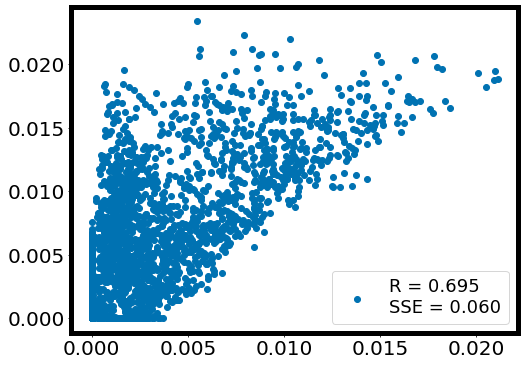

Top 5 profit predictions:  [0.22437085 0.22097231 0.22081679 0.21259578 0.21224682]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 462.48760, Residuals: -0.33355, Convergence:   inf
Epoch: 10, Loss: 397.27100, Residuals: -0.30385, Convergence: 0.015607
Epoch: 20, Loss: 339.44830, Residuals: -0.27669, Convergence: 0.015988
Epoch: 30, Loss: 289.38718, Residuals: -0.25222, Convergence: 0.016145
Epoch: 40, Loss: 247.47273, Residuals: -0.22982, Convergence: 0.015446
Epoch: 50, Loss: 212.19067, Residuals: -0.20901, Convergence: 0.015558
Epoch: 60, Loss: 182.08366, Residuals: -0.19020, Convergence: 0.015178
Epoch: 70, Loss: 157.04750, Residuals: -0.17298, Convergence: 0.014804
Epoch: 80, Loss: 135.97516, Residuals: -0.15728, Convergence: 0.014334
Epoch: 90, Loss: 118.39945, Residuals: -0.14294, Convergence: 0.013421
Epoch: 100, Loss: 103.80628, Residuals: -0.12998, Convergence: 0.012967
Epoch: 110, Loss: 91.61518, Residuals: -0.11819, Convergence: 0.012255
Epoch: 120

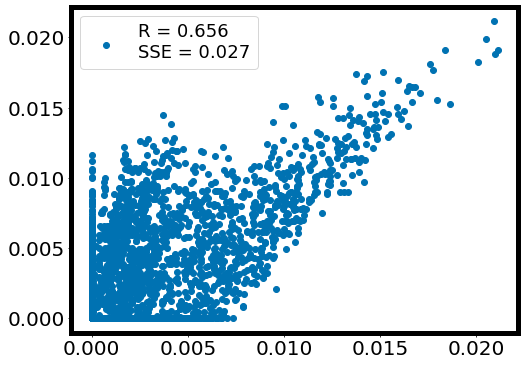

Running trial 29, cycle 1
Epoch: 0, Loss: 95.28506, Residuals: -0.79620, Convergence:   inf
Epoch: 10, Loss: 81.54129, Residuals: -0.73722, Convergence: 0.015495
Epoch: 20, Loss: 70.00694, Residuals: -0.68244, Convergence: 0.015441
Epoch: 30, Loss: 60.22814, Residuals: -0.63123, Convergence: 0.014986
Epoch: 40, Loss: 52.01928, Residuals: -0.58469, Convergence: 0.014574
Epoch: 50, Loss: 45.11929, Residuals: -0.54233, Convergence: 0.014130
Epoch: 60, Loss: 39.31298, Residuals: -0.50408, Convergence: 0.013652
Epoch: 70, Loss: 34.44732, Residuals: -0.46951, Convergence: 0.013012
Epoch: 80, Loss: 30.33565, Residuals: -0.43875, Convergence: 0.012668
Epoch: 90, Loss: 26.85894, Residuals: -0.41123, Convergence: 0.012014
Epoch: 100, Loss: 23.88231, Residuals: -0.38686, Convergence: 0.011660
Epoch: 110, Loss: 21.31760, Residuals: -0.36541, Convergence: 0.011268
Epoch: 120, Loss: 19.11460, Residuals: -0.34631, Convergence: 0.010686
Epoch: 130, Loss: 17.17519, Residuals: -0.32914, Convergence: 0.0

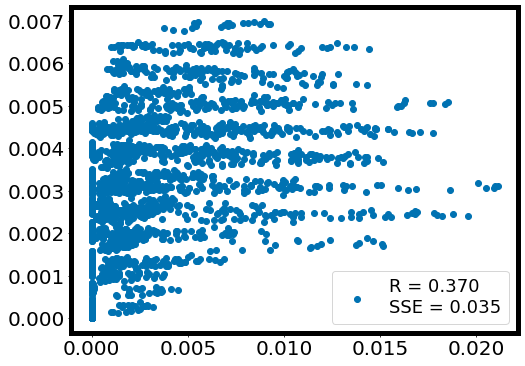

Top 5 profit predictions:  [0.07646161 0.07593508 0.07573166 0.0752653  0.07496601]
Pure exploitation, returning N max objective experiments
Running trial 29, cycle 2
Epoch: 0, Loss: 307.37331, Residuals: -0.77063, Convergence:   inf
Epoch: 10, Loss: 261.03940, Residuals: -0.70659, Convergence: 0.016357
Epoch: 20, Loss: 221.85817, Residuals: -0.64808, Convergence: 0.016423
Epoch: 30, Loss: 188.42793, Residuals: -0.59485, Convergence: 0.016470
Epoch: 40, Loss: 160.15825, Residuals: -0.54677, Convergence: 0.016260
Epoch: 50, Loss: 136.63895, Residuals: -0.50356, Convergence: 0.015794
Epoch: 60, Loss: 117.21703, Residuals: -0.46471, Convergence: 0.015168
Epoch: 70, Loss: 101.24011, Residuals: -0.42975, Convergence: 0.014475
Epoch: 80, Loss: 87.60692, Residuals: -0.39813, Convergence: 0.014496
Epoch: 90, Loss: 76.02526, Residuals: -0.36971, Convergence: 0.014047
Epoch: 100, Loss: 66.49114, Residuals: -0.34345, Convergence: 0.013273
Epoch: 110, Loss: 58.48029, Residuals: -0.31903, Convergen


Epoch: 987, Evidence: 467.09229, Convergence: 0.012136
Epoch: 990, Loss: 97.59628, Residuals: -0.00485, Convergence: 0.001390
Epoch: 1000, Loss: 96.00513, Residuals: -0.00529, Convergence: 0.001686
Epoch: 1010, Loss: 94.61827, Residuals: -0.00546, Convergence: 0.001665
Epoch: 1020, Loss: 93.37154, Residuals: -0.00550, Convergence: 0.000851

Epoch: 1020, Evidence: 469.66852, Convergence: 0.005485
Epoch: 1020, Loss: 98.70947, Residuals: -0.00550, Convergence:   inf
Epoch: 1030, Loss: 97.05282, Residuals: -0.00604, Convergence: 0.001486
Epoch: 1040, Loss: 95.56032, Residuals: -0.00643, Convergence: 0.001530
Epoch: 1050, Loss: 94.27191, Residuals: -0.00656, Convergence: 0.000731

Epoch: 1050, Evidence: 472.90485, Convergence: 0.006844
Epoch: 1050, Loss: 99.41933, Residuals: -0.00656, Convergence:   inf
Epoch: 1060, Loss: 97.72060, Residuals: -0.00712, Convergence: 0.001718
Epoch: 1070, Loss: 96.17147, Residuals: -0.00744, Convergence: 0.001633

Epoch: 1072, Evidence: 474.25806, Convergenc

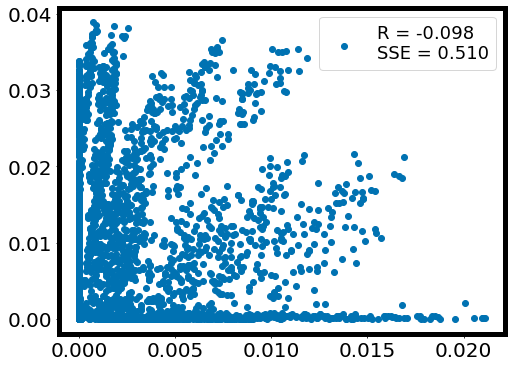

Top 5 profit predictions:  [0.42880115 0.42501548 0.42061797 0.41785958 0.41167495]
Pure exploitation, returning N max objective experiments
Running trial 29, cycle 3
Epoch: 0, Loss: 254.89819, Residuals: -0.26997, Convergence:   inf
Epoch: 10, Loss: 220.99957, Residuals: -0.24867, Convergence: 0.014570
Epoch: 20, Loss: 190.86177, Residuals: -0.22908, Convergence: 0.014892
Epoch: 30, Loss: 164.52234, Residuals: -0.21143, Convergence: 0.014959
Epoch: 40, Loss: 141.88765, Residuals: -0.19571, Convergence: 0.014862
Epoch: 50, Loss: 122.08958, Residuals: -0.18161, Convergence: 0.015305
Epoch: 60, Loss: 105.12689, Residuals: -0.16871, Convergence: 0.014785
Epoch: 70, Loss: 90.85371, Residuals: -0.15659, Convergence: 0.014512
Epoch: 80, Loss: 78.95812, Residuals: -0.14533, Convergence: 0.014065
Epoch: 90, Loss: 68.96590, Residuals: -0.13488, Convergence: 0.013313
Epoch: 100, Loss: 60.62319, Residuals: -0.12504, Convergence: 0.012580
Epoch: 110, Loss: 53.62933, Residuals: -0.11590, Convergenc

Epoch: 900, Loss: 168.62933, Residuals: -0.01270, Convergence: 0.002633

Epoch: 902, Evidence: 789.55249, Convergence: -0.022223


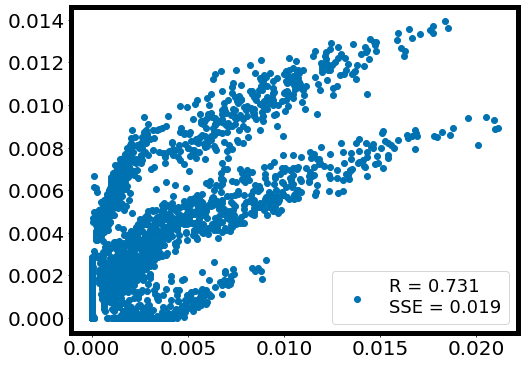

Top 5 profit predictions:  [0.15127575 0.15024838 0.14973702 0.14878389 0.14601858]
Pure exploitation, returning N max objective experiments
Running trial 29, cycle 4
Epoch: 0, Loss: 302.90733, Residuals: -0.12643, Convergence:   inf
Epoch: 10, Loss: 261.96735, Residuals: -0.11784, Convergence: 0.014779
Epoch: 20, Loss: 226.07462, Residuals: -0.11002, Convergence: 0.014865
Epoch: 30, Loss: 195.06717, Residuals: -0.10290, Convergence: 0.014839
Epoch: 40, Loss: 168.54224, Residuals: -0.09625, Convergence: 0.014578
Epoch: 50, Loss: 146.23500, Residuals: -0.08988, Convergence: 0.014039
Epoch: 60, Loss: 127.16717, Residuals: -0.08376, Convergence: 0.014469
Epoch: 70, Loss: 109.20862, Residuals: -0.07815, Convergence: 0.015563
Epoch: 80, Loss: 93.91176, Residuals: -0.07278, Convergence: 0.014736
Epoch: 90, Loss: 81.30555, Residuals: -0.06764, Convergence: 0.014227
Epoch: 100, Loss: 70.88768, Residuals: -0.06263, Convergence: 0.013558
Epoch: 110, Loss: 62.24870, Residuals: -0.05797, Convergen

Epoch: 880, Loss: 258.76782, Residuals: -0.00826, Convergence:   inf

Epoch: 888, Evidence: 1199.30798, Convergence: 0.007858
Epoch: 890, Loss: 258.33313, Residuals: -0.00877, Convergence: 0.001990

Epoch: 895, Evidence: 1198.85913, Convergence: -0.000374
Epoch: 900, Loss: 255.43837, Residuals: -0.01057, Convergence: 0.000708

Epoch: 900, Evidence: 1197.88440, Convergence: -0.001188
Epoch: 900, Loss: 262.01584, Residuals: -0.00856, Convergence:   inf

Epoch: 907, Evidence: 1201.85522, Convergence: 0.002119
Epoch: 910, Loss: 260.24780, Residuals: -0.00910, Convergence: 0.001573

Epoch: 913, Evidence: 1202.53625, Convergence: 0.000566

Epoch: 917, Evidence: 1201.93127, Convergence: 0.000063
Epoch: 920, Loss: 257.27255, Residuals: -0.01703, Convergence: 0.002012

Epoch: 923, Evidence: 1192.20801, Convergence: -0.008092


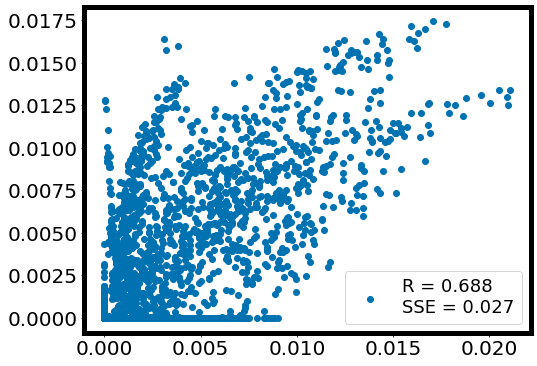

Top 5 profit predictions:  [0.18836288 0.18757863 0.18461195 0.18212344 0.18110624]
Pure exploitation, returning N max objective experiments
Running trial 29, cycle 5
Epoch: 0, Loss: 374.50945, Residuals: -0.12284, Convergence:   inf
Epoch: 10, Loss: 323.64835, Residuals: -0.11406, Convergence: 0.014884
Epoch: 20, Loss: 278.98615, Residuals: -0.10602, Convergence: 0.014997
Epoch: 30, Loss: 240.29237, Residuals: -0.09872, Convergence: 0.015014
Epoch: 40, Loss: 207.30070, Residuals: -0.09220, Convergence: 0.014702
Epoch: 50, Loss: 179.72081, Residuals: -0.08584, Convergence: 0.014134
Epoch: 60, Loss: 156.32816, Residuals: -0.07962, Convergence: 0.013826
Epoch: 70, Loss: 136.91699, Residuals: -0.07397, Convergence: 0.013001
Epoch: 80, Loss: 120.79900, Residuals: -0.06877, Convergence: 0.012271
Epoch: 90, Loss: 107.31050, Residuals: -0.06367, Convergence: 0.011564
Epoch: 100, Loss: 95.45020, Residuals: -0.05847, Convergence: 0.011995
Epoch: 110, Loss: 84.35909, Residuals: -0.05373, Converg

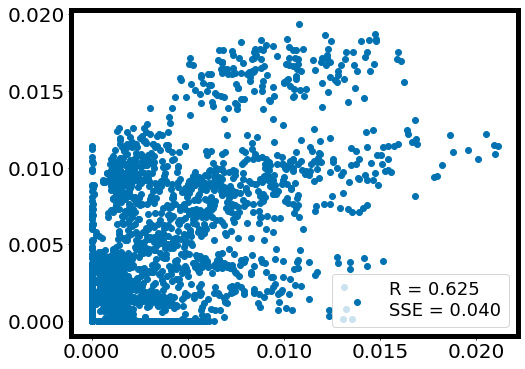

Top 5 profit predictions:  [0.21003574 0.2063163  0.20263556 0.19928132 0.19886178]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 425.20064, Residuals: -0.01835, Convergence:   inf
Epoch: 10, Loss: 368.57025, Residuals: -0.01842, Convergence: 0.014665
Epoch: 20, Loss: 318.21622, Residuals: -0.01850, Convergence: 0.014799
Epoch: 30, Loss: 275.33487, Residuals: -0.01829, Convergence: 0.014362
Epoch: 40, Loss: 238.74776, Residuals: -0.01793, Convergence: 0.014302
Epoch: 50, Loss: 207.53954, Residuals: -0.01779, Convergence: 0.013810
Epoch: 60, Loss: 181.24620, Residuals: -0.01803, Convergence: 0.013349
Epoch: 70, Loss: 158.67546, Residuals: -0.01818, Convergence: 0.013356
Epoch: 80, Loss: 138.95425, Residuals: -0.01741, Convergence: 0.013572
Epoch: 90, Loss: 121.88560, Residuals: -0.01669, Convergence: 0.013165
Epoch: 100, Loss: 107.34221, Residuals: -0.01625, Convergence: 0.012654
Epoch: 110, Loss: 94.97382, Residuals: -0.01607, Convergence: 0.012222
Epoch: 120


Epoch: 884, Evidence: 2018.71021, Convergence: -0.004622
Epoch: 890, Loss: 402.83508, Residuals: -0.00963, Convergence: 0.001199

Epoch: 893, Evidence: 2029.55908, Convergence: 0.000748
Epoch: 900, Loss: 397.36734, Residuals: -0.01205, Convergence: 0.001945
Epoch: 910, Loss: 391.65137, Residuals: -0.01287, Convergence: 0.001068

Epoch: 912, Evidence: 2018.83105, Convergence: -0.004562


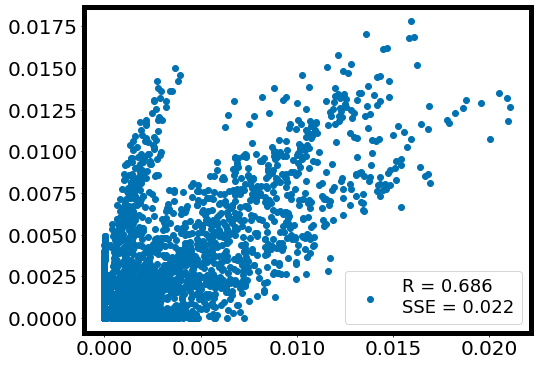

Running trial 30, cycle 1
Epoch: 0, Loss: 81.42852, Residuals: -0.74541, Convergence:   inf
Epoch: 10, Loss: 69.99537, Residuals: -0.68658, Convergence: 0.015366
Epoch: 20, Loss: 60.08993, Residuals: -0.63381, Convergence: 0.015332
Epoch: 30, Loss: 51.65695, Residuals: -0.58639, Convergence: 0.015156
Epoch: 40, Loss: 44.48468, Residuals: -0.54371, Convergence: 0.014983
Epoch: 50, Loss: 38.44576, Residuals: -0.50454, Convergence: 0.014694
Epoch: 60, Loss: 33.36003, Residuals: -0.46866, Convergence: 0.014466
Epoch: 70, Loss: 28.99975, Residuals: -0.43660, Convergence: 0.014196
Epoch: 80, Loss: 25.26113, Residuals: -0.40793, Convergence: 0.013802
Epoch: 90, Loss: 22.08366, Residuals: -0.38211, Convergence: 0.013456
Epoch: 100, Loss: 19.40605, Residuals: -0.35854, Convergence: 0.012953
Epoch: 110, Loss: 17.14948, Residuals: -0.33705, Convergence: 0.012324
Epoch: 120, Loss: 15.27191, Residuals: -0.31727, Convergence: 0.010035
Epoch: 130, Loss: 13.66225, Residuals: -0.29963, Convergence: 0.0

Epoch: 880, Loss: 42.92546, Residuals: -0.00353, Convergence: 0.002028

Epoch: 889, Evidence: 197.26422, Convergence: -0.017381
Epoch: 890, Loss: 44.54178, Residuals: -0.00342, Convergence: 0.001416

Epoch: 895, Evidence: 202.56570, Convergence: 0.009245

Epoch: 896, Evidence: 206.23515, Convergence: 0.017793
Epoch: 900, Loss: 46.68279, Residuals: -0.00336, Convergence: 0.001310

Epoch: 904, Evidence: 205.66315, Convergence: -0.002781


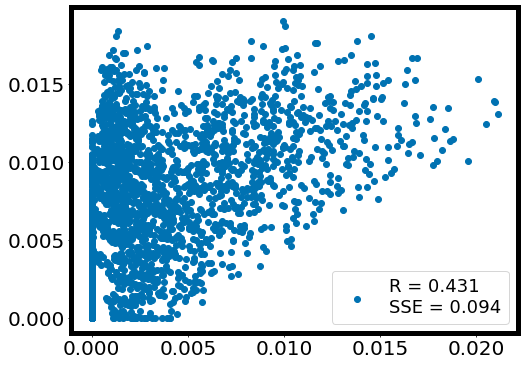

Top 5 profit predictions:  [0.20666814 0.20376362 0.2000538  0.19678602 0.19656026]
Pure exploitation, returning N max objective experiments
Running trial 30, cycle 2
Epoch: 0, Loss: 161.60428, Residuals: -0.69671, Convergence:   inf
Epoch: 10, Loss: 138.74561, Residuals: -0.64052, Convergence: 0.015425
Epoch: 20, Loss: 119.04338, Residuals: -0.58971, Convergence: 0.015444
Epoch: 30, Loss: 102.07839, Residuals: -0.54347, Convergence: 0.015555
Epoch: 40, Loss: 87.46941, Residuals: -0.50105, Convergence: 0.015623
Epoch: 50, Loss: 74.88959, Residuals: -0.46183, Convergence: 0.015696
Epoch: 60, Loss: 64.21737, Residuals: -0.42524, Convergence: 0.014971
Epoch: 70, Loss: 55.13721, Residuals: -0.39158, Convergence: 0.015409
Epoch: 80, Loss: 47.49778, Residuals: -0.36073, Convergence: 0.015082
Epoch: 90, Loss: 41.03285, Residuals: -0.33252, Convergence: 0.014653
Epoch: 100, Loss: 35.61186, Residuals: -0.30673, Convergence: 0.014147
Epoch: 110, Loss: 31.12918, Residuals: -0.28304, Convergence: 

Epoch: 960, Loss: 87.51649, Residuals: -0.00268, Convergence: 0.001600

Epoch: 968, Evidence: 456.83539, Convergence: 0.001383
Epoch: 970, Loss: 90.59808, Residuals: -0.00271, Convergence: 0.002142

Epoch: 974, Evidence: 462.81927, Convergence: 0.012929
Epoch: 980, Loss: 93.02138, Residuals: -0.00318, Convergence: 0.002704
Epoch: 990, Loss: 91.25617, Residuals: -0.00329, Convergence: 0.001556

Epoch: 991, Evidence: 463.21973, Convergence: 0.000864

Epoch: 999, Evidence: 459.92950, Convergence: -0.006283
Epoch: 1000, Loss: 99.33913, Residuals: -0.00296, Convergence: 0.003529
Epoch: 1010, Loss: 96.89740, Residuals: -0.00356, Convergence: 0.002272
Epoch: 1020, Loss: 94.96646, Residuals: -0.00361, Convergence: 0.001612

Epoch: 1025, Evidence: 467.71439, Convergence: 0.010466
Epoch: 1030, Loss: 95.90264, Residuals: -0.00389, Convergence: 0.001792

Epoch: 1036, Evidence: 466.96582, Convergence: -0.001603
Epoch: 1040, Loss: 98.36470, Residuals: -0.00372, Convergence: 0.001587
Epoch: 1050, Los

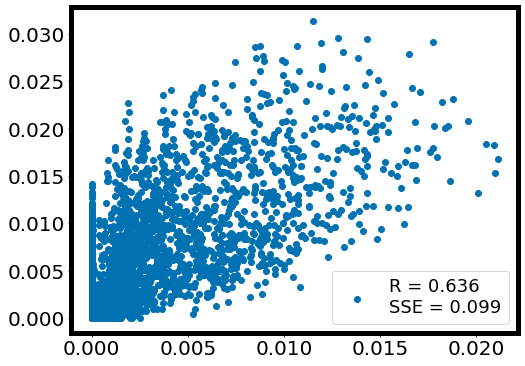

Top 5 profit predictions:  [0.34015062 0.32603714 0.3244144  0.31604627 0.31405428]
Pure exploitation, returning N max objective experiments
Running trial 30, cycle 3
Epoch: 0, Loss: 237.76276, Residuals: -0.31891, Convergence:   inf
Epoch: 10, Loss: 203.70091, Residuals: -0.29445, Convergence: 0.015612
Epoch: 20, Loss: 174.35561, Residuals: -0.27243, Convergence: 0.015744
Epoch: 30, Loss: 149.04503, Residuals: -0.25273, Convergence: 0.015838
Epoch: 40, Loss: 127.23273, Residuals: -0.23481, Convergence: 0.016125
Epoch: 50, Loss: 108.41423, Residuals: -0.21879, Convergence: 0.016101
Epoch: 60, Loss: 92.54468, Residuals: -0.20384, Convergence: 0.015828
Epoch: 70, Loss: 79.25809, Residuals: -0.18954, Convergence: 0.015493
Epoch: 80, Loss: 68.06081, Residuals: -0.17651, Convergence: 0.015281
Epoch: 90, Loss: 58.62325, Residuals: -0.16443, Convergence: 0.014818
Epoch: 100, Loss: 50.75299, Residuals: -0.15297, Convergence: 0.014256
Epoch: 110, Loss: 44.21389, Residuals: -0.14209, Convergence

Epoch: 930, Loss: 182.37451, Residuals: -0.01406, Convergence: 0.001806
Epoch: 940, Loss: 179.19186, Residuals: -0.01444, Convergence: 0.001648
Epoch: 950, Loss: 176.38794, Residuals: -0.01471, Convergence: 0.001463
Epoch: 960, Loss: 173.87079, Residuals: -0.01485, Convergence: 0.001252

Epoch: 965, Evidence: 818.52405, Convergence: -0.007845


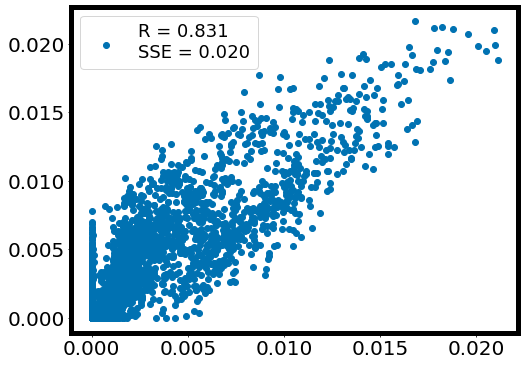

Top 5 profit predictions:  [0.23508355 0.23250516 0.23144427 0.2298434  0.2298127 ]
Pure exploitation, returning N max objective experiments
Running trial 30, cycle 4
Epoch: 0, Loss: 314.11452, Residuals: -0.35095, Convergence:   inf
Epoch: 10, Loss: 268.96121, Residuals: -0.32188, Convergence: 0.015809
Epoch: 20, Loss: 229.52240, Residuals: -0.29563, Convergence: 0.016104
Epoch: 30, Loss: 195.45602, Residuals: -0.27202, Convergence: 0.016205
Epoch: 40, Loss: 165.92744, Residuals: -0.25099, Convergence: 0.016560
Epoch: 50, Loss: 140.88905, Residuals: -0.23207, Convergence: 0.016412
Epoch: 60, Loss: 120.01533, Residuals: -0.21433, Convergence: 0.016077
Epoch: 70, Loss: 102.54746, Residuals: -0.19757, Convergence: 0.015734
Epoch: 80, Loss: 87.82868, Residuals: -0.18223, Convergence: 0.015434
Epoch: 90, Loss: 75.55972, Residuals: -0.16775, Convergence: 0.015068
Epoch: 100, Loss: 65.35163, Residuals: -0.15398, Convergence: 0.014605
Epoch: 110, Loss: 56.88714, Residuals: -0.14082, Convergen


Epoch: 928, Evidence: 1173.96167, Convergence: -0.002917
Epoch: 930, Loss: 254.30597, Residuals: -0.01286, Convergence: 0.001064

Epoch: 931, Evidence: 1185.91333, Convergence: 0.007191

Epoch: 934, Evidence: 1186.19263, Convergence: 0.000235
Epoch: 940, Loss: 256.23047, Residuals: -0.01331, Convergence: 0.001217
Epoch: 950, Loss: 252.34897, Residuals: -0.01330, Convergence: 0.001291

Epoch: 956, Evidence: 1178.40625, Convergence: -0.006371


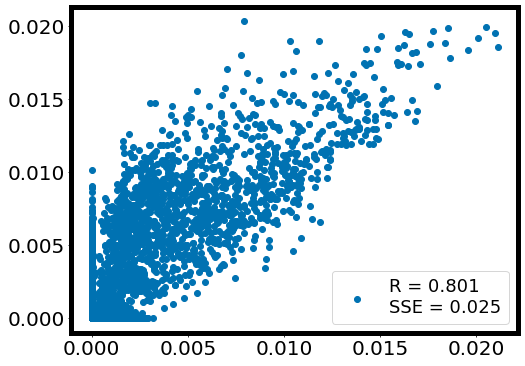

Top 5 profit predictions:  [0.21912555 0.21636267 0.21447133 0.21389084 0.21300323]
Pure exploitation, returning N max objective experiments
Running trial 30, cycle 5
Epoch: 0, Loss: 374.66359, Residuals: -0.35110, Convergence:   inf
Epoch: 10, Loss: 320.69095, Residuals: -0.32158, Convergence: 0.015864
Epoch: 20, Loss: 273.28415, Residuals: -0.29509, Convergence: 0.016326
Epoch: 30, Loss: 232.08644, Residuals: -0.27135, Convergence: 0.016688
Epoch: 40, Loss: 196.65361, Residuals: -0.25055, Convergence: 0.016679
Epoch: 50, Loss: 166.83417, Residuals: -0.23157, Convergence: 0.016499
Epoch: 60, Loss: 142.11002, Residuals: -0.21349, Convergence: 0.016073
Epoch: 70, Loss: 121.43106, Residuals: -0.19654, Convergence: 0.015886
Epoch: 80, Loss: 104.01748, Residuals: -0.18058, Convergence: 0.015467
Epoch: 90, Loss: 89.68994, Residuals: -0.16526, Convergence: 0.014824
Epoch: 100, Loss: 77.77985, Residuals: -0.15113, Convergence: 0.014280
Epoch: 110, Loss: 67.93845, Residuals: -0.13805, Converge

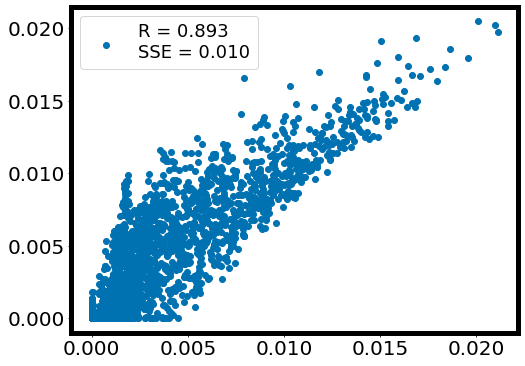

Top 5 profit predictions:  [0.22254252 0.22018313 0.21379569 0.20420875 0.19789979]
Pure exploitation, returning N max objective experiments
Epoch: 0, Loss: 461.28142, Residuals: -0.39580, Convergence:   inf
Epoch: 10, Loss: 393.83813, Residuals: -0.36164, Convergence: 0.016133
Epoch: 20, Loss: 334.63577, Residuals: -0.33102, Convergence: 0.016624
Epoch: 30, Loss: 283.35800, Residuals: -0.30369, Convergence: 0.016905
Epoch: 40, Loss: 239.70317, Residuals: -0.27934, Convergence: 0.016803
Epoch: 50, Loss: 203.24225, Residuals: -0.25698, Convergence: 0.016423
Epoch: 60, Loss: 173.17662, Residuals: -0.23589, Convergence: 0.016039
Epoch: 70, Loss: 148.12669, Residuals: -0.21627, Convergence: 0.015735
Epoch: 80, Loss: 127.24050, Residuals: -0.19768, Convergence: 0.014742
Epoch: 90, Loss: 109.81012, Residuals: -0.18046, Convergence: 0.014685
Epoch: 100, Loss: 95.37518, Residuals: -0.16468, Convergence: 0.013956
Epoch: 110, Loss: 83.47309, Residuals: -0.15026, Convergence: 0.013271
Epoch: 120,

Epoch: 930, Loss: 392.50146, Residuals: -0.02484, Convergence: 0.001246
Epoch: 940, Loss: 387.33963, Residuals: -0.02301, Convergence: 0.001042

Epoch: 946, Evidence: 1948.99805, Convergence: -0.010925


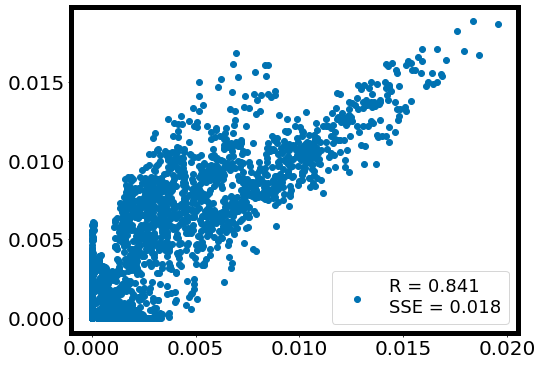

In [7]:
# init dataframe that stores DTL information
dtl_df = pd.DataFrame()
dtl_df_R = pd.DataFrame()
dtl_df_sse = pd.DataFrame()
elapsed_time = []

for trial in range(n_trials):

    # format data 
    main_data, main_obj_params, unique_exp_names, N_total = format_data(main_df, species, outputs, controls, obj_params=obj_params)

    # keep track of objective 
    objective_found = []

    # choose random set of training samples
    train_df = main_df.iloc[np.in1d(all_exp_names, initial_exps[trial])].copy()
    train_data, train_obj_params, new_experiments, N = format_data(train_df, species, outputs, controls, obj_params=obj_params)

    # remove training samples from main dataset so that they're not selected more than once
    train_inds = np.in1d(unique_exp_names, new_experiments)
    main_data = main_data[~train_inds]
    main_obj_params  = main_obj_params[~train_inds]
    unique_exp_names = unique_exp_names[~train_inds]

    # compute objectives
    target_found = []
    for sample, train_obj_param in zip(train_data, train_obj_params):
        target_found.append(objective(sample[:, :len(sys_var)], train_obj_param))
    target_found = np.array(target_found)
    objective_found.append(np.max(target_found))
    objective_rval = []
    objective_sse  = []

    # Search over full factorial and update model
    for dtl in range(n_dtl):
        print(f"Running trial {trial+1}, cycle {dtl+1}")

        # scale train and design space data
        scaler = ZeroMaxScaler().fit(train_data)
        train_data = scaler.transform(train_data)
        main_data_scaled = scaler.transform(main_data)

        # fit model 
        brnn = miRNN(n_species=n_s, n_metabolites=1, n_controls=len(controls), n_hidden=16, N=N)
        brnn.fit(train_data)
        
        # assess prediction performance of end-point product
        pred, stdv, cov = brnn.predict(main_data_scaled)
        pred = scaler.inverse_transform(pred)
        stdv = scaler.inverse_transform(stdv)
        rvalue = linregress(np.array(main_data[:, -1, 5]), pred[:, -1, -1]).rvalue
        sse_value = sse(np.array(main_data[:, -1, 5]), pred[:, -1, -1])
        plt.scatter(np.array(main_data[:, -1, 5]), pred[:, -1, -1], label="R = {:.3f}\nSSE = {:.3f}".format(rvalue, sse_value))
        plt.legend()
        plt.show()
        objective_rval.append(rvalue)
        objective_sse.append(sse_value)
        
        # randomly search over design space
        t0 = time.time()
        new_experiment_inds = brnn.fast_search(main_data_scaled, objective, scaler, n_test, 
                                               explore=-1, P=main_obj_params)
        new_experiments = unique_exp_names[new_experiment_inds]
        elapsed_time.append(time.time()-t0)

        # collect new data 
        new_df   = main_df.iloc[np.in1d(all_exp_names, new_experiments)].copy()
        new_data, new_obj_params, new_experiments, N = format_data(new_df, species, outputs, controls, obj_params=obj_params)

        # remove training samples from main dataset
        train_inds = np.in1d(unique_exp_names, new_experiments)
        main_data = main_data[~train_inds]
        main_obj_params  = main_obj_params[~train_inds]
        unique_exp_names = unique_exp_names[~train_inds]

        # compute objectives
        target_found = []
        for sample, new_obj_param in zip(new_data, new_obj_params):
            target_found.append(objective(sample[:, :len(sys_var)], new_obj_param))
        target_found = np.array(target_found)

        # store the best objective found (so far)
        objective_found.append(np.max([np.max(objective_found), np.max(target_found)]))

        # Update dataset
        train_df = pd.concat((train_df, new_df))
        train_data, train_obj_params, train_experiments, N = format_data(train_df, species, outputs, controls, obj_params=obj_params)
        
    ### fit model one last time to assess final prediction performance ### 
    # scale train and design space data
    scaler = ZeroMaxScaler().fit(train_data)
    train_data = scaler.transform(train_data)
    main_data_scaled = scaler.transform(main_data)

    # fit model 
    brnn = miRNN(n_species=n_s, n_metabolites=1, n_controls=len(controls), n_hidden=16, N=N)
    brnn.fit(train_data)

    # assess prediction performance of end-point product
    pred, stdv, cov = brnn.predict(main_data_scaled)
    pred = scaler.inverse_transform(pred)
    stdv = scaler.inverse_transform(stdv)
    rvalue = linregress(np.array(main_data[:, -1, 5]), pred[:, -1, -1]).rvalue
    sse_value = sse(np.array(main_data[:, -1, 5]), pred[:, -1, -1])
    plt.scatter(np.array(main_data[:, -1, 5]), pred[:, -1, -1], label="R = {:.3f}\nSSE = {:.3f}".format(rvalue, sse_value))
    plt.legend()
    plt.show()
    objective_rval.append(rvalue)
    objective_sse.append(sse_value)
        
    # save data to dataframe
    dtl_df_i = pd.DataFrame()
    dtl_df_i['Trial'] = [trial]
    for j,obj_found in enumerate(objective_found):
        dtl_df_i[f'DTL {j}'] = [obj_found]
    dtl_df = pd.concat((dtl_df, dtl_df_i))
    
    # save data to dataframe
    dtl_df_r = pd.DataFrame()
    dtl_df_r['Trial'] = [trial]
    for j,r_val in enumerate(objective_rval):
        dtl_df_r[f'DTL {j}'] = [r_val]
    dtl_df_R = pd.concat((dtl_df_R, dtl_df_r))
    
    # save data to dataframe
    dtl_df_e = pd.DataFrame()
    dtl_df_e['Trial'] = [trial]
    for j,e in enumerate(objective_sse):
        dtl_df_e[f'DTL {j}'] = [e]
    dtl_df_sse = pd.concat((dtl_df_sse, dtl_df_e))
    
    # write dataframes to .csv
    dtl_df.to_csv("Fig3/miRNN_exploit.csv", index=False)
    dtl_df_R.to_csv("Fig3/miRNN_exploit_rvals.csv", index=False)
    dtl_df_sse.to_csv("Fig3/miRNN_exploit_sse.csv", index=False)

In [8]:
dtl_df.describe()

Trial      DTL 0      DTL 1      DTL 2      DTL 3      DTL 4  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   14.500000   0.089362   0.153944   0.179890   0.197537   0.211788   
std     8.803408   0.046666   0.042556   0.038973   0.033569   0.020113   
min     0.000000   0.010389   0.069437   0.074627   0.074627   0.166954   
25%     7.250000   0.058960   0.118203   0.156197   0.182993   0.204263   
50%    14.500000   0.076329   0.156657   0.184105   0.204263   0.212514   
75%    21.750000   0.112222   0.185218   0.204263   0.230823   0.230823   
max    29.000000   0.193425   0.230823   0.230823   0.230823   0.230823   

           DTL 5  
count  30.000000  
mean    0.224305  
std     0.014116  
min     0.166954  
25%     0.230823  
50%     0.230823  
75%     0.230823  
max     0.230823

In [9]:
dtl_df_R.describe()

Trial      DTL 0      DTL 1      DTL 2      DTL 3      DTL 4  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   14.500000   0.552301   0.387066   0.541278   0.708588   0.778372   
std     8.803408   0.178057   0.297330   0.249420   0.148180   0.107340   
min     0.000000   0.140503  -0.112014  -0.039616   0.397751   0.410220   
25%     7.250000   0.431933   0.181975   0.345778   0.625153   0.736743   
50%    14.500000   0.561969   0.414553   0.582424   0.741747   0.788563   
75%    21.750000   0.706380   0.592536   0.756240   0.804840   0.859657   
max    29.000000   0.832350   0.856099   0.937132   0.961387   0.941706   

           DTL 5  
count  30.000000  
mean    0.790405  
std     0.142560  
min     0.272784  
25%     0.703590  
50%     0.839423  
75%     0.886992  
max     0.950853

In [10]:
dtl_df_sse.describe()

Trial      DTL 0      DTL 1      DTL 2      DTL 3      DTL 4  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   14.500000   0.046265   0.158167   0.100961   0.062168   0.034420   
std     8.803408   0.037044   0.142533   0.094874   0.079449   0.034072   
min     0.000000   0.015469   0.011346   0.005136   0.005524   0.007547   
25%     7.250000   0.023782   0.044935   0.029516   0.024376   0.013931   
50%    14.500000   0.036497   0.101315   0.066703   0.031240   0.022564   
75%    21.750000   0.045604   0.264142   0.137227   0.050324   0.039729   
max    29.000000   0.186569   0.509890   0.330695   0.326027   0.173181   

           DTL 5  
count  30.000000  
mean    0.023893  
std     0.019899  
min     0.004497  
25%     0.011269  
50%     0.017726  
75%     0.028599  
max     0.104533

In [11]:
print("Average   search time {:.3f}".format(np.mean(elapsed_time)))
print("Std. dev. search time {:.3f}".format(np.std(elapsed_time)))

Average   search time 0.077
Std. dev. search time 0.034
